In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv('train.csv')
test_final=pd.read_csv('test.csv')

In [5]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
train.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [7]:
y=train.pop('Target')
y=pd.DataFrame(y)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(dtype=int)
y['Target']=ord_enc.fit_transform(y)

## Study of mutual information & correlation

In [9]:
from sklearn.feature_selection import mutual_info_regression
mi_scores=mutual_info_regression(train,np.ravel(y))
mi_scores = pd.Series(mi_scores, name="MI Scores", index=train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

Curricular units 2nd sem (approved)               0.480675
Curricular units 2nd sem (grade)                  0.415459
Curricular units 1st sem (approved)               0.404288
Curricular units 1st sem (grade)                  0.363462
Curricular units 2nd sem (evaluations)            0.193539
Curricular units 1st sem (evaluations)            0.189445
Course                                            0.122661
Tuition fees up to date                           0.102539
Admission grade                                   0.102091
Age at enrollment                                 0.095119
Scholarship holder                                0.092241
Previous qualification (grade)                    0.089423
Application mode                                  0.083872
Curricular units 2nd sem (enrolled)               0.082900
Curricular units 1st sem (enrolled)               0.069632
Gender                                            0.054646
Previous qualification                            0.0320

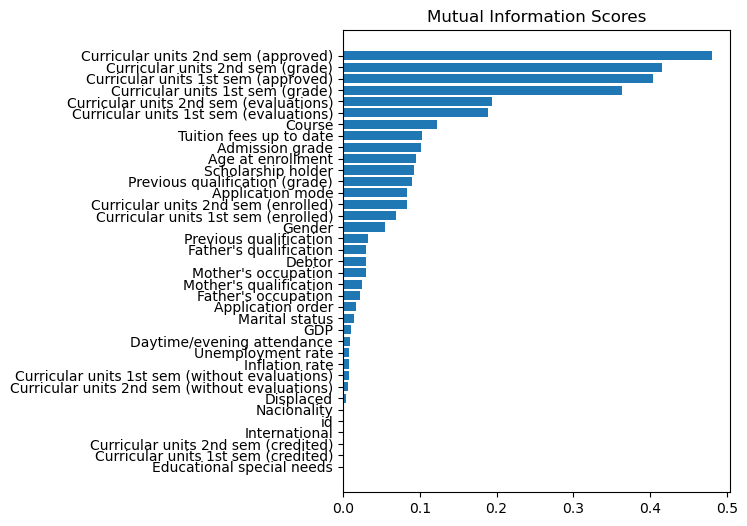

In [10]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(5, 6))
plot_mi_scores(mi_scores)

In [11]:
train_temp=train.join(y)
get=train_temp.corr().iloc[:,-1]
get.abs().sort_values(ascending=False)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.781452
Curricular units 1st sem (approved)               0.725490
Curricular units 2nd sem (grade)                  0.719036
Curricular units 1st sem (grade)                  0.661355
Tuition fees up to date                           0.415691
Scholarship holder                                0.394124
Gender                                            0.330181
Application mode                                  0.324830
Age at enrollment                                 0.320679
Curricular units 2nd sem (enrolled)               0.289165
Curricular units 1st sem (enrolled)               0.263657
Debtor                                            0.248391
Curricular units 2nd sem (evaluations)            0.214951
Admission grade                                   0.172880
Course                                            0.154208
Curricular units 1st sem (evaluations)            0.1523

It seems the current performance based on curricular results (with evaluations!) are important. On the other hand, nationality and international origin do not seem to be too important. I suspect that family context (ie. parent's qualifications and occupations are important.)

## Feature engineering (does not improve)

In [230]:
# def high_ed(x):
#     if x in [2,3,4,5,6,18,40,41,42,43,44]:
#         return 1
#     else:
#         return 0
# train["Mother's high_ed"]=train["Mother's qualification"].apply(high_ed)
# train["Father's high_ed"]=train["Father's qualification"].apply(high_ed)

In [12]:
high_ed_list=np.array([2,3,4,5,6,18,22,40,41,42,43,44])
train["Mother's high_ed"]=train["Mother's qualification"].isin(high_ed_list)*1 
train["Father's high_ed"]=train["Father's qualification"].isin(high_ed_list)*1
test=(train["Mother's high_ed"]==1) | (train["Father's high_ed"]==1)
train["Parents's high_ed"]=test*1
train


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Mother's high_ed,Father's high_ed,Parents's high_ed
0,0,1,1,1,9238,1,1,126.0,1,1,...,7,6,12.428571,0,11.1,0.6,2.02,0,0,0
1,1,1,17,1,9238,1,1,125.0,1,19,...,9,0,0.000000,0,11.1,0.6,2.02,0,0,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,0,0.000000,0,16.2,0.3,-0.92,1,0,1
3,3,1,1,3,9500,1,1,131.0,1,19,...,11,7,12.820000,0,11.1,0.6,2.02,0,1,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,12,6,12.933333,0,7.6,2.6,0.32,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,8,5,10.600000,0,13.9,-0.3,0.79,0,0,0
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,9,6,13.875000,0,9.4,-0.8,-3.12,0,0,0
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,8,5,11.400000,1,9.4,-0.8,-3.12,0,0,0
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,0,0.000000,0,7.6,2.6,0.32,0,0,0


In [13]:
print(y.corrwith(train["Parents's high_ed"]),y.corrwith(train["Father's high_ed"]),y.corrwith(train["Mother's high_ed"]))

Target   -0.016559
dtype: float64 Target   -0.028821
dtype: float64 Target   -0.007093
dtype: float64


In [14]:
feats=['Application order','Previous qualification',"Parents's high_ed",'Curricular units 2nd sem (approved)','Curricular units 1st sem (approved)','Curricular units 2nd sem (grade)','Curricular units 1st sem (grade)']

# First model: random forest (not very good...)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from numpy import ravel


X_train=train.copy()
randf=RandomForestClassifier(n_estimators=80, min_impurity_decrease=1e-4)
randf.fit(X_train,ravel(y))
scores = cross_val_score(randf, X_train, ravel(y),
                               cv=5,
                               scoring='accuracy')

# #nest=np.linspace(50, 2000, num=3,dtype=int)
# mln=np.linspace(5, 40, num=3,dtype=int)
# param_grid=[{'n_estimators':nest,'max_leaf_nodes' : mln}]

# randf=RandomForestClassifier()
# randf.fit(X_train,y)


# grid_search = GridSearchCV(randf,param_grid,cv=5,scoring='accuracy')
# grid_search.fit(X_train,y)
print(scores)

[0.8225954  0.81821746 0.82083116 0.82147291 0.81742142]


In [252]:
grid_search.best_params_

{'max_leaf_nodes': 40, 'n_estimators': 2000}

# Re-analysis of features and XGBoost again

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

new_feats=list(mi_scores[:25].index)

X_train=train[new_feats]

numerical_features = X_train.select_dtypes(
   include=["float64"]
).columns.tolist()


preprocessor = ColumnTransformer(
   transformers=[
       ("num", StandardScaler(), numerical_features)
   ]
)

X_trans=preprocessor.fit_transform(X_train)
X_trans=pd.DataFrame(X_trans)
X_trans.columns=numerical_features
X_train.loc[:,numerical_features]=X_trans[numerical_features]

In [29]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier
# xgb_best = XGBClassifier(n_jobs=4)

# # pipeline = Pipeline(
# #    [
# #        ("preprocessor", preprocessor),
# #        ("classifier", xgb_best),
# #    ]
# # )

# ns=np.linspace(0.01, 0.2, num=2)
# ks=np.linspace(50, 2000, num=4,dtype=int)

# param_grid=[{'learning_rate':ns,'n_estimators' : ks}]

# grid_search = GridSearchCV(xgb_best,param_grid,cv=3,scoring='accuracy')
# grid_search.fit(X_train,y)



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=4, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid=[{'learning_rate': array([0.01, 0.2 ]),
                          'n_estimators': array([  50,  700, 1350, 2000])}],
             scoring='accuracy')

In [30]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 1350}

In [30]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb_best = XGBClassifier(n_estimators=1350,learning_rate=0.01,n_jobs=4)

new_feats=list(mi_scores[:25].index)
X_train=train[new_feats]

scores = cross_val_score(xgb_best, X_train, y,
                              cv=5,
                              scoring='accuracy')

print(scores)

[0.83108991 0.82762676 0.83357292 0.83088283 0.82709273]


In [303]:
# for k in range(21,36,2):
#     new_feats=list(mi_scores[:k].index)
#     new_feats.remove("Mother's qualification")
#     new_feats.remove("Father's qualification")
#     new_feats.append("Parents's high_ed")
#     new_feats

#     X_train=train[new_feats]

#     xgb_best = XGBClassifier(n_estimators=1350,learning_rate=0.01,n_jobs=4)

#     scores = cross_val_score(xgb_best, X_train, y,
#                                   cv=2,
#                                   scoring='accuracy')

#     print(scores)

[0.82947803 0.8276484 ]
[0.82960872 0.82754385]
[0.82939962 0.82665517]
[0.82992237 0.82772681]
[0.83018375 0.82736088]
[0.82963486 0.8276484 ]
[0.82994851 0.82746543]
[0.82994851 0.82730861]


# LightGBM

In [97]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [44]:
lgbm=LGBMClassifier(n_jobs=4)

lr=np.linspace(0.01, 0.2, num=2)
ne=np.linspace(50, 2000, num=4,dtype=int)

param_grid=[{'learning_rate':lr,'n_estimators' : ne}]

grid_search = GridSearchCV(lgbm,param_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train,np.ravel(y))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 51012, number of used features: 25
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633484
[LightGBM] [Info] Start training from score -0.746204
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 51012, number of used features: 25
[LightGBM] [Info] Start training fro

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 51012, number of used features: 25
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633484
[LightGBM] [Info] Start training from score -0.746204
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 51012, 

GridSearchCV(cv=3, estimator=LGBMClassifier(n_jobs=4),
             param_grid=[{'learning_rate': array([0.01, 0.2 ]),
                          'n_estimators': array([  50,  700, 1350, 2000])}],
             scoring='accuracy')

In [45]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 700}

In [98]:
lgbm_best=LGBMClassifier(n_jobs=4,n_estimators=700,learning_rate=0.01)
scores = cross_val_score(lgbm_best, X_train, np.ravel(y),
                                   cv=5,
                                   scoring='accuracy')
print(scores)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 25
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 61214, 

In [104]:
lgbm_best.fit(X_train,y)

/Users/joaodiascaetanosilva/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joaodiascaetanosilva/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 76518, number of used features: 25
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633484
[LightGBM] [Info] Start training from score -0.746204


LGBMClassifier(learning_rate=0.01, n_estimators=700, n_jobs=4)

# Catboost

In [20]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

cb=CatBoostClassifier()

lr=np.linspace(0.01, 0.2, num=2)
ne=np.linspace(50, 2000, num=4,dtype=int)

param_grid=[{'learning_rate':lr,'n_estimators' : ne}]

grid_search = GridSearchCV(cb,param_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train,y)

0:	learn: 1.0873316	total: 69.3ms	remaining: 3.4s
1:	learn: 1.0764659	total: 77.6ms	remaining: 1.86s
2:	learn: 1.0660672	total: 85ms	remaining: 1.33s
3:	learn: 1.0557941	total: 92ms	remaining: 1.06s
4:	learn: 1.0455756	total: 98.2ms	remaining: 884ms
5:	learn: 1.0358984	total: 104ms	remaining: 766ms
6:	learn: 1.0264332	total: 110ms	remaining: 674ms
7:	learn: 1.0171602	total: 115ms	remaining: 605ms
8:	learn: 1.0081320	total: 121ms	remaining: 552ms
9:	learn: 0.9992981	total: 127ms	remaining: 508ms
10:	learn: 0.9906246	total: 133ms	remaining: 471ms
11:	learn: 0.9822220	total: 138ms	remaining: 438ms
12:	learn: 0.9743984	total: 144ms	remaining: 410ms
13:	learn: 0.9662661	total: 149ms	remaining: 384ms
14:	learn: 0.9583847	total: 155ms	remaining: 361ms
15:	learn: 0.9506367	total: 161ms	remaining: 341ms
16:	learn: 0.9431614	total: 166ms	remaining: 323ms
17:	learn: 0.9357742	total: 172ms	remaining: 306ms
18:	learn: 0.9285576	total: 178ms	remaining: 290ms
19:	learn: 0.9215074	total: 183ms	remaini

33:	learn: 0.8364772	total: 227ms	remaining: 4.45s
34:	learn: 0.8312397	total: 234ms	remaining: 4.45s
35:	learn: 0.8261612	total: 241ms	remaining: 4.45s
36:	learn: 0.8212145	total: 248ms	remaining: 4.44s
37:	learn: 0.8164009	total: 253ms	remaining: 4.41s
38:	learn: 0.8115196	total: 259ms	remaining: 4.39s
39:	learn: 0.8066586	total: 266ms	remaining: 4.39s
40:	learn: 0.8019123	total: 272ms	remaining: 4.38s
41:	learn: 0.7972777	total: 279ms	remaining: 4.37s
42:	learn: 0.7926718	total: 285ms	remaining: 4.35s
43:	learn: 0.7882007	total: 291ms	remaining: 4.34s
44:	learn: 0.7837847	total: 297ms	remaining: 4.32s
45:	learn: 0.7794939	total: 303ms	remaining: 4.3s
46:	learn: 0.7752260	total: 308ms	remaining: 4.29s
47:	learn: 0.7710104	total: 314ms	remaining: 4.26s
48:	learn: 0.7668850	total: 320ms	remaining: 4.25s
49:	learn: 0.7629728	total: 325ms	remaining: 4.23s
50:	learn: 0.7589369	total: 331ms	remaining: 4.21s
51:	learn: 0.7551391	total: 336ms	remaining: 4.19s
52:	learn: 0.7513011	total: 342m

203:	learn: 0.5159674	total: 1.23s	remaining: 3s
204:	learn: 0.5154262	total: 1.24s	remaining: 2.99s
205:	learn: 0.5149132	total: 1.24s	remaining: 2.98s
206:	learn: 0.5143986	total: 1.25s	remaining: 2.98s
207:	learn: 0.5139049	total: 1.26s	remaining: 2.97s
208:	learn: 0.5134266	total: 1.26s	remaining: 2.96s
209:	learn: 0.5129736	total: 1.27s	remaining: 2.96s
210:	learn: 0.5124257	total: 1.27s	remaining: 2.95s
211:	learn: 0.5119344	total: 1.28s	remaining: 2.94s
212:	learn: 0.5114585	total: 1.28s	remaining: 2.94s
213:	learn: 0.5109488	total: 1.29s	remaining: 2.93s
214:	learn: 0.5104533	total: 1.29s	remaining: 2.92s
215:	learn: 0.5099773	total: 1.3s	remaining: 2.92s
216:	learn: 0.5095001	total: 1.31s	remaining: 2.91s
217:	learn: 0.5089978	total: 1.31s	remaining: 2.9s
218:	learn: 0.5085367	total: 1.32s	remaining: 2.9s
219:	learn: 0.5081062	total: 1.32s	remaining: 2.89s
220:	learn: 0.5076500	total: 1.33s	remaining: 2.88s
221:	learn: 0.5071964	total: 1.33s	remaining: 2.88s
222:	learn: 0.5068

381:	learn: 0.4692985	total: 2.24s	remaining: 1.86s
382:	learn: 0.4691518	total: 2.24s	remaining: 1.86s
383:	learn: 0.4690351	total: 2.25s	remaining: 1.85s
384:	learn: 0.4689015	total: 2.25s	remaining: 1.84s
385:	learn: 0.4687982	total: 2.26s	remaining: 1.84s
386:	learn: 0.4686791	total: 2.27s	remaining: 1.83s
387:	learn: 0.4685523	total: 2.27s	remaining: 1.83s
388:	learn: 0.4684371	total: 2.28s	remaining: 1.82s
389:	learn: 0.4683132	total: 2.28s	remaining: 1.81s
390:	learn: 0.4681821	total: 2.29s	remaining: 1.81s
391:	learn: 0.4680745	total: 2.29s	remaining: 1.8s
392:	learn: 0.4679524	total: 2.3s	remaining: 1.79s
393:	learn: 0.4678337	total: 2.3s	remaining: 1.79s
394:	learn: 0.4677108	total: 2.31s	remaining: 1.78s
395:	learn: 0.4675688	total: 2.31s	remaining: 1.78s
396:	learn: 0.4674795	total: 2.32s	remaining: 1.77s
397:	learn: 0.4673669	total: 2.33s	remaining: 1.76s
398:	learn: 0.4672676	total: 2.33s	remaining: 1.76s
399:	learn: 0.4671551	total: 2.34s	remaining: 1.75s
400:	learn: 0.4

565:	learn: 0.4551212	total: 3.24s	remaining: 767ms
566:	learn: 0.4550828	total: 3.24s	remaining: 761ms
567:	learn: 0.4550343	total: 3.25s	remaining: 755ms
568:	learn: 0.4549861	total: 3.25s	remaining: 749ms
569:	learn: 0.4549198	total: 3.26s	remaining: 744ms
570:	learn: 0.4548830	total: 3.27s	remaining: 738ms
571:	learn: 0.4548189	total: 3.27s	remaining: 732ms
572:	learn: 0.4547782	total: 3.28s	remaining: 727ms
573:	learn: 0.4547429	total: 3.28s	remaining: 721ms
574:	learn: 0.4546915	total: 3.29s	remaining: 715ms
575:	learn: 0.4546674	total: 3.29s	remaining: 709ms
576:	learn: 0.4546126	total: 3.3s	remaining: 703ms
577:	learn: 0.4545731	total: 3.3s	remaining: 698ms
578:	learn: 0.4545465	total: 3.31s	remaining: 692ms
579:	learn: 0.4544779	total: 3.31s	remaining: 686ms
580:	learn: 0.4544313	total: 3.32s	remaining: 680ms
581:	learn: 0.4543982	total: 3.33s	remaining: 674ms
582:	learn: 0.4543326	total: 3.33s	remaining: 668ms
583:	learn: 0.4542896	total: 3.33s	remaining: 663ms
584:	learn: 0.

44:	learn: 0.7838675	total: 263ms	remaining: 3.83s
45:	learn: 0.7794802	total: 270ms	remaining: 3.83s
46:	learn: 0.7752067	total: 277ms	remaining: 3.85s
47:	learn: 0.7709759	total: 285ms	remaining: 3.87s
48:	learn: 0.7669689	total: 292ms	remaining: 3.88s
49:	learn: 0.7631280	total: 298ms	remaining: 3.87s
50:	learn: 0.7591442	total: 304ms	remaining: 3.87s
51:	learn: 0.7554016	total: 311ms	remaining: 3.87s
52:	learn: 0.7515167	total: 317ms	remaining: 3.86s
53:	learn: 0.7478560	total: 323ms	remaining: 3.86s
54:	learn: 0.7441356	total: 330ms	remaining: 3.87s
55:	learn: 0.7405041	total: 336ms	remaining: 3.87s
56:	learn: 0.7368685	total: 343ms	remaining: 3.87s
57:	learn: 0.7333283	total: 349ms	remaining: 3.86s
58:	learn: 0.7299114	total: 355ms	remaining: 3.85s
59:	learn: 0.7266332	total: 361ms	remaining: 3.85s
60:	learn: 0.7234632	total: 367ms	remaining: 3.84s
61:	learn: 0.7201168	total: 373ms	remaining: 3.83s
62:	learn: 0.7168349	total: 379ms	remaining: 3.83s
63:	learn: 0.7136567	total: 385

212:	learn: 0.5115218	total: 1.27s	remaining: 2.9s
213:	learn: 0.5109917	total: 1.27s	remaining: 2.9s
214:	learn: 0.5105574	total: 1.28s	remaining: 2.89s
215:	learn: 0.5101000	total: 1.29s	remaining: 2.89s
216:	learn: 0.5096512	total: 1.29s	remaining: 2.88s
217:	learn: 0.5091665	total: 1.3s	remaining: 2.87s
218:	learn: 0.5086819	total: 1.31s	remaining: 2.87s
219:	learn: 0.5082412	total: 1.31s	remaining: 2.86s
220:	learn: 0.5077677	total: 1.32s	remaining: 2.86s
221:	learn: 0.5072763	total: 1.32s	remaining: 2.85s
222:	learn: 0.5068207	total: 1.33s	remaining: 2.84s
223:	learn: 0.5063598	total: 1.33s	remaining: 2.84s
224:	learn: 0.5059253	total: 1.34s	remaining: 2.83s
225:	learn: 0.5055105	total: 1.35s	remaining: 2.82s
226:	learn: 0.5050698	total: 1.35s	remaining: 2.82s
227:	learn: 0.5046525	total: 1.36s	remaining: 2.81s
228:	learn: 0.5042373	total: 1.36s	remaining: 2.8s
229:	learn: 0.5038798	total: 1.37s	remaining: 2.8s
230:	learn: 0.5035044	total: 1.37s	remaining: 2.79s
231:	learn: 0.503

390:	learn: 0.4682455	total: 2.27s	remaining: 1.8s
391:	learn: 0.4681456	total: 2.28s	remaining: 1.79s
392:	learn: 0.4680441	total: 2.28s	remaining: 1.78s
393:	learn: 0.4679420	total: 2.29s	remaining: 1.78s
394:	learn: 0.4678473	total: 2.29s	remaining: 1.77s
395:	learn: 0.4677291	total: 2.3s	remaining: 1.77s
396:	learn: 0.4675875	total: 2.31s	remaining: 1.76s
397:	learn: 0.4674623	total: 2.31s	remaining: 1.75s
398:	learn: 0.4673755	total: 2.32s	remaining: 1.75s
399:	learn: 0.4672552	total: 2.32s	remaining: 1.74s
400:	learn: 0.4671596	total: 2.33s	remaining: 1.74s
401:	learn: 0.4670565	total: 2.33s	remaining: 1.73s
402:	learn: 0.4669672	total: 2.34s	remaining: 1.72s
403:	learn: 0.4668295	total: 2.35s	remaining: 1.72s
404:	learn: 0.4667577	total: 2.35s	remaining: 1.71s
405:	learn: 0.4666699	total: 2.36s	remaining: 1.71s
406:	learn: 0.4665123	total: 2.36s	remaining: 1.7s
407:	learn: 0.4663964	total: 2.37s	remaining: 1.7s
408:	learn: 0.4662864	total: 2.37s	remaining: 1.69s
409:	learn: 0.46

574:	learn: 0.4547439	total: 3.27s	remaining: 712ms
575:	learn: 0.4546813	total: 3.28s	remaining: 706ms
576:	learn: 0.4546054	total: 3.29s	remaining: 701ms
577:	learn: 0.4545404	total: 3.29s	remaining: 695ms
578:	learn: 0.4544918	total: 3.3s	remaining: 689ms
579:	learn: 0.4544405	total: 3.3s	remaining: 683ms
580:	learn: 0.4543920	total: 3.31s	remaining: 678ms
581:	learn: 0.4543371	total: 3.31s	remaining: 672ms
582:	learn: 0.4542809	total: 3.32s	remaining: 666ms
583:	learn: 0.4542305	total: 3.32s	remaining: 660ms
584:	learn: 0.4541852	total: 3.33s	remaining: 654ms
585:	learn: 0.4541183	total: 3.33s	remaining: 649ms
586:	learn: 0.4540563	total: 3.34s	remaining: 643ms
587:	learn: 0.4539798	total: 3.35s	remaining: 637ms
588:	learn: 0.4539230	total: 3.35s	remaining: 631ms
589:	learn: 0.4538804	total: 3.36s	remaining: 626ms
590:	learn: 0.4538385	total: 3.36s	remaining: 620ms
591:	learn: 0.4537978	total: 3.37s	remaining: 614ms
592:	learn: 0.4537542	total: 3.37s	remaining: 608ms
593:	learn: 0.

47:	learn: 0.7720808	total: 294ms	remaining: 4s
48:	learn: 0.7679296	total: 301ms	remaining: 3.99s
49:	learn: 0.7640230	total: 307ms	remaining: 3.99s
50:	learn: 0.7600581	total: 313ms	remaining: 3.98s
51:	learn: 0.7562584	total: 319ms	remaining: 3.98s
52:	learn: 0.7524046	total: 325ms	remaining: 3.96s
53:	learn: 0.7487441	total: 331ms	remaining: 3.96s
54:	learn: 0.7450339	total: 337ms	remaining: 3.96s
55:	learn: 0.7413890	total: 343ms	remaining: 3.94s
56:	learn: 0.7377500	total: 349ms	remaining: 3.94s
57:	learn: 0.7342768	total: 355ms	remaining: 3.93s
58:	learn: 0.7308556	total: 361ms	remaining: 3.92s
59:	learn: 0.7274720	total: 367ms	remaining: 3.91s
60:	learn: 0.7243092	total: 373ms	remaining: 3.9s
61:	learn: 0.7209868	total: 379ms	remaining: 3.9s
62:	learn: 0.7177128	total: 385ms	remaining: 3.89s
63:	learn: 0.7145382	total: 392ms	remaining: 3.9s
64:	learn: 0.7115064	total: 398ms	remaining: 3.89s
65:	learn: 0.7082653	total: 404ms	remaining: 3.88s
66:	learn: 0.7052826	total: 410ms	rem

214:	learn: 0.5116092	total: 1.3s	remaining: 2.94s
215:	learn: 0.5111665	total: 1.31s	remaining: 2.93s
216:	learn: 0.5106843	total: 1.31s	remaining: 2.92s
217:	learn: 0.5101944	total: 1.32s	remaining: 2.92s
218:	learn: 0.5097299	total: 1.33s	remaining: 2.91s
219:	learn: 0.5092793	total: 1.33s	remaining: 2.91s
220:	learn: 0.5088382	total: 1.34s	remaining: 2.9s
221:	learn: 0.5083781	total: 1.34s	remaining: 2.9s
222:	learn: 0.5079712	total: 1.35s	remaining: 2.89s
223:	learn: 0.5075125	total: 1.36s	remaining: 2.88s
224:	learn: 0.5070906	total: 1.36s	remaining: 2.88s
225:	learn: 0.5066829	total: 1.37s	remaining: 2.87s
226:	learn: 0.5062907	total: 1.38s	remaining: 2.87s
227:	learn: 0.5058898	total: 1.38s	remaining: 2.86s
228:	learn: 0.5054714	total: 1.39s	remaining: 2.85s
229:	learn: 0.5050543	total: 1.39s	remaining: 2.85s
230:	learn: 0.5046444	total: 1.4s	remaining: 2.84s
231:	learn: 0.5043077	total: 1.41s	remaining: 2.83s
232:	learn: 0.5039633	total: 1.41s	remaining: 2.83s
233:	learn: 0.50

390:	learn: 0.4695248	total: 2.3s	remaining: 1.82s
391:	learn: 0.4694055	total: 2.31s	remaining: 1.81s
392:	learn: 0.4693011	total: 2.31s	remaining: 1.81s
393:	learn: 0.4691669	total: 2.32s	remaining: 1.8s
394:	learn: 0.4690795	total: 2.32s	remaining: 1.79s
395:	learn: 0.4689431	total: 2.33s	remaining: 1.79s
396:	learn: 0.4688342	total: 2.33s	remaining: 1.78s
397:	learn: 0.4687118	total: 2.34s	remaining: 1.78s
398:	learn: 0.4686155	total: 2.35s	remaining: 1.77s
399:	learn: 0.4685061	total: 2.35s	remaining: 1.76s
400:	learn: 0.4684006	total: 2.36s	remaining: 1.76s
401:	learn: 0.4682693	total: 2.36s	remaining: 1.75s
402:	learn: 0.4681660	total: 2.37s	remaining: 1.74s
403:	learn: 0.4680249	total: 2.37s	remaining: 1.74s
404:	learn: 0.4679036	total: 2.38s	remaining: 1.73s
405:	learn: 0.4678156	total: 2.38s	remaining: 1.73s
406:	learn: 0.4677178	total: 2.39s	remaining: 1.72s
407:	learn: 0.4676157	total: 2.39s	remaining: 1.71s
408:	learn: 0.4675024	total: 2.4s	remaining: 1.71s
409:	learn: 0.4

576:	learn: 0.4553530	total: 3.31s	remaining: 705ms
577:	learn: 0.4553172	total: 3.31s	remaining: 699ms
578:	learn: 0.4552551	total: 3.32s	remaining: 694ms
579:	learn: 0.4552062	total: 3.32s	remaining: 688ms
580:	learn: 0.4551635	total: 3.33s	remaining: 682ms
581:	learn: 0.4551110	total: 3.33s	remaining: 676ms
582:	learn: 0.4550598	total: 3.34s	remaining: 671ms
583:	learn: 0.4550030	total: 3.35s	remaining: 665ms
584:	learn: 0.4549550	total: 3.35s	remaining: 659ms
585:	learn: 0.4548931	total: 3.36s	remaining: 653ms
586:	learn: 0.4548502	total: 3.36s	remaining: 647ms
587:	learn: 0.4548259	total: 3.37s	remaining: 641ms
588:	learn: 0.4547827	total: 3.37s	remaining: 635ms
589:	learn: 0.4547372	total: 3.38s	remaining: 630ms
590:	learn: 0.4546853	total: 3.38s	remaining: 624ms
591:	learn: 0.4546382	total: 3.39s	remaining: 618ms
592:	learn: 0.4546002	total: 3.39s	remaining: 612ms
593:	learn: 0.4545363	total: 3.4s	remaining: 606ms
594:	learn: 0.4544908	total: 3.4s	remaining: 601ms
595:	learn: 0.

51:	learn: 0.7551391	total: 315ms	remaining: 7.86s
52:	learn: 0.7513011	total: 321ms	remaining: 7.86s
53:	learn: 0.7476459	total: 329ms	remaining: 7.89s
54:	learn: 0.7439345	total: 336ms	remaining: 7.92s
55:	learn: 0.7402944	total: 342ms	remaining: 7.9s
56:	learn: 0.7367174	total: 349ms	remaining: 7.91s
57:	learn: 0.7332537	total: 355ms	remaining: 7.91s
58:	learn: 0.7298232	total: 361ms	remaining: 7.91s
59:	learn: 0.7265337	total: 368ms	remaining: 7.9s
60:	learn: 0.7232929	total: 373ms	remaining: 7.88s
61:	learn: 0.7200621	total: 379ms	remaining: 7.88s
62:	learn: 0.7168683	total: 386ms	remaining: 7.88s
63:	learn: 0.7136836	total: 393ms	remaining: 7.89s
64:	learn: 0.7106353	total: 399ms	remaining: 7.89s
65:	learn: 0.7074888	total: 405ms	remaining: 7.88s
66:	learn: 0.7045396	total: 412ms	remaining: 7.89s
67:	learn: 0.7014732	total: 418ms	remaining: 7.88s
68:	learn: 0.6985610	total: 425ms	remaining: 7.88s
69:	learn: 0.6955822	total: 431ms	remaining: 7.88s
70:	learn: 0.6926323	total: 437ms

218:	learn: 0.5085367	total: 1.32s	remaining: 6.83s
219:	learn: 0.5081062	total: 1.33s	remaining: 6.82s
220:	learn: 0.5076500	total: 1.33s	remaining: 6.81s
221:	learn: 0.5071964	total: 1.34s	remaining: 6.81s
222:	learn: 0.5068206	total: 1.34s	remaining: 6.8s
223:	learn: 0.5063919	total: 1.35s	remaining: 6.79s
224:	learn: 0.5059837	total: 1.36s	remaining: 6.79s
225:	learn: 0.5055705	total: 1.36s	remaining: 6.78s
226:	learn: 0.5051813	total: 1.37s	remaining: 6.77s
227:	learn: 0.5048069	total: 1.37s	remaining: 6.76s
228:	learn: 0.5043893	total: 1.38s	remaining: 6.75s
229:	learn: 0.5039693	total: 1.39s	remaining: 6.75s
230:	learn: 0.5035828	total: 1.39s	remaining: 6.74s
231:	learn: 0.5031686	total: 1.4s	remaining: 6.73s
232:	learn: 0.5027837	total: 1.4s	remaining: 6.73s
233:	learn: 0.5023681	total: 1.41s	remaining: 6.72s
234:	learn: 0.5019446	total: 1.42s	remaining: 6.71s
235:	learn: 0.5015943	total: 1.42s	remaining: 6.71s
236:	learn: 0.5011589	total: 1.43s	remaining: 6.7s
237:	learn: 0.50

396:	learn: 0.4674795	total: 2.33s	remaining: 5.6s
397:	learn: 0.4673669	total: 2.34s	remaining: 5.6s
398:	learn: 0.4672676	total: 2.35s	remaining: 5.59s
399:	learn: 0.4671551	total: 2.35s	remaining: 5.58s
400:	learn: 0.4670681	total: 2.36s	remaining: 5.58s
401:	learn: 0.4669582	total: 2.36s	remaining: 5.57s
402:	learn: 0.4668446	total: 2.37s	remaining: 5.56s
403:	learn: 0.4667098	total: 2.37s	remaining: 5.56s
404:	learn: 0.4665874	total: 2.38s	remaining: 5.55s
405:	learn: 0.4665053	total: 2.38s	remaining: 5.54s
406:	learn: 0.4663753	total: 2.39s	remaining: 5.54s
407:	learn: 0.4662530	total: 2.4s	remaining: 5.53s
408:	learn: 0.4661663	total: 2.4s	remaining: 5.52s
409:	learn: 0.4660584	total: 2.4s	remaining: 5.51s
410:	learn: 0.4659455	total: 2.41s	remaining: 5.51s
411:	learn: 0.4658252	total: 2.42s	remaining: 5.5s
412:	learn: 0.4657408	total: 2.42s	remaining: 5.5s
413:	learn: 0.4656383	total: 2.43s	remaining: 5.49s
414:	learn: 0.4655505	total: 2.43s	remaining: 5.48s
415:	learn: 0.46545

585:	learn: 0.4541742	total: 3.34s	remaining: 4.35s
586:	learn: 0.4541159	total: 3.34s	remaining: 4.34s
587:	learn: 0.4540390	total: 3.35s	remaining: 4.34s
588:	learn: 0.4539933	total: 3.35s	remaining: 4.33s
589:	learn: 0.4539242	total: 3.36s	remaining: 4.33s
590:	learn: 0.4538906	total: 3.36s	remaining: 4.32s
591:	learn: 0.4538212	total: 3.37s	remaining: 4.32s
592:	learn: 0.4537902	total: 3.37s	remaining: 4.31s
593:	learn: 0.4537227	total: 3.38s	remaining: 4.3s
594:	learn: 0.4536706	total: 3.39s	remaining: 4.3s
595:	learn: 0.4536211	total: 3.39s	remaining: 4.29s
596:	learn: 0.4535694	total: 3.4s	remaining: 4.28s
597:	learn: 0.4535190	total: 3.4s	remaining: 4.28s
598:	learn: 0.4534821	total: 3.4s	remaining: 4.27s
599:	learn: 0.4534283	total: 3.41s	remaining: 4.26s
600:	learn: 0.4533910	total: 3.42s	remaining: 4.26s
601:	learn: 0.4533407	total: 3.42s	remaining: 4.25s
602:	learn: 0.4532954	total: 3.42s	remaining: 4.24s
603:	learn: 0.4532730	total: 3.43s	remaining: 4.24s
604:	learn: 0.453

778:	learn: 0.4467528	total: 4.34s	remaining: 3.18s
779:	learn: 0.4467185	total: 4.35s	remaining: 3.18s
780:	learn: 0.4466690	total: 4.35s	remaining: 3.17s
781:	learn: 0.4466293	total: 4.36s	remaining: 3.17s
782:	learn: 0.4465890	total: 4.36s	remaining: 3.16s
783:	learn: 0.4465553	total: 4.37s	remaining: 3.15s
784:	learn: 0.4465000	total: 4.38s	remaining: 3.15s
785:	learn: 0.4464779	total: 4.38s	remaining: 3.14s
786:	learn: 0.4464348	total: 4.39s	remaining: 3.14s
787:	learn: 0.4464155	total: 4.39s	remaining: 3.13s
788:	learn: 0.4463811	total: 4.4s	remaining: 3.13s
789:	learn: 0.4463608	total: 4.4s	remaining: 3.12s
790:	learn: 0.4463327	total: 4.41s	remaining: 3.11s
791:	learn: 0.4462965	total: 4.41s	remaining: 3.11s
792:	learn: 0.4462615	total: 4.42s	remaining: 3.1s
793:	learn: 0.4462386	total: 4.42s	remaining: 3.1s
794:	learn: 0.4462057	total: 4.43s	remaining: 3.09s
795:	learn: 0.4461809	total: 4.43s	remaining: 3.08s
796:	learn: 0.4461612	total: 4.44s	remaining: 3.08s
797:	learn: 0.44

970:	learn: 0.4413485	total: 5.34s	remaining: 2.08s
971:	learn: 0.4413240	total: 5.35s	remaining: 2.08s
972:	learn: 0.4412926	total: 5.35s	remaining: 2.07s
973:	learn: 0.4412744	total: 5.36s	remaining: 2.07s
974:	learn: 0.4412518	total: 5.36s	remaining: 2.06s
975:	learn: 0.4412151	total: 5.37s	remaining: 2.06s
976:	learn: 0.4411787	total: 5.38s	remaining: 2.05s
977:	learn: 0.4411481	total: 5.38s	remaining: 2.05s
978:	learn: 0.4411285	total: 5.39s	remaining: 2.04s
979:	learn: 0.4411116	total: 5.39s	remaining: 2.04s
980:	learn: 0.4410854	total: 5.4s	remaining: 2.03s
981:	learn: 0.4410454	total: 5.4s	remaining: 2.02s
982:	learn: 0.4410113	total: 5.41s	remaining: 2.02s
983:	learn: 0.4409817	total: 5.41s	remaining: 2.01s
984:	learn: 0.4409464	total: 5.42s	remaining: 2.01s
985:	learn: 0.4408918	total: 5.42s	remaining: 2s
986:	learn: 0.4408784	total: 5.43s	remaining: 2s
987:	learn: 0.4408549	total: 5.43s	remaining: 1.99s
988:	learn: 0.4408345	total: 5.44s	remaining: 1.99s
989:	learn: 0.440821

1162:	learn: 0.4368406	total: 6.34s	remaining: 1.02s
1163:	learn: 0.4368234	total: 6.34s	remaining: 1.01s
1164:	learn: 0.4368099	total: 6.35s	remaining: 1.01s
1165:	learn: 0.4367782	total: 6.36s	remaining: 1s
1166:	learn: 0.4367506	total: 6.36s	remaining: 998ms
1167:	learn: 0.4367391	total: 6.37s	remaining: 992ms
1168:	learn: 0.4367289	total: 6.37s	remaining: 987ms
1169:	learn: 0.4367112	total: 6.38s	remaining: 981ms
1170:	learn: 0.4366926	total: 6.38s	remaining: 976ms
1171:	learn: 0.4366692	total: 6.39s	remaining: 970ms
1172:	learn: 0.4366480	total: 6.39s	remaining: 965ms
1173:	learn: 0.4366301	total: 6.4s	remaining: 959ms
1174:	learn: 0.4366161	total: 6.4s	remaining: 954ms
1175:	learn: 0.4365960	total: 6.41s	remaining: 948ms
1176:	learn: 0.4365659	total: 6.41s	remaining: 943ms
1177:	learn: 0.4365518	total: 6.42s	remaining: 937ms
1178:	learn: 0.4365265	total: 6.42s	remaining: 932ms
1179:	learn: 0.4365092	total: 6.43s	remaining: 926ms
1180:	learn: 0.4364786	total: 6.43s	remaining: 921m

0:	learn: 1.0875524	total: 6.51ms	remaining: 8.78s
1:	learn: 1.0766898	total: 12.3ms	remaining: 8.28s
2:	learn: 1.0662776	total: 18.3ms	remaining: 8.24s
3:	learn: 1.0560364	total: 24.1ms	remaining: 8.1s
4:	learn: 1.0460330	total: 29.4ms	remaining: 7.92s
5:	learn: 1.0364593	total: 35.4ms	remaining: 7.93s
6:	learn: 1.0269505	total: 41.2ms	remaining: 7.91s
7:	learn: 1.0176678	total: 46.8ms	remaining: 7.85s
8:	learn: 1.0084790	total: 52.5ms	remaining: 7.82s
9:	learn: 0.9996367	total: 58.2ms	remaining: 7.8s
10:	learn: 0.9910143	total: 64ms	remaining: 7.8s
11:	learn: 0.9825900	total: 70.1ms	remaining: 7.82s
12:	learn: 0.9744637	total: 75.6ms	remaining: 7.78s
13:	learn: 0.9663493	total: 81.5ms	remaining: 7.77s
14:	learn: 0.9584734	total: 87.4ms	remaining: 7.78s
15:	learn: 0.9507776	total: 93.1ms	remaining: 7.77s
16:	learn: 0.9433604	total: 99.1ms	remaining: 7.77s
17:	learn: 0.9359675	total: 105ms	remaining: 7.79s
18:	learn: 0.9287805	total: 111ms	remaining: 7.78s
19:	learn: 0.9217269	total: 1

170:	learn: 0.5378616	total: 1.01s	remaining: 6.99s
171:	learn: 0.5371201	total: 1.02s	remaining: 6.99s
172:	learn: 0.5363166	total: 1.03s	remaining: 6.98s
173:	learn: 0.5355471	total: 1.03s	remaining: 6.98s
174:	learn: 0.5347835	total: 1.04s	remaining: 6.98s
175:	learn: 0.5340793	total: 1.04s	remaining: 6.97s
176:	learn: 0.5333307	total: 1.05s	remaining: 6.96s
177:	learn: 0.5325879	total: 1.06s	remaining: 6.95s
178:	learn: 0.5318813	total: 1.06s	remaining: 6.95s
179:	learn: 0.5311521	total: 1.07s	remaining: 6.94s
180:	learn: 0.5304538	total: 1.07s	remaining: 6.94s
181:	learn: 0.5297190	total: 1.08s	remaining: 6.93s
182:	learn: 0.5290526	total: 1.08s	remaining: 6.92s
183:	learn: 0.5283408	total: 1.09s	remaining: 6.92s
184:	learn: 0.5276465	total: 1.1s	remaining: 6.91s
185:	learn: 0.5270277	total: 1.1s	remaining: 6.9s
186:	learn: 0.5264014	total: 1.11s	remaining: 6.89s
187:	learn: 0.5257348	total: 1.11s	remaining: 6.88s
188:	learn: 0.5251159	total: 1.12s	remaining: 6.88s
189:	learn: 0.5

343:	learn: 0.4746215	total: 2.02s	remaining: 5.92s
344:	learn: 0.4744667	total: 2.03s	remaining: 5.91s
345:	learn: 0.4743172	total: 2.04s	remaining: 5.91s
346:	learn: 0.4741707	total: 2.04s	remaining: 5.9s
347:	learn: 0.4740250	total: 2.05s	remaining: 5.89s
348:	learn: 0.4738745	total: 2.05s	remaining: 5.89s
349:	learn: 0.4737639	total: 2.06s	remaining: 5.88s
350:	learn: 0.4736078	total: 2.06s	remaining: 5.88s
351:	learn: 0.4734475	total: 2.07s	remaining: 5.87s
352:	learn: 0.4732932	total: 2.08s	remaining: 5.86s
353:	learn: 0.4731580	total: 2.08s	remaining: 5.85s
354:	learn: 0.4730366	total: 2.08s	remaining: 5.84s
355:	learn: 0.4728451	total: 2.09s	remaining: 5.84s
356:	learn: 0.4727250	total: 2.1s	remaining: 5.83s
357:	learn: 0.4725898	total: 2.1s	remaining: 5.83s
358:	learn: 0.4724292	total: 2.11s	remaining: 5.82s
359:	learn: 0.4722744	total: 2.11s	remaining: 5.81s
360:	learn: 0.4721358	total: 2.12s	remaining: 5.8s
361:	learn: 0.4720098	total: 2.12s	remaining: 5.8s
362:	learn: 0.471

532:	learn: 0.4569309	total: 3.03s	remaining: 4.65s
533:	learn: 0.4568653	total: 3.04s	remaining: 4.64s
534:	learn: 0.4568286	total: 3.04s	remaining: 4.63s
535:	learn: 0.4567607	total: 3.05s	remaining: 4.63s
536:	learn: 0.4566861	total: 3.05s	remaining: 4.62s
537:	learn: 0.4566244	total: 3.06s	remaining: 4.62s
538:	learn: 0.4565675	total: 3.06s	remaining: 4.61s
539:	learn: 0.4565189	total: 3.07s	remaining: 4.6s
540:	learn: 0.4564746	total: 3.08s	remaining: 4.6s
541:	learn: 0.4564229	total: 3.08s	remaining: 4.59s
542:	learn: 0.4563567	total: 3.08s	remaining: 4.58s
543:	learn: 0.4562903	total: 3.09s	remaining: 4.58s
544:	learn: 0.4562230	total: 3.1s	remaining: 4.57s
545:	learn: 0.4561867	total: 3.1s	remaining: 4.57s
546:	learn: 0.4561357	total: 3.11s	remaining: 4.56s
547:	learn: 0.4560712	total: 3.11s	remaining: 4.55s
548:	learn: 0.4560322	total: 3.12s	remaining: 4.55s
549:	learn: 0.4559844	total: 3.12s	remaining: 4.54s
550:	learn: 0.4559253	total: 3.13s	remaining: 4.54s
551:	learn: 0.45

724:	learn: 0.4483272	total: 4.04s	remaining: 3.48s
725:	learn: 0.4482975	total: 4.04s	remaining: 3.48s
726:	learn: 0.4482593	total: 4.05s	remaining: 3.47s
727:	learn: 0.4482358	total: 4.05s	remaining: 3.46s
728:	learn: 0.4482176	total: 4.06s	remaining: 3.46s
729:	learn: 0.4481835	total: 4.07s	remaining: 3.45s
730:	learn: 0.4481515	total: 4.07s	remaining: 3.45s
731:	learn: 0.4481186	total: 4.08s	remaining: 3.44s
732:	learn: 0.4480789	total: 4.08s	remaining: 3.44s
733:	learn: 0.4480457	total: 4.09s	remaining: 3.43s
734:	learn: 0.4480263	total: 4.09s	remaining: 3.42s
735:	learn: 0.4479906	total: 4.1s	remaining: 3.42s
736:	learn: 0.4479488	total: 4.1s	remaining: 3.41s
737:	learn: 0.4479050	total: 4.11s	remaining: 3.41s
738:	learn: 0.4478594	total: 4.11s	remaining: 3.4s
739:	learn: 0.4478181	total: 4.12s	remaining: 3.4s
740:	learn: 0.4477934	total: 4.12s	remaining: 3.39s
741:	learn: 0.4477685	total: 4.13s	remaining: 3.38s
742:	learn: 0.4477299	total: 4.13s	remaining: 3.38s
743:	learn: 0.44

918:	learn: 0.4427717	total: 5.04s	remaining: 2.37s
919:	learn: 0.4427631	total: 5.05s	remaining: 2.36s
920:	learn: 0.4427394	total: 5.05s	remaining: 2.35s
921:	learn: 0.4426998	total: 5.06s	remaining: 2.35s
922:	learn: 0.4426753	total: 5.07s	remaining: 2.34s
923:	learn: 0.4426494	total: 5.07s	remaining: 2.34s
924:	learn: 0.4426242	total: 5.08s	remaining: 2.33s
925:	learn: 0.4425945	total: 5.08s	remaining: 2.33s
926:	learn: 0.4425519	total: 5.09s	remaining: 2.32s
927:	learn: 0.4425279	total: 5.09s	remaining: 2.32s
928:	learn: 0.4424997	total: 5.1s	remaining: 2.31s
929:	learn: 0.4424765	total: 5.1s	remaining: 2.3s
930:	learn: 0.4424513	total: 5.11s	remaining: 2.3s
931:	learn: 0.4424221	total: 5.11s	remaining: 2.29s
932:	learn: 0.4424107	total: 5.12s	remaining: 2.29s
933:	learn: 0.4423869	total: 5.12s	remaining: 2.28s
934:	learn: 0.4423681	total: 5.13s	remaining: 2.28s
935:	learn: 0.4423371	total: 5.13s	remaining: 2.27s
936:	learn: 0.4423153	total: 5.14s	remaining: 2.27s
937:	learn: 0.44

1112:	learn: 0.4382039	total: 6.04s	remaining: 1.29s
1113:	learn: 0.4381927	total: 6.05s	remaining: 1.28s
1114:	learn: 0.4381543	total: 6.05s	remaining: 1.28s
1115:	learn: 0.4381210	total: 6.06s	remaining: 1.27s
1116:	learn: 0.4381006	total: 6.07s	remaining: 1.26s
1117:	learn: 0.4380752	total: 6.07s	remaining: 1.26s
1118:	learn: 0.4380565	total: 6.08s	remaining: 1.25s
1119:	learn: 0.4380363	total: 6.08s	remaining: 1.25s
1120:	learn: 0.4379950	total: 6.09s	remaining: 1.24s
1121:	learn: 0.4379712	total: 6.09s	remaining: 1.24s
1122:	learn: 0.4379278	total: 6.1s	remaining: 1.23s
1123:	learn: 0.4379055	total: 6.1s	remaining: 1.23s
1124:	learn: 0.4378802	total: 6.11s	remaining: 1.22s
1125:	learn: 0.4378716	total: 6.11s	remaining: 1.22s
1126:	learn: 0.4378548	total: 6.12s	remaining: 1.21s
1127:	learn: 0.4378366	total: 6.12s	remaining: 1.2s
1128:	learn: 0.4378278	total: 6.13s	remaining: 1.2s
1129:	learn: 0.4378157	total: 6.13s	remaining: 1.19s
1130:	learn: 0.4377873	total: 6.14s	remaining: 1.1

1304:	learn: 0.4341678	total: 7.05s	remaining: 243ms
1305:	learn: 0.4341415	total: 7.05s	remaining: 238ms
1306:	learn: 0.4341227	total: 7.06s	remaining: 232ms
1307:	learn: 0.4340921	total: 7.07s	remaining: 227ms
1308:	learn: 0.4340710	total: 7.07s	remaining: 222ms
1309:	learn: 0.4340481	total: 7.08s	remaining: 216ms
1310:	learn: 0.4340372	total: 7.08s	remaining: 211ms
1311:	learn: 0.4340267	total: 7.09s	remaining: 205ms
1312:	learn: 0.4339995	total: 7.09s	remaining: 200ms
1313:	learn: 0.4339871	total: 7.1s	remaining: 195ms
1314:	learn: 0.4339772	total: 7.11s	remaining: 189ms
1315:	learn: 0.4339708	total: 7.11s	remaining: 184ms
1316:	learn: 0.4339578	total: 7.12s	remaining: 178ms
1317:	learn: 0.4339329	total: 7.12s	remaining: 173ms
1318:	learn: 0.4339191	total: 7.13s	remaining: 167ms
1319:	learn: 0.4339059	total: 7.13s	remaining: 162ms
1320:	learn: 0.4338912	total: 7.13s	remaining: 157ms
1321:	learn: 0.4338760	total: 7.14s	remaining: 151ms
1322:	learn: 0.4338585	total: 7.15s	remaining: 

113:	learn: 0.6018918	total: 723ms	remaining: 7.84s
114:	learn: 0.6003188	total: 730ms	remaining: 7.84s
115:	learn: 0.5987231	total: 737ms	remaining: 7.84s
116:	learn: 0.5972122	total: 743ms	remaining: 7.83s
117:	learn: 0.5957600	total: 750ms	remaining: 7.83s
118:	learn: 0.5942767	total: 756ms	remaining: 7.82s
119:	learn: 0.5928483	total: 763ms	remaining: 7.82s
120:	learn: 0.5914191	total: 769ms	remaining: 7.81s
121:	learn: 0.5899872	total: 774ms	remaining: 7.79s
122:	learn: 0.5885421	total: 781ms	remaining: 7.79s
123:	learn: 0.5871651	total: 788ms	remaining: 7.79s
124:	learn: 0.5858386	total: 795ms	remaining: 7.79s
125:	learn: 0.5845137	total: 803ms	remaining: 7.8s
126:	learn: 0.5832197	total: 810ms	remaining: 7.79s
127:	learn: 0.5819350	total: 816ms	remaining: 7.79s
128:	learn: 0.5806785	total: 824ms	remaining: 7.79s
129:	learn: 0.5793866	total: 832ms	remaining: 7.81s
130:	learn: 0.5781406	total: 839ms	remaining: 7.8s
131:	learn: 0.5768810	total: 845ms	remaining: 7.8s
132:	learn: 0.5

277:	learn: 0.4893747	total: 1.73s	remaining: 6.69s
278:	learn: 0.4891075	total: 1.74s	remaining: 6.68s
279:	learn: 0.4888469	total: 1.75s	remaining: 6.67s
280:	learn: 0.4885971	total: 1.75s	remaining: 6.66s
281:	learn: 0.4883522	total: 1.76s	remaining: 6.66s
282:	learn: 0.4881168	total: 1.76s	remaining: 6.65s
283:	learn: 0.4878594	total: 1.77s	remaining: 6.64s
284:	learn: 0.4876073	total: 1.77s	remaining: 6.63s
285:	learn: 0.4873617	total: 1.78s	remaining: 6.62s
286:	learn: 0.4871260	total: 1.78s	remaining: 6.61s
287:	learn: 0.4868891	total: 1.79s	remaining: 6.6s
288:	learn: 0.4866659	total: 1.8s	remaining: 6.59s
289:	learn: 0.4863808	total: 1.8s	remaining: 6.59s
290:	learn: 0.4861429	total: 1.81s	remaining: 6.58s
291:	learn: 0.4858958	total: 1.81s	remaining: 6.57s
292:	learn: 0.4856758	total: 1.82s	remaining: 6.56s
293:	learn: 0.4854710	total: 1.82s	remaining: 6.55s
294:	learn: 0.4852609	total: 1.83s	remaining: 6.55s
295:	learn: 0.4849975	total: 1.84s	remaining: 6.54s
296:	learn: 0.4

452:	learn: 0.4634391	total: 2.73s	remaining: 5.42s
453:	learn: 0.4633774	total: 2.74s	remaining: 5.41s
454:	learn: 0.4632760	total: 2.75s	remaining: 5.41s
455:	learn: 0.4631904	total: 2.75s	remaining: 5.4s
456:	learn: 0.4631086	total: 2.76s	remaining: 5.39s
457:	learn: 0.4630262	total: 2.77s	remaining: 5.39s
458:	learn: 0.4629475	total: 2.77s	remaining: 5.38s
459:	learn: 0.4628751	total: 2.78s	remaining: 5.37s
460:	learn: 0.4628084	total: 2.78s	remaining: 5.37s
461:	learn: 0.4627190	total: 2.79s	remaining: 5.36s
462:	learn: 0.4626563	total: 2.79s	remaining: 5.35s
463:	learn: 0.4625699	total: 2.8s	remaining: 5.35s
464:	learn: 0.4624971	total: 2.81s	remaining: 5.34s
465:	learn: 0.4624293	total: 2.81s	remaining: 5.33s
466:	learn: 0.4623523	total: 2.82s	remaining: 5.33s
467:	learn: 0.4622718	total: 2.82s	remaining: 5.32s
468:	learn: 0.4621724	total: 2.83s	remaining: 5.31s
469:	learn: 0.4621209	total: 2.83s	remaining: 5.3s
470:	learn: 0.4620541	total: 2.84s	remaining: 5.3s
471:	learn: 0.46

636:	learn: 0.4525971	total: 3.74s	remaining: 4.19s
637:	learn: 0.4525417	total: 3.75s	remaining: 4.18s
638:	learn: 0.4525007	total: 3.75s	remaining: 4.17s
639:	learn: 0.4524589	total: 3.76s	remaining: 4.17s
640:	learn: 0.4524185	total: 3.76s	remaining: 4.16s
641:	learn: 0.4523889	total: 3.77s	remaining: 4.16s
642:	learn: 0.4523518	total: 3.77s	remaining: 4.15s
643:	learn: 0.4523137	total: 3.78s	remaining: 4.14s
644:	learn: 0.4522835	total: 3.78s	remaining: 4.14s
645:	learn: 0.4522393	total: 3.79s	remaining: 4.13s
646:	learn: 0.4522164	total: 3.79s	remaining: 4.12s
647:	learn: 0.4521848	total: 3.8s	remaining: 4.12s
648:	learn: 0.4521351	total: 3.81s	remaining: 4.11s
649:	learn: 0.4521106	total: 3.81s	remaining: 4.11s
650:	learn: 0.4520706	total: 3.82s	remaining: 4.1s
651:	learn: 0.4520244	total: 3.83s	remaining: 4.09s
652:	learn: 0.4519774	total: 3.83s	remaining: 4.09s
653:	learn: 0.4519344	total: 3.84s	remaining: 4.08s
654:	learn: 0.4518921	total: 3.84s	remaining: 4.08s
655:	learn: 0.

817:	learn: 0.4459702	total: 4.74s	remaining: 3.08s
818:	learn: 0.4459391	total: 4.75s	remaining: 3.08s
819:	learn: 0.4459206	total: 4.75s	remaining: 3.07s
820:	learn: 0.4458956	total: 4.76s	remaining: 3.06s
821:	learn: 0.4458752	total: 4.76s	remaining: 3.06s
822:	learn: 0.4458322	total: 4.77s	remaining: 3.05s
823:	learn: 0.4457878	total: 4.77s	remaining: 3.05s
824:	learn: 0.4457716	total: 4.78s	remaining: 3.04s
825:	learn: 0.4457328	total: 4.79s	remaining: 3.04s
826:	learn: 0.4456964	total: 4.79s	remaining: 3.03s
827:	learn: 0.4456550	total: 4.8s	remaining: 3.02s
828:	learn: 0.4456301	total: 4.8s	remaining: 3.02s
829:	learn: 0.4456116	total: 4.82s	remaining: 3.02s
830:	learn: 0.4455785	total: 4.83s	remaining: 3.02s
831:	learn: 0.4455311	total: 4.85s	remaining: 3.02s
832:	learn: 0.4455046	total: 4.86s	remaining: 3.02s
833:	learn: 0.4454743	total: 4.86s	remaining: 3.01s
834:	learn: 0.4454471	total: 4.87s	remaining: 3s
835:	learn: 0.4454326	total: 4.88s	remaining: 3s
836:	learn: 0.445411

977:	learn: 0.4416083	total: 5.74s	remaining: 2.18s
978:	learn: 0.4415739	total: 5.75s	remaining: 2.18s
979:	learn: 0.4415517	total: 5.76s	remaining: 2.17s
980:	learn: 0.4415191	total: 5.77s	remaining: 2.17s
981:	learn: 0.4414962	total: 5.77s	remaining: 2.16s
982:	learn: 0.4414702	total: 5.78s	remaining: 2.16s
983:	learn: 0.4414332	total: 5.79s	remaining: 2.15s
984:	learn: 0.4413969	total: 5.79s	remaining: 2.15s
985:	learn: 0.4413755	total: 5.8s	remaining: 2.14s
986:	learn: 0.4413582	total: 5.81s	remaining: 2.13s
987:	learn: 0.4413326	total: 5.81s	remaining: 2.13s
988:	learn: 0.4413174	total: 5.82s	remaining: 2.12s
989:	learn: 0.4412982	total: 5.83s	remaining: 2.12s
990:	learn: 0.4412592	total: 5.83s	remaining: 2.11s
991:	learn: 0.4412306	total: 5.84s	remaining: 2.11s
992:	learn: 0.4412097	total: 5.85s	remaining: 2.1s
993:	learn: 0.4411737	total: 5.85s	remaining: 2.1s
994:	learn: 0.4411605	total: 5.86s	remaining: 2.09s
995:	learn: 0.4411458	total: 5.87s	remaining: 2.08s
996:	learn: 0.4

1150:	learn: 0.4374825	total: 6.75s	remaining: 1.17s
1151:	learn: 0.4374565	total: 6.75s	remaining: 1.16s
1152:	learn: 0.4374387	total: 6.76s	remaining: 1.15s
1153:	learn: 0.4374167	total: 6.76s	remaining: 1.15s
1154:	learn: 0.4374055	total: 6.77s	remaining: 1.14s
1155:	learn: 0.4373913	total: 6.77s	remaining: 1.14s
1156:	learn: 0.4373552	total: 6.78s	remaining: 1.13s
1157:	learn: 0.4373218	total: 6.78s	remaining: 1.12s
1158:	learn: 0.4373052	total: 6.79s	remaining: 1.12s
1159:	learn: 0.4372836	total: 6.79s	remaining: 1.11s
1160:	learn: 0.4372773	total: 6.8s	remaining: 1.11s
1161:	learn: 0.4372595	total: 6.8s	remaining: 1.1s
1162:	learn: 0.4372373	total: 6.81s	remaining: 1.09s
1163:	learn: 0.4372185	total: 6.81s	remaining: 1.09s
1164:	learn: 0.4371904	total: 6.82s	remaining: 1.08s
1165:	learn: 0.4371616	total: 6.82s	remaining: 1.08s
1166:	learn: 0.4371270	total: 6.83s	remaining: 1.07s
1167:	learn: 0.4370988	total: 6.83s	remaining: 1.06s
1168:	learn: 0.4370776	total: 6.84s	remaining: 1.

1343:	learn: 0.4333993	total: 7.75s	remaining: 34.6ms
1344:	learn: 0.4333662	total: 7.75s	remaining: 28.8ms
1345:	learn: 0.4333468	total: 7.76s	remaining: 23.1ms
1346:	learn: 0.4333323	total: 7.76s	remaining: 17.3ms
1347:	learn: 0.4333098	total: 7.77s	remaining: 11.5ms
1348:	learn: 0.4332940	total: 7.77s	remaining: 5.76ms
1349:	learn: 0.4332786	total: 7.78s	remaining: 0us
0:	learn: 1.0873316	total: 8.32ms	remaining: 16.6s
1:	learn: 1.0764659	total: 15.5ms	remaining: 15.5s
2:	learn: 1.0660672	total: 21.9ms	remaining: 14.6s
3:	learn: 1.0557941	total: 29.5ms	remaining: 14.7s
4:	learn: 1.0455756	total: 35.8ms	remaining: 14.3s
5:	learn: 1.0358984	total: 42.7ms	remaining: 14.2s
6:	learn: 1.0264332	total: 49.3ms	remaining: 14s
7:	learn: 1.0171602	total: 55.5ms	remaining: 13.8s
8:	learn: 1.0081320	total: 62.3ms	remaining: 13.8s
9:	learn: 0.9992981	total: 68.4ms	remaining: 13.6s
10:	learn: 0.9906246	total: 74.8ms	remaining: 13.5s
11:	learn: 0.9822220	total: 80.7ms	remaining: 13.4s
12:	learn: 0.

181:	learn: 0.5294561	total: 1.13s	remaining: 11.3s
182:	learn: 0.5287871	total: 1.14s	remaining: 11.3s
183:	learn: 0.5281031	total: 1.15s	remaining: 11.3s
184:	learn: 0.5274095	total: 1.15s	remaining: 11.3s
185:	learn: 0.5267140	total: 1.16s	remaining: 11.3s
186:	learn: 0.5260852	total: 1.16s	remaining: 11.3s
187:	learn: 0.5254319	total: 1.17s	remaining: 11.3s
188:	learn: 0.5248346	total: 1.18s	remaining: 11.3s
189:	learn: 0.5242240	total: 1.18s	remaining: 11.3s
190:	learn: 0.5236264	total: 1.19s	remaining: 11.3s
191:	learn: 0.5230069	total: 1.19s	remaining: 11.2s
192:	learn: 0.5223817	total: 1.2s	remaining: 11.2s
193:	learn: 0.5217614	total: 1.21s	remaining: 11.2s
194:	learn: 0.5211946	total: 1.21s	remaining: 11.2s
195:	learn: 0.5206115	total: 1.22s	remaining: 11.2s
196:	learn: 0.5199764	total: 1.22s	remaining: 11.2s
197:	learn: 0.5193678	total: 1.23s	remaining: 11.2s
198:	learn: 0.5188005	total: 1.23s	remaining: 11.2s
199:	learn: 0.5181917	total: 1.24s	remaining: 11.2s
200:	learn: 0

347:	learn: 0.4738902	total: 2.14s	remaining: 10.2s
348:	learn: 0.4737493	total: 2.14s	remaining: 10.1s
349:	learn: 0.4736101	total: 2.15s	remaining: 10.1s
350:	learn: 0.4734863	total: 2.16s	remaining: 10.1s
351:	learn: 0.4733469	total: 2.16s	remaining: 10.1s
352:	learn: 0.4731677	total: 2.17s	remaining: 10.1s
353:	learn: 0.4730244	total: 2.17s	remaining: 10.1s
354:	learn: 0.4728937	total: 2.18s	remaining: 10.1s
355:	learn: 0.4727162	total: 2.19s	remaining: 10.1s
356:	learn: 0.4725713	total: 2.19s	remaining: 10.1s
357:	learn: 0.4724232	total: 2.2s	remaining: 10.1s
358:	learn: 0.4722986	total: 2.2s	remaining: 10.1s
359:	learn: 0.4721469	total: 2.21s	remaining: 10.1s
360:	learn: 0.4720115	total: 2.22s	remaining: 10.1s
361:	learn: 0.4718822	total: 2.22s	remaining: 10.1s
362:	learn: 0.4717208	total: 2.23s	remaining: 10s
363:	learn: 0.4715779	total: 2.23s	remaining: 10s
364:	learn: 0.4714530	total: 2.24s	remaining: 10s
365:	learn: 0.4713276	total: 2.25s	remaining: 10s
366:	learn: 0.4712113	

524:	learn: 0.4574824	total: 3.14s	remaining: 8.84s
525:	learn: 0.4574132	total: 3.15s	remaining: 8.83s
526:	learn: 0.4573572	total: 3.16s	remaining: 8.82s
527:	learn: 0.4572902	total: 3.16s	remaining: 8.81s
528:	learn: 0.4572267	total: 3.17s	remaining: 8.81s
529:	learn: 0.4571613	total: 3.17s	remaining: 8.8s
530:	learn: 0.4570964	total: 3.18s	remaining: 8.79s
531:	learn: 0.4570479	total: 3.18s	remaining: 8.78s
532:	learn: 0.4569935	total: 3.19s	remaining: 8.77s
533:	learn: 0.4569196	total: 3.19s	remaining: 8.76s
534:	learn: 0.4568488	total: 3.2s	remaining: 8.76s
535:	learn: 0.4567748	total: 3.2s	remaining: 8.75s
536:	learn: 0.4567287	total: 3.21s	remaining: 8.74s
537:	learn: 0.4566511	total: 3.21s	remaining: 8.73s
538:	learn: 0.4565800	total: 3.22s	remaining: 8.72s
539:	learn: 0.4565316	total: 3.22s	remaining: 8.71s
540:	learn: 0.4564689	total: 3.23s	remaining: 8.71s
541:	learn: 0.4563976	total: 3.23s	remaining: 8.7s
542:	learn: 0.4563336	total: 3.24s	remaining: 8.69s
543:	learn: 0.45

711:	learn: 0.4489398	total: 4.15s	remaining: 7.51s
712:	learn: 0.4489007	total: 4.16s	remaining: 7.51s
713:	learn: 0.4488661	total: 4.17s	remaining: 7.52s
714:	learn: 0.4488303	total: 4.18s	remaining: 7.52s
715:	learn: 0.4487881	total: 4.2s	remaining: 7.52s
716:	learn: 0.4487585	total: 4.21s	remaining: 7.53s
717:	learn: 0.4487166	total: 4.22s	remaining: 7.53s
718:	learn: 0.4486779	total: 4.23s	remaining: 7.53s
719:	learn: 0.4486375	total: 4.24s	remaining: 7.53s
720:	learn: 0.4486177	total: 4.24s	remaining: 7.53s
721:	learn: 0.4485703	total: 4.25s	remaining: 7.53s
722:	learn: 0.4485489	total: 4.26s	remaining: 7.52s
723:	learn: 0.4485184	total: 4.26s	remaining: 7.52s
724:	learn: 0.4484861	total: 4.27s	remaining: 7.51s
725:	learn: 0.4484565	total: 4.28s	remaining: 7.5s
726:	learn: 0.4484250	total: 4.28s	remaining: 7.5s
727:	learn: 0.4484006	total: 4.29s	remaining: 7.49s
728:	learn: 0.4483802	total: 4.29s	remaining: 7.49s
729:	learn: 0.4483513	total: 4.3s	remaining: 7.48s
730:	learn: 0.44

887:	learn: 0.4435218	total: 5.15s	remaining: 6.45s
888:	learn: 0.4434901	total: 5.16s	remaining: 6.45s
889:	learn: 0.4434718	total: 5.16s	remaining: 6.44s
890:	learn: 0.4434240	total: 5.17s	remaining: 6.43s
891:	learn: 0.4433886	total: 5.17s	remaining: 6.43s
892:	learn: 0.4433569	total: 5.18s	remaining: 6.42s
893:	learn: 0.4433334	total: 5.18s	remaining: 6.41s
894:	learn: 0.4433016	total: 5.19s	remaining: 6.41s
895:	learn: 0.4432506	total: 5.19s	remaining: 6.4s
896:	learn: 0.4432235	total: 5.2s	remaining: 6.39s
897:	learn: 0.4432105	total: 5.21s	remaining: 6.39s
898:	learn: 0.4431821	total: 5.21s	remaining: 6.38s
899:	learn: 0.4431577	total: 5.21s	remaining: 6.37s
900:	learn: 0.4431207	total: 5.22s	remaining: 6.37s
901:	learn: 0.4431045	total: 5.22s	remaining: 6.36s
902:	learn: 0.4430771	total: 5.23s	remaining: 6.35s
903:	learn: 0.4430640	total: 5.24s	remaining: 6.35s
904:	learn: 0.4430477	total: 5.24s	remaining: 6.34s
905:	learn: 0.4430183	total: 5.25s	remaining: 6.33s
906:	learn: 0.

1077:	learn: 0.4387725	total: 6.16s	remaining: 5.27s
1078:	learn: 0.4387464	total: 6.17s	remaining: 5.26s
1079:	learn: 0.4387321	total: 6.17s	remaining: 5.26s
1080:	learn: 0.4387164	total: 6.17s	remaining: 5.25s
1081:	learn: 0.4386947	total: 6.18s	remaining: 5.24s
1082:	learn: 0.4386812	total: 6.18s	remaining: 5.24s
1083:	learn: 0.4386565	total: 6.19s	remaining: 5.23s
1084:	learn: 0.4386343	total: 6.2s	remaining: 5.22s
1085:	learn: 0.4386086	total: 6.2s	remaining: 5.22s
1086:	learn: 0.4385946	total: 6.21s	remaining: 5.21s
1087:	learn: 0.4385737	total: 6.21s	remaining: 5.21s
1088:	learn: 0.4385534	total: 6.22s	remaining: 5.2s
1089:	learn: 0.4385381	total: 6.22s	remaining: 5.19s
1090:	learn: 0.4385126	total: 6.23s	remaining: 5.19s
1091:	learn: 0.4384801	total: 6.23s	remaining: 5.18s
1092:	learn: 0.4384627	total: 6.24s	remaining: 5.18s
1093:	learn: 0.4384392	total: 6.24s	remaining: 5.17s
1094:	learn: 0.4384248	total: 6.25s	remaining: 5.16s
1095:	learn: 0.4384017	total: 6.25s	remaining: 5.

1265:	learn: 0.4346246	total: 7.17s	remaining: 4.15s
1266:	learn: 0.4345952	total: 7.17s	remaining: 4.15s
1267:	learn: 0.4345750	total: 7.18s	remaining: 4.14s
1268:	learn: 0.4345583	total: 7.18s	remaining: 4.14s
1269:	learn: 0.4345394	total: 7.19s	remaining: 4.13s
1270:	learn: 0.4345263	total: 7.19s	remaining: 4.12s
1271:	learn: 0.4345155	total: 7.2s	remaining: 4.12s
1272:	learn: 0.4344945	total: 7.2s	remaining: 4.11s
1273:	learn: 0.4344734	total: 7.21s	remaining: 4.11s
1274:	learn: 0.4344475	total: 7.21s	remaining: 4.1s
1275:	learn: 0.4344206	total: 7.22s	remaining: 4.09s
1276:	learn: 0.4343938	total: 7.22s	remaining: 4.09s
1277:	learn: 0.4343509	total: 7.23s	remaining: 4.08s
1278:	learn: 0.4343355	total: 7.23s	remaining: 4.08s
1279:	learn: 0.4343215	total: 7.24s	remaining: 4.07s
1280:	learn: 0.4343136	total: 7.24s	remaining: 4.06s
1281:	learn: 0.4342956	total: 7.25s	remaining: 4.06s
1282:	learn: 0.4342826	total: 7.25s	remaining: 4.05s
1283:	learn: 0.4342609	total: 7.26s	remaining: 4.

1456:	learn: 0.4308835	total: 8.16s	remaining: 3.04s
1457:	learn: 0.4308625	total: 8.17s	remaining: 3.04s
1458:	learn: 0.4308507	total: 8.17s	remaining: 3.03s
1459:	learn: 0.4308297	total: 8.18s	remaining: 3.02s
1460:	learn: 0.4308088	total: 8.19s	remaining: 3.02s
1461:	learn: 0.4307882	total: 8.19s	remaining: 3.01s
1462:	learn: 0.4307639	total: 8.2s	remaining: 3.01s
1463:	learn: 0.4307436	total: 8.2s	remaining: 3s
1464:	learn: 0.4307209	total: 8.21s	remaining: 3s
1465:	learn: 0.4307077	total: 8.21s	remaining: 2.99s
1466:	learn: 0.4306938	total: 8.21s	remaining: 2.98s
1467:	learn: 0.4306730	total: 8.22s	remaining: 2.98s
1468:	learn: 0.4306566	total: 8.23s	remaining: 2.97s
1469:	learn: 0.4306355	total: 8.23s	remaining: 2.97s
1470:	learn: 0.4306231	total: 8.24s	remaining: 2.96s
1471:	learn: 0.4306043	total: 8.24s	remaining: 2.96s
1472:	learn: 0.4305854	total: 8.25s	remaining: 2.95s
1473:	learn: 0.4305580	total: 8.25s	remaining: 2.94s
1474:	learn: 0.4305465	total: 8.26s	remaining: 2.94s
1

1646:	learn: 0.4274208	total: 9.17s	remaining: 1.97s
1647:	learn: 0.4273986	total: 9.18s	remaining: 1.96s
1648:	learn: 0.4273839	total: 9.18s	remaining: 1.95s
1649:	learn: 0.4273592	total: 9.19s	remaining: 1.95s
1650:	learn: 0.4273406	total: 9.19s	remaining: 1.94s
1651:	learn: 0.4273281	total: 9.2s	remaining: 1.94s
1652:	learn: 0.4273062	total: 9.2s	remaining: 1.93s
1653:	learn: 0.4273008	total: 9.21s	remaining: 1.93s
1654:	learn: 0.4272783	total: 9.21s	remaining: 1.92s
1655:	learn: 0.4272658	total: 9.22s	remaining: 1.91s
1656:	learn: 0.4272371	total: 9.22s	remaining: 1.91s
1657:	learn: 0.4272252	total: 9.23s	remaining: 1.9s
1658:	learn: 0.4272072	total: 9.23s	remaining: 1.9s
1659:	learn: 0.4271870	total: 9.24s	remaining: 1.89s
1660:	learn: 0.4271631	total: 9.24s	remaining: 1.89s
1661:	learn: 0.4271498	total: 9.25s	remaining: 1.88s
1662:	learn: 0.4271318	total: 9.25s	remaining: 1.88s
1663:	learn: 0.4271183	total: 9.26s	remaining: 1.87s
1664:	learn: 0.4271072	total: 9.26s	remaining: 1.8

1832:	learn: 0.4245739	total: 10.2s	remaining: 926ms
1833:	learn: 0.4245521	total: 10.2s	remaining: 921ms
1834:	learn: 0.4245376	total: 10.2s	remaining: 916ms
1835:	learn: 0.4245221	total: 10.2s	remaining: 910ms
1836:	learn: 0.4245117	total: 10.2s	remaining: 905ms
1837:	learn: 0.4245010	total: 10.2s	remaining: 900ms
1838:	learn: 0.4244925	total: 10.2s	remaining: 895ms
1839:	learn: 0.4244688	total: 10.2s	remaining: 889ms
1840:	learn: 0.4244598	total: 10.2s	remaining: 884ms
1841:	learn: 0.4244388	total: 10.2s	remaining: 878ms
1842:	learn: 0.4244280	total: 10.2s	remaining: 873ms
1843:	learn: 0.4244168	total: 10.2s	remaining: 867ms
1844:	learn: 0.4244031	total: 10.3s	remaining: 861ms
1845:	learn: 0.4243883	total: 10.3s	remaining: 856ms
1846:	learn: 0.4243771	total: 10.3s	remaining: 850ms
1847:	learn: 0.4243606	total: 10.3s	remaining: 845ms
1848:	learn: 0.4243423	total: 10.3s	remaining: 840ms
1849:	learn: 0.4243195	total: 10.3s	remaining: 834ms
1850:	learn: 0.4243078	total: 10.3s	remaining:

6:	learn: 1.0269505	total: 43.6ms	remaining: 12.4s
7:	learn: 1.0176678	total: 49.7ms	remaining: 12.4s
8:	learn: 1.0084790	total: 56.3ms	remaining: 12.5s
9:	learn: 0.9996367	total: 63.2ms	remaining: 12.6s
10:	learn: 0.9910143	total: 69.9ms	remaining: 12.6s
11:	learn: 0.9825900	total: 76.1ms	remaining: 12.6s
12:	learn: 0.9744637	total: 82.3ms	remaining: 12.6s
13:	learn: 0.9663493	total: 89.4ms	remaining: 12.7s
14:	learn: 0.9584734	total: 95.8ms	remaining: 12.7s
15:	learn: 0.9507776	total: 102ms	remaining: 12.7s
16:	learn: 0.9433604	total: 108ms	remaining: 12.7s
17:	learn: 0.9359675	total: 115ms	remaining: 12.7s
18:	learn: 0.9287805	total: 121ms	remaining: 12.7s
19:	learn: 0.9217269	total: 128ms	remaining: 12.7s
20:	learn: 0.9149880	total: 136ms	remaining: 12.8s
21:	learn: 0.9081362	total: 143ms	remaining: 12.9s
22:	learn: 0.9014758	total: 150ms	remaining: 12.9s
23:	learn: 0.8950274	total: 157ms	remaining: 12.9s
24:	learn: 0.8885615	total: 164ms	remaining: 12.9s
25:	learn: 0.8822748	total

189:	learn: 0.5244834	total: 1.26s	remaining: 12s
190:	learn: 0.5238567	total: 1.26s	remaining: 12s
191:	learn: 0.5232283	total: 1.27s	remaining: 11.9s
192:	learn: 0.5226212	total: 1.27s	remaining: 11.9s
193:	learn: 0.5220352	total: 1.28s	remaining: 11.9s
194:	learn: 0.5214196	total: 1.29s	remaining: 11.9s
195:	learn: 0.5207994	total: 1.29s	remaining: 11.9s
196:	learn: 0.5201622	total: 1.3s	remaining: 11.9s
197:	learn: 0.5195843	total: 1.31s	remaining: 11.9s
198:	learn: 0.5190030	total: 1.31s	remaining: 11.9s
199:	learn: 0.5183874	total: 1.32s	remaining: 11.9s
200:	learn: 0.5178235	total: 1.33s	remaining: 11.9s
201:	learn: 0.5172812	total: 1.33s	remaining: 11.9s
202:	learn: 0.5167246	total: 1.34s	remaining: 11.8s
203:	learn: 0.5161661	total: 1.34s	remaining: 11.8s
204:	learn: 0.5156228	total: 1.35s	remaining: 11.8s
205:	learn: 0.5151099	total: 1.36s	remaining: 11.8s
206:	learn: 0.5145458	total: 1.36s	remaining: 11.8s
207:	learn: 0.5140428	total: 1.37s	remaining: 11.8s
208:	learn: 0.513

357:	learn: 0.4725898	total: 2.26s	remaining: 10.4s
358:	learn: 0.4724292	total: 2.27s	remaining: 10.4s
359:	learn: 0.4722744	total: 2.27s	remaining: 10.4s
360:	learn: 0.4721358	total: 2.28s	remaining: 10.3s
361:	learn: 0.4720098	total: 2.28s	remaining: 10.3s
362:	learn: 0.4718481	total: 2.29s	remaining: 10.3s
363:	learn: 0.4716875	total: 2.29s	remaining: 10.3s
364:	learn: 0.4715690	total: 2.3s	remaining: 10.3s
365:	learn: 0.4714355	total: 2.31s	remaining: 10.3s
366:	learn: 0.4713320	total: 2.31s	remaining: 10.3s
367:	learn: 0.4712057	total: 2.32s	remaining: 10.3s
368:	learn: 0.4710729	total: 2.32s	remaining: 10.3s
369:	learn: 0.4709266	total: 2.33s	remaining: 10.3s
370:	learn: 0.4708303	total: 2.33s	remaining: 10.3s
371:	learn: 0.4707001	total: 2.34s	remaining: 10.2s
372:	learn: 0.4705752	total: 2.35s	remaining: 10.2s
373:	learn: 0.4704509	total: 2.35s	remaining: 10.2s
374:	learn: 0.4703164	total: 2.36s	remaining: 10.2s
375:	learn: 0.4701924	total: 2.37s	remaining: 10.2s
376:	learn: 0

538:	learn: 0.4565675	total: 3.27s	remaining: 8.85s
539:	learn: 0.4565189	total: 3.27s	remaining: 8.85s
540:	learn: 0.4564746	total: 3.28s	remaining: 8.84s
541:	learn: 0.4564229	total: 3.28s	remaining: 8.83s
542:	learn: 0.4563567	total: 3.29s	remaining: 8.82s
543:	learn: 0.4562903	total: 3.29s	remaining: 8.81s
544:	learn: 0.4562230	total: 3.3s	remaining: 8.81s
545:	learn: 0.4561867	total: 3.3s	remaining: 8.8s
546:	learn: 0.4561357	total: 3.31s	remaining: 8.79s
547:	learn: 0.4560712	total: 3.31s	remaining: 8.78s
548:	learn: 0.4560322	total: 3.32s	remaining: 8.77s
549:	learn: 0.4559844	total: 3.32s	remaining: 8.77s
550:	learn: 0.4559253	total: 3.33s	remaining: 8.76s
551:	learn: 0.4558795	total: 3.34s	remaining: 8.75s
552:	learn: 0.4558224	total: 3.34s	remaining: 8.74s
553:	learn: 0.4557544	total: 3.35s	remaining: 8.74s
554:	learn: 0.4557015	total: 3.35s	remaining: 8.73s
555:	learn: 0.4556295	total: 3.36s	remaining: 8.72s
556:	learn: 0.4555768	total: 3.36s	remaining: 8.72s
557:	learn: 0.4

725:	learn: 0.4482975	total: 4.26s	remaining: 7.49s
726:	learn: 0.4482593	total: 4.27s	remaining: 7.48s
727:	learn: 0.4482358	total: 4.28s	remaining: 7.47s
728:	learn: 0.4482176	total: 4.28s	remaining: 7.46s
729:	learn: 0.4481835	total: 4.29s	remaining: 7.46s
730:	learn: 0.4481515	total: 4.29s	remaining: 7.45s
731:	learn: 0.4481186	total: 4.3s	remaining: 7.44s
732:	learn: 0.4480789	total: 4.3s	remaining: 7.43s
733:	learn: 0.4480457	total: 4.31s	remaining: 7.43s
734:	learn: 0.4480263	total: 4.31s	remaining: 7.42s
735:	learn: 0.4479906	total: 4.32s	remaining: 7.41s
736:	learn: 0.4479488	total: 4.32s	remaining: 7.41s
737:	learn: 0.4479050	total: 4.33s	remaining: 7.4s
738:	learn: 0.4478594	total: 4.33s	remaining: 7.39s
739:	learn: 0.4478181	total: 4.34s	remaining: 7.39s
740:	learn: 0.4477934	total: 4.34s	remaining: 7.38s
741:	learn: 0.4477685	total: 4.35s	remaining: 7.37s
742:	learn: 0.4477299	total: 4.35s	remaining: 7.37s
743:	learn: 0.4476839	total: 4.36s	remaining: 7.36s
744:	learn: 0.4

920:	learn: 0.4427394	total: 5.27s	remaining: 6.17s
921:	learn: 0.4426998	total: 5.28s	remaining: 6.17s
922:	learn: 0.4426753	total: 5.28s	remaining: 6.16s
923:	learn: 0.4426494	total: 5.29s	remaining: 6.16s
924:	learn: 0.4426242	total: 5.29s	remaining: 6.15s
925:	learn: 0.4425945	total: 5.3s	remaining: 6.14s
926:	learn: 0.4425519	total: 5.3s	remaining: 6.14s
927:	learn: 0.4425279	total: 5.31s	remaining: 6.13s
928:	learn: 0.4424997	total: 5.31s	remaining: 6.13s
929:	learn: 0.4424765	total: 5.32s	remaining: 6.12s
930:	learn: 0.4424513	total: 5.32s	remaining: 6.11s
931:	learn: 0.4424221	total: 5.33s	remaining: 6.11s
932:	learn: 0.4424107	total: 5.33s	remaining: 6.1s
933:	learn: 0.4423869	total: 5.34s	remaining: 6.09s
934:	learn: 0.4423681	total: 5.34s	remaining: 6.08s
935:	learn: 0.4423371	total: 5.35s	remaining: 6.08s
936:	learn: 0.4423153	total: 5.35s	remaining: 6.07s
937:	learn: 0.4422899	total: 5.36s	remaining: 6.07s
938:	learn: 0.4422600	total: 5.36s	remaining: 6.06s
939:	learn: 0.4

1101:	learn: 0.4384557	total: 6.21s	remaining: 5.07s
1102:	learn: 0.4384275	total: 6.22s	remaining: 5.06s
1103:	learn: 0.4384089	total: 6.23s	remaining: 5.05s
1104:	learn: 0.4383795	total: 6.23s	remaining: 5.05s
1105:	learn: 0.4383505	total: 6.24s	remaining: 5.04s
1106:	learn: 0.4383307	total: 6.24s	remaining: 5.04s
1107:	learn: 0.4383066	total: 6.25s	remaining: 5.03s
1108:	learn: 0.4382816	total: 6.25s	remaining: 5.02s
1109:	learn: 0.4382655	total: 6.26s	remaining: 5.02s
1110:	learn: 0.4382521	total: 6.26s	remaining: 5.01s
1111:	learn: 0.4382240	total: 6.27s	remaining: 5s
1112:	learn: 0.4382039	total: 6.27s	remaining: 5s
1113:	learn: 0.4381927	total: 6.28s	remaining: 4.99s
1114:	learn: 0.4381543	total: 6.28s	remaining: 4.99s
1115:	learn: 0.4381210	total: 6.29s	remaining: 4.98s
1116:	learn: 0.4381006	total: 6.29s	remaining: 4.97s
1117:	learn: 0.4380752	total: 6.3s	remaining: 4.97s
1118:	learn: 0.4380565	total: 6.3s	remaining: 4.96s
1119:	learn: 0.4380363	total: 6.31s	remaining: 4.96s
1

1257:	learn: 0.4350821	total: 7.02s	remaining: 4.14s
1258:	learn: 0.4350650	total: 7.02s	remaining: 4.13s
1259:	learn: 0.4350329	total: 7.03s	remaining: 4.13s
1260:	learn: 0.4350029	total: 7.04s	remaining: 4.12s
1261:	learn: 0.4349815	total: 7.04s	remaining: 4.12s
1262:	learn: 0.4349687	total: 7.04s	remaining: 4.11s
1263:	learn: 0.4349397	total: 7.05s	remaining: 4.1s
1264:	learn: 0.4349146	total: 7.05s	remaining: 4.1s
1265:	learn: 0.4348981	total: 7.06s	remaining: 4.09s
1266:	learn: 0.4348850	total: 7.07s	remaining: 4.09s
1267:	learn: 0.4348615	total: 7.07s	remaining: 4.08s
1268:	learn: 0.4348519	total: 7.08s	remaining: 4.08s
1269:	learn: 0.4348288	total: 7.08s	remaining: 4.07s
1270:	learn: 0.4348065	total: 7.08s	remaining: 4.06s
1271:	learn: 0.4347860	total: 7.09s	remaining: 4.06s
1272:	learn: 0.4347580	total: 7.09s	remaining: 4.05s
1273:	learn: 0.4347461	total: 7.1s	remaining: 4.05s
1274:	learn: 0.4347296	total: 7.11s	remaining: 4.04s
1275:	learn: 0.4347168	total: 7.11s	remaining: 4.

1414:	learn: 0.4320604	total: 7.83s	remaining: 3.23s
1415:	learn: 0.4320442	total: 7.83s	remaining: 3.23s
1416:	learn: 0.4320215	total: 7.84s	remaining: 3.22s
1417:	learn: 0.4320151	total: 7.84s	remaining: 3.22s
1418:	learn: 0.4320047	total: 7.85s	remaining: 3.21s
1419:	learn: 0.4319875	total: 7.85s	remaining: 3.21s
1420:	learn: 0.4319665	total: 7.86s	remaining: 3.2s
1421:	learn: 0.4319493	total: 7.86s	remaining: 3.19s
1422:	learn: 0.4319303	total: 7.87s	remaining: 3.19s
1423:	learn: 0.4319100	total: 7.87s	remaining: 3.18s
1424:	learn: 0.4318828	total: 7.88s	remaining: 3.18s
1425:	learn: 0.4318705	total: 7.88s	remaining: 3.17s
1426:	learn: 0.4318482	total: 7.89s	remaining: 3.17s
1427:	learn: 0.4318298	total: 7.89s	remaining: 3.16s
1428:	learn: 0.4318175	total: 7.9s	remaining: 3.16s
1429:	learn: 0.4318064	total: 7.9s	remaining: 3.15s
1430:	learn: 0.4317912	total: 7.91s	remaining: 3.14s
1431:	learn: 0.4317764	total: 7.91s	remaining: 3.14s
1432:	learn: 0.4317555	total: 7.92s	remaining: 3.

1608:	learn: 0.4286128	total: 8.84s	remaining: 2.15s
1609:	learn: 0.4285914	total: 8.84s	remaining: 2.14s
1610:	learn: 0.4285753	total: 8.85s	remaining: 2.14s
1611:	learn: 0.4285493	total: 8.85s	remaining: 2.13s
1612:	learn: 0.4285351	total: 8.86s	remaining: 2.12s
1613:	learn: 0.4285205	total: 8.86s	remaining: 2.12s
1614:	learn: 0.4284999	total: 8.87s	remaining: 2.11s
1615:	learn: 0.4284918	total: 8.87s	remaining: 2.11s
1616:	learn: 0.4284697	total: 8.88s	remaining: 2.1s
1617:	learn: 0.4284549	total: 8.88s	remaining: 2.1s
1618:	learn: 0.4284341	total: 8.89s	remaining: 2.09s
1619:	learn: 0.4284194	total: 8.89s	remaining: 2.08s
1620:	learn: 0.4283980	total: 8.9s	remaining: 2.08s
1621:	learn: 0.4283785	total: 8.9s	remaining: 2.07s
1622:	learn: 0.4283678	total: 8.91s	remaining: 2.07s
1623:	learn: 0.4283572	total: 8.91s	remaining: 2.06s
1624:	learn: 0.4283343	total: 8.92s	remaining: 2.06s
1625:	learn: 0.4283259	total: 8.92s	remaining: 2.05s
1626:	learn: 0.4283050	total: 8.93s	remaining: 2.0

1789:	learn: 0.4256680	total: 9.84s	remaining: 1.15s
1790:	learn: 0.4256388	total: 9.84s	remaining: 1.15s
1791:	learn: 0.4256157	total: 9.85s	remaining: 1.14s
1792:	learn: 0.4256049	total: 9.85s	remaining: 1.14s
1793:	learn: 0.4255957	total: 9.86s	remaining: 1.13s
1794:	learn: 0.4255786	total: 9.86s	remaining: 1.13s
1795:	learn: 0.4255582	total: 9.87s	remaining: 1.12s
1796:	learn: 0.4255488	total: 9.88s	remaining: 1.11s
1797:	learn: 0.4255259	total: 9.88s	remaining: 1.11s
1798:	learn: 0.4255120	total: 9.89s	remaining: 1.1s
1799:	learn: 0.4255003	total: 9.89s	remaining: 1.1s
1800:	learn: 0.4254876	total: 9.9s	remaining: 1.09s
1801:	learn: 0.4254588	total: 9.9s	remaining: 1.09s
1802:	learn: 0.4254485	total: 9.91s	remaining: 1.08s
1803:	learn: 0.4254219	total: 9.91s	remaining: 1.08s
1804:	learn: 0.4254047	total: 9.92s	remaining: 1.07s
1805:	learn: 0.4253885	total: 9.93s	remaining: 1.07s
1806:	learn: 0.4253753	total: 9.93s	remaining: 1.06s
1807:	learn: 0.4253612	total: 9.94s	remaining: 1.0

1973:	learn: 0.4229401	total: 10.8s	remaining: 143ms
1974:	learn: 0.4229220	total: 10.9s	remaining: 137ms
1975:	learn: 0.4229055	total: 10.9s	remaining: 132ms
1976:	learn: 0.4228950	total: 10.9s	remaining: 126ms
1977:	learn: 0.4228755	total: 10.9s	remaining: 121ms
1978:	learn: 0.4228520	total: 10.9s	remaining: 115ms
1979:	learn: 0.4228264	total: 10.9s	remaining: 110ms
1980:	learn: 0.4228082	total: 10.9s	remaining: 104ms
1981:	learn: 0.4227782	total: 10.9s	remaining: 98.9ms
1982:	learn: 0.4227633	total: 10.9s	remaining: 93.4ms
1983:	learn: 0.4227498	total: 10.9s	remaining: 87.9ms
1984:	learn: 0.4227455	total: 10.9s	remaining: 82.4ms
1985:	learn: 0.4227193	total: 10.9s	remaining: 76.9ms
1986:	learn: 0.4227058	total: 10.9s	remaining: 71.4ms
1987:	learn: 0.4226876	total: 10.9s	remaining: 65.9ms
1988:	learn: 0.4226728	total: 10.9s	remaining: 60.4ms
1989:	learn: 0.4226495	total: 10.9s	remaining: 55ms
1990:	learn: 0.4226368	total: 10.9s	remaining: 49.5ms
1991:	learn: 0.4226228	total: 10.9s	re

161:	learn: 0.5459583	total: 1.02s	remaining: 11.5s
162:	learn: 0.5450507	total: 1.02s	remaining: 11.5s
163:	learn: 0.5441948	total: 1.03s	remaining: 11.5s
164:	learn: 0.5434053	total: 1.04s	remaining: 11.5s
165:	learn: 0.5425466	total: 1.04s	remaining: 11.5s
166:	learn: 0.5417308	total: 1.05s	remaining: 11.5s
167:	learn: 0.5409651	total: 1.05s	remaining: 11.5s
168:	learn: 0.5401236	total: 1.06s	remaining: 11.5s
169:	learn: 0.5393062	total: 1.07s	remaining: 11.5s
170:	learn: 0.5385730	total: 1.07s	remaining: 11.5s
171:	learn: 0.5378124	total: 1.08s	remaining: 11.5s
172:	learn: 0.5370716	total: 1.08s	remaining: 11.5s
173:	learn: 0.5362936	total: 1.09s	remaining: 11.5s
174:	learn: 0.5355433	total: 1.1s	remaining: 11.5s
175:	learn: 0.5348241	total: 1.1s	remaining: 11.4s
176:	learn: 0.5341001	total: 1.11s	remaining: 11.4s
177:	learn: 0.5333692	total: 1.12s	remaining: 11.4s
178:	learn: 0.5326298	total: 1.12s	remaining: 11.4s
179:	learn: 0.5318834	total: 1.13s	remaining: 11.4s
180:	learn: 0.

333:	learn: 0.4775053	total: 2.02s	remaining: 10.1s
334:	learn: 0.4773322	total: 2.03s	remaining: 10.1s
335:	learn: 0.4771829	total: 2.04s	remaining: 10.1s
336:	learn: 0.4770304	total: 2.04s	remaining: 10.1s
337:	learn: 0.4768718	total: 2.05s	remaining: 10.1s
338:	learn: 0.4767088	total: 2.05s	remaining: 10.1s
339:	learn: 0.4765273	total: 2.06s	remaining: 10.1s
340:	learn: 0.4763883	total: 2.06s	remaining: 10.1s
341:	learn: 0.4762361	total: 2.07s	remaining: 10s
342:	learn: 0.4761026	total: 2.08s	remaining: 10s
343:	learn: 0.4759529	total: 2.08s	remaining: 10s
344:	learn: 0.4758047	total: 2.09s	remaining: 10s
345:	learn: 0.4756400	total: 2.09s	remaining: 10s
346:	learn: 0.4754869	total: 2.1s	remaining: 10s
347:	learn: 0.4753253	total: 2.11s	remaining: 10s
348:	learn: 0.4751866	total: 2.11s	remaining: 9.99s
349:	learn: 0.4750780	total: 2.12s	remaining: 9.98s
350:	learn: 0.4749309	total: 2.12s	remaining: 9.98s
351:	learn: 0.4747709	total: 2.13s	remaining: 9.97s
352:	learn: 0.4745843	total

521:	learn: 0.4584962	total: 3.04s	remaining: 8.6s
522:	learn: 0.4584019	total: 3.04s	remaining: 8.59s
523:	learn: 0.4583405	total: 3.05s	remaining: 8.58s
524:	learn: 0.4582695	total: 3.05s	remaining: 8.57s
525:	learn: 0.4581954	total: 3.06s	remaining: 8.57s
526:	learn: 0.4581099	total: 3.06s	remaining: 8.56s
527:	learn: 0.4580240	total: 3.07s	remaining: 8.55s
528:	learn: 0.4579756	total: 3.07s	remaining: 8.55s
529:	learn: 0.4579121	total: 3.08s	remaining: 8.54s
530:	learn: 0.4578541	total: 3.08s	remaining: 8.53s
531:	learn: 0.4577961	total: 3.09s	remaining: 8.52s
532:	learn: 0.4577184	total: 3.09s	remaining: 8.51s
533:	learn: 0.4576689	total: 3.1s	remaining: 8.51s
534:	learn: 0.4576052	total: 3.1s	remaining: 8.5s
535:	learn: 0.4575426	total: 3.11s	remaining: 8.49s
536:	learn: 0.4574992	total: 3.11s	remaining: 8.48s
537:	learn: 0.4574334	total: 3.12s	remaining: 8.48s
538:	learn: 0.4573747	total: 3.13s	remaining: 8.47s
539:	learn: 0.4573197	total: 3.13s	remaining: 8.46s
540:	learn: 0.45

714:	learn: 0.4495072	total: 4.04s	remaining: 7.25s
715:	learn: 0.4494537	total: 4.04s	remaining: 7.25s
716:	learn: 0.4494021	total: 4.05s	remaining: 7.24s
717:	learn: 0.4493560	total: 4.05s	remaining: 7.24s
718:	learn: 0.4493163	total: 4.06s	remaining: 7.23s
719:	learn: 0.4492708	total: 4.06s	remaining: 7.22s
720:	learn: 0.4492511	total: 4.07s	remaining: 7.22s
721:	learn: 0.4492170	total: 4.07s	remaining: 7.21s
722:	learn: 0.4491654	total: 4.08s	remaining: 7.2s
723:	learn: 0.4491276	total: 4.08s	remaining: 7.2s
724:	learn: 0.4490668	total: 4.09s	remaining: 7.19s
725:	learn: 0.4490438	total: 4.09s	remaining: 7.18s
726:	learn: 0.4490007	total: 4.1s	remaining: 7.18s
727:	learn: 0.4489875	total: 4.1s	remaining: 7.17s
728:	learn: 0.4489697	total: 4.11s	remaining: 7.16s
729:	learn: 0.4489334	total: 4.11s	remaining: 7.16s
730:	learn: 0.4488860	total: 4.12s	remaining: 7.15s
731:	learn: 0.4488454	total: 4.12s	remaining: 7.14s
732:	learn: 0.4487826	total: 4.13s	remaining: 7.14s
733:	learn: 0.44

909:	learn: 0.4433470	total: 5.04s	remaining: 6.04s
910:	learn: 0.4433250	total: 5.04s	remaining: 6.03s
911:	learn: 0.4433047	total: 5.05s	remaining: 6.02s
912:	learn: 0.4432756	total: 5.05s	remaining: 6.02s
913:	learn: 0.4432420	total: 5.06s	remaining: 6.01s
914:	learn: 0.4432199	total: 5.07s	remaining: 6.01s
915:	learn: 0.4431979	total: 5.07s	remaining: 6s
916:	learn: 0.4431628	total: 5.08s	remaining: 5.99s
917:	learn: 0.4431324	total: 5.08s	remaining: 5.99s
918:	learn: 0.4431007	total: 5.09s	remaining: 5.98s
919:	learn: 0.4430569	total: 5.09s	remaining: 5.98s
920:	learn: 0.4430413	total: 5.1s	remaining: 5.97s
921:	learn: 0.4430198	total: 5.1s	remaining: 5.96s
922:	learn: 0.4430086	total: 5.11s	remaining: 5.96s
923:	learn: 0.4429731	total: 5.11s	remaining: 5.95s
924:	learn: 0.4429315	total: 5.12s	remaining: 5.95s
925:	learn: 0.4429032	total: 5.12s	remaining: 5.94s
926:	learn: 0.4428585	total: 5.13s	remaining: 5.94s
927:	learn: 0.4428454	total: 5.13s	remaining: 5.93s
928:	learn: 0.442

1104:	learn: 0.4385414	total: 6.04s	remaining: 4.89s
1105:	learn: 0.4385208	total: 6.04s	remaining: 4.89s
1106:	learn: 0.4384931	total: 6.05s	remaining: 4.88s
1107:	learn: 0.4384670	total: 6.05s	remaining: 4.87s
1108:	learn: 0.4384549	total: 6.06s	remaining: 4.87s
1109:	learn: 0.4384242	total: 6.07s	remaining: 4.86s
1110:	learn: 0.4384080	total: 6.07s	remaining: 4.86s
1111:	learn: 0.4383945	total: 6.08s	remaining: 4.85s
1112:	learn: 0.4383845	total: 6.08s	remaining: 4.84s
1113:	learn: 0.4383663	total: 6.08s	remaining: 4.84s
1114:	learn: 0.4383357	total: 6.09s	remaining: 4.83s
1115:	learn: 0.4383105	total: 6.09s	remaining: 4.83s
1116:	learn: 0.4382917	total: 6.1s	remaining: 4.82s
1117:	learn: 0.4382799	total: 6.11s	remaining: 4.82s
1118:	learn: 0.4382619	total: 6.11s	remaining: 4.81s
1119:	learn: 0.4382245	total: 6.12s	remaining: 4.8s
1120:	learn: 0.4381827	total: 6.12s	remaining: 4.8s
1121:	learn: 0.4381568	total: 6.13s	remaining: 4.79s
1122:	learn: 0.4381392	total: 6.13s	remaining: 4.

1261:	learn: 0.4351235	total: 6.84s	remaining: 4s
1262:	learn: 0.4351045	total: 6.85s	remaining: 4s
1263:	learn: 0.4350811	total: 6.86s	remaining: 3.99s
1264:	learn: 0.4350608	total: 6.86s	remaining: 3.99s
1265:	learn: 0.4350407	total: 6.87s	remaining: 3.98s
1266:	learn: 0.4350262	total: 6.87s	remaining: 3.98s
1267:	learn: 0.4350097	total: 6.88s	remaining: 3.97s
1268:	learn: 0.4349821	total: 6.88s	remaining: 3.96s
1269:	learn: 0.4349623	total: 6.89s	remaining: 3.96s
1270:	learn: 0.4349324	total: 6.89s	remaining: 3.95s
1271:	learn: 0.4349237	total: 6.89s	remaining: 3.95s
1272:	learn: 0.4348911	total: 6.9s	remaining: 3.94s
1273:	learn: 0.4348684	total: 6.91s	remaining: 3.94s
1274:	learn: 0.4348442	total: 6.91s	remaining: 3.93s
1275:	learn: 0.4348382	total: 6.92s	remaining: 3.92s
1276:	learn: 0.4348144	total: 6.92s	remaining: 3.92s
1277:	learn: 0.4347892	total: 6.93s	remaining: 3.91s
1278:	learn: 0.4347708	total: 6.93s	remaining: 3.91s
1279:	learn: 0.4347295	total: 6.94s	remaining: 3.9s
1

1417:	learn: 0.4319404	total: 7.65s	remaining: 3.14s
1418:	learn: 0.4319320	total: 7.65s	remaining: 3.13s
1419:	learn: 0.4319159	total: 7.66s	remaining: 3.13s
1420:	learn: 0.4318893	total: 7.66s	remaining: 3.12s
1421:	learn: 0.4318739	total: 7.67s	remaining: 3.12s
1422:	learn: 0.4318566	total: 7.67s	remaining: 3.11s
1423:	learn: 0.4318305	total: 7.68s	remaining: 3.1s
1424:	learn: 0.4318202	total: 7.68s	remaining: 3.1s
1425:	learn: 0.4318018	total: 7.69s	remaining: 3.09s
1426:	learn: 0.4317766	total: 7.69s	remaining: 3.09s
1427:	learn: 0.4317634	total: 7.7s	remaining: 3.08s
1428:	learn: 0.4317405	total: 7.7s	remaining: 3.08s
1429:	learn: 0.4317198	total: 7.71s	remaining: 3.07s
1430:	learn: 0.4316954	total: 7.71s	remaining: 3.07s
1431:	learn: 0.4316872	total: 7.72s	remaining: 3.06s
1432:	learn: 0.4316591	total: 7.72s	remaining: 3.06s
1433:	learn: 0.4316259	total: 7.73s	remaining: 3.05s
1434:	learn: 0.4316046	total: 7.73s	remaining: 3.04s
1435:	learn: 0.4315893	total: 7.74s	remaining: 3.0

1575:	learn: 0.4290973	total: 8.46s	remaining: 2.27s
1576:	learn: 0.4290682	total: 8.46s	remaining: 2.27s
1577:	learn: 0.4290518	total: 8.47s	remaining: 2.26s
1578:	learn: 0.4290336	total: 8.47s	remaining: 2.26s
1579:	learn: 0.4290219	total: 8.48s	remaining: 2.25s
1580:	learn: 0.4289971	total: 8.48s	remaining: 2.25s
1581:	learn: 0.4289764	total: 8.49s	remaining: 2.24s
1582:	learn: 0.4289613	total: 8.49s	remaining: 2.24s
1583:	learn: 0.4289451	total: 8.5s	remaining: 2.23s
1584:	learn: 0.4289384	total: 8.5s	remaining: 2.23s
1585:	learn: 0.4289091	total: 8.51s	remaining: 2.22s
1586:	learn: 0.4288882	total: 8.51s	remaining: 2.21s
1587:	learn: 0.4288666	total: 8.52s	remaining: 2.21s
1588:	learn: 0.4288550	total: 8.52s	remaining: 2.2s
1589:	learn: 0.4288313	total: 8.53s	remaining: 2.2s
1590:	learn: 0.4288144	total: 8.53s	remaining: 2.19s
1591:	learn: 0.4287937	total: 8.54s	remaining: 2.19s
1592:	learn: 0.4287659	total: 8.54s	remaining: 2.18s
1593:	learn: 0.4287550	total: 8.55s	remaining: 2.1

1732:	learn: 0.4264831	total: 9.26s	remaining: 1.43s
1733:	learn: 0.4264675	total: 9.27s	remaining: 1.42s
1734:	learn: 0.4264598	total: 9.27s	remaining: 1.42s
1735:	learn: 0.4264476	total: 9.28s	remaining: 1.41s
1736:	learn: 0.4264313	total: 9.28s	remaining: 1.41s
1737:	learn: 0.4264250	total: 9.29s	remaining: 1.4s
1738:	learn: 0.4264006	total: 9.29s	remaining: 1.4s
1739:	learn: 0.4263815	total: 9.3s	remaining: 1.39s
1740:	learn: 0.4263600	total: 9.3s	remaining: 1.38s
1741:	learn: 0.4263373	total: 9.31s	remaining: 1.38s
1742:	learn: 0.4263147	total: 9.32s	remaining: 1.37s
1743:	learn: 0.4263061	total: 9.32s	remaining: 1.37s
1744:	learn: 0.4262811	total: 9.33s	remaining: 1.36s
1745:	learn: 0.4262682	total: 9.33s	remaining: 1.36s
1746:	learn: 0.4262538	total: 9.34s	remaining: 1.35s
1747:	learn: 0.4262395	total: 9.34s	remaining: 1.35s
1748:	learn: 0.4262347	total: 9.35s	remaining: 1.34s
1749:	learn: 0.4262200	total: 9.35s	remaining: 1.33s
1750:	learn: 0.4262095	total: 9.36s	remaining: 1.3

1924:	learn: 0.4234884	total: 10.3s	remaining: 400ms
1925:	learn: 0.4234832	total: 10.3s	remaining: 394ms
1926:	learn: 0.4234631	total: 10.3s	remaining: 389ms
1927:	learn: 0.4234492	total: 10.3s	remaining: 384ms
1928:	learn: 0.4234328	total: 10.3s	remaining: 378ms
1929:	learn: 0.4234211	total: 10.3s	remaining: 373ms
1930:	learn: 0.4234083	total: 10.3s	remaining: 368ms
1931:	learn: 0.4233824	total: 10.3s	remaining: 362ms
1932:	learn: 0.4233731	total: 10.3s	remaining: 357ms
1933:	learn: 0.4233673	total: 10.3s	remaining: 352ms
1934:	learn: 0.4233417	total: 10.3s	remaining: 346ms
1935:	learn: 0.4233241	total: 10.3s	remaining: 341ms
1936:	learn: 0.4233085	total: 10.3s	remaining: 336ms
1937:	learn: 0.4232924	total: 10.3s	remaining: 330ms
1938:	learn: 0.4232849	total: 10.3s	remaining: 325ms
1939:	learn: 0.4232721	total: 10.3s	remaining: 320ms
1940:	learn: 0.4232532	total: 10.3s	remaining: 314ms
1941:	learn: 0.4232442	total: 10.3s	remaining: 309ms
1942:	learn: 0.4232273	total: 10.4s	remaining:

0:	learn: 0.8998029	total: 5.57ms	remaining: 273ms
1:	learn: 0.7832543	total: 11.7ms	remaining: 280ms
2:	learn: 0.7043544	total: 17.6ms	remaining: 275ms
3:	learn: 0.6485800	total: 23.6ms	remaining: 272ms
4:	learn: 0.6083581	total: 30.4ms	remaining: 274ms
5:	learn: 0.5781695	total: 36.9ms	remaining: 271ms
6:	learn: 0.5545170	total: 43ms	remaining: 264ms
7:	learn: 0.5377946	total: 49ms	remaining: 257ms
8:	learn: 0.5235818	total: 55.6ms	remaining: 253ms
9:	learn: 0.5120305	total: 61.8ms	remaining: 247ms
10:	learn: 0.5032214	total: 67.6ms	remaining: 240ms
11:	learn: 0.4961216	total: 73.5ms	remaining: 233ms
12:	learn: 0.4903501	total: 79.4ms	remaining: 226ms
13:	learn: 0.4856962	total: 84.7ms	remaining: 218ms
14:	learn: 0.4813519	total: 90.8ms	remaining: 212ms
15:	learn: 0.4774754	total: 96.1ms	remaining: 204ms
16:	learn: 0.4746154	total: 102ms	remaining: 197ms
17:	learn: 0.4720330	total: 107ms	remaining: 191ms
18:	learn: 0.4694548	total: 113ms	remaining: 184ms
19:	learn: 0.4668631	total: 1

128:	learn: 0.4155513	total: 702ms	remaining: 3.11s
129:	learn: 0.4154537	total: 707ms	remaining: 3.1s
130:	learn: 0.4151597	total: 712ms	remaining: 3.09s
131:	learn: 0.4149065	total: 717ms	remaining: 3.09s
132:	learn: 0.4146193	total: 722ms	remaining: 3.08s
133:	learn: 0.4142403	total: 729ms	remaining: 3.08s
134:	learn: 0.4139263	total: 734ms	remaining: 3.07s
135:	learn: 0.4137680	total: 740ms	remaining: 3.07s
136:	learn: 0.4133647	total: 745ms	remaining: 3.06s
137:	learn: 0.4129765	total: 750ms	remaining: 3.06s
138:	learn: 0.4127662	total: 755ms	remaining: 3.05s
139:	learn: 0.4123768	total: 760ms	remaining: 3.04s
140:	learn: 0.4121265	total: 766ms	remaining: 3.03s
141:	learn: 0.4117374	total: 771ms	remaining: 3.03s
142:	learn: 0.4114646	total: 776ms	remaining: 3.02s
143:	learn: 0.4113498	total: 781ms	remaining: 3.02s
144:	learn: 0.4111455	total: 786ms	remaining: 3.01s
145:	learn: 0.4109407	total: 792ms	remaining: 3s
146:	learn: 0.4105517	total: 797ms	remaining: 3s
147:	learn: 0.41025

319:	learn: 0.3786903	total: 1.7s	remaining: 2.02s
320:	learn: 0.3785148	total: 1.7s	remaining: 2.01s
321:	learn: 0.3782636	total: 1.71s	remaining: 2s
322:	learn: 0.3781824	total: 1.71s	remaining: 2s
323:	learn: 0.3780901	total: 1.72s	remaining: 1.99s
324:	learn: 0.3779873	total: 1.72s	remaining: 1.99s
325:	learn: 0.3777488	total: 1.73s	remaining: 1.98s
326:	learn: 0.3775478	total: 1.73s	remaining: 1.98s
327:	learn: 0.3774830	total: 1.74s	remaining: 1.97s
328:	learn: 0.3773372	total: 1.74s	remaining: 1.97s
329:	learn: 0.3770721	total: 1.75s	remaining: 1.96s
330:	learn: 0.3768680	total: 1.75s	remaining: 1.96s
331:	learn: 0.3766431	total: 1.76s	remaining: 1.95s
332:	learn: 0.3764261	total: 1.76s	remaining: 1.95s
333:	learn: 0.3762946	total: 1.77s	remaining: 1.94s
334:	learn: 0.3761502	total: 1.78s	remaining: 1.94s
335:	learn: 0.3760438	total: 1.78s	remaining: 1.93s
336:	learn: 0.3758569	total: 1.79s	remaining: 1.92s
337:	learn: 0.3757954	total: 1.79s	remaining: 1.92s
338:	learn: 0.375607

511:	learn: 0.3487551	total: 2.7s	remaining: 992ms
512:	learn: 0.3486490	total: 2.71s	remaining: 986ms
513:	learn: 0.3485578	total: 2.71s	remaining: 981ms
514:	learn: 0.3482598	total: 2.72s	remaining: 976ms
515:	learn: 0.3481932	total: 2.72s	remaining: 970ms
516:	learn: 0.3480917	total: 2.73s	remaining: 965ms
517:	learn: 0.3479026	total: 2.73s	remaining: 960ms
518:	learn: 0.3476984	total: 2.74s	remaining: 954ms
519:	learn: 0.3476405	total: 2.74s	remaining: 949ms
520:	learn: 0.3475207	total: 2.75s	remaining: 943ms
521:	learn: 0.3472625	total: 2.75s	remaining: 938ms
522:	learn: 0.3470790	total: 2.76s	remaining: 933ms
523:	learn: 0.3468663	total: 2.76s	remaining: 928ms
524:	learn: 0.3467464	total: 2.77s	remaining: 922ms
525:	learn: 0.3465981	total: 2.77s	remaining: 917ms
526:	learn: 0.3464364	total: 2.78s	remaining: 912ms
527:	learn: 0.3462621	total: 2.78s	remaining: 907ms
528:	learn: 0.3462046	total: 2.79s	remaining: 902ms
529:	learn: 0.3461195	total: 2.79s	remaining: 896ms
530:	learn: 0

0:	learn: 0.8994735	total: 5.51ms	remaining: 3.85s
1:	learn: 0.7823314	total: 11.3ms	remaining: 3.93s
2:	learn: 0.7035710	total: 16.9ms	remaining: 3.92s
3:	learn: 0.6475754	total: 22.9ms	remaining: 3.98s
4:	learn: 0.6072038	total: 28.8ms	remaining: 4.01s
5:	learn: 0.5777230	total: 34.8ms	remaining: 4.02s
6:	learn: 0.5545047	total: 40.6ms	remaining: 4.02s
7:	learn: 0.5359190	total: 46.3ms	remaining: 4.01s
8:	learn: 0.5217472	total: 52ms	remaining: 3.99s
9:	learn: 0.5106967	total: 57.7ms	remaining: 3.98s
10:	learn: 0.5024121	total: 63.4ms	remaining: 3.97s
11:	learn: 0.4950084	total: 69.2ms	remaining: 3.96s
12:	learn: 0.4888112	total: 74.5ms	remaining: 3.94s
13:	learn: 0.4838049	total: 80ms	remaining: 3.92s
14:	learn: 0.4798095	total: 85.2ms	remaining: 3.89s
15:	learn: 0.4759888	total: 90.7ms	remaining: 3.88s
16:	learn: 0.4728748	total: 96.1ms	remaining: 3.86s
17:	learn: 0.4702582	total: 102ms	remaining: 3.87s
18:	learn: 0.4674749	total: 107ms	remaining: 3.84s
19:	learn: 0.4649716	total: 

189:	learn: 0.4029981	total: 1s	remaining: 2.7s
190:	learn: 0.4027622	total: 1.01s	remaining: 2.69s
191:	learn: 0.4026188	total: 1.02s	remaining: 2.69s
192:	learn: 0.4023671	total: 1.02s	remaining: 2.68s
193:	learn: 0.4022382	total: 1.03s	remaining: 2.68s
194:	learn: 0.4021025	total: 1.03s	remaining: 2.67s
195:	learn: 0.4019337	total: 1.04s	remaining: 2.67s
196:	learn: 0.4017388	total: 1.04s	remaining: 2.66s
197:	learn: 0.4014086	total: 1.05s	remaining: 2.66s
198:	learn: 0.4011899	total: 1.05s	remaining: 2.65s
199:	learn: 0.4009105	total: 1.06s	remaining: 2.65s
200:	learn: 0.4007396	total: 1.06s	remaining: 2.64s
201:	learn: 0.4006363	total: 1.07s	remaining: 2.63s
202:	learn: 0.4003458	total: 1.07s	remaining: 2.63s
203:	learn: 0.4001177	total: 1.08s	remaining: 2.62s
204:	learn: 0.3999681	total: 1.08s	remaining: 2.62s
205:	learn: 0.3995875	total: 1.09s	remaining: 2.61s
206:	learn: 0.3994026	total: 1.09s	remaining: 2.61s
207:	learn: 0.3992139	total: 1.1s	remaining: 2.6s
208:	learn: 0.3990

379:	learn: 0.3704600	total: 2s	remaining: 1.69s
380:	learn: 0.3702458	total: 2.01s	remaining: 1.68s
381:	learn: 0.3701487	total: 2.02s	remaining: 1.68s
382:	learn: 0.3699810	total: 2.02s	remaining: 1.67s
383:	learn: 0.3698941	total: 2.03s	remaining: 1.67s
384:	learn: 0.3698341	total: 2.03s	remaining: 1.66s
385:	learn: 0.3697276	total: 2.04s	remaining: 1.66s
386:	learn: 0.3696390	total: 2.04s	remaining: 1.65s
387:	learn: 0.3694776	total: 2.05s	remaining: 1.65s
388:	learn: 0.3693193	total: 2.05s	remaining: 1.64s
389:	learn: 0.3692025	total: 2.06s	remaining: 1.64s
390:	learn: 0.3690393	total: 2.06s	remaining: 1.63s
391:	learn: 0.3688597	total: 2.07s	remaining: 1.63s
392:	learn: 0.3687225	total: 2.08s	remaining: 1.62s
393:	learn: 0.3684973	total: 2.08s	remaining: 1.62s
394:	learn: 0.3684701	total: 2.09s	remaining: 1.61s
395:	learn: 0.3683129	total: 2.09s	remaining: 1.61s
396:	learn: 0.3681688	total: 2.1s	remaining: 1.6s
397:	learn: 0.3680660	total: 2.1s	remaining: 1.59s
398:	learn: 0.3679

568:	learn: 0.3429190	total: 3.01s	remaining: 692ms
569:	learn: 0.3426763	total: 3.01s	remaining: 687ms
570:	learn: 0.3424239	total: 3.02s	remaining: 682ms
571:	learn: 0.3423147	total: 3.02s	remaining: 677ms
572:	learn: 0.3420429	total: 3.03s	remaining: 672ms
573:	learn: 0.3419275	total: 3.04s	remaining: 666ms
574:	learn: 0.3418733	total: 3.04s	remaining: 661ms
575:	learn: 0.3416193	total: 3.04s	remaining: 656ms
576:	learn: 0.3415714	total: 3.05s	remaining: 650ms
577:	learn: 0.3415159	total: 3.06s	remaining: 645ms
578:	learn: 0.3414399	total: 3.06s	remaining: 640ms
579:	learn: 0.3412845	total: 3.07s	remaining: 635ms
580:	learn: 0.3410654	total: 3.07s	remaining: 629ms
581:	learn: 0.3408824	total: 3.08s	remaining: 624ms
582:	learn: 0.3407180	total: 3.08s	remaining: 619ms
583:	learn: 0.3405558	total: 3.09s	remaining: 614ms
584:	learn: 0.3403620	total: 3.1s	remaining: 609ms
585:	learn: 0.3400945	total: 3.1s	remaining: 603ms
586:	learn: 0.3399579	total: 3.11s	remaining: 598ms
587:	learn: 0.

50:	learn: 0.4412651	total: 278ms	remaining: 3.53s
51:	learn: 0.4406724	total: 283ms	remaining: 3.53s
52:	learn: 0.4401071	total: 289ms	remaining: 3.53s
53:	learn: 0.4397707	total: 294ms	remaining: 3.52s
54:	learn: 0.4395049	total: 299ms	remaining: 3.51s
55:	learn: 0.4393016	total: 305ms	remaining: 3.51s
56:	learn: 0.4388260	total: 311ms	remaining: 3.51s
57:	learn: 0.4382470	total: 317ms	remaining: 3.5s
58:	learn: 0.4378656	total: 322ms	remaining: 3.5s
59:	learn: 0.4376776	total: 326ms	remaining: 3.48s
60:	learn: 0.4371336	total: 332ms	remaining: 3.48s
61:	learn: 0.4367559	total: 337ms	remaining: 3.47s
62:	learn: 0.4361665	total: 343ms	remaining: 3.47s
63:	learn: 0.4359915	total: 348ms	remaining: 3.46s
64:	learn: 0.4358571	total: 353ms	remaining: 3.45s
65:	learn: 0.4354733	total: 358ms	remaining: 3.44s
66:	learn: 0.4349732	total: 364ms	remaining: 3.44s
67:	learn: 0.4342474	total: 369ms	remaining: 3.43s
68:	learn: 0.4337687	total: 375ms	remaining: 3.43s
69:	learn: 0.4332416	total: 380ms

244:	learn: 0.3923073	total: 1.27s	remaining: 2.37s
245:	learn: 0.3920818	total: 1.28s	remaining: 2.36s
246:	learn: 0.3916899	total: 1.29s	remaining: 2.36s
247:	learn: 0.3914429	total: 1.29s	remaining: 2.35s
248:	learn: 0.3911481	total: 1.3s	remaining: 2.35s
249:	learn: 0.3909650	total: 1.3s	remaining: 2.34s
250:	learn: 0.3907023	total: 1.31s	remaining: 2.34s
251:	learn: 0.3905928	total: 1.31s	remaining: 2.33s
252:	learn: 0.3903385	total: 1.32s	remaining: 2.33s
253:	learn: 0.3902413	total: 1.32s	remaining: 2.32s
254:	learn: 0.3900667	total: 1.33s	remaining: 2.32s
255:	learn: 0.3898593	total: 1.33s	remaining: 2.31s
256:	learn: 0.3895301	total: 1.34s	remaining: 2.31s
257:	learn: 0.3892866	total: 1.34s	remaining: 2.3s
258:	learn: 0.3891082	total: 1.35s	remaining: 2.3s
259:	learn: 0.3889165	total: 1.35s	remaining: 2.29s
260:	learn: 0.3886388	total: 1.36s	remaining: 2.29s
261:	learn: 0.3883957	total: 1.36s	remaining: 2.28s
262:	learn: 0.3882728	total: 1.37s	remaining: 2.28s
263:	learn: 0.38

440:	learn: 0.3595732	total: 2.28s	remaining: 1.34s
441:	learn: 0.3593762	total: 2.28s	remaining: 1.33s
442:	learn: 0.3591657	total: 2.29s	remaining: 1.33s
443:	learn: 0.3589181	total: 2.29s	remaining: 1.32s
444:	learn: 0.3586806	total: 2.3s	remaining: 1.32s
445:	learn: 0.3585291	total: 2.31s	remaining: 1.31s
446:	learn: 0.3584192	total: 2.31s	remaining: 1.31s
447:	learn: 0.3583113	total: 2.32s	remaining: 1.3s
448:	learn: 0.3581831	total: 2.32s	remaining: 1.3s
449:	learn: 0.3581324	total: 2.33s	remaining: 1.29s
450:	learn: 0.3579534	total: 2.33s	remaining: 1.29s
451:	learn: 0.3578041	total: 2.34s	remaining: 1.28s
452:	learn: 0.3576602	total: 2.34s	remaining: 1.28s
453:	learn: 0.3574166	total: 2.35s	remaining: 1.27s
454:	learn: 0.3571029	total: 2.35s	remaining: 1.27s
455:	learn: 0.3569563	total: 2.36s	remaining: 1.26s
456:	learn: 0.3568378	total: 2.36s	remaining: 1.26s
457:	learn: 0.3567219	total: 2.37s	remaining: 1.25s
458:	learn: 0.3565766	total: 2.37s	remaining: 1.25s
459:	learn: 0.3

630:	learn: 0.3294782	total: 3.28s	remaining: 359ms
631:	learn: 0.3293305	total: 3.29s	remaining: 353ms
632:	learn: 0.3292554	total: 3.29s	remaining: 348ms
633:	learn: 0.3290833	total: 3.3s	remaining: 343ms
634:	learn: 0.3289913	total: 3.3s	remaining: 338ms
635:	learn: 0.3288845	total: 3.31s	remaining: 333ms
636:	learn: 0.3287331	total: 3.31s	remaining: 328ms
637:	learn: 0.3285660	total: 3.32s	remaining: 322ms
638:	learn: 0.3283715	total: 3.32s	remaining: 317ms
639:	learn: 0.3282604	total: 3.33s	remaining: 312ms
640:	learn: 0.3281498	total: 3.33s	remaining: 307ms
641:	learn: 0.3280414	total: 3.34s	remaining: 302ms
642:	learn: 0.3279175	total: 3.34s	remaining: 296ms
643:	learn: 0.3278577	total: 3.35s	remaining: 291ms
644:	learn: 0.3277204	total: 3.35s	remaining: 286ms
645:	learn: 0.3275669	total: 3.36s	remaining: 281ms
646:	learn: 0.3273869	total: 3.36s	remaining: 276ms
647:	learn: 0.3272864	total: 3.37s	remaining: 270ms
648:	learn: 0.3270584	total: 3.38s	remaining: 265ms
649:	learn: 0.

114:	learn: 0.4188716	total: 617ms	remaining: 6.62s
115:	learn: 0.4186283	total: 622ms	remaining: 6.61s
116:	learn: 0.4183084	total: 627ms	remaining: 6.61s
117:	learn: 0.4181231	total: 632ms	remaining: 6.6s
118:	learn: 0.4178992	total: 637ms	remaining: 6.59s
119:	learn: 0.4175224	total: 642ms	remaining: 6.58s
120:	learn: 0.4172988	total: 647ms	remaining: 6.57s
121:	learn: 0.4170469	total: 652ms	remaining: 6.57s
122:	learn: 0.4168901	total: 657ms	remaining: 6.55s
123:	learn: 0.4167635	total: 662ms	remaining: 6.54s
124:	learn: 0.4165307	total: 667ms	remaining: 6.54s
125:	learn: 0.4162312	total: 673ms	remaining: 6.54s
126:	learn: 0.4160077	total: 678ms	remaining: 6.53s
127:	learn: 0.4158900	total: 688ms	remaining: 6.57s
128:	learn: 0.4155513	total: 694ms	remaining: 6.56s
129:	learn: 0.4154537	total: 698ms	remaining: 6.55s
130:	learn: 0.4151597	total: 704ms	remaining: 6.55s
131:	learn: 0.4149065	total: 709ms	remaining: 6.54s
132:	learn: 0.4146193	total: 714ms	remaining: 6.53s
133:	learn: 0

307:	learn: 0.3802126	total: 1.62s	remaining: 5.47s
308:	learn: 0.3800922	total: 1.62s	remaining: 5.46s
309:	learn: 0.3799406	total: 1.63s	remaining: 5.46s
310:	learn: 0.3798089	total: 1.63s	remaining: 5.45s
311:	learn: 0.3796544	total: 1.64s	remaining: 5.45s
312:	learn: 0.3795722	total: 1.64s	remaining: 5.44s
313:	learn: 0.3794819	total: 1.65s	remaining: 5.43s
314:	learn: 0.3793530	total: 1.65s	remaining: 5.43s
315:	learn: 0.3792277	total: 1.66s	remaining: 5.42s
316:	learn: 0.3790395	total: 1.66s	remaining: 5.42s
317:	learn: 0.3789606	total: 1.67s	remaining: 5.41s
318:	learn: 0.3788705	total: 1.67s	remaining: 5.41s
319:	learn: 0.3786903	total: 1.68s	remaining: 5.4s
320:	learn: 0.3785148	total: 1.68s	remaining: 5.39s
321:	learn: 0.3782636	total: 1.69s	remaining: 5.39s
322:	learn: 0.3781824	total: 1.69s	remaining: 5.38s
323:	learn: 0.3780901	total: 1.7s	remaining: 5.38s
324:	learn: 0.3779873	total: 1.7s	remaining: 5.37s
325:	learn: 0.3777488	total: 1.71s	remaining: 5.37s
326:	learn: 0.3

497:	learn: 0.3507285	total: 2.62s	remaining: 4.48s
498:	learn: 0.3506199	total: 2.62s	remaining: 4.47s
499:	learn: 0.3504876	total: 2.63s	remaining: 4.47s
500:	learn: 0.3502275	total: 2.63s	remaining: 4.46s
501:	learn: 0.3500974	total: 2.64s	remaining: 4.46s
502:	learn: 0.3500543	total: 2.64s	remaining: 4.45s
503:	learn: 0.3498920	total: 2.65s	remaining: 4.45s
504:	learn: 0.3497872	total: 2.65s	remaining: 4.44s
505:	learn: 0.3496078	total: 2.66s	remaining: 4.44s
506:	learn: 0.3495602	total: 2.67s	remaining: 4.43s
507:	learn: 0.3494079	total: 2.67s	remaining: 4.43s
508:	learn: 0.3491712	total: 2.68s	remaining: 4.42s
509:	learn: 0.3490254	total: 2.68s	remaining: 4.42s
510:	learn: 0.3488525	total: 2.69s	remaining: 4.41s
511:	learn: 0.3487551	total: 2.69s	remaining: 4.41s
512:	learn: 0.3486490	total: 2.7s	remaining: 4.4s
513:	learn: 0.3485578	total: 2.7s	remaining: 4.39s
514:	learn: 0.3482598	total: 2.71s	remaining: 4.39s
515:	learn: 0.3481932	total: 2.71s	remaining: 4.38s
516:	learn: 0.3

687:	learn: 0.3247691	total: 3.62s	remaining: 3.48s
688:	learn: 0.3246715	total: 3.63s	remaining: 3.48s
689:	learn: 0.3245012	total: 3.63s	remaining: 3.47s
690:	learn: 0.3244455	total: 3.63s	remaining: 3.47s
691:	learn: 0.3243721	total: 3.64s	remaining: 3.46s
692:	learn: 0.3242468	total: 3.65s	remaining: 3.46s
693:	learn: 0.3240640	total: 3.65s	remaining: 3.45s
694:	learn: 0.3239357	total: 3.65s	remaining: 3.44s
695:	learn: 0.3237938	total: 3.66s	remaining: 3.44s
696:	learn: 0.3236336	total: 3.67s	remaining: 3.44s
697:	learn: 0.3234552	total: 3.67s	remaining: 3.43s
698:	learn: 0.3233561	total: 3.68s	remaining: 3.42s
699:	learn: 0.3232381	total: 3.68s	remaining: 3.42s
700:	learn: 0.3231352	total: 3.69s	remaining: 3.41s
701:	learn: 0.3230552	total: 3.69s	remaining: 3.41s
702:	learn: 0.3230097	total: 3.7s	remaining: 3.4s
703:	learn: 0.3229018	total: 3.7s	remaining: 3.4s
704:	learn: 0.3227843	total: 3.71s	remaining: 3.39s
705:	learn: 0.3226888	total: 3.71s	remaining: 3.39s
706:	learn: 0.32

879:	learn: 0.3022712	total: 4.63s	remaining: 2.47s
880:	learn: 0.3021636	total: 4.63s	remaining: 2.47s
881:	learn: 0.3020211	total: 4.64s	remaining: 2.46s
882:	learn: 0.3019057	total: 4.64s	remaining: 2.46s
883:	learn: 0.3018603	total: 4.65s	remaining: 2.45s
884:	learn: 0.3017794	total: 4.65s	remaining: 2.44s
885:	learn: 0.3015811	total: 4.66s	remaining: 2.44s
886:	learn: 0.3014545	total: 4.67s	remaining: 2.44s
887:	learn: 0.3013972	total: 4.67s	remaining: 2.43s
888:	learn: 0.3013352	total: 4.68s	remaining: 2.42s
889:	learn: 0.3012032	total: 4.68s	remaining: 2.42s
890:	learn: 0.3010668	total: 4.69s	remaining: 2.41s
891:	learn: 0.3009307	total: 4.69s	remaining: 2.41s
892:	learn: 0.3007395	total: 4.7s	remaining: 2.4s
893:	learn: 0.3005885	total: 4.7s	remaining: 2.4s
894:	learn: 0.3004061	total: 4.71s	remaining: 2.39s
895:	learn: 0.3002601	total: 4.71s	remaining: 2.39s
896:	learn: 0.3001205	total: 4.72s	remaining: 2.38s
897:	learn: 0.3000534	total: 4.72s	remaining: 2.38s
898:	learn: 0.30

1067:	learn: 0.2799856	total: 5.63s	remaining: 1.49s
1068:	learn: 0.2798388	total: 5.63s	remaining: 1.48s
1069:	learn: 0.2797080	total: 5.64s	remaining: 1.48s
1070:	learn: 0.2796635	total: 5.64s	remaining: 1.47s
1071:	learn: 0.2795364	total: 5.65s	remaining: 1.47s
1072:	learn: 0.2794190	total: 5.66s	remaining: 1.46s
1073:	learn: 0.2793329	total: 5.66s	remaining: 1.45s
1074:	learn: 0.2792899	total: 5.67s	remaining: 1.45s
1075:	learn: 0.2791177	total: 5.67s	remaining: 1.44s
1076:	learn: 0.2789523	total: 5.68s	remaining: 1.44s
1077:	learn: 0.2787692	total: 5.68s	remaining: 1.43s
1078:	learn: 0.2786533	total: 5.69s	remaining: 1.43s
1079:	learn: 0.2786021	total: 5.69s	remaining: 1.42s
1080:	learn: 0.2784491	total: 5.7s	remaining: 1.42s
1081:	learn: 0.2783917	total: 5.7s	remaining: 1.41s
1082:	learn: 0.2782710	total: 5.71s	remaining: 1.41s
1083:	learn: 0.2782021	total: 5.71s	remaining: 1.4s
1084:	learn: 0.2780790	total: 5.72s	remaining: 1.4s
1085:	learn: 0.2779054	total: 5.72s	remaining: 1.3

1257:	learn: 0.2601749	total: 6.63s	remaining: 485ms
1258:	learn: 0.2600190	total: 6.64s	remaining: 480ms
1259:	learn: 0.2599635	total: 6.64s	remaining: 475ms
1260:	learn: 0.2598922	total: 6.65s	remaining: 469ms
1261:	learn: 0.2598019	total: 6.66s	remaining: 464ms
1262:	learn: 0.2596761	total: 6.66s	remaining: 459ms
1263:	learn: 0.2595663	total: 6.67s	remaining: 454ms
1264:	learn: 0.2593884	total: 6.67s	remaining: 448ms
1265:	learn: 0.2593520	total: 6.68s	remaining: 443ms
1266:	learn: 0.2592899	total: 6.68s	remaining: 438ms
1267:	learn: 0.2592695	total: 6.69s	remaining: 432ms
1268:	learn: 0.2592178	total: 6.69s	remaining: 427ms
1269:	learn: 0.2591123	total: 6.7s	remaining: 422ms
1270:	learn: 0.2589711	total: 6.7s	remaining: 417ms
1271:	learn: 0.2588476	total: 6.71s	remaining: 411ms
1272:	learn: 0.2588059	total: 6.71s	remaining: 406ms
1273:	learn: 0.2587205	total: 6.72s	remaining: 401ms
1274:	learn: 0.2585950	total: 6.72s	remaining: 396ms
1275:	learn: 0.2585254	total: 6.73s	remaining: 3

84:	learn: 0.4283822	total: 456ms	remaining: 6.78s
85:	learn: 0.4280829	total: 462ms	remaining: 6.79s
86:	learn: 0.4278678	total: 467ms	remaining: 6.77s
87:	learn: 0.4275786	total: 472ms	remaining: 6.77s
88:	learn: 0.4272066	total: 477ms	remaining: 6.76s
89:	learn: 0.4271024	total: 482ms	remaining: 6.75s
90:	learn: 0.4269079	total: 488ms	remaining: 6.74s
91:	learn: 0.4266161	total: 493ms	remaining: 6.74s
92:	learn: 0.4262345	total: 498ms	remaining: 6.74s
93:	learn: 0.4257458	total: 504ms	remaining: 6.74s
94:	learn: 0.4253559	total: 510ms	remaining: 6.74s
95:	learn: 0.4251893	total: 515ms	remaining: 6.72s
96:	learn: 0.4249046	total: 520ms	remaining: 6.72s
97:	learn: 0.4245310	total: 526ms	remaining: 6.72s
98:	learn: 0.4242789	total: 533ms	remaining: 6.74s
99:	learn: 0.4239472	total: 539ms	remaining: 6.74s
100:	learn: 0.4237515	total: 544ms	remaining: 6.73s
101:	learn: 0.4234759	total: 549ms	remaining: 6.72s
102:	learn: 0.4232783	total: 554ms	remaining: 6.71s
103:	learn: 0.4229539	total:

275:	learn: 0.3876199	total: 1.46s	remaining: 5.68s
276:	learn: 0.3875106	total: 1.46s	remaining: 5.67s
277:	learn: 0.3873497	total: 1.47s	remaining: 5.67s
278:	learn: 0.3871540	total: 1.47s	remaining: 5.66s
279:	learn: 0.3870466	total: 1.48s	remaining: 5.65s
280:	learn: 0.3869387	total: 1.48s	remaining: 5.65s
281:	learn: 0.3868647	total: 1.49s	remaining: 5.64s
282:	learn: 0.3866294	total: 1.49s	remaining: 5.64s
283:	learn: 0.3865165	total: 1.5s	remaining: 5.63s
284:	learn: 0.3863879	total: 1.5s	remaining: 5.62s
285:	learn: 0.3863024	total: 1.51s	remaining: 5.62s
286:	learn: 0.3861759	total: 1.51s	remaining: 5.61s
287:	learn: 0.3860446	total: 1.52s	remaining: 5.61s
288:	learn: 0.3859154	total: 1.52s	remaining: 5.6s
289:	learn: 0.3857887	total: 1.53s	remaining: 5.6s
290:	learn: 0.3856051	total: 1.54s	remaining: 5.59s
291:	learn: 0.3853066	total: 1.54s	remaining: 5.59s
292:	learn: 0.3852336	total: 1.55s	remaining: 5.58s
293:	learn: 0.3850572	total: 1.55s	remaining: 5.58s
294:	learn: 0.38

468:	learn: 0.3568130	total: 2.46s	remaining: 4.63s
469:	learn: 0.3566635	total: 2.47s	remaining: 4.62s
470:	learn: 0.3564840	total: 2.47s	remaining: 4.62s
471:	learn: 0.3562805	total: 2.48s	remaining: 4.61s
472:	learn: 0.3562007	total: 2.48s	remaining: 4.61s
473:	learn: 0.3560585	total: 2.49s	remaining: 4.6s
474:	learn: 0.3559603	total: 2.5s	remaining: 4.6s
475:	learn: 0.3558369	total: 2.5s	remaining: 4.59s
476:	learn: 0.3557451	total: 2.5s	remaining: 4.58s
477:	learn: 0.3557036	total: 2.51s	remaining: 4.58s
478:	learn: 0.3556080	total: 2.51s	remaining: 4.57s
479:	learn: 0.3554416	total: 2.52s	remaining: 4.57s
480:	learn: 0.3553285	total: 2.52s	remaining: 4.56s
481:	learn: 0.3551245	total: 2.53s	remaining: 4.56s
482:	learn: 0.3550917	total: 2.54s	remaining: 4.55s
483:	learn: 0.3549421	total: 2.54s	remaining: 4.54s
484:	learn: 0.3548084	total: 2.54s	remaining: 4.54s
485:	learn: 0.3546899	total: 2.55s	remaining: 4.53s
486:	learn: 0.3545802	total: 2.56s	remaining: 4.53s
487:	learn: 0.354

661:	learn: 0.3297075	total: 3.46s	remaining: 3.6s
662:	learn: 0.3295679	total: 3.47s	remaining: 3.6s
663:	learn: 0.3294632	total: 3.48s	remaining: 3.59s
664:	learn: 0.3292942	total: 3.48s	remaining: 3.59s
665:	learn: 0.3291195	total: 3.49s	remaining: 3.58s
666:	learn: 0.3289368	total: 3.49s	remaining: 3.58s
667:	learn: 0.3288042	total: 3.5s	remaining: 3.57s
668:	learn: 0.3286783	total: 3.5s	remaining: 3.56s
669:	learn: 0.3285753	total: 3.51s	remaining: 3.56s
670:	learn: 0.3284188	total: 3.51s	remaining: 3.56s
671:	learn: 0.3283153	total: 3.52s	remaining: 3.55s
672:	learn: 0.3282228	total: 3.52s	remaining: 3.54s
673:	learn: 0.3281516	total: 3.53s	remaining: 3.54s
674:	learn: 0.3279765	total: 3.53s	remaining: 3.53s
675:	learn: 0.3278549	total: 3.54s	remaining: 3.53s
676:	learn: 0.3276458	total: 3.54s	remaining: 3.52s
677:	learn: 0.3274464	total: 3.55s	remaining: 3.52s
678:	learn: 0.3273504	total: 3.55s	remaining: 3.51s
679:	learn: 0.3272808	total: 3.56s	remaining: 3.51s
680:	learn: 0.32

853:	learn: 0.3050531	total: 4.46s	remaining: 2.59s
854:	learn: 0.3049630	total: 4.47s	remaining: 2.59s
855:	learn: 0.3047947	total: 4.47s	remaining: 2.58s
856:	learn: 0.3045842	total: 4.48s	remaining: 2.58s
857:	learn: 0.3043911	total: 4.48s	remaining: 2.57s
858:	learn: 0.3043021	total: 4.49s	remaining: 2.57s
859:	learn: 0.3041469	total: 4.5s	remaining: 2.56s
860:	learn: 0.3040737	total: 4.5s	remaining: 2.56s
861:	learn: 0.3039075	total: 4.5s	remaining: 2.55s
862:	learn: 0.3038435	total: 4.51s	remaining: 2.54s
863:	learn: 0.3037882	total: 4.52s	remaining: 2.54s
864:	learn: 0.3037153	total: 4.52s	remaining: 2.53s
865:	learn: 0.3036266	total: 4.53s	remaining: 2.53s
866:	learn: 0.3034904	total: 4.53s	remaining: 2.52s
867:	learn: 0.3033721	total: 4.54s	remaining: 2.52s
868:	learn: 0.3031870	total: 4.54s	remaining: 2.51s
869:	learn: 0.3031010	total: 4.55s	remaining: 2.51s
870:	learn: 0.3030513	total: 4.55s	remaining: 2.5s
871:	learn: 0.3029984	total: 4.56s	remaining: 2.5s
872:	learn: 0.302

1039:	learn: 0.2837698	total: 5.47s	remaining: 1.63s
1040:	learn: 0.2836699	total: 5.47s	remaining: 1.62s
1041:	learn: 0.2835984	total: 5.48s	remaining: 1.62s
1042:	learn: 0.2835344	total: 5.48s	remaining: 1.61s
1043:	learn: 0.2833296	total: 5.49s	remaining: 1.61s
1044:	learn: 0.2832790	total: 5.49s	remaining: 1.6s
1045:	learn: 0.2831832	total: 5.5s	remaining: 1.6s
1046:	learn: 0.2830681	total: 5.5s	remaining: 1.59s
1047:	learn: 0.2830306	total: 5.51s	remaining: 1.59s
1048:	learn: 0.2829630	total: 5.51s	remaining: 1.58s
1049:	learn: 0.2828743	total: 5.52s	remaining: 1.58s
1050:	learn: 0.2828137	total: 5.52s	remaining: 1.57s
1051:	learn: 0.2826280	total: 5.53s	remaining: 1.56s
1052:	learn: 0.2825322	total: 5.53s	remaining: 1.56s
1053:	learn: 0.2824055	total: 5.54s	remaining: 1.55s
1054:	learn: 0.2822348	total: 5.54s	remaining: 1.55s
1055:	learn: 0.2821740	total: 5.55s	remaining: 1.54s
1056:	learn: 0.2819497	total: 5.55s	remaining: 1.54s
1057:	learn: 0.2818619	total: 5.56s	remaining: 1.5

1229:	learn: 0.2632461	total: 6.47s	remaining: 631ms
1230:	learn: 0.2630836	total: 6.47s	remaining: 626ms
1231:	learn: 0.2630161	total: 6.48s	remaining: 620ms
1232:	learn: 0.2628739	total: 6.48s	remaining: 615ms
1233:	learn: 0.2627277	total: 6.49s	remaining: 610ms
1234:	learn: 0.2626269	total: 6.49s	remaining: 605ms
1235:	learn: 0.2625172	total: 6.5s	remaining: 599ms
1236:	learn: 0.2624152	total: 6.5s	remaining: 594ms
1237:	learn: 0.2622656	total: 6.51s	remaining: 589ms
1238:	learn: 0.2622148	total: 6.51s	remaining: 584ms
1239:	learn: 0.2621479	total: 6.52s	remaining: 578ms
1240:	learn: 0.2619990	total: 6.52s	remaining: 573ms
1241:	learn: 0.2619601	total: 6.53s	remaining: 568ms
1242:	learn: 0.2618207	total: 6.54s	remaining: 563ms
1243:	learn: 0.2617234	total: 6.54s	remaining: 557ms
1244:	learn: 0.2616353	total: 6.54s	remaining: 552ms
1245:	learn: 0.2614872	total: 6.55s	remaining: 547ms
1246:	learn: 0.2613029	total: 6.56s	remaining: 542ms
1247:	learn: 0.2612108	total: 6.56s	remaining: 5

61:	learn: 0.4367559	total: 336ms	remaining: 6.99s
62:	learn: 0.4361665	total: 342ms	remaining: 6.98s
63:	learn: 0.4359915	total: 347ms	remaining: 6.97s
64:	learn: 0.4358571	total: 352ms	remaining: 6.96s
65:	learn: 0.4354733	total: 357ms	remaining: 6.95s
66:	learn: 0.4349732	total: 364ms	remaining: 6.96s
67:	learn: 0.4342474	total: 369ms	remaining: 6.95s
68:	learn: 0.4337687	total: 374ms	remaining: 6.95s
69:	learn: 0.4332416	total: 380ms	remaining: 6.94s
70:	learn: 0.4328729	total: 386ms	remaining: 6.94s
71:	learn: 0.4322286	total: 391ms	remaining: 6.94s
72:	learn: 0.4318812	total: 397ms	remaining: 6.94s
73:	learn: 0.4314358	total: 403ms	remaining: 6.94s
74:	learn: 0.4310946	total: 408ms	remaining: 6.93s
75:	learn: 0.4307391	total: 414ms	remaining: 6.93s
76:	learn: 0.4302501	total: 419ms	remaining: 6.93s
77:	learn: 0.4300614	total: 424ms	remaining: 6.92s
78:	learn: 0.4296699	total: 430ms	remaining: 6.91s
79:	learn: 0.4294657	total: 435ms	remaining: 6.91s
80:	learn: 0.4292673	total: 440

254:	learn: 0.3900667	total: 1.34s	remaining: 5.76s
255:	learn: 0.3898593	total: 1.35s	remaining: 5.75s
256:	learn: 0.3895301	total: 1.35s	remaining: 5.75s
257:	learn: 0.3892866	total: 1.36s	remaining: 5.74s
258:	learn: 0.3891082	total: 1.36s	remaining: 5.74s
259:	learn: 0.3889165	total: 1.37s	remaining: 5.73s
260:	learn: 0.3886388	total: 1.37s	remaining: 5.73s
261:	learn: 0.3883957	total: 1.38s	remaining: 5.73s
262:	learn: 0.3882728	total: 1.38s	remaining: 5.72s
263:	learn: 0.3879682	total: 1.39s	remaining: 5.71s
264:	learn: 0.3877377	total: 1.39s	remaining: 5.71s
265:	learn: 0.3873720	total: 1.4s	remaining: 5.71s
266:	learn: 0.3872786	total: 1.4s	remaining: 5.7s
267:	learn: 0.3869753	total: 1.41s	remaining: 5.69s
268:	learn: 0.3868937	total: 1.42s	remaining: 5.69s
269:	learn: 0.3866653	total: 1.42s	remaining: 5.68s
270:	learn: 0.3863747	total: 1.43s	remaining: 5.68s
271:	learn: 0.3862749	total: 1.43s	remaining: 5.67s
272:	learn: 0.3860943	total: 1.44s	remaining: 5.66s
273:	learn: 0.3

444:	learn: 0.3586806	total: 2.34s	remaining: 4.76s
445:	learn: 0.3585291	total: 2.35s	remaining: 4.76s
446:	learn: 0.3584192	total: 2.35s	remaining: 4.75s
447:	learn: 0.3583113	total: 2.36s	remaining: 4.75s
448:	learn: 0.3581831	total: 2.36s	remaining: 4.74s
449:	learn: 0.3581324	total: 2.37s	remaining: 4.73s
450:	learn: 0.3579534	total: 2.37s	remaining: 4.73s
451:	learn: 0.3578041	total: 2.38s	remaining: 4.72s
452:	learn: 0.3576602	total: 2.38s	remaining: 4.72s
453:	learn: 0.3574166	total: 2.39s	remaining: 4.71s
454:	learn: 0.3571029	total: 2.39s	remaining: 4.71s
455:	learn: 0.3569563	total: 2.4s	remaining: 4.7s
456:	learn: 0.3568378	total: 2.4s	remaining: 4.7s
457:	learn: 0.3567219	total: 2.41s	remaining: 4.69s
458:	learn: 0.3565766	total: 2.41s	remaining: 4.69s
459:	learn: 0.3564251	total: 2.42s	remaining: 4.68s
460:	learn: 0.3563431	total: 2.42s	remaining: 4.68s
461:	learn: 0.3562735	total: 2.43s	remaining: 4.67s
462:	learn: 0.3560825	total: 2.44s	remaining: 4.67s
463:	learn: 0.35

633:	learn: 0.3290833	total: 3.34s	remaining: 3.78s
634:	learn: 0.3289913	total: 3.35s	remaining: 3.77s
635:	learn: 0.3288845	total: 3.35s	remaining: 3.77s
636:	learn: 0.3287331	total: 3.36s	remaining: 3.76s
637:	learn: 0.3285660	total: 3.37s	remaining: 3.75s
638:	learn: 0.3283715	total: 3.37s	remaining: 3.75s
639:	learn: 0.3282604	total: 3.38s	remaining: 3.75s
640:	learn: 0.3281498	total: 3.38s	remaining: 3.74s
641:	learn: 0.3280414	total: 3.38s	remaining: 3.73s
642:	learn: 0.3279175	total: 3.39s	remaining: 3.73s
643:	learn: 0.3278577	total: 3.4s	remaining: 3.72s
644:	learn: 0.3277204	total: 3.4s	remaining: 3.72s
645:	learn: 0.3275669	total: 3.41s	remaining: 3.71s
646:	learn: 0.3273869	total: 3.41s	remaining: 3.71s
647:	learn: 0.3272864	total: 3.42s	remaining: 3.7s
648:	learn: 0.3270584	total: 3.42s	remaining: 3.7s
649:	learn: 0.3268936	total: 3.43s	remaining: 3.69s
650:	learn: 0.3266659	total: 3.43s	remaining: 3.69s
651:	learn: 0.3264560	total: 3.44s	remaining: 3.68s
652:	learn: 0.32

820:	learn: 0.3048521	total: 4.35s	remaining: 2.8s
821:	learn: 0.3047007	total: 4.35s	remaining: 2.8s
822:	learn: 0.3046306	total: 4.36s	remaining: 2.79s
823:	learn: 0.3045157	total: 4.36s	remaining: 2.79s
824:	learn: 0.3043613	total: 4.37s	remaining: 2.78s
825:	learn: 0.3042058	total: 4.37s	remaining: 2.77s
826:	learn: 0.3040748	total: 4.38s	remaining: 2.77s
827:	learn: 0.3039817	total: 4.38s	remaining: 2.76s
828:	learn: 0.3038407	total: 4.39s	remaining: 2.76s
829:	learn: 0.3037428	total: 4.4s	remaining: 2.75s
830:	learn: 0.3035704	total: 4.4s	remaining: 2.75s
831:	learn: 0.3033677	total: 4.41s	remaining: 2.74s
832:	learn: 0.3032365	total: 4.41s	remaining: 2.74s
833:	learn: 0.3031162	total: 4.42s	remaining: 2.73s
834:	learn: 0.3030137	total: 4.42s	remaining: 2.73s
835:	learn: 0.3029209	total: 4.43s	remaining: 2.72s
836:	learn: 0.3027698	total: 4.43s	remaining: 2.72s
837:	learn: 0.3026750	total: 4.44s	remaining: 2.71s
838:	learn: 0.3025959	total: 4.44s	remaining: 2.71s
839:	learn: 0.30

1005:	learn: 0.2829098	total: 5.35s	remaining: 1.83s
1006:	learn: 0.2827354	total: 5.35s	remaining: 1.82s
1007:	learn: 0.2825949	total: 5.36s	remaining: 1.82s
1008:	learn: 0.2823794	total: 5.36s	remaining: 1.81s
1009:	learn: 0.2822865	total: 5.37s	remaining: 1.81s
1010:	learn: 0.2821831	total: 5.37s	remaining: 1.8s
1011:	learn: 0.2820543	total: 5.38s	remaining: 1.8s
1012:	learn: 0.2819253	total: 5.38s	remaining: 1.79s
1013:	learn: 0.2818425	total: 5.39s	remaining: 1.79s
1014:	learn: 0.2816791	total: 5.39s	remaining: 1.78s
1015:	learn: 0.2814684	total: 5.4s	remaining: 1.77s
1016:	learn: 0.2813327	total: 5.41s	remaining: 1.77s
1017:	learn: 0.2811518	total: 5.41s	remaining: 1.76s
1018:	learn: 0.2810850	total: 5.42s	remaining: 1.76s
1019:	learn: 0.2810071	total: 5.42s	remaining: 1.75s
1020:	learn: 0.2808788	total: 5.43s	remaining: 1.75s
1021:	learn: 0.2807997	total: 5.43s	remaining: 1.74s
1022:	learn: 0.2806860	total: 5.44s	remaining: 1.74s
1023:	learn: 0.2805981	total: 5.45s	remaining: 1.

1191:	learn: 0.2628282	total: 6.36s	remaining: 843ms
1192:	learn: 0.2626793	total: 6.36s	remaining: 837ms
1193:	learn: 0.2626060	total: 6.37s	remaining: 832ms
1194:	learn: 0.2625670	total: 6.37s	remaining: 827ms
1195:	learn: 0.2624926	total: 6.38s	remaining: 821ms
1196:	learn: 0.2623826	total: 6.38s	remaining: 816ms
1197:	learn: 0.2623371	total: 6.39s	remaining: 811ms
1198:	learn: 0.2622696	total: 6.39s	remaining: 805ms
1199:	learn: 0.2621758	total: 6.4s	remaining: 800ms
1200:	learn: 0.2621049	total: 6.4s	remaining: 795ms
1201:	learn: 0.2619906	total: 6.41s	remaining: 789ms
1202:	learn: 0.2619005	total: 6.42s	remaining: 784ms
1203:	learn: 0.2618003	total: 6.42s	remaining: 779ms
1204:	learn: 0.2616977	total: 6.43s	remaining: 773ms
1205:	learn: 0.2615851	total: 6.43s	remaining: 768ms
1206:	learn: 0.2615178	total: 6.44s	remaining: 763ms
1207:	learn: 0.2614367	total: 6.44s	remaining: 757ms
1208:	learn: 0.2613399	total: 6.45s	remaining: 752ms
1209:	learn: 0.2612008	total: 6.45s	remaining: 7

18:	learn: 0.4678867	total: 108ms	remaining: 11.2s
19:	learn: 0.4658964	total: 113ms	remaining: 11.2s
20:	learn: 0.4638806	total: 118ms	remaining: 11.1s
21:	learn: 0.4624644	total: 123ms	remaining: 11.1s
22:	learn: 0.4605952	total: 129ms	remaining: 11.1s
23:	learn: 0.4593565	total: 134ms	remaining: 11.1s
24:	learn: 0.4583579	total: 139ms	remaining: 11s
25:	learn: 0.4572106	total: 145ms	remaining: 11s
26:	learn: 0.4558984	total: 150ms	remaining: 11s
27:	learn: 0.4554077	total: 155ms	remaining: 10.9s
28:	learn: 0.4543799	total: 161ms	remaining: 10.9s
29:	learn: 0.4537311	total: 166ms	remaining: 10.9s
30:	learn: 0.4527097	total: 171ms	remaining: 10.9s
31:	learn: 0.4521895	total: 176ms	remaining: 10.8s
32:	learn: 0.4516034	total: 182ms	remaining: 10.9s
33:	learn: 0.4507880	total: 188ms	remaining: 10.9s
34:	learn: 0.4501875	total: 193ms	remaining: 10.9s
35:	learn: 0.4491447	total: 199ms	remaining: 10.9s
36:	learn: 0.4487770	total: 203ms	remaining: 10.8s
37:	learn: 0.4479302	total: 209ms	rem

208:	learn: 0.3978676	total: 1.11s	remaining: 9.53s
209:	learn: 0.3977232	total: 1.12s	remaining: 9.52s
210:	learn: 0.3975607	total: 1.12s	remaining: 9.51s
211:	learn: 0.3972133	total: 1.13s	remaining: 9.51s
212:	learn: 0.3970504	total: 1.13s	remaining: 9.5s
213:	learn: 0.3968619	total: 1.14s	remaining: 9.49s
214:	learn: 0.3967122	total: 1.14s	remaining: 9.48s
215:	learn: 0.3965158	total: 1.15s	remaining: 9.47s
216:	learn: 0.3963164	total: 1.15s	remaining: 9.47s
217:	learn: 0.3962361	total: 1.16s	remaining: 9.46s
218:	learn: 0.3961533	total: 1.16s	remaining: 9.46s
219:	learn: 0.3959431	total: 1.17s	remaining: 9.45s
220:	learn: 0.3956538	total: 1.17s	remaining: 9.44s
221:	learn: 0.3952996	total: 1.18s	remaining: 9.44s
222:	learn: 0.3951424	total: 1.18s	remaining: 9.43s
223:	learn: 0.3949468	total: 1.19s	remaining: 9.42s
224:	learn: 0.3947002	total: 1.19s	remaining: 9.41s
225:	learn: 0.3944329	total: 1.2s	remaining: 9.41s
226:	learn: 0.3941986	total: 1.2s	remaining: 9.4s
227:	learn: 0.39

402:	learn: 0.3646654	total: 2.12s	remaining: 8.4s
403:	learn: 0.3645070	total: 2.13s	remaining: 8.39s
404:	learn: 0.3643914	total: 2.13s	remaining: 8.39s
405:	learn: 0.3642397	total: 2.13s	remaining: 8.38s
406:	learn: 0.3641163	total: 2.14s	remaining: 8.38s
407:	learn: 0.3638906	total: 2.15s	remaining: 8.37s
408:	learn: 0.3637683	total: 2.15s	remaining: 8.37s
409:	learn: 0.3636922	total: 2.16s	remaining: 8.36s
410:	learn: 0.3635980	total: 2.16s	remaining: 8.35s
411:	learn: 0.3633946	total: 2.17s	remaining: 8.35s
412:	learn: 0.3632718	total: 2.17s	remaining: 8.35s
413:	learn: 0.3630957	total: 2.18s	remaining: 8.34s
414:	learn: 0.3629483	total: 2.18s	remaining: 8.34s
415:	learn: 0.3628977	total: 2.19s	remaining: 8.33s
416:	learn: 0.3626070	total: 2.19s	remaining: 8.32s
417:	learn: 0.3624436	total: 2.2s	remaining: 8.32s
418:	learn: 0.3622499	total: 2.2s	remaining: 8.32s
419:	learn: 0.3620842	total: 2.21s	remaining: 8.31s
420:	learn: 0.3620060	total: 2.21s	remaining: 8.31s
421:	learn: 0.3

589:	learn: 0.3376586	total: 3.12s	remaining: 7.45s
590:	learn: 0.3375507	total: 3.12s	remaining: 7.44s
591:	learn: 0.3373115	total: 3.13s	remaining: 7.44s
592:	learn: 0.3371091	total: 3.13s	remaining: 7.43s
593:	learn: 0.3368994	total: 3.14s	remaining: 7.43s
594:	learn: 0.3368047	total: 3.14s	remaining: 7.42s
595:	learn: 0.3365954	total: 3.15s	remaining: 7.42s
596:	learn: 0.3363597	total: 3.15s	remaining: 7.41s
597:	learn: 0.3362864	total: 3.16s	remaining: 7.41s
598:	learn: 0.3362198	total: 3.16s	remaining: 7.4s
599:	learn: 0.3360761	total: 3.17s	remaining: 7.4s
600:	learn: 0.3359269	total: 3.18s	remaining: 7.39s
601:	learn: 0.3357549	total: 3.18s	remaining: 7.39s
602:	learn: 0.3355625	total: 3.19s	remaining: 7.38s
603:	learn: 0.3354747	total: 3.19s	remaining: 7.38s
604:	learn: 0.3354073	total: 3.2s	remaining: 7.37s
605:	learn: 0.3352276	total: 3.2s	remaining: 7.37s
606:	learn: 0.3350598	total: 3.21s	remaining: 7.36s
607:	learn: 0.3349374	total: 3.21s	remaining: 7.36s
608:	learn: 0.33

777:	learn: 0.3145622	total: 4.12s	remaining: 6.47s
778:	learn: 0.3144350	total: 4.12s	remaining: 6.46s
779:	learn: 0.3143295	total: 4.13s	remaining: 6.46s
780:	learn: 0.3142002	total: 4.13s	remaining: 6.45s
781:	learn: 0.3140325	total: 4.14s	remaining: 6.45s
782:	learn: 0.3137962	total: 4.14s	remaining: 6.44s
783:	learn: 0.3137188	total: 4.15s	remaining: 6.44s
784:	learn: 0.3135585	total: 4.16s	remaining: 6.43s
785:	learn: 0.3134497	total: 4.16s	remaining: 6.43s
786:	learn: 0.3133859	total: 4.17s	remaining: 6.42s
787:	learn: 0.3132333	total: 4.17s	remaining: 6.42s
788:	learn: 0.3131663	total: 4.18s	remaining: 6.41s
789:	learn: 0.3131004	total: 4.18s	remaining: 6.41s
790:	learn: 0.3130011	total: 4.19s	remaining: 6.4s
791:	learn: 0.3128961	total: 4.19s	remaining: 6.4s
792:	learn: 0.3127331	total: 4.2s	remaining: 6.39s
793:	learn: 0.3125675	total: 4.2s	remaining: 6.39s
794:	learn: 0.3124594	total: 4.21s	remaining: 6.38s
795:	learn: 0.3123232	total: 4.21s	remaining: 6.38s
796:	learn: 0.31

959:	learn: 0.2922527	total: 5.12s	remaining: 5.54s
960:	learn: 0.2921908	total: 5.12s	remaining: 5.54s
961:	learn: 0.2920047	total: 5.13s	remaining: 5.53s
962:	learn: 0.2918152	total: 5.13s	remaining: 5.53s
963:	learn: 0.2917362	total: 5.14s	remaining: 5.52s
964:	learn: 0.2916606	total: 5.14s	remaining: 5.52s
965:	learn: 0.2915816	total: 5.15s	remaining: 5.51s
966:	learn: 0.2915082	total: 5.16s	remaining: 5.51s
967:	learn: 0.2914294	total: 5.16s	remaining: 5.5s
968:	learn: 0.2913490	total: 5.17s	remaining: 5.5s
969:	learn: 0.2912193	total: 5.17s	remaining: 5.49s
970:	learn: 0.2911173	total: 5.18s	remaining: 5.49s
971:	learn: 0.2910227	total: 5.18s	remaining: 5.48s
972:	learn: 0.2909321	total: 5.19s	remaining: 5.47s
973:	learn: 0.2908479	total: 5.19s	remaining: 5.47s
974:	learn: 0.2907730	total: 5.2s	remaining: 5.46s
975:	learn: 0.2906337	total: 5.2s	remaining: 5.46s
976:	learn: 0.2905452	total: 5.21s	remaining: 5.45s
977:	learn: 0.2904247	total: 5.21s	remaining: 5.45s
978:	learn: 0.29

1146:	learn: 0.2714217	total: 6.13s	remaining: 4.56s
1147:	learn: 0.2713476	total: 6.13s	remaining: 4.55s
1148:	learn: 0.2712394	total: 6.14s	remaining: 4.55s
1149:	learn: 0.2712142	total: 6.14s	remaining: 4.54s
1150:	learn: 0.2710676	total: 6.15s	remaining: 4.54s
1151:	learn: 0.2709860	total: 6.15s	remaining: 4.53s
1152:	learn: 0.2707776	total: 6.16s	remaining: 4.52s
1153:	learn: 0.2707043	total: 6.16s	remaining: 4.52s
1154:	learn: 0.2706092	total: 6.17s	remaining: 4.51s
1155:	learn: 0.2704421	total: 6.17s	remaining: 4.51s
1156:	learn: 0.2703557	total: 6.18s	remaining: 4.5s
1157:	learn: 0.2702941	total: 6.18s	remaining: 4.5s
1158:	learn: 0.2702007	total: 6.19s	remaining: 4.49s
1159:	learn: 0.2701138	total: 6.19s	remaining: 4.49s
1160:	learn: 0.2699623	total: 6.2s	remaining: 4.48s
1161:	learn: 0.2698982	total: 6.21s	remaining: 4.47s
1162:	learn: 0.2698250	total: 6.21s	remaining: 4.47s
1163:	learn: 0.2696670	total: 6.21s	remaining: 4.46s
1164:	learn: 0.2695437	total: 6.22s	remaining: 4.

1327:	learn: 0.2532745	total: 7.13s	remaining: 3.61s
1328:	learn: 0.2530594	total: 7.14s	remaining: 3.6s
1329:	learn: 0.2529537	total: 7.14s	remaining: 3.6s
1330:	learn: 0.2529206	total: 7.15s	remaining: 3.59s
1331:	learn: 0.2527808	total: 7.16s	remaining: 3.59s
1332:	learn: 0.2526544	total: 7.16s	remaining: 3.58s
1333:	learn: 0.2525775	total: 7.17s	remaining: 3.58s
1334:	learn: 0.2525046	total: 7.17s	remaining: 3.57s
1335:	learn: 0.2524735	total: 7.17s	remaining: 3.57s
1336:	learn: 0.2522999	total: 7.18s	remaining: 3.56s
1337:	learn: 0.2521735	total: 7.19s	remaining: 3.56s
1338:	learn: 0.2520806	total: 7.19s	remaining: 3.55s
1339:	learn: 0.2519823	total: 7.2s	remaining: 3.54s
1340:	learn: 0.2518538	total: 7.2s	remaining: 3.54s
1341:	learn: 0.2517840	total: 7.21s	remaining: 3.53s
1342:	learn: 0.2517094	total: 7.21s	remaining: 3.53s
1343:	learn: 0.2515521	total: 7.22s	remaining: 3.52s
1344:	learn: 0.2515102	total: 7.23s	remaining: 3.52s
1345:	learn: 0.2513554	total: 7.23s	remaining: 3.5

1507:	learn: 0.2364215	total: 8.14s	remaining: 2.65s
1508:	learn: 0.2363494	total: 8.15s	remaining: 2.65s
1509:	learn: 0.2362060	total: 8.15s	remaining: 2.65s
1510:	learn: 0.2361537	total: 8.16s	remaining: 2.64s
1511:	learn: 0.2360607	total: 8.16s	remaining: 2.63s
1512:	learn: 0.2359695	total: 8.17s	remaining: 2.63s
1513:	learn: 0.2359285	total: 8.18s	remaining: 2.62s
1514:	learn: 0.2358451	total: 8.18s	remaining: 2.62s
1515:	learn: 0.2357561	total: 8.19s	remaining: 2.61s
1516:	learn: 0.2356175	total: 8.19s	remaining: 2.61s
1517:	learn: 0.2355479	total: 8.2s	remaining: 2.6s
1518:	learn: 0.2354620	total: 8.21s	remaining: 2.6s
1519:	learn: 0.2354087	total: 8.21s	remaining: 2.59s
1520:	learn: 0.2353596	total: 8.21s	remaining: 2.59s
1521:	learn: 0.2352512	total: 8.22s	remaining: 2.58s
1522:	learn: 0.2351415	total: 8.23s	remaining: 2.58s
1523:	learn: 0.2351098	total: 8.23s	remaining: 2.57s
1524:	learn: 0.2349556	total: 8.24s	remaining: 2.56s
1525:	learn: 0.2348351	total: 8.24s	remaining: 2.

1688:	learn: 0.2206994	total: 9.15s	remaining: 1.68s
1689:	learn: 0.2205962	total: 9.16s	remaining: 1.68s
1690:	learn: 0.2204921	total: 9.16s	remaining: 1.67s
1691:	learn: 0.2203321	total: 9.17s	remaining: 1.67s
1692:	learn: 0.2202584	total: 9.17s	remaining: 1.66s
1693:	learn: 0.2201914	total: 9.18s	remaining: 1.66s
1694:	learn: 0.2201595	total: 9.19s	remaining: 1.65s
1695:	learn: 0.2200439	total: 9.19s	remaining: 1.65s
1696:	learn: 0.2199867	total: 9.2s	remaining: 1.64s
1697:	learn: 0.2199322	total: 9.2s	remaining: 1.64s
1698:	learn: 0.2197742	total: 9.21s	remaining: 1.63s
1699:	learn: 0.2197095	total: 9.21s	remaining: 1.63s
1700:	learn: 0.2196413	total: 9.22s	remaining: 1.62s
1701:	learn: 0.2195238	total: 9.22s	remaining: 1.61s
1702:	learn: 0.2194205	total: 9.23s	remaining: 1.61s
1703:	learn: 0.2193852	total: 9.23s	remaining: 1.6s
1704:	learn: 0.2192603	total: 9.24s	remaining: 1.6s
1705:	learn: 0.2190823	total: 9.25s	remaining: 1.59s
1706:	learn: 0.2189948	total: 9.25s	remaining: 1.5

1867:	learn: 0.2063270	total: 10.1s	remaining: 717ms
1868:	learn: 0.2062706	total: 10.2s	remaining: 712ms
1869:	learn: 0.2061497	total: 10.2s	remaining: 706ms
1870:	learn: 0.2061281	total: 10.2s	remaining: 701ms
1871:	learn: 0.2060813	total: 10.2s	remaining: 695ms
1872:	learn: 0.2060459	total: 10.2s	remaining: 690ms
1873:	learn: 0.2059811	total: 10.2s	remaining: 684ms
1874:	learn: 0.2058927	total: 10.2s	remaining: 679ms
1875:	learn: 0.2058652	total: 10.2s	remaining: 674ms
1876:	learn: 0.2057846	total: 10.2s	remaining: 668ms
1877:	learn: 0.2057262	total: 10.2s	remaining: 663ms
1878:	learn: 0.2056198	total: 10.2s	remaining: 657ms
1879:	learn: 0.2055682	total: 10.2s	remaining: 652ms
1880:	learn: 0.2054993	total: 10.2s	remaining: 646ms
1881:	learn: 0.2054041	total: 10.2s	remaining: 641ms
1882:	learn: 0.2053410	total: 10.2s	remaining: 636ms
1883:	learn: 0.2053057	total: 10.2s	remaining: 630ms
1884:	learn: 0.2052171	total: 10.2s	remaining: 625ms
1885:	learn: 0.2051406	total: 10.2s	remaining:

34:	learn: 0.4493916	total: 203ms	remaining: 11.4s
35:	learn: 0.4484804	total: 210ms	remaining: 11.4s
36:	learn: 0.4480498	total: 215ms	remaining: 11.4s
37:	learn: 0.4474699	total: 221ms	remaining: 11.4s
38:	learn: 0.4468650	total: 227ms	remaining: 11.4s
39:	learn: 0.4462478	total: 234ms	remaining: 11.5s
40:	learn: 0.4458372	total: 239ms	remaining: 11.4s
41:	learn: 0.4455260	total: 245ms	remaining: 11.4s
42:	learn: 0.4452247	total: 250ms	remaining: 11.4s
43:	learn: 0.4443087	total: 256ms	remaining: 11.4s
44:	learn: 0.4441056	total: 262ms	remaining: 11.4s
45:	learn: 0.4433387	total: 268ms	remaining: 11.4s
46:	learn: 0.4430734	total: 273ms	remaining: 11.3s
47:	learn: 0.4426195	total: 279ms	remaining: 11.3s
48:	learn: 0.4418258	total: 284ms	remaining: 11.3s
49:	learn: 0.4413021	total: 290ms	remaining: 11.3s
50:	learn: 0.4409025	total: 295ms	remaining: 11.3s
51:	learn: 0.4404067	total: 301ms	remaining: 11.3s
52:	learn: 0.4400628	total: 306ms	remaining: 11.2s
53:	learn: 0.4394523	total: 312

217:	learn: 0.3976789	total: 1.21s	remaining: 9.93s
218:	learn: 0.3975484	total: 1.22s	remaining: 9.92s
219:	learn: 0.3972868	total: 1.23s	remaining: 9.92s
220:	learn: 0.3971107	total: 1.23s	remaining: 9.91s
221:	learn: 0.3969550	total: 1.24s	remaining: 9.91s
222:	learn: 0.3966974	total: 1.24s	remaining: 9.91s
223:	learn: 0.3964779	total: 1.25s	remaining: 9.91s
224:	learn: 0.3962991	total: 1.25s	remaining: 9.9s
225:	learn: 0.3961628	total: 1.26s	remaining: 9.89s
226:	learn: 0.3960345	total: 1.26s	remaining: 9.88s
227:	learn: 0.3959038	total: 1.27s	remaining: 9.88s
228:	learn: 0.3956362	total: 1.28s	remaining: 9.87s
229:	learn: 0.3955350	total: 1.28s	remaining: 9.86s
230:	learn: 0.3953932	total: 1.29s	remaining: 9.85s
231:	learn: 0.3952653	total: 1.29s	remaining: 9.84s
232:	learn: 0.3949136	total: 1.3s	remaining: 9.84s
233:	learn: 0.3947886	total: 1.3s	remaining: 9.83s
234:	learn: 0.3946360	total: 1.31s	remaining: 9.82s
235:	learn: 0.3945039	total: 1.31s	remaining: 9.81s
236:	learn: 0.3

400:	learn: 0.3675750	total: 2.21s	remaining: 8.83s
401:	learn: 0.3672717	total: 2.22s	remaining: 8.83s
402:	learn: 0.3671585	total: 2.23s	remaining: 8.82s
403:	learn: 0.3669973	total: 2.23s	remaining: 8.82s
404:	learn: 0.3667965	total: 2.24s	remaining: 8.81s
405:	learn: 0.3667421	total: 2.24s	remaining: 8.8s
406:	learn: 0.3665181	total: 2.25s	remaining: 8.8s
407:	learn: 0.3663661	total: 2.25s	remaining: 8.79s
408:	learn: 0.3662325	total: 2.26s	remaining: 8.78s
409:	learn: 0.3661146	total: 2.26s	remaining: 8.78s
410:	learn: 0.3659960	total: 2.27s	remaining: 8.77s
411:	learn: 0.3657839	total: 2.27s	remaining: 8.77s
412:	learn: 0.3655959	total: 2.28s	remaining: 8.76s
413:	learn: 0.3655580	total: 2.28s	remaining: 8.75s
414:	learn: 0.3654620	total: 2.29s	remaining: 8.74s
415:	learn: 0.3654034	total: 2.29s	remaining: 8.74s
416:	learn: 0.3651841	total: 2.3s	remaining: 8.73s
417:	learn: 0.3649146	total: 2.31s	remaining: 8.72s
418:	learn: 0.3647895	total: 2.31s	remaining: 8.72s
419:	learn: 0.3

588:	learn: 0.3396300	total: 3.22s	remaining: 7.71s
589:	learn: 0.3394747	total: 3.23s	remaining: 7.71s
590:	learn: 0.3393106	total: 3.23s	remaining: 7.71s
591:	learn: 0.3391060	total: 3.24s	remaining: 7.7s
592:	learn: 0.3390131	total: 3.24s	remaining: 7.7s
593:	learn: 0.3388458	total: 3.25s	remaining: 7.69s
594:	learn: 0.3386922	total: 3.25s	remaining: 7.69s
595:	learn: 0.3385703	total: 3.26s	remaining: 7.68s
596:	learn: 0.3384537	total: 3.27s	remaining: 7.67s
597:	learn: 0.3383591	total: 3.27s	remaining: 7.67s
598:	learn: 0.3382207	total: 3.28s	remaining: 7.67s
599:	learn: 0.3381281	total: 3.28s	remaining: 7.66s
600:	learn: 0.3380453	total: 3.29s	remaining: 7.65s
601:	learn: 0.3380063	total: 3.29s	remaining: 7.65s
602:	learn: 0.3379465	total: 3.3s	remaining: 7.64s
603:	learn: 0.3377448	total: 3.3s	remaining: 7.64s
604:	learn: 0.3375505	total: 3.31s	remaining: 7.63s
605:	learn: 0.3373605	total: 3.31s	remaining: 7.63s
606:	learn: 0.3372348	total: 3.32s	remaining: 7.62s
607:	learn: 0.33

772:	learn: 0.3153049	total: 4.22s	remaining: 6.71s
773:	learn: 0.3151215	total: 4.23s	remaining: 6.7s
774:	learn: 0.3150267	total: 4.24s	remaining: 6.7s
775:	learn: 0.3148153	total: 4.24s	remaining: 6.69s
776:	learn: 0.3147333	total: 4.25s	remaining: 6.69s
777:	learn: 0.3146225	total: 4.25s	remaining: 6.68s
778:	learn: 0.3145380	total: 4.26s	remaining: 6.68s
779:	learn: 0.3143802	total: 4.26s	remaining: 6.67s
780:	learn: 0.3142165	total: 4.27s	remaining: 6.67s
781:	learn: 0.3141825	total: 4.28s	remaining: 6.66s
782:	learn: 0.3140509	total: 4.28s	remaining: 6.66s
783:	learn: 0.3139649	total: 4.29s	remaining: 6.65s
784:	learn: 0.3138561	total: 4.29s	remaining: 6.64s
785:	learn: 0.3136706	total: 4.3s	remaining: 6.64s
786:	learn: 0.3135018	total: 4.3s	remaining: 6.63s
787:	learn: 0.3134106	total: 4.31s	remaining: 6.63s
788:	learn: 0.3132433	total: 4.32s	remaining: 6.62s
789:	learn: 0.3131582	total: 4.32s	remaining: 6.62s
790:	learn: 0.3130958	total: 4.33s	remaining: 6.61s
791:	learn: 0.31

954:	learn: 0.2931025	total: 5.23s	remaining: 5.72s
955:	learn: 0.2930438	total: 5.23s	remaining: 5.71s
956:	learn: 0.2928699	total: 5.24s	remaining: 5.71s
957:	learn: 0.2927243	total: 5.24s	remaining: 5.7s
958:	learn: 0.2925626	total: 5.25s	remaining: 5.7s
959:	learn: 0.2924757	total: 5.26s	remaining: 5.69s
960:	learn: 0.2924214	total: 5.26s	remaining: 5.69s
961:	learn: 0.2923219	total: 5.27s	remaining: 5.68s
962:	learn: 0.2921611	total: 5.27s	remaining: 5.68s
963:	learn: 0.2920708	total: 5.28s	remaining: 5.67s
964:	learn: 0.2919787	total: 5.28s	remaining: 5.67s
965:	learn: 0.2919510	total: 5.29s	remaining: 5.66s
966:	learn: 0.2919013	total: 5.29s	remaining: 5.66s
967:	learn: 0.2917864	total: 5.3s	remaining: 5.65s
968:	learn: 0.2917029	total: 5.3s	remaining: 5.64s
969:	learn: 0.2916331	total: 5.31s	remaining: 5.64s
970:	learn: 0.2914543	total: 5.32s	remaining: 5.63s
971:	learn: 0.2913325	total: 5.32s	remaining: 5.63s
972:	learn: 0.2912272	total: 5.33s	remaining: 5.62s
973:	learn: 0.29

1139:	learn: 0.2728406	total: 6.24s	remaining: 4.71s
1140:	learn: 0.2726830	total: 6.25s	remaining: 4.7s
1141:	learn: 0.2725899	total: 6.26s	remaining: 4.7s
1142:	learn: 0.2724880	total: 6.27s	remaining: 4.7s
1143:	learn: 0.2724259	total: 6.27s	remaining: 4.69s
1144:	learn: 0.2723269	total: 6.28s	remaining: 4.69s
1145:	learn: 0.2722113	total: 6.28s	remaining: 4.68s
1146:	learn: 0.2720755	total: 6.29s	remaining: 4.68s
1147:	learn: 0.2720002	total: 6.3s	remaining: 4.67s
1148:	learn: 0.2718820	total: 6.3s	remaining: 4.67s
1149:	learn: 0.2716827	total: 6.31s	remaining: 4.66s
1150:	learn: 0.2716540	total: 6.31s	remaining: 4.66s
1151:	learn: 0.2715549	total: 6.32s	remaining: 4.65s
1152:	learn: 0.2714916	total: 6.33s	remaining: 4.65s
1153:	learn: 0.2713812	total: 6.33s	remaining: 4.64s
1154:	learn: 0.2713308	total: 6.34s	remaining: 4.64s
1155:	learn: 0.2711835	total: 6.34s	remaining: 4.63s
1156:	learn: 0.2710080	total: 6.35s	remaining: 4.63s
1157:	learn: 0.2709520	total: 6.35s	remaining: 4.62

1321:	learn: 0.2542836	total: 7.25s	remaining: 3.71s
1322:	learn: 0.2541446	total: 7.25s	remaining: 3.71s
1323:	learn: 0.2540192	total: 7.26s	remaining: 3.7s
1324:	learn: 0.2539958	total: 7.26s	remaining: 3.7s
1325:	learn: 0.2539552	total: 7.27s	remaining: 3.69s
1326:	learn: 0.2538585	total: 7.27s	remaining: 3.69s
1327:	learn: 0.2537517	total: 7.28s	remaining: 3.68s
1328:	learn: 0.2537180	total: 7.28s	remaining: 3.68s
1329:	learn: 0.2536429	total: 7.29s	remaining: 3.67s
1330:	learn: 0.2535854	total: 7.29s	remaining: 3.67s
1331:	learn: 0.2534982	total: 7.3s	remaining: 3.66s
1332:	learn: 0.2534499	total: 7.3s	remaining: 3.65s
1333:	learn: 0.2533876	total: 7.31s	remaining: 3.65s
1334:	learn: 0.2533185	total: 7.31s	remaining: 3.64s
1335:	learn: 0.2532457	total: 7.32s	remaining: 3.64s
1336:	learn: 0.2531068	total: 7.33s	remaining: 3.63s
1337:	learn: 0.2529738	total: 7.33s	remaining: 3.63s
1338:	learn: 0.2528607	total: 7.34s	remaining: 3.62s
1339:	learn: 0.2527760	total: 7.34s	remaining: 3.6

1502:	learn: 0.2373229	total: 8.25s	remaining: 2.73s
1503:	learn: 0.2372748	total: 8.26s	remaining: 2.72s
1504:	learn: 0.2371578	total: 8.26s	remaining: 2.72s
1505:	learn: 0.2370299	total: 8.27s	remaining: 2.71s
1506:	learn: 0.2369263	total: 8.27s	remaining: 2.71s
1507:	learn: 0.2368943	total: 8.28s	remaining: 2.7s
1508:	learn: 0.2368077	total: 8.29s	remaining: 2.69s
1509:	learn: 0.2366429	total: 8.29s	remaining: 2.69s
1510:	learn: 0.2365315	total: 8.3s	remaining: 2.68s
1511:	learn: 0.2364220	total: 8.3s	remaining: 2.68s
1512:	learn: 0.2363435	total: 8.31s	remaining: 2.67s
1513:	learn: 0.2362606	total: 8.31s	remaining: 2.67s
1514:	learn: 0.2361583	total: 8.32s	remaining: 2.66s
1515:	learn: 0.2360997	total: 8.32s	remaining: 2.66s
1516:	learn: 0.2360215	total: 8.33s	remaining: 2.65s
1517:	learn: 0.2359428	total: 8.33s	remaining: 2.65s
1518:	learn: 0.2358546	total: 8.34s	remaining: 2.64s
1519:	learn: 0.2357616	total: 8.35s	remaining: 2.63s
1520:	learn: 0.2357001	total: 8.35s	remaining: 2.

1684:	learn: 0.2218928	total: 9.25s	remaining: 1.73s
1685:	learn: 0.2217755	total: 9.26s	remaining: 1.72s
1686:	learn: 0.2217223	total: 9.26s	remaining: 1.72s
1687:	learn: 0.2216473	total: 9.27s	remaining: 1.71s
1688:	learn: 0.2215692	total: 9.27s	remaining: 1.71s
1689:	learn: 0.2214855	total: 9.28s	remaining: 1.7s
1690:	learn: 0.2213788	total: 9.29s	remaining: 1.7s
1691:	learn: 0.2213156	total: 9.29s	remaining: 1.69s
1692:	learn: 0.2212351	total: 9.3s	remaining: 1.69s
1693:	learn: 0.2211320	total: 9.3s	remaining: 1.68s
1694:	learn: 0.2210548	total: 9.31s	remaining: 1.68s
1695:	learn: 0.2210121	total: 9.31s	remaining: 1.67s
1696:	learn: 0.2209560	total: 9.32s	remaining: 1.66s
1697:	learn: 0.2208558	total: 9.32s	remaining: 1.66s
1698:	learn: 0.2207976	total: 9.33s	remaining: 1.65s
1699:	learn: 0.2207246	total: 9.33s	remaining: 1.65s
1700:	learn: 0.2205911	total: 9.34s	remaining: 1.64s
1701:	learn: 0.2204988	total: 9.35s	remaining: 1.64s
1702:	learn: 0.2203619	total: 9.35s	remaining: 1.6

1867:	learn: 0.2080682	total: 10.3s	remaining: 725ms
1868:	learn: 0.2080141	total: 10.3s	remaining: 719ms
1869:	learn: 0.2078917	total: 10.3s	remaining: 714ms
1870:	learn: 0.2078296	total: 10.3s	remaining: 708ms
1871:	learn: 0.2077624	total: 10.3s	remaining: 703ms
1872:	learn: 0.2076961	total: 10.3s	remaining: 697ms
1873:	learn: 0.2076446	total: 10.3s	remaining: 692ms
1874:	learn: 0.2076281	total: 10.3s	remaining: 686ms
1875:	learn: 0.2075295	total: 10.3s	remaining: 681ms
1876:	learn: 0.2075014	total: 10.3s	remaining: 675ms
1877:	learn: 0.2074631	total: 10.3s	remaining: 670ms
1878:	learn: 0.2074251	total: 10.3s	remaining: 664ms
1879:	learn: 0.2073496	total: 10.3s	remaining: 659ms
1880:	learn: 0.2072293	total: 10.3s	remaining: 653ms
1881:	learn: 0.2071859	total: 10.3s	remaining: 648ms
1882:	learn: 0.2071464	total: 10.3s	remaining: 642ms
1883:	learn: 0.2071222	total: 10.3s	remaining: 637ms
1884:	learn: 0.2070722	total: 10.3s	remaining: 631ms
1885:	learn: 0.2069730	total: 10.4s	remaining:

39:	learn: 0.4461814	total: 243ms	remaining: 11.9s
40:	learn: 0.4458399	total: 248ms	remaining: 11.9s
41:	learn: 0.4455045	total: 254ms	remaining: 11.8s
42:	learn: 0.4450409	total: 260ms	remaining: 11.8s
43:	learn: 0.4444400	total: 265ms	remaining: 11.8s
44:	learn: 0.4438725	total: 271ms	remaining: 11.8s
45:	learn: 0.4436658	total: 276ms	remaining: 11.7s
46:	learn: 0.4431725	total: 282ms	remaining: 11.7s
47:	learn: 0.4427299	total: 287ms	remaining: 11.7s
48:	learn: 0.4424598	total: 293ms	remaining: 11.7s
49:	learn: 0.4418462	total: 299ms	remaining: 11.7s
50:	learn: 0.4412651	total: 306ms	remaining: 11.7s
51:	learn: 0.4406724	total: 312ms	remaining: 11.7s
52:	learn: 0.4401071	total: 318ms	remaining: 11.7s
53:	learn: 0.4397707	total: 324ms	remaining: 11.7s
54:	learn: 0.4395049	total: 330ms	remaining: 11.7s
55:	learn: 0.4393016	total: 336ms	remaining: 11.7s
56:	learn: 0.4388260	total: 342ms	remaining: 11.6s
57:	learn: 0.4382470	total: 348ms	remaining: 11.7s
58:	learn: 0.4378656	total: 355

225:	learn: 0.3956257	total: 1.25s	remaining: 9.8s
226:	learn: 0.3955236	total: 1.25s	remaining: 9.79s
227:	learn: 0.3952626	total: 1.26s	remaining: 9.79s
228:	learn: 0.3951374	total: 1.26s	remaining: 9.78s
229:	learn: 0.3949138	total: 1.27s	remaining: 9.78s
230:	learn: 0.3947095	total: 1.28s	remaining: 9.77s
231:	learn: 0.3946156	total: 1.28s	remaining: 9.77s
232:	learn: 0.3945051	total: 1.29s	remaining: 9.76s
233:	learn: 0.3943291	total: 1.29s	remaining: 9.76s
234:	learn: 0.3941970	total: 1.3s	remaining: 9.75s
235:	learn: 0.3939781	total: 1.3s	remaining: 9.74s
236:	learn: 0.3937212	total: 1.31s	remaining: 9.73s
237:	learn: 0.3934297	total: 1.31s	remaining: 9.73s
238:	learn: 0.3933086	total: 1.32s	remaining: 9.72s
239:	learn: 0.3931136	total: 1.32s	remaining: 9.72s
240:	learn: 0.3929248	total: 1.33s	remaining: 9.71s
241:	learn: 0.3927979	total: 1.34s	remaining: 9.71s
242:	learn: 0.3926688	total: 1.34s	remaining: 9.7s
243:	learn: 0.3925782	total: 1.35s	remaining: 9.69s
244:	learn: 0.39

411:	learn: 0.3634326	total: 2.25s	remaining: 8.67s
412:	learn: 0.3633589	total: 2.25s	remaining: 8.66s
413:	learn: 0.3632685	total: 2.26s	remaining: 8.66s
414:	learn: 0.3630759	total: 2.27s	remaining: 8.65s
415:	learn: 0.3629325	total: 2.27s	remaining: 8.65s
416:	learn: 0.3628464	total: 2.28s	remaining: 8.64s
417:	learn: 0.3626094	total: 2.28s	remaining: 8.64s
418:	learn: 0.3624103	total: 2.29s	remaining: 8.63s
419:	learn: 0.3622123	total: 2.29s	remaining: 8.62s
420:	learn: 0.3621150	total: 2.3s	remaining: 8.62s
421:	learn: 0.3619802	total: 2.3s	remaining: 8.61s
422:	learn: 0.3618520	total: 2.31s	remaining: 8.61s
423:	learn: 0.3617173	total: 2.31s	remaining: 8.6s
424:	learn: 0.3615458	total: 2.32s	remaining: 8.6s
425:	learn: 0.3615203	total: 2.32s	remaining: 8.59s
426:	learn: 0.3612885	total: 2.33s	remaining: 8.58s
427:	learn: 0.3610785	total: 2.33s	remaining: 8.58s
428:	learn: 0.3609024	total: 2.34s	remaining: 8.57s
429:	learn: 0.3608206	total: 2.35s	remaining: 8.57s
430:	learn: 0.36

599:	learn: 0.3347204	total: 3.26s	remaining: 7.6s
600:	learn: 0.3346268	total: 3.26s	remaining: 7.6s
601:	learn: 0.3344009	total: 3.27s	remaining: 7.59s
602:	learn: 0.3342932	total: 3.27s	remaining: 7.59s
603:	learn: 0.3340161	total: 3.28s	remaining: 7.58s
604:	learn: 0.3339133	total: 3.29s	remaining: 7.58s
605:	learn: 0.3337708	total: 3.29s	remaining: 7.57s
606:	learn: 0.3336204	total: 3.3s	remaining: 7.57s
607:	learn: 0.3334999	total: 3.3s	remaining: 7.56s
608:	learn: 0.3334119	total: 3.31s	remaining: 7.56s
609:	learn: 0.3333161	total: 3.31s	remaining: 7.55s
610:	learn: 0.3330489	total: 3.32s	remaining: 7.54s
611:	learn: 0.3329354	total: 3.32s	remaining: 7.54s
612:	learn: 0.3327059	total: 3.33s	remaining: 7.53s
613:	learn: 0.3325175	total: 3.33s	remaining: 7.53s
614:	learn: 0.3323185	total: 3.34s	remaining: 7.52s
615:	learn: 0.3321179	total: 3.35s	remaining: 7.52s
616:	learn: 0.3319386	total: 3.35s	remaining: 7.51s
617:	learn: 0.3317671	total: 3.36s	remaining: 7.51s
618:	learn: 0.33

784:	learn: 0.3094776	total: 4.26s	remaining: 6.59s
785:	learn: 0.3093838	total: 4.26s	remaining: 6.58s
786:	learn: 0.3092452	total: 4.27s	remaining: 6.58s
787:	learn: 0.3090918	total: 4.27s	remaining: 6.57s
788:	learn: 0.3088837	total: 4.28s	remaining: 6.57s
789:	learn: 0.3088088	total: 4.28s	remaining: 6.56s
790:	learn: 0.3087153	total: 4.29s	remaining: 6.55s
791:	learn: 0.3085905	total: 4.29s	remaining: 6.55s
792:	learn: 0.3084899	total: 4.3s	remaining: 6.54s
793:	learn: 0.3083874	total: 4.3s	remaining: 6.54s
794:	learn: 0.3083072	total: 4.31s	remaining: 6.53s
795:	learn: 0.3082372	total: 4.32s	remaining: 6.53s
796:	learn: 0.3081156	total: 4.32s	remaining: 6.52s
797:	learn: 0.3079563	total: 4.33s	remaining: 6.52s
798:	learn: 0.3079054	total: 4.33s	remaining: 6.51s
799:	learn: 0.3077856	total: 4.34s	remaining: 6.5s
800:	learn: 0.3076722	total: 4.34s	remaining: 6.5s
801:	learn: 0.3075472	total: 4.35s	remaining: 6.49s
802:	learn: 0.3073983	total: 4.35s	remaining: 6.49s
803:	learn: 0.30

969:	learn: 0.2868807	total: 5.26s	remaining: 5.59s
970:	learn: 0.2867361	total: 5.27s	remaining: 5.58s
971:	learn: 0.2865856	total: 5.27s	remaining: 5.58s
972:	learn: 0.2864582	total: 5.28s	remaining: 5.57s
973:	learn: 0.2864207	total: 5.28s	remaining: 5.57s
974:	learn: 0.2862950	total: 5.29s	remaining: 5.56s
975:	learn: 0.2862371	total: 5.29s	remaining: 5.55s
976:	learn: 0.2860909	total: 5.3s	remaining: 5.55s
977:	learn: 0.2859175	total: 5.31s	remaining: 5.54s
978:	learn: 0.2857660	total: 5.31s	remaining: 5.54s
979:	learn: 0.2856840	total: 5.32s	remaining: 5.53s
980:	learn: 0.2854959	total: 5.32s	remaining: 5.53s
981:	learn: 0.2853330	total: 5.33s	remaining: 5.52s
982:	learn: 0.2852407	total: 5.33s	remaining: 5.52s
983:	learn: 0.2851055	total: 5.34s	remaining: 5.51s
984:	learn: 0.2850366	total: 5.35s	remaining: 5.51s
985:	learn: 0.2849516	total: 5.35s	remaining: 5.5s
986:	learn: 0.2848635	total: 5.36s	remaining: 5.5s
987:	learn: 0.2847616	total: 5.36s	remaining: 5.49s
988:	learn: 0.2

1151:	learn: 0.2666287	total: 6.26s	remaining: 4.61s
1152:	learn: 0.2664710	total: 6.27s	remaining: 4.61s
1153:	learn: 0.2663888	total: 6.28s	remaining: 4.6s
1154:	learn: 0.2663361	total: 6.28s	remaining: 4.6s
1155:	learn: 0.2662600	total: 6.29s	remaining: 4.59s
1156:	learn: 0.2661609	total: 6.29s	remaining: 4.58s
1157:	learn: 0.2659742	total: 6.3s	remaining: 4.58s
1158:	learn: 0.2658394	total: 6.3s	remaining: 4.57s
1159:	learn: 0.2657170	total: 6.31s	remaining: 4.57s
1160:	learn: 0.2656470	total: 6.31s	remaining: 4.56s
1161:	learn: 0.2656043	total: 6.32s	remaining: 4.56s
1162:	learn: 0.2654670	total: 6.33s	remaining: 4.55s
1163:	learn: 0.2654049	total: 6.33s	remaining: 4.55s
1164:	learn: 0.2652927	total: 6.33s	remaining: 4.54s
1165:	learn: 0.2651619	total: 6.34s	remaining: 4.54s
1166:	learn: 0.2651165	total: 6.35s	remaining: 4.53s
1167:	learn: 0.2649567	total: 6.35s	remaining: 4.52s
1168:	learn: 0.2649074	total: 6.36s	remaining: 4.52s
1169:	learn: 0.2648053	total: 6.36s	remaining: 4.5

1335:	learn: 0.2489948	total: 7.27s	remaining: 3.61s
1336:	learn: 0.2488972	total: 7.27s	remaining: 3.61s
1337:	learn: 0.2488398	total: 7.28s	remaining: 3.6s
1338:	learn: 0.2487962	total: 7.28s	remaining: 3.6s
1339:	learn: 0.2486850	total: 7.29s	remaining: 3.59s
1340:	learn: 0.2485796	total: 7.29s	remaining: 3.58s
1341:	learn: 0.2485429	total: 7.3s	remaining: 3.58s
1342:	learn: 0.2484430	total: 7.3s	remaining: 3.57s
1343:	learn: 0.2483576	total: 7.31s	remaining: 3.57s
1344:	learn: 0.2482496	total: 7.32s	remaining: 3.56s
1345:	learn: 0.2482025	total: 7.32s	remaining: 3.56s
1346:	learn: 0.2481325	total: 7.33s	remaining: 3.55s
1347:	learn: 0.2480037	total: 7.33s	remaining: 3.55s
1348:	learn: 0.2479620	total: 7.34s	remaining: 3.54s
1349:	learn: 0.2479044	total: 7.34s	remaining: 3.54s
1350:	learn: 0.2478009	total: 7.35s	remaining: 3.53s
1351:	learn: 0.2476961	total: 7.35s	remaining: 3.52s
1352:	learn: 0.2476212	total: 7.36s	remaining: 3.52s
1353:	learn: 0.2475994	total: 7.36s	remaining: 3.5

1516:	learn: 0.2326686	total: 8.27s	remaining: 2.63s
1517:	learn: 0.2325061	total: 8.28s	remaining: 2.63s
1518:	learn: 0.2324810	total: 8.28s	remaining: 2.62s
1519:	learn: 0.2323968	total: 8.29s	remaining: 2.62s
1520:	learn: 0.2323282	total: 8.29s	remaining: 2.61s
1521:	learn: 0.2322046	total: 8.3s	remaining: 2.61s
1522:	learn: 0.2321580	total: 8.31s	remaining: 2.6s
1523:	learn: 0.2320135	total: 8.31s	remaining: 2.6s
1524:	learn: 0.2319718	total: 8.32s	remaining: 2.59s
1525:	learn: 0.2319231	total: 8.32s	remaining: 2.58s
1526:	learn: 0.2318155	total: 8.33s	remaining: 2.58s
1527:	learn: 0.2317115	total: 8.34s	remaining: 2.57s
1528:	learn: 0.2316479	total: 8.34s	remaining: 2.57s
1529:	learn: 0.2315249	total: 8.35s	remaining: 2.56s
1530:	learn: 0.2314813	total: 8.35s	remaining: 2.56s
1531:	learn: 0.2313028	total: 8.36s	remaining: 2.55s
1532:	learn: 0.2312911	total: 8.36s	remaining: 2.55s
1533:	learn: 0.2311868	total: 8.37s	remaining: 2.54s
1534:	learn: 0.2311400	total: 8.37s	remaining: 2.

1698:	learn: 0.2166730	total: 9.28s	remaining: 1.64s
1699:	learn: 0.2166108	total: 9.29s	remaining: 1.64s
1700:	learn: 0.2165816	total: 9.29s	remaining: 1.63s
1701:	learn: 0.2165345	total: 9.3s	remaining: 1.63s
1702:	learn: 0.2164613	total: 9.3s	remaining: 1.62s
1703:	learn: 0.2163469	total: 9.31s	remaining: 1.62s
1704:	learn: 0.2162900	total: 9.31s	remaining: 1.61s
1705:	learn: 0.2162566	total: 9.32s	remaining: 1.61s
1706:	learn: 0.2162100	total: 9.32s	remaining: 1.6s
1707:	learn: 0.2161507	total: 9.33s	remaining: 1.59s
1708:	learn: 0.2160809	total: 9.34s	remaining: 1.59s
1709:	learn: 0.2160229	total: 9.34s	remaining: 1.58s
1710:	learn: 0.2158981	total: 9.35s	remaining: 1.58s
1711:	learn: 0.2158404	total: 9.35s	remaining: 1.57s
1712:	learn: 0.2157643	total: 9.36s	remaining: 1.57s
1713:	learn: 0.2157006	total: 9.36s	remaining: 1.56s
1714:	learn: 0.2156356	total: 9.37s	remaining: 1.56s
1715:	learn: 0.2154860	total: 9.37s	remaining: 1.55s
1716:	learn: 0.2153638	total: 9.38s	remaining: 1.

1881:	learn: 0.2031758	total: 10.3s	remaining: 645ms
1882:	learn: 0.2031597	total: 10.3s	remaining: 640ms
1883:	learn: 0.2030816	total: 10.3s	remaining: 634ms
1884:	learn: 0.2029870	total: 10.3s	remaining: 629ms
1885:	learn: 0.2028650	total: 10.3s	remaining: 623ms
1886:	learn: 0.2028103	total: 10.3s	remaining: 618ms
1887:	learn: 0.2027555	total: 10.3s	remaining: 612ms
1888:	learn: 0.2026982	total: 10.3s	remaining: 607ms
1889:	learn: 0.2025864	total: 10.3s	remaining: 601ms
1890:	learn: 0.2025185	total: 10.3s	remaining: 596ms
1891:	learn: 0.2024198	total: 10.3s	remaining: 590ms
1892:	learn: 0.2023799	total: 10.3s	remaining: 585ms
1893:	learn: 0.2022971	total: 10.4s	remaining: 580ms
1894:	learn: 0.2022075	total: 10.4s	remaining: 574ms
1895:	learn: 0.2021070	total: 10.4s	remaining: 569ms
1896:	learn: 0.2020337	total: 10.4s	remaining: 563ms
1897:	learn: 0.2019455	total: 10.4s	remaining: 558ms
1898:	learn: 0.2018630	total: 10.4s	remaining: 552ms
1899:	learn: 0.2017897	total: 10.4s	remaining:

58:	learn: 0.7288393	total: 502ms	remaining: 16.5s
59:	learn: 0.7254798	total: 510ms	remaining: 16.5s
60:	learn: 0.7221540	total: 518ms	remaining: 16.5s
61:	learn: 0.7188556	total: 526ms	remaining: 16.5s
62:	learn: 0.7155994	total: 534ms	remaining: 16.4s
63:	learn: 0.7124412	total: 542ms	remaining: 16.4s
64:	learn: 0.7094101	total: 549ms	remaining: 16.4s
65:	learn: 0.7062278	total: 557ms	remaining: 16.3s
66:	learn: 0.7032182	total: 565ms	remaining: 16.3s
67:	learn: 0.7001883	total: 573ms	remaining: 16.3s
68:	learn: 0.6972749	total: 580ms	remaining: 16.2s
69:	learn: 0.6943508	total: 588ms	remaining: 16.2s
70:	learn: 0.6915274	total: 595ms	remaining: 16.2s
71:	learn: 0.6888088	total: 603ms	remaining: 16.2s
72:	learn: 0.6860284	total: 611ms	remaining: 16.1s
73:	learn: 0.6832329	total: 619ms	remaining: 16.1s
74:	learn: 0.6805043	total: 626ms	remaining: 16.1s
75:	learn: 0.6777975	total: 634ms	remaining: 16.1s
76:	learn: 0.6751320	total: 642ms	remaining: 16s
77:	learn: 0.6725134	total: 649ms

237:	learn: 0.5002957	total: 1.93s	remaining: 14.3s
238:	learn: 0.4999076	total: 1.93s	remaining: 14.3s
239:	learn: 0.4995290	total: 1.94s	remaining: 14.2s
240:	learn: 0.4991784	total: 1.95s	remaining: 14.2s
241:	learn: 0.4988052	total: 1.96s	remaining: 14.2s
242:	learn: 0.4984505	total: 1.97s	remaining: 14.2s
243:	learn: 0.4980617	total: 1.97s	remaining: 14.2s
244:	learn: 0.4977235	total: 1.98s	remaining: 14.2s
245:	learn: 0.4973923	total: 1.99s	remaining: 14.2s
246:	learn: 0.4970590	total: 2s	remaining: 14.2s
247:	learn: 0.4967230	total: 2s	remaining: 14.2s
248:	learn: 0.4964169	total: 2.01s	remaining: 14.1s
249:	learn: 0.4961099	total: 2.02s	remaining: 14.1s
250:	learn: 0.4958090	total: 2.03s	remaining: 14.1s
251:	learn: 0.4954925	total: 2.03s	remaining: 14.1s
252:	learn: 0.4951701	total: 2.04s	remaining: 14.1s
253:	learn: 0.4948465	total: 2.05s	remaining: 14.1s
254:	learn: 0.4945049	total: 2.06s	remaining: 14.1s
255:	learn: 0.4941945	total: 2.06s	remaining: 14.1s
256:	learn: 0.4938

397:	learn: 0.4677739	total: 3.13s	remaining: 12.6s
398:	learn: 0.4676871	total: 3.14s	remaining: 12.6s
399:	learn: 0.4675551	total: 3.15s	remaining: 12.6s
400:	learn: 0.4674435	total: 3.16s	remaining: 12.6s
401:	learn: 0.4673416	total: 3.17s	remaining: 12.6s
402:	learn: 0.4672398	total: 3.17s	remaining: 12.6s
403:	learn: 0.4671374	total: 3.18s	remaining: 12.6s
404:	learn: 0.4670139	total: 3.19s	remaining: 12.6s
405:	learn: 0.4669206	total: 3.19s	remaining: 12.5s
406:	learn: 0.4668094	total: 3.2s	remaining: 12.5s
407:	learn: 0.4667119	total: 3.21s	remaining: 12.5s
408:	learn: 0.4665910	total: 3.21s	remaining: 12.5s
409:	learn: 0.4664988	total: 3.22s	remaining: 12.5s
410:	learn: 0.4663978	total: 3.23s	remaining: 12.5s
411:	learn: 0.4663076	total: 3.24s	remaining: 12.5s
412:	learn: 0.4662084	total: 3.24s	remaining: 12.5s
413:	learn: 0.4660845	total: 3.25s	remaining: 12.5s
414:	learn: 0.4660087	total: 3.26s	remaining: 12.4s
415:	learn: 0.4658953	total: 3.27s	remaining: 12.4s
416:	learn: 0

565:	learn: 0.4557956	total: 4.35s	remaining: 11s
566:	learn: 0.4557458	total: 4.36s	remaining: 11s
567:	learn: 0.4556942	total: 4.36s	remaining: 11s
568:	learn: 0.4556577	total: 4.37s	remaining: 11s
569:	learn: 0.4555913	total: 4.38s	remaining: 11s
570:	learn: 0.4555566	total: 4.38s	remaining: 11s
571:	learn: 0.4554976	total: 4.39s	remaining: 11s
572:	learn: 0.4554449	total: 4.4s	remaining: 11s
573:	learn: 0.4554019	total: 4.41s	remaining: 10.9s
574:	learn: 0.4553590	total: 4.41s	remaining: 10.9s
575:	learn: 0.4553050	total: 4.42s	remaining: 10.9s
576:	learn: 0.4552705	total: 4.43s	remaining: 10.9s
577:	learn: 0.4552248	total: 4.44s	remaining: 10.9s
578:	learn: 0.4551710	total: 4.44s	remaining: 10.9s
579:	learn: 0.4551202	total: 4.45s	remaining: 10.9s
580:	learn: 0.4550717	total: 4.46s	remaining: 10.9s
581:	learn: 0.4550227	total: 4.46s	remaining: 10.9s
582:	learn: 0.4549781	total: 4.47s	remaining: 10.9s
583:	learn: 0.4549239	total: 4.48s	remaining: 10.9s
584:	learn: 0.4548714	total: 

738:	learn: 0.4488444	total: 5.56s	remaining: 9.49s
739:	learn: 0.4488085	total: 5.57s	remaining: 9.48s
740:	learn: 0.4487569	total: 5.58s	remaining: 9.47s
741:	learn: 0.4487258	total: 5.58s	remaining: 9.47s
742:	learn: 0.4486966	total: 5.59s	remaining: 9.46s
743:	learn: 0.4486515	total: 5.6s	remaining: 9.45s
744:	learn: 0.4486099	total: 5.61s	remaining: 9.45s
745:	learn: 0.4485815	total: 5.61s	remaining: 9.44s
746:	learn: 0.4485536	total: 5.62s	remaining: 9.43s
747:	learn: 0.4485093	total: 5.63s	remaining: 9.42s
748:	learn: 0.4484712	total: 5.63s	remaining: 9.41s
749:	learn: 0.4484374	total: 5.64s	remaining: 9.4s
750:	learn: 0.4484078	total: 5.65s	remaining: 9.39s
751:	learn: 0.4483748	total: 5.66s	remaining: 9.39s
752:	learn: 0.4483585	total: 5.66s	remaining: 9.38s
753:	learn: 0.4483157	total: 5.67s	remaining: 9.37s
754:	learn: 0.4482765	total: 5.68s	remaining: 9.36s
755:	learn: 0.4482470	total: 5.68s	remaining: 9.35s
756:	learn: 0.4482319	total: 5.69s	remaining: 9.34s
757:	learn: 0.

913:	learn: 0.4440753	total: 6.77s	remaining: 8.05s
914:	learn: 0.4440532	total: 6.78s	remaining: 8.04s
915:	learn: 0.4440344	total: 6.79s	remaining: 8.03s
916:	learn: 0.4440113	total: 6.8s	remaining: 8.03s
917:	learn: 0.4439926	total: 6.8s	remaining: 8.02s
918:	learn: 0.4439666	total: 6.81s	remaining: 8.01s
919:	learn: 0.4439284	total: 6.82s	remaining: 8s
920:	learn: 0.4439060	total: 6.83s	remaining: 8s
921:	learn: 0.4438851	total: 6.83s	remaining: 7.99s
922:	learn: 0.4438682	total: 6.84s	remaining: 7.98s
923:	learn: 0.4438470	total: 6.85s	remaining: 7.97s
924:	learn: 0.4438170	total: 6.85s	remaining: 7.96s
925:	learn: 0.4437874	total: 6.86s	remaining: 7.96s
926:	learn: 0.4437642	total: 6.87s	remaining: 7.95s
927:	learn: 0.4437371	total: 6.88s	remaining: 7.94s
928:	learn: 0.4436952	total: 6.88s	remaining: 7.93s
929:	learn: 0.4436703	total: 6.89s	remaining: 7.93s
930:	learn: 0.4436500	total: 6.9s	remaining: 7.92s
931:	learn: 0.4436020	total: 6.9s	remaining: 7.91s
932:	learn: 0.4435861	

1084:	learn: 0.4402547	total: 7.98s	remaining: 6.73s
1085:	learn: 0.4402362	total: 7.99s	remaining: 6.73s
1086:	learn: 0.4402241	total: 8s	remaining: 6.72s
1087:	learn: 0.4402096	total: 8.01s	remaining: 6.71s
1088:	learn: 0.4401795	total: 8.02s	remaining: 6.71s
1089:	learn: 0.4401554	total: 8.02s	remaining: 6.7s
1090:	learn: 0.4401426	total: 8.03s	remaining: 6.69s
1091:	learn: 0.4401190	total: 8.04s	remaining: 6.68s
1092:	learn: 0.4400910	total: 8.05s	remaining: 6.68s
1093:	learn: 0.4400595	total: 8.05s	remaining: 6.67s
1094:	learn: 0.4400312	total: 8.06s	remaining: 6.66s
1095:	learn: 0.4400154	total: 8.07s	remaining: 6.66s
1096:	learn: 0.4399986	total: 8.08s	remaining: 6.65s
1097:	learn: 0.4399762	total: 8.08s	remaining: 6.64s
1098:	learn: 0.4399211	total: 8.09s	remaining: 6.63s
1099:	learn: 0.4399014	total: 8.1s	remaining: 6.63s
1100:	learn: 0.4398887	total: 8.11s	remaining: 6.62s
1101:	learn: 0.4398679	total: 8.11s	remaining: 6.61s
1102:	learn: 0.4398461	total: 8.12s	remaining: 6.6s

1252:	learn: 0.4368936	total: 9.19s	remaining: 5.48s
1253:	learn: 0.4368853	total: 9.2s	remaining: 5.47s
1254:	learn: 0.4368739	total: 9.21s	remaining: 5.46s
1255:	learn: 0.4368559	total: 9.21s	remaining: 5.46s
1256:	learn: 0.4368395	total: 9.22s	remaining: 5.45s
1257:	learn: 0.4368210	total: 9.23s	remaining: 5.44s
1258:	learn: 0.4368074	total: 9.23s	remaining: 5.43s
1259:	learn: 0.4367888	total: 9.24s	remaining: 5.43s
1260:	learn: 0.4367770	total: 9.25s	remaining: 5.42s
1261:	learn: 0.4367647	total: 9.25s	remaining: 5.41s
1262:	learn: 0.4367275	total: 9.26s	remaining: 5.4s
1263:	learn: 0.4366941	total: 9.27s	remaining: 5.4s
1264:	learn: 0.4366812	total: 9.28s	remaining: 5.39s
1265:	learn: 0.4366646	total: 9.28s	remaining: 5.38s
1266:	learn: 0.4366537	total: 9.29s	remaining: 5.37s
1267:	learn: 0.4366367	total: 9.29s	remaining: 5.37s
1268:	learn: 0.4366158	total: 9.3s	remaining: 5.36s
1269:	learn: 0.4365891	total: 9.31s	remaining: 5.35s
1270:	learn: 0.4365663	total: 9.32s	remaining: 5.3

1420:	learn: 0.4339825	total: 10.4s	remaining: 4.24s
1421:	learn: 0.4339664	total: 10.4s	remaining: 4.23s
1422:	learn: 0.4339498	total: 10.4s	remaining: 4.22s
1423:	learn: 0.4339364	total: 10.4s	remaining: 4.22s
1424:	learn: 0.4339132	total: 10.4s	remaining: 4.21s
1425:	learn: 0.4339030	total: 10.4s	remaining: 4.2s
1426:	learn: 0.4338780	total: 10.4s	remaining: 4.2s
1427:	learn: 0.4338578	total: 10.5s	remaining: 4.19s
1428:	learn: 0.4338440	total: 10.5s	remaining: 4.18s
1429:	learn: 0.4338333	total: 10.5s	remaining: 4.17s
1430:	learn: 0.4338134	total: 10.5s	remaining: 4.17s
1431:	learn: 0.4337946	total: 10.5s	remaining: 4.16s
1432:	learn: 0.4337834	total: 10.5s	remaining: 4.15s
1433:	learn: 0.4337739	total: 10.5s	remaining: 4.14s
1434:	learn: 0.4337559	total: 10.5s	remaining: 4.13s
1435:	learn: 0.4337299	total: 10.5s	remaining: 4.13s
1436:	learn: 0.4337210	total: 10.5s	remaining: 4.12s
1437:	learn: 0.4336996	total: 10.5s	remaining: 4.11s
1438:	learn: 0.4336853	total: 10.5s	remaining: 4

1589:	learn: 0.4313095	total: 11.6s	remaining: 3s
1590:	learn: 0.4312965	total: 11.6s	remaining: 2.99s
1591:	learn: 0.4312900	total: 11.6s	remaining: 2.98s
1592:	learn: 0.4312721	total: 11.6s	remaining: 2.97s
1593:	learn: 0.4312557	total: 11.6s	remaining: 2.97s
1594:	learn: 0.4312349	total: 11.7s	remaining: 2.96s
1595:	learn: 0.4312183	total: 11.7s	remaining: 2.95s
1596:	learn: 0.4311981	total: 11.7s	remaining: 2.94s
1597:	learn: 0.4311797	total: 11.7s	remaining: 2.94s
1598:	learn: 0.4311588	total: 11.7s	remaining: 2.93s
1599:	learn: 0.4311490	total: 11.7s	remaining: 2.92s
1600:	learn: 0.4311324	total: 11.7s	remaining: 2.92s
1601:	learn: 0.4311210	total: 11.7s	remaining: 2.91s
1602:	learn: 0.4311123	total: 11.7s	remaining: 2.9s
1603:	learn: 0.4310998	total: 11.7s	remaining: 2.89s
1604:	learn: 0.4310773	total: 11.7s	remaining: 2.89s
1605:	learn: 0.4310539	total: 11.7s	remaining: 2.88s
1606:	learn: 0.4310349	total: 11.7s	remaining: 2.87s
1607:	learn: 0.4310190	total: 11.7s	remaining: 2.8

1760:	learn: 0.4289997	total: 12.8s	remaining: 1.74s
1761:	learn: 0.4289831	total: 12.8s	remaining: 1.73s
1762:	learn: 0.4289784	total: 12.8s	remaining: 1.73s
1763:	learn: 0.4289696	total: 12.9s	remaining: 1.72s
1764:	learn: 0.4289519	total: 12.9s	remaining: 1.71s
1765:	learn: 0.4289477	total: 12.9s	remaining: 1.7s
1766:	learn: 0.4289313	total: 12.9s	remaining: 1.7s
1767:	learn: 0.4289233	total: 12.9s	remaining: 1.69s
1768:	learn: 0.4289123	total: 12.9s	remaining: 1.68s
1769:	learn: 0.4289043	total: 12.9s	remaining: 1.68s
1770:	learn: 0.4288969	total: 12.9s	remaining: 1.67s
1771:	learn: 0.4288861	total: 12.9s	remaining: 1.66s
1772:	learn: 0.4288791	total: 12.9s	remaining: 1.65s
1773:	learn: 0.4288690	total: 12.9s	remaining: 1.65s
1774:	learn: 0.4288555	total: 12.9s	remaining: 1.64s
1775:	learn: 0.4288394	total: 12.9s	remaining: 1.63s
1776:	learn: 0.4288292	total: 12.9s	remaining: 1.62s
1777:	learn: 0.4288231	total: 12.9s	remaining: 1.62s
1778:	learn: 0.4288069	total: 13s	remaining: 1.6

1920:	learn: 0.4269223	total: 14s	remaining: 578ms
1921:	learn: 0.4269114	total: 14s	remaining: 570ms
1922:	learn: 0.4268890	total: 14.1s	remaining: 563ms
1923:	learn: 0.4268748	total: 14.1s	remaining: 556ms
1924:	learn: 0.4268626	total: 14.1s	remaining: 548ms
1925:	learn: 0.4268495	total: 14.1s	remaining: 541ms
1926:	learn: 0.4268381	total: 14.1s	remaining: 534ms
1927:	learn: 0.4268237	total: 14.1s	remaining: 526ms
1928:	learn: 0.4268101	total: 14.1s	remaining: 519ms
1929:	learn: 0.4267996	total: 14.1s	remaining: 512ms
1930:	learn: 0.4267892	total: 14.1s	remaining: 504ms
1931:	learn: 0.4267631	total: 14.1s	remaining: 497ms
1932:	learn: 0.4267507	total: 14.1s	remaining: 490ms
1933:	learn: 0.4267429	total: 14.1s	remaining: 483ms
1934:	learn: 0.4267263	total: 14.1s	remaining: 475ms
1935:	learn: 0.4267202	total: 14.2s	remaining: 468ms
1936:	learn: 0.4267123	total: 14.2s	remaining: 461ms
1937:	learn: 0.4266892	total: 14.2s	remaining: 453ms
1938:	learn: 0.4266792	total: 14.2s	remaining: 446

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x16cd43750>,
             param_grid=[{'learning_rate': array([0.01, 0.2 ]),
                          'n_estimators': array([  50,  700, 1350, 2000])}],
             scoring='accuracy')

In [21]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000}

In [26]:
from sklearn.model_selection import cross_val_score

cb=CatBoostClassifier()
#cb_best = grid_search.best_estimator_
print(cross_val_score(cb_best, X_train, y, cv=5,scoring='accuracy'))

0:	learn: 1.0873438	total: 9.31ms	remaining: 18.6s
1:	learn: 1.0764899	total: 17.5ms	remaining: 17.5s
2:	learn: 1.0659259	total: 26.1ms	remaining: 17.4s
3:	learn: 1.0556806	total: 32.6ms	remaining: 16.3s
4:	learn: 1.0456660	total: 39ms	remaining: 15.6s
5:	learn: 1.0360253	total: 46.1ms	remaining: 15.3s
6:	learn: 1.0265281	total: 52.8ms	remaining: 15s
7:	learn: 1.0173675	total: 59.5ms	remaining: 14.8s
8:	learn: 1.0082795	total: 66.3ms	remaining: 14.7s
9:	learn: 0.9995118	total: 73.1ms	remaining: 14.5s
10:	learn: 0.9908182	total: 79.6ms	remaining: 14.4s
11:	learn: 0.9824178	total: 86.3ms	remaining: 14.3s
12:	learn: 0.9741814	total: 93.2ms	remaining: 14.2s
13:	learn: 0.9661158	total: 100ms	remaining: 14.2s
14:	learn: 0.9582524	total: 107ms	remaining: 14.2s
15:	learn: 0.9505285	total: 114ms	remaining: 14.1s
16:	learn: 0.9429556	total: 121ms	remaining: 14.2s
17:	learn: 0.9355981	total: 128ms	remaining: 14.1s
18:	learn: 0.9283158	total: 134ms	remaining: 14s
19:	learn: 0.9212859	total: 141ms	

168:	learn: 0.5397751	total: 1.22s	remaining: 13.2s
169:	learn: 0.5389457	total: 1.23s	remaining: 13.2s
170:	learn: 0.5381915	total: 1.24s	remaining: 13.2s
171:	learn: 0.5374566	total: 1.25s	remaining: 13.2s
172:	learn: 0.5366573	total: 1.25s	remaining: 13.2s
173:	learn: 0.5358541	total: 1.26s	remaining: 13.2s
174:	learn: 0.5350984	total: 1.27s	remaining: 13.2s
175:	learn: 0.5343859	total: 1.27s	remaining: 13.2s
176:	learn: 0.5336535	total: 1.28s	remaining: 13.2s
177:	learn: 0.5329471	total: 1.29s	remaining: 13.2s
178:	learn: 0.5322240	total: 1.29s	remaining: 13.2s
179:	learn: 0.5315006	total: 1.3s	remaining: 13.2s
180:	learn: 0.5308075	total: 1.31s	remaining: 13.2s
181:	learn: 0.5301300	total: 1.32s	remaining: 13.1s
182:	learn: 0.5294856	total: 1.32s	remaining: 13.1s
183:	learn: 0.5287929	total: 1.33s	remaining: 13.1s
184:	learn: 0.5281054	total: 1.34s	remaining: 13.1s
185:	learn: 0.5274880	total: 1.34s	remaining: 13.1s
186:	learn: 0.5268649	total: 1.35s	remaining: 13.1s
187:	learn: 0

347:	learn: 0.4747219	total: 2.43s	remaining: 11.5s
348:	learn: 0.4745386	total: 2.43s	remaining: 11.5s
349:	learn: 0.4744065	total: 2.44s	remaining: 11.5s
350:	learn: 0.4742530	total: 2.45s	remaining: 11.5s
351:	learn: 0.4740963	total: 2.45s	remaining: 11.5s
352:	learn: 0.4739490	total: 2.46s	remaining: 11.5s
353:	learn: 0.4738194	total: 2.47s	remaining: 11.5s
354:	learn: 0.4736989	total: 2.47s	remaining: 11.5s
355:	learn: 0.4735360	total: 2.48s	remaining: 11.4s
356:	learn: 0.4734030	total: 2.48s	remaining: 11.4s
357:	learn: 0.4732505	total: 2.49s	remaining: 11.4s
358:	learn: 0.4731175	total: 2.5s	remaining: 11.4s
359:	learn: 0.4729898	total: 2.5s	remaining: 11.4s
360:	learn: 0.4728489	total: 2.51s	remaining: 11.4s
361:	learn: 0.4727234	total: 2.51s	remaining: 11.4s
362:	learn: 0.4725733	total: 2.52s	remaining: 11.4s
363:	learn: 0.4724080	total: 2.53s	remaining: 11.4s
364:	learn: 0.4722542	total: 2.53s	remaining: 11.3s
365:	learn: 0.4721090	total: 2.54s	remaining: 11.3s
366:	learn: 0.

510:	learn: 0.4589815	total: 3.43s	remaining: 10s
511:	learn: 0.4589073	total: 3.44s	remaining: 9.99s
512:	learn: 0.4588435	total: 3.44s	remaining: 9.98s
513:	learn: 0.4587614	total: 3.45s	remaining: 9.98s
514:	learn: 0.4586800	total: 3.46s	remaining: 9.97s
515:	learn: 0.4586136	total: 3.46s	remaining: 9.96s
516:	learn: 0.4585715	total: 3.47s	remaining: 9.95s
517:	learn: 0.4584942	total: 3.48s	remaining: 9.95s
518:	learn: 0.4584235	total: 3.48s	remaining: 9.94s
519:	learn: 0.4583882	total: 3.49s	remaining: 9.93s
520:	learn: 0.4583261	total: 3.49s	remaining: 9.92s
521:	learn: 0.4582561	total: 3.5s	remaining: 9.91s
522:	learn: 0.4581988	total: 3.5s	remaining: 9.9s
523:	learn: 0.4581315	total: 3.51s	remaining: 9.89s
524:	learn: 0.4580675	total: 3.52s	remaining: 9.88s
525:	learn: 0.4580202	total: 3.52s	remaining: 9.88s
526:	learn: 0.4579707	total: 3.53s	remaining: 9.87s
527:	learn: 0.4579106	total: 3.54s	remaining: 9.86s
528:	learn: 0.4578400	total: 3.54s	remaining: 9.85s
529:	learn: 0.457

677:	learn: 0.4509577	total: 4.43s	remaining: 8.65s
678:	learn: 0.4509177	total: 4.44s	remaining: 8.64s
679:	learn: 0.4508604	total: 4.45s	remaining: 8.63s
680:	learn: 0.4508341	total: 4.45s	remaining: 8.62s
681:	learn: 0.4508013	total: 4.46s	remaining: 8.62s
682:	learn: 0.4507606	total: 4.46s	remaining: 8.61s
683:	learn: 0.4507342	total: 4.47s	remaining: 8.6s
684:	learn: 0.4507027	total: 4.48s	remaining: 8.59s
685:	learn: 0.4506592	total: 4.48s	remaining: 8.59s
686:	learn: 0.4506309	total: 4.49s	remaining: 8.58s
687:	learn: 0.4505868	total: 4.49s	remaining: 8.57s
688:	learn: 0.4505454	total: 4.5s	remaining: 8.56s
689:	learn: 0.4505078	total: 4.51s	remaining: 8.56s
690:	learn: 0.4504635	total: 4.51s	remaining: 8.55s
691:	learn: 0.4504144	total: 4.52s	remaining: 8.54s
692:	learn: 0.4503945	total: 4.53s	remaining: 8.53s
693:	learn: 0.4503498	total: 4.53s	remaining: 8.53s
694:	learn: 0.4503141	total: 4.54s	remaining: 8.52s
695:	learn: 0.4502899	total: 4.54s	remaining: 8.51s
696:	learn: 0.

847:	learn: 0.4456184	total: 5.45s	remaining: 7.4s
848:	learn: 0.4456001	total: 5.45s	remaining: 7.39s
849:	learn: 0.4455867	total: 5.46s	remaining: 7.38s
850:	learn: 0.4455714	total: 5.46s	remaining: 7.38s
851:	learn: 0.4455510	total: 5.47s	remaining: 7.37s
852:	learn: 0.4455282	total: 5.48s	remaining: 7.36s
853:	learn: 0.4455055	total: 5.48s	remaining: 7.36s
854:	learn: 0.4454739	total: 5.49s	remaining: 7.35s
855:	learn: 0.4454327	total: 5.49s	remaining: 7.34s
856:	learn: 0.4454193	total: 5.5s	remaining: 7.33s
857:	learn: 0.4453999	total: 5.5s	remaining: 7.33s
858:	learn: 0.4453701	total: 5.51s	remaining: 7.32s
859:	learn: 0.4453522	total: 5.52s	remaining: 7.31s
860:	learn: 0.4453138	total: 5.52s	remaining: 7.31s
861:	learn: 0.4452915	total: 5.53s	remaining: 7.3s
862:	learn: 0.4452539	total: 5.54s	remaining: 7.29s
863:	learn: 0.4452221	total: 5.54s	remaining: 7.29s
864:	learn: 0.4451967	total: 5.55s	remaining: 7.28s
865:	learn: 0.4451707	total: 5.55s	remaining: 7.27s
866:	learn: 0.44

1017:	learn: 0.4412925	total: 6.45s	remaining: 6.22s
1018:	learn: 0.4412666	total: 6.46s	remaining: 6.22s
1019:	learn: 0.4412486	total: 6.46s	remaining: 6.21s
1020:	learn: 0.4412230	total: 6.47s	remaining: 6.21s
1021:	learn: 0.4412147	total: 6.48s	remaining: 6.2s
1022:	learn: 0.4411918	total: 6.48s	remaining: 6.19s
1023:	learn: 0.4411577	total: 6.49s	remaining: 6.19s
1024:	learn: 0.4411375	total: 6.5s	remaining: 6.18s
1025:	learn: 0.4411300	total: 6.5s	remaining: 6.17s
1026:	learn: 0.4411029	total: 6.51s	remaining: 6.17s
1027:	learn: 0.4410816	total: 6.51s	remaining: 6.16s
1028:	learn: 0.4410540	total: 6.52s	remaining: 6.15s
1029:	learn: 0.4410265	total: 6.53s	remaining: 6.15s
1030:	learn: 0.4410117	total: 6.53s	remaining: 6.14s
1031:	learn: 0.4409852	total: 6.54s	remaining: 6.13s
1032:	learn: 0.4409531	total: 6.54s	remaining: 6.13s
1033:	learn: 0.4409352	total: 6.55s	remaining: 6.12s
1034:	learn: 0.4409006	total: 6.56s	remaining: 6.11s
1035:	learn: 0.4408795	total: 6.56s	remaining: 6.

1184:	learn: 0.4376427	total: 7.46s	remaining: 5.13s
1185:	learn: 0.4376085	total: 7.46s	remaining: 5.12s
1186:	learn: 0.4375921	total: 7.47s	remaining: 5.12s
1187:	learn: 0.4375818	total: 7.47s	remaining: 5.11s
1188:	learn: 0.4375617	total: 7.48s	remaining: 5.1s
1189:	learn: 0.4375385	total: 7.49s	remaining: 5.1s
1190:	learn: 0.4375030	total: 7.49s	remaining: 5.09s
1191:	learn: 0.4374877	total: 7.5s	remaining: 5.08s
1192:	learn: 0.4374671	total: 7.5s	remaining: 5.08s
1193:	learn: 0.4374569	total: 7.51s	remaining: 5.07s
1194:	learn: 0.4374426	total: 7.52s	remaining: 5.06s
1195:	learn: 0.4374148	total: 7.52s	remaining: 5.06s
1196:	learn: 0.4373839	total: 7.53s	remaining: 5.05s
1197:	learn: 0.4373634	total: 7.54s	remaining: 5.04s
1198:	learn: 0.4373399	total: 7.54s	remaining: 5.04s
1199:	learn: 0.4373099	total: 7.55s	remaining: 5.03s
1200:	learn: 0.4372790	total: 7.55s	remaining: 5.03s
1201:	learn: 0.4372620	total: 7.56s	remaining: 5.02s
1202:	learn: 0.4372380	total: 7.57s	remaining: 5.0

1352:	learn: 0.4343332	total: 8.47s	remaining: 4.05s
1353:	learn: 0.4343059	total: 8.47s	remaining: 4.04s
1354:	learn: 0.4342876	total: 8.48s	remaining: 4.04s
1355:	learn: 0.4342745	total: 8.49s	remaining: 4.03s
1356:	learn: 0.4342648	total: 8.49s	remaining: 4.02s
1357:	learn: 0.4342365	total: 8.5s	remaining: 4.02s
1358:	learn: 0.4342270	total: 8.5s	remaining: 4.01s
1359:	learn: 0.4342012	total: 8.51s	remaining: 4s
1360:	learn: 0.4341762	total: 8.52s	remaining: 4s
1361:	learn: 0.4341522	total: 8.52s	remaining: 3.99s
1362:	learn: 0.4341293	total: 8.53s	remaining: 3.99s
1363:	learn: 0.4341097	total: 8.54s	remaining: 3.98s
1364:	learn: 0.4340854	total: 8.54s	remaining: 3.97s
1365:	learn: 0.4340672	total: 8.55s	remaining: 3.97s
1366:	learn: 0.4340524	total: 8.55s	remaining: 3.96s
1367:	learn: 0.4340235	total: 8.56s	remaining: 3.95s
1368:	learn: 0.4340017	total: 8.57s	remaining: 3.95s
1369:	learn: 0.4339813	total: 8.57s	remaining: 3.94s
1370:	learn: 0.4339666	total: 8.58s	remaining: 3.94s
1

1520:	learn: 0.4313774	total: 9.48s	remaining: 2.98s
1521:	learn: 0.4313589	total: 9.49s	remaining: 2.98s
1522:	learn: 0.4313462	total: 9.49s	remaining: 2.97s
1523:	learn: 0.4313312	total: 9.5s	remaining: 2.97s
1524:	learn: 0.4313141	total: 9.51s	remaining: 2.96s
1525:	learn: 0.4313035	total: 9.51s	remaining: 2.95s
1526:	learn: 0.4312860	total: 9.52s	remaining: 2.95s
1527:	learn: 0.4312712	total: 9.52s	remaining: 2.94s
1528:	learn: 0.4312528	total: 9.53s	remaining: 2.94s
1529:	learn: 0.4312283	total: 9.54s	remaining: 2.93s
1530:	learn: 0.4312123	total: 9.54s	remaining: 2.92s
1531:	learn: 0.4312008	total: 9.55s	remaining: 2.92s
1532:	learn: 0.4311902	total: 9.55s	remaining: 2.91s
1533:	learn: 0.4311821	total: 9.56s	remaining: 2.9s
1534:	learn: 0.4311736	total: 9.57s	remaining: 2.9s
1535:	learn: 0.4311493	total: 9.57s	remaining: 2.89s
1536:	learn: 0.4311352	total: 9.58s	remaining: 2.88s
1537:	learn: 0.4311236	total: 9.58s	remaining: 2.88s
1538:	learn: 0.4311151	total: 9.59s	remaining: 2.

1683:	learn: 0.4288847	total: 10.5s	remaining: 1.97s
1684:	learn: 0.4288643	total: 10.5s	remaining: 1.96s
1685:	learn: 0.4288565	total: 10.5s	remaining: 1.96s
1686:	learn: 0.4288443	total: 10.5s	remaining: 1.95s
1687:	learn: 0.4288225	total: 10.5s	remaining: 1.94s
1688:	learn: 0.4288013	total: 10.5s	remaining: 1.94s
1689:	learn: 0.4287936	total: 10.5s	remaining: 1.93s
1690:	learn: 0.4287798	total: 10.5s	remaining: 1.93s
1691:	learn: 0.4287736	total: 10.5s	remaining: 1.92s
1692:	learn: 0.4287482	total: 10.6s	remaining: 1.91s
1693:	learn: 0.4287329	total: 10.6s	remaining: 1.91s
1694:	learn: 0.4287080	total: 10.6s	remaining: 1.9s
1695:	learn: 0.4286872	total: 10.6s	remaining: 1.89s
1696:	learn: 0.4286627	total: 10.6s	remaining: 1.89s
1697:	learn: 0.4286508	total: 10.6s	remaining: 1.88s
1698:	learn: 0.4286354	total: 10.6s	remaining: 1.88s
1699:	learn: 0.4286251	total: 10.6s	remaining: 1.87s
1700:	learn: 0.4286030	total: 10.6s	remaining: 1.86s
1701:	learn: 0.4285760	total: 10.6s	remaining: 

1846:	learn: 0.4265919	total: 11.5s	remaining: 953ms
1847:	learn: 0.4265751	total: 11.5s	remaining: 946ms
1848:	learn: 0.4265582	total: 11.5s	remaining: 940ms
1849:	learn: 0.4265420	total: 11.5s	remaining: 934ms
1850:	learn: 0.4265244	total: 11.5s	remaining: 928ms
1851:	learn: 0.4265158	total: 11.5s	remaining: 922ms
1852:	learn: 0.4264998	total: 11.5s	remaining: 915ms
1853:	learn: 0.4264940	total: 11.5s	remaining: 909ms
1854:	learn: 0.4264692	total: 11.5s	remaining: 903ms
1855:	learn: 0.4264546	total: 11.6s	remaining: 897ms
1856:	learn: 0.4264390	total: 11.6s	remaining: 890ms
1857:	learn: 0.4264171	total: 11.6s	remaining: 884ms
1858:	learn: 0.4264109	total: 11.6s	remaining: 878ms
1859:	learn: 0.4264059	total: 11.6s	remaining: 872ms
1860:	learn: 0.4263905	total: 11.6s	remaining: 865ms
1861:	learn: 0.4263780	total: 11.6s	remaining: 859ms
1862:	learn: 0.4263564	total: 11.6s	remaining: 853ms
1863:	learn: 0.4263462	total: 11.6s	remaining: 847ms
1864:	learn: 0.4263413	total: 11.6s	remaining:

4:	learn: 1.0456516	total: 41.3ms	remaining: 16.5s
5:	learn: 1.0359805	total: 48.7ms	remaining: 16.2s
6:	learn: 1.0264848	total: 55.7ms	remaining: 15.9s
7:	learn: 1.0171201	total: 62.2ms	remaining: 15.5s
8:	learn: 1.0080155	total: 69.3ms	remaining: 15.3s
9:	learn: 0.9992327	total: 75.8ms	remaining: 15.1s
10:	learn: 0.9906053	total: 82.7ms	remaining: 14.9s
11:	learn: 0.9821885	total: 89.4ms	remaining: 14.8s
12:	learn: 0.9739276	total: 96.1ms	remaining: 14.7s
13:	learn: 0.9658245	total: 103ms	remaining: 14.6s
14:	learn: 0.9579366	total: 109ms	remaining: 14.4s
15:	learn: 0.9503467	total: 116ms	remaining: 14.3s
16:	learn: 0.9429118	total: 122ms	remaining: 14.2s
17:	learn: 0.9354762	total: 129ms	remaining: 14.2s
18:	learn: 0.9281941	total: 135ms	remaining: 14.1s
19:	learn: 0.9211655	total: 142ms	remaining: 14s
20:	learn: 0.9142924	total: 149ms	remaining: 14s
21:	learn: 0.9074230	total: 155ms	remaining: 14s
22:	learn: 0.9007742	total: 162ms	remaining: 13.9s
23:	learn: 0.8943380	total: 168ms	

179:	learn: 0.5304865	total: 1.25s	remaining: 12.7s
180:	learn: 0.5297848	total: 1.26s	remaining: 12.6s
181:	learn: 0.5291278	total: 1.27s	remaining: 12.6s
182:	learn: 0.5284411	total: 1.27s	remaining: 12.6s
183:	learn: 0.5277809	total: 1.28s	remaining: 12.6s
184:	learn: 0.5271007	total: 1.29s	remaining: 12.6s
185:	learn: 0.5264669	total: 1.29s	remaining: 12.6s
186:	learn: 0.5258606	total: 1.3s	remaining: 12.6s
187:	learn: 0.5252416	total: 1.31s	remaining: 12.6s
188:	learn: 0.5246175	total: 1.31s	remaining: 12.6s
189:	learn: 0.5239887	total: 1.32s	remaining: 12.6s
190:	learn: 0.5233544	total: 1.33s	remaining: 12.6s
191:	learn: 0.5227491	total: 1.33s	remaining: 12.6s
192:	learn: 0.5221370	total: 1.34s	remaining: 12.6s
193:	learn: 0.5214878	total: 1.35s	remaining: 12.5s
194:	learn: 0.5208845	total: 1.35s	remaining: 12.5s
195:	learn: 0.5203037	total: 1.36s	remaining: 12.5s
196:	learn: 0.5196900	total: 1.37s	remaining: 12.5s
197:	learn: 0.5191105	total: 1.37s	remaining: 12.5s
198:	learn: 0

357:	learn: 0.4723558	total: 2.46s	remaining: 11.3s
358:	learn: 0.4722079	total: 2.46s	remaining: 11.3s
359:	learn: 0.4720752	total: 2.47s	remaining: 11.3s
360:	learn: 0.4719226	total: 2.48s	remaining: 11.3s
361:	learn: 0.4717911	total: 2.48s	remaining: 11.2s
362:	learn: 0.4716600	total: 2.49s	remaining: 11.2s
363:	learn: 0.4715186	total: 2.5s	remaining: 11.2s
364:	learn: 0.4713696	total: 2.51s	remaining: 11.2s
365:	learn: 0.4712413	total: 2.51s	remaining: 11.2s
366:	learn: 0.4710995	total: 2.52s	remaining: 11.2s
367:	learn: 0.4709779	total: 2.53s	remaining: 11.2s
368:	learn: 0.4708279	total: 2.53s	remaining: 11.2s
369:	learn: 0.4707244	total: 2.54s	remaining: 11.2s
370:	learn: 0.4706118	total: 2.55s	remaining: 11.2s
371:	learn: 0.4704774	total: 2.55s	remaining: 11.2s
372:	learn: 0.4703273	total: 2.56s	remaining: 11.2s
373:	learn: 0.4702160	total: 2.56s	remaining: 11.2s
374:	learn: 0.4700811	total: 2.57s	remaining: 11.1s
375:	learn: 0.4699609	total: 2.58s	remaining: 11.1s
376:	learn: 0

547:	learn: 0.4558820	total: 3.66s	remaining: 9.71s
548:	learn: 0.4558380	total: 3.67s	remaining: 9.7s
549:	learn: 0.4557894	total: 3.68s	remaining: 9.69s
550:	learn: 0.4557299	total: 3.68s	remaining: 9.69s
551:	learn: 0.4556806	total: 3.69s	remaining: 9.68s
552:	learn: 0.4556364	total: 3.69s	remaining: 9.67s
553:	learn: 0.4555899	total: 3.7s	remaining: 9.66s
554:	learn: 0.4555257	total: 3.71s	remaining: 9.65s
555:	learn: 0.4554742	total: 3.71s	remaining: 9.64s
556:	learn: 0.4554296	total: 3.72s	remaining: 9.63s
557:	learn: 0.4553905	total: 3.73s	remaining: 9.63s
558:	learn: 0.4553538	total: 3.73s	remaining: 9.62s
559:	learn: 0.4552883	total: 3.74s	remaining: 9.61s
560:	learn: 0.4552483	total: 3.74s	remaining: 9.6s
561:	learn: 0.4551866	total: 3.75s	remaining: 9.59s
562:	learn: 0.4551565	total: 3.75s	remaining: 9.58s
563:	learn: 0.4550808	total: 3.76s	remaining: 9.58s
564:	learn: 0.4550144	total: 3.77s	remaining: 9.57s
565:	learn: 0.4549543	total: 3.77s	remaining: 9.56s
566:	learn: 0.4

709:	learn: 0.4489467	total: 4.67s	remaining: 8.48s
710:	learn: 0.4489112	total: 4.67s	remaining: 8.47s
711:	learn: 0.4488937	total: 4.68s	remaining: 8.46s
712:	learn: 0.4488723	total: 4.68s	remaining: 8.46s
713:	learn: 0.4488277	total: 4.69s	remaining: 8.45s
714:	learn: 0.4488114	total: 4.7s	remaining: 8.44s
715:	learn: 0.4487698	total: 4.7s	remaining: 8.44s
716:	learn: 0.4487347	total: 4.71s	remaining: 8.43s
717:	learn: 0.4487049	total: 4.72s	remaining: 8.42s
718:	learn: 0.4486734	total: 4.72s	remaining: 8.42s
719:	learn: 0.4486473	total: 4.73s	remaining: 8.41s
720:	learn: 0.4486332	total: 4.74s	remaining: 8.4s
721:	learn: 0.4485976	total: 4.74s	remaining: 8.39s
722:	learn: 0.4485476	total: 4.75s	remaining: 8.38s
723:	learn: 0.4485069	total: 4.75s	remaining: 8.38s
724:	learn: 0.4484775	total: 4.76s	remaining: 8.37s
725:	learn: 0.4484499	total: 4.76s	remaining: 8.36s
726:	learn: 0.4484204	total: 4.77s	remaining: 8.35s
727:	learn: 0.4483718	total: 4.78s	remaining: 8.35s
728:	learn: 0.4

873:	learn: 0.4442133	total: 5.67s	remaining: 7.31s
874:	learn: 0.4441896	total: 5.68s	remaining: 7.3s
875:	learn: 0.4441516	total: 5.69s	remaining: 7.3s
876:	learn: 0.4441162	total: 5.69s	remaining: 7.29s
877:	learn: 0.4440972	total: 5.7s	remaining: 7.28s
878:	learn: 0.4440806	total: 5.71s	remaining: 7.28s
879:	learn: 0.4440534	total: 5.71s	remaining: 7.27s
880:	learn: 0.4440377	total: 5.72s	remaining: 7.26s
881:	learn: 0.4440151	total: 5.72s	remaining: 7.25s
882:	learn: 0.4439816	total: 5.73s	remaining: 7.25s
883:	learn: 0.4439535	total: 5.74s	remaining: 7.24s
884:	learn: 0.4439372	total: 5.74s	remaining: 7.23s
885:	learn: 0.4439119	total: 5.75s	remaining: 7.23s
886:	learn: 0.4438923	total: 5.75s	remaining: 7.22s
887:	learn: 0.4438790	total: 5.76s	remaining: 7.21s
888:	learn: 0.4438626	total: 5.76s	remaining: 7.2s
889:	learn: 0.4438309	total: 5.77s	remaining: 7.2s
890:	learn: 0.4438080	total: 5.78s	remaining: 7.19s
891:	learn: 0.4437818	total: 5.78s	remaining: 7.18s
892:	learn: 0.443

1039:	learn: 0.4401283	total: 6.68s	remaining: 6.16s
1040:	learn: 0.4401036	total: 6.68s	remaining: 6.16s
1041:	learn: 0.4400778	total: 6.69s	remaining: 6.15s
1042:	learn: 0.4400586	total: 6.7s	remaining: 6.15s
1043:	learn: 0.4400469	total: 6.71s	remaining: 6.14s
1044:	learn: 0.4400216	total: 6.71s	remaining: 6.13s
1045:	learn: 0.4400040	total: 6.72s	remaining: 6.13s
1046:	learn: 0.4399848	total: 6.73s	remaining: 6.12s
1047:	learn: 0.4399621	total: 6.73s	remaining: 6.12s
1048:	learn: 0.4399408	total: 6.74s	remaining: 6.11s
1049:	learn: 0.4399204	total: 6.74s	remaining: 6.1s
1050:	learn: 0.4398854	total: 6.75s	remaining: 6.09s
1051:	learn: 0.4398575	total: 6.76s	remaining: 6.09s
1052:	learn: 0.4398381	total: 6.76s	remaining: 6.08s
1053:	learn: 0.4397950	total: 6.77s	remaining: 6.08s
1054:	learn: 0.4397803	total: 6.78s	remaining: 6.07s
1055:	learn: 0.4397615	total: 6.78s	remaining: 6.06s
1056:	learn: 0.4397472	total: 6.79s	remaining: 6.05s
1057:	learn: 0.4397178	total: 6.79s	remaining: 6

1202:	learn: 0.4365510	total: 7.68s	remaining: 5.09s
1203:	learn: 0.4365263	total: 7.69s	remaining: 5.08s
1204:	learn: 0.4365007	total: 7.7s	remaining: 5.08s
1205:	learn: 0.4364719	total: 7.7s	remaining: 5.07s
1206:	learn: 0.4364578	total: 7.71s	remaining: 5.06s
1207:	learn: 0.4364395	total: 7.71s	remaining: 5.06s
1208:	learn: 0.4364247	total: 7.72s	remaining: 5.05s
1209:	learn: 0.4364045	total: 7.72s	remaining: 5.04s
1210:	learn: 0.4363798	total: 7.73s	remaining: 5.04s
1211:	learn: 0.4363656	total: 7.74s	remaining: 5.03s
1212:	learn: 0.4363557	total: 7.74s	remaining: 5.02s
1213:	learn: 0.4363439	total: 7.75s	remaining: 5.01s
1214:	learn: 0.4363237	total: 7.75s	remaining: 5.01s
1215:	learn: 0.4363033	total: 7.76s	remaining: 5s
1216:	learn: 0.4362855	total: 7.76s	remaining: 5s
1217:	learn: 0.4362696	total: 7.77s	remaining: 4.99s
1218:	learn: 0.4362437	total: 7.78s	remaining: 4.98s
1219:	learn: 0.4362266	total: 7.78s	remaining: 4.98s
1220:	learn: 0.4362124	total: 7.79s	remaining: 4.97s
1

1368:	learn: 0.4332592	total: 8.68s	remaining: 4s
1369:	learn: 0.4332441	total: 8.69s	remaining: 4s
1370:	learn: 0.4332247	total: 8.69s	remaining: 3.99s
1371:	learn: 0.4332037	total: 8.7s	remaining: 3.98s
1372:	learn: 0.4331795	total: 8.71s	remaining: 3.98s
1373:	learn: 0.4331680	total: 8.71s	remaining: 3.97s
1374:	learn: 0.4331511	total: 8.72s	remaining: 3.96s
1375:	learn: 0.4331282	total: 8.73s	remaining: 3.96s
1376:	learn: 0.4331075	total: 8.73s	remaining: 3.95s
1377:	learn: 0.4330958	total: 8.74s	remaining: 3.94s
1378:	learn: 0.4330848	total: 8.74s	remaining: 3.94s
1379:	learn: 0.4330613	total: 8.75s	remaining: 3.93s
1380:	learn: 0.4330497	total: 8.76s	remaining: 3.92s
1381:	learn: 0.4330369	total: 8.76s	remaining: 3.92s
1382:	learn: 0.4330154	total: 8.77s	remaining: 3.91s
1383:	learn: 0.4329889	total: 8.77s	remaining: 3.9s
1384:	learn: 0.4329695	total: 8.78s	remaining: 3.9s
1385:	learn: 0.4329538	total: 8.79s	remaining: 3.89s
1386:	learn: 0.4329305	total: 8.79s	remaining: 3.89s
13

1535:	learn: 0.4303673	total: 9.68s	remaining: 2.92s
1536:	learn: 0.4303442	total: 9.69s	remaining: 2.92s
1537:	learn: 0.4303339	total: 9.69s	remaining: 2.91s
1538:	learn: 0.4303241	total: 9.7s	remaining: 2.9s
1539:	learn: 0.4303026	total: 9.71s	remaining: 2.9s
1540:	learn: 0.4302856	total: 9.71s	remaining: 2.89s
1541:	learn: 0.4302757	total: 9.72s	remaining: 2.89s
1542:	learn: 0.4302613	total: 9.72s	remaining: 2.88s
1543:	learn: 0.4302407	total: 9.73s	remaining: 2.87s
1544:	learn: 0.4302334	total: 9.73s	remaining: 2.87s
1545:	learn: 0.4302203	total: 9.74s	remaining: 2.86s
1546:	learn: 0.4302054	total: 9.75s	remaining: 2.85s
1547:	learn: 0.4301886	total: 9.75s	remaining: 2.85s
1548:	learn: 0.4301647	total: 9.76s	remaining: 2.84s
1549:	learn: 0.4301329	total: 9.77s	remaining: 2.83s
1550:	learn: 0.4301122	total: 9.77s	remaining: 2.83s
1551:	learn: 0.4301057	total: 9.78s	remaining: 2.82s
1552:	learn: 0.4300803	total: 9.79s	remaining: 2.82s
1553:	learn: 0.4300682	total: 9.79s	remaining: 2.

1697:	learn: 0.4278556	total: 10.7s	remaining: 1.9s
1698:	learn: 0.4278442	total: 10.7s	remaining: 1.89s
1699:	learn: 0.4278255	total: 10.7s	remaining: 1.89s
1700:	learn: 0.4278078	total: 10.7s	remaining: 1.88s
1701:	learn: 0.4277844	total: 10.7s	remaining: 1.88s
1702:	learn: 0.4277601	total: 10.7s	remaining: 1.87s
1703:	learn: 0.4277522	total: 10.7s	remaining: 1.86s
1704:	learn: 0.4277391	total: 10.7s	remaining: 1.86s
1705:	learn: 0.4277266	total: 10.7s	remaining: 1.85s
1706:	learn: 0.4277129	total: 10.7s	remaining: 1.84s
1707:	learn: 0.4277030	total: 10.8s	remaining: 1.84s
1708:	learn: 0.4276937	total: 10.8s	remaining: 1.83s
1709:	learn: 0.4276775	total: 10.8s	remaining: 1.82s
1710:	learn: 0.4276626	total: 10.8s	remaining: 1.82s
1711:	learn: 0.4276542	total: 10.8s	remaining: 1.81s
1712:	learn: 0.4276486	total: 10.8s	remaining: 1.81s
1713:	learn: 0.4276310	total: 10.8s	remaining: 1.8s
1714:	learn: 0.4276159	total: 10.8s	remaining: 1.79s
1715:	learn: 0.4275877	total: 10.8s	remaining: 1

1863:	learn: 0.4254018	total: 11.7s	remaining: 853ms
1864:	learn: 0.4253903	total: 11.7s	remaining: 847ms
1865:	learn: 0.4253870	total: 11.7s	remaining: 841ms
1866:	learn: 0.4253755	total: 11.7s	remaining: 834ms
1867:	learn: 0.4253647	total: 11.7s	remaining: 828ms
1868:	learn: 0.4253529	total: 11.7s	remaining: 822ms
1869:	learn: 0.4253431	total: 11.7s	remaining: 815ms
1870:	learn: 0.4253346	total: 11.7s	remaining: 809ms
1871:	learn: 0.4253228	total: 11.7s	remaining: 803ms
1872:	learn: 0.4253005	total: 11.7s	remaining: 797ms
1873:	learn: 0.4252878	total: 11.8s	remaining: 790ms
1874:	learn: 0.4252685	total: 11.8s	remaining: 784ms
1875:	learn: 0.4252601	total: 11.8s	remaining: 778ms
1876:	learn: 0.4252409	total: 11.8s	remaining: 771ms
1877:	learn: 0.4252237	total: 11.8s	remaining: 765ms
1878:	learn: 0.4252157	total: 11.8s	remaining: 759ms
1879:	learn: 0.4251977	total: 11.8s	remaining: 752ms
1880:	learn: 0.4251866	total: 11.8s	remaining: 746ms
1881:	learn: 0.4251766	total: 11.8s	remaining:

20:	learn: 0.9144123	total: 142ms	remaining: 13.3s
21:	learn: 0.9075655	total: 148ms	remaining: 13.3s
22:	learn: 0.9009155	total: 155ms	remaining: 13.4s
23:	learn: 0.8944647	total: 162ms	remaining: 13.3s
24:	learn: 0.8880212	total: 169ms	remaining: 13.3s
25:	learn: 0.8817552	total: 175ms	remaining: 13.3s
26:	learn: 0.8756426	total: 182ms	remaining: 13.3s
27:	learn: 0.8695443	total: 189ms	remaining: 13.3s
28:	learn: 0.8637826	total: 195ms	remaining: 13.3s
29:	learn: 0.8580914	total: 202ms	remaining: 13.3s
30:	learn: 0.8524130	total: 209ms	remaining: 13.3s
31:	learn: 0.8467757	total: 216ms	remaining: 13.3s
32:	learn: 0.8413474	total: 224ms	remaining: 13.3s
33:	learn: 0.8359677	total: 230ms	remaining: 13.3s
34:	learn: 0.8307351	total: 237ms	remaining: 13.3s
35:	learn: 0.8256378	total: 244ms	remaining: 13.3s
36:	learn: 0.8206707	total: 251ms	remaining: 13.3s
37:	learn: 0.8157990	total: 259ms	remaining: 13.3s
38:	learn: 0.8108504	total: 265ms	remaining: 13.3s
39:	learn: 0.8059921	total: 273

201:	learn: 0.5171376	total: 1.35s	remaining: 12s
202:	learn: 0.5166107	total: 1.36s	remaining: 12s
203:	learn: 0.5160924	total: 1.37s	remaining: 12s
204:	learn: 0.5155587	total: 1.37s	remaining: 12s
205:	learn: 0.5150707	total: 1.38s	remaining: 12s
206:	learn: 0.5145668	total: 1.39s	remaining: 12s
207:	learn: 0.5140777	total: 1.39s	remaining: 12s
208:	learn: 0.5135383	total: 1.4s	remaining: 12s
209:	learn: 0.5130792	total: 1.41s	remaining: 12s
210:	learn: 0.5125391	total: 1.41s	remaining: 12s
211:	learn: 0.5120483	total: 1.42s	remaining: 12s
212:	learn: 0.5115463	total: 1.43s	remaining: 12s
213:	learn: 0.5110260	total: 1.43s	remaining: 12s
214:	learn: 0.5105321	total: 1.44s	remaining: 12s
215:	learn: 0.5100640	total: 1.45s	remaining: 11.9s
216:	learn: 0.5095937	total: 1.45s	remaining: 11.9s
217:	learn: 0.5091225	total: 1.46s	remaining: 11.9s
218:	learn: 0.5086590	total: 1.47s	remaining: 11.9s
219:	learn: 0.5082233	total: 1.47s	remaining: 11.9s
220:	learn: 0.5077776	total: 1.48s	remain

391:	learn: 0.4682789	total: 2.56s	remaining: 10.5s
392:	learn: 0.4681927	total: 2.57s	remaining: 10.5s
393:	learn: 0.4680927	total: 2.58s	remaining: 10.5s
394:	learn: 0.4679863	total: 2.58s	remaining: 10.5s
395:	learn: 0.4678757	total: 2.59s	remaining: 10.5s
396:	learn: 0.4677647	total: 2.6s	remaining: 10.5s
397:	learn: 0.4676426	total: 2.6s	remaining: 10.5s
398:	learn: 0.4675434	total: 2.61s	remaining: 10.5s
399:	learn: 0.4674312	total: 2.62s	remaining: 10.5s
400:	learn: 0.4673273	total: 2.62s	remaining: 10.5s
401:	learn: 0.4672397	total: 2.63s	remaining: 10.4s
402:	learn: 0.4671374	total: 2.63s	remaining: 10.4s
403:	learn: 0.4670123	total: 2.64s	remaining: 10.4s
404:	learn: 0.4669396	total: 2.65s	remaining: 10.4s
405:	learn: 0.4668465	total: 2.65s	remaining: 10.4s
406:	learn: 0.4667212	total: 2.66s	remaining: 10.4s
407:	learn: 0.4665917	total: 2.66s	remaining: 10.4s
408:	learn: 0.4664847	total: 2.67s	remaining: 10.4s
409:	learn: 0.4663949	total: 2.68s	remaining: 10.4s
410:	learn: 0.

558:	learn: 0.4561508	total: 3.57s	remaining: 9.21s
559:	learn: 0.4560958	total: 3.58s	remaining: 9.2s
560:	learn: 0.4560531	total: 3.58s	remaining: 9.2s
561:	learn: 0.4560025	total: 3.59s	remaining: 9.19s
562:	learn: 0.4559404	total: 3.6s	remaining: 9.18s
563:	learn: 0.4558997	total: 3.6s	remaining: 9.17s
564:	learn: 0.4558437	total: 3.61s	remaining: 9.17s
565:	learn: 0.4558166	total: 3.62s	remaining: 9.16s
566:	learn: 0.4557650	total: 3.62s	remaining: 9.15s
567:	learn: 0.4557260	total: 3.63s	remaining: 9.14s
568:	learn: 0.4556682	total: 3.63s	remaining: 9.14s
569:	learn: 0.4556322	total: 3.64s	remaining: 9.13s
570:	learn: 0.4556014	total: 3.64s	remaining: 9.12s
571:	learn: 0.4555363	total: 3.65s	remaining: 9.12s
572:	learn: 0.4554638	total: 3.66s	remaining: 9.11s
573:	learn: 0.4554325	total: 3.66s	remaining: 9.1s
574:	learn: 0.4553944	total: 3.67s	remaining: 9.09s
575:	learn: 0.4553387	total: 3.68s	remaining: 9.09s
576:	learn: 0.4552960	total: 3.68s	remaining: 9.08s
577:	learn: 0.455

725:	learn: 0.4491290	total: 4.57s	remaining: 8.03s
726:	learn: 0.4490911	total: 4.58s	remaining: 8.02s
727:	learn: 0.4490620	total: 4.59s	remaining: 8.01s
728:	learn: 0.4490360	total: 4.59s	remaining: 8.01s
729:	learn: 0.4490110	total: 4.6s	remaining: 8s
730:	learn: 0.4489848	total: 4.6s	remaining: 7.99s
731:	learn: 0.4489548	total: 4.61s	remaining: 7.99s
732:	learn: 0.4489048	total: 4.62s	remaining: 7.98s
733:	learn: 0.4488694	total: 4.62s	remaining: 7.97s
734:	learn: 0.4488431	total: 4.63s	remaining: 7.97s
735:	learn: 0.4488190	total: 4.63s	remaining: 7.96s
736:	learn: 0.4487660	total: 4.64s	remaining: 7.95s
737:	learn: 0.4487438	total: 4.65s	remaining: 7.95s
738:	learn: 0.4487024	total: 4.65s	remaining: 7.94s
739:	learn: 0.4486624	total: 4.66s	remaining: 7.93s
740:	learn: 0.4486352	total: 4.66s	remaining: 7.92s
741:	learn: 0.4486095	total: 4.67s	remaining: 7.92s
742:	learn: 0.4485669	total: 4.68s	remaining: 7.91s
743:	learn: 0.4485375	total: 4.68s	remaining: 7.9s
744:	learn: 0.4484

895:	learn: 0.4440871	total: 5.58s	remaining: 6.88s
896:	learn: 0.4440631	total: 5.59s	remaining: 6.87s
897:	learn: 0.4440335	total: 5.59s	remaining: 6.86s
898:	learn: 0.4440071	total: 5.6s	remaining: 6.86s
899:	learn: 0.4439712	total: 5.6s	remaining: 6.85s
900:	learn: 0.4439437	total: 5.61s	remaining: 6.84s
901:	learn: 0.4439249	total: 5.62s	remaining: 6.84s
902:	learn: 0.4438836	total: 5.62s	remaining: 6.83s
903:	learn: 0.4438577	total: 5.63s	remaining: 6.83s
904:	learn: 0.4438219	total: 5.63s	remaining: 6.82s
905:	learn: 0.4437953	total: 5.64s	remaining: 6.81s
906:	learn: 0.4437775	total: 5.65s	remaining: 6.8s
907:	learn: 0.4437565	total: 5.65s	remaining: 6.8s
908:	learn: 0.4437388	total: 5.66s	remaining: 6.79s
909:	learn: 0.4437253	total: 5.66s	remaining: 6.78s
910:	learn: 0.4436944	total: 5.67s	remaining: 6.78s
911:	learn: 0.4436717	total: 5.67s	remaining: 6.77s
912:	learn: 0.4436449	total: 5.68s	remaining: 6.76s
913:	learn: 0.4436205	total: 5.69s	remaining: 6.76s
914:	learn: 0.44

1063:	learn: 0.4401640	total: 6.59s	remaining: 5.79s
1064:	learn: 0.4401459	total: 6.59s	remaining: 5.79s
1065:	learn: 0.4401152	total: 6.6s	remaining: 5.78s
1066:	learn: 0.4401008	total: 6.61s	remaining: 5.78s
1067:	learn: 0.4400752	total: 6.61s	remaining: 5.77s
1068:	learn: 0.4400467	total: 6.62s	remaining: 5.76s
1069:	learn: 0.4400265	total: 6.62s	remaining: 5.75s
1070:	learn: 0.4400070	total: 6.63s	remaining: 5.75s
1071:	learn: 0.4399861	total: 6.63s	remaining: 5.74s
1072:	learn: 0.4399544	total: 6.64s	remaining: 5.74s
1073:	learn: 0.4399322	total: 6.65s	remaining: 5.73s
1074:	learn: 0.4399111	total: 6.65s	remaining: 5.72s
1075:	learn: 0.4398972	total: 6.66s	remaining: 5.72s
1076:	learn: 0.4398793	total: 6.66s	remaining: 5.71s
1077:	learn: 0.4398570	total: 6.67s	remaining: 5.7s
1078:	learn: 0.4398352	total: 6.68s	remaining: 5.7s
1079:	learn: 0.4398121	total: 6.68s	remaining: 5.69s
1080:	learn: 0.4397991	total: 6.69s	remaining: 5.69s
1081:	learn: 0.4397851	total: 6.69s	remaining: 5.

1231:	learn: 0.4365635	total: 7.59s	remaining: 4.73s
1232:	learn: 0.4365368	total: 7.6s	remaining: 4.73s
1233:	learn: 0.4365154	total: 7.61s	remaining: 4.72s
1234:	learn: 0.4364943	total: 7.61s	remaining: 4.71s
1235:	learn: 0.4364685	total: 7.62s	remaining: 4.71s
1236:	learn: 0.4364443	total: 7.62s	remaining: 4.7s
1237:	learn: 0.4364263	total: 7.63s	remaining: 4.7s
1238:	learn: 0.4364062	total: 7.64s	remaining: 4.69s
1239:	learn: 0.4363895	total: 7.64s	remaining: 4.68s
1240:	learn: 0.4363686	total: 7.65s	remaining: 4.68s
1241:	learn: 0.4363365	total: 7.66s	remaining: 4.67s
1242:	learn: 0.4363194	total: 7.66s	remaining: 4.67s
1243:	learn: 0.4362955	total: 7.67s	remaining: 4.66s
1244:	learn: 0.4362782	total: 7.67s	remaining: 4.65s
1245:	learn: 0.4362681	total: 7.68s	remaining: 4.65s
1246:	learn: 0.4362461	total: 7.68s	remaining: 4.64s
1247:	learn: 0.4362328	total: 7.69s	remaining: 4.63s
1248:	learn: 0.4362165	total: 7.7s	remaining: 4.63s
1249:	learn: 0.4361955	total: 7.7s	remaining: 4.62

1394:	learn: 0.4334474	total: 8.6s	remaining: 3.73s
1395:	learn: 0.4334353	total: 8.61s	remaining: 3.73s
1396:	learn: 0.4334167	total: 8.62s	remaining: 3.72s
1397:	learn: 0.4334019	total: 8.62s	remaining: 3.71s
1398:	learn: 0.4333816	total: 8.63s	remaining: 3.71s
1399:	learn: 0.4333677	total: 8.63s	remaining: 3.7s
1400:	learn: 0.4333521	total: 8.64s	remaining: 3.69s
1401:	learn: 0.4333378	total: 8.65s	remaining: 3.69s
1402:	learn: 0.4333220	total: 8.65s	remaining: 3.68s
1403:	learn: 0.4333105	total: 8.66s	remaining: 3.68s
1404:	learn: 0.4332982	total: 8.67s	remaining: 3.67s
1405:	learn: 0.4332836	total: 8.67s	remaining: 3.66s
1406:	learn: 0.4332589	total: 8.68s	remaining: 3.66s
1407:	learn: 0.4332503	total: 8.69s	remaining: 3.65s
1408:	learn: 0.4332232	total: 8.69s	remaining: 3.65s
1409:	learn: 0.4332073	total: 8.7s	remaining: 3.64s
1410:	learn: 0.4331842	total: 8.71s	remaining: 3.63s
1411:	learn: 0.4331712	total: 8.71s	remaining: 3.63s
1412:	learn: 0.4331487	total: 8.72s	remaining: 3.

1561:	learn: 0.4306721	total: 9.61s	remaining: 2.69s
1562:	learn: 0.4306585	total: 9.62s	remaining: 2.69s
1563:	learn: 0.4306424	total: 9.62s	remaining: 2.68s
1564:	learn: 0.4306308	total: 9.63s	remaining: 2.68s
1565:	learn: 0.4306115	total: 9.63s	remaining: 2.67s
1566:	learn: 0.4305891	total: 9.64s	remaining: 2.66s
1567:	learn: 0.4305741	total: 9.65s	remaining: 2.66s
1568:	learn: 0.4305424	total: 9.65s	remaining: 2.65s
1569:	learn: 0.4305212	total: 9.66s	remaining: 2.65s
1570:	learn: 0.4305126	total: 9.66s	remaining: 2.64s
1571:	learn: 0.4304974	total: 9.67s	remaining: 2.63s
1572:	learn: 0.4304902	total: 9.68s	remaining: 2.63s
1573:	learn: 0.4304729	total: 9.68s	remaining: 2.62s
1574:	learn: 0.4304644	total: 9.69s	remaining: 2.61s
1575:	learn: 0.4304399	total: 9.69s	remaining: 2.61s
1576:	learn: 0.4304152	total: 9.7s	remaining: 2.6s
1577:	learn: 0.4304021	total: 9.71s	remaining: 2.6s
1578:	learn: 0.4303797	total: 9.71s	remaining: 2.59s
1579:	learn: 0.4303593	total: 9.72s	remaining: 2.

1730:	learn: 0.4280048	total: 10.6s	remaining: 1.65s
1731:	learn: 0.4279925	total: 10.6s	remaining: 1.64s
1732:	learn: 0.4279850	total: 10.6s	remaining: 1.64s
1733:	learn: 0.4279658	total: 10.6s	remaining: 1.63s
1734:	learn: 0.4279561	total: 10.6s	remaining: 1.62s
1735:	learn: 0.4279498	total: 10.6s	remaining: 1.62s
1736:	learn: 0.4279389	total: 10.6s	remaining: 1.61s
1737:	learn: 0.4279241	total: 10.6s	remaining: 1.6s
1738:	learn: 0.4279004	total: 10.7s	remaining: 1.6s
1739:	learn: 0.4278869	total: 10.7s	remaining: 1.59s
1740:	learn: 0.4278688	total: 10.7s	remaining: 1.59s
1741:	learn: 0.4278437	total: 10.7s	remaining: 1.58s
1742:	learn: 0.4278303	total: 10.7s	remaining: 1.57s
1743:	learn: 0.4278165	total: 10.7s	remaining: 1.57s
1744:	learn: 0.4278050	total: 10.7s	remaining: 1.56s
1745:	learn: 0.4277872	total: 10.7s	remaining: 1.56s
1746:	learn: 0.4277783	total: 10.7s	remaining: 1.55s
1747:	learn: 0.4277604	total: 10.7s	remaining: 1.54s
1748:	learn: 0.4277465	total: 10.7s	remaining: 1

1896:	learn: 0.4255224	total: 11.6s	remaining: 630ms
1897:	learn: 0.4255107	total: 11.6s	remaining: 624ms
1898:	learn: 0.4254986	total: 11.6s	remaining: 618ms
1899:	learn: 0.4254881	total: 11.6s	remaining: 612ms
1900:	learn: 0.4254844	total: 11.6s	remaining: 606ms
1901:	learn: 0.4254665	total: 11.6s	remaining: 600ms
1902:	learn: 0.4254551	total: 11.6s	remaining: 594ms
1903:	learn: 0.4254455	total: 11.7s	remaining: 587ms
1904:	learn: 0.4254221	total: 11.7s	remaining: 581ms
1905:	learn: 0.4254146	total: 11.7s	remaining: 575ms
1906:	learn: 0.4253995	total: 11.7s	remaining: 569ms
1907:	learn: 0.4253862	total: 11.7s	remaining: 563ms
1908:	learn: 0.4253696	total: 11.7s	remaining: 557ms
1909:	learn: 0.4253526	total: 11.7s	remaining: 551ms
1910:	learn: 0.4253364	total: 11.7s	remaining: 545ms
1911:	learn: 0.4253249	total: 11.7s	remaining: 539ms
1912:	learn: 0.4253114	total: 11.7s	remaining: 532ms
1913:	learn: 0.4252881	total: 11.7s	remaining: 526ms
1914:	learn: 0.4252713	total: 11.7s	remaining:

77:	learn: 0.6739549	total: 550ms	remaining: 13.5s
78:	learn: 0.6714415	total: 556ms	remaining: 13.5s
79:	learn: 0.6689502	total: 563ms	remaining: 13.5s
80:	learn: 0.6665221	total: 570ms	remaining: 13.5s
81:	learn: 0.6640994	total: 577ms	remaining: 13.5s
82:	learn: 0.6617143	total: 584ms	remaining: 13.5s
83:	learn: 0.6592916	total: 591ms	remaining: 13.5s
84:	learn: 0.6569194	total: 598ms	remaining: 13.5s
85:	learn: 0.6545934	total: 604ms	remaining: 13.5s
86:	learn: 0.6523441	total: 611ms	remaining: 13.4s
87:	learn: 0.6501139	total: 618ms	remaining: 13.4s
88:	learn: 0.6479249	total: 624ms	remaining: 13.4s
89:	learn: 0.6456718	total: 631ms	remaining: 13.4s
90:	learn: 0.6435107	total: 638ms	remaining: 13.4s
91:	learn: 0.6414139	total: 645ms	remaining: 13.4s
92:	learn: 0.6393579	total: 652ms	remaining: 13.4s
93:	learn: 0.6373735	total: 658ms	remaining: 13.3s
94:	learn: 0.6353509	total: 665ms	remaining: 13.3s
95:	learn: 0.6334083	total: 672ms	remaining: 13.3s
96:	learn: 0.6315388	total: 678

254:	learn: 0.4960154	total: 1.75s	remaining: 12s
255:	learn: 0.4957041	total: 1.76s	remaining: 12s
256:	learn: 0.4954031	total: 1.77s	remaining: 12s
257:	learn: 0.4950806	total: 1.77s	remaining: 12s
258:	learn: 0.4947749	total: 1.78s	remaining: 12s
259:	learn: 0.4944777	total: 1.79s	remaining: 12s
260:	learn: 0.4941818	total: 1.79s	remaining: 12s
261:	learn: 0.4939071	total: 1.8s	remaining: 12s
262:	learn: 0.4936143	total: 1.81s	remaining: 11.9s
263:	learn: 0.4933233	total: 1.81s	remaining: 11.9s
264:	learn: 0.4930047	total: 1.82s	remaining: 11.9s
265:	learn: 0.4927109	total: 1.83s	remaining: 11.9s
266:	learn: 0.4924154	total: 1.83s	remaining: 11.9s
267:	learn: 0.4921429	total: 1.84s	remaining: 11.9s
268:	learn: 0.4918390	total: 1.85s	remaining: 11.9s
269:	learn: 0.4915760	total: 1.85s	remaining: 11.9s
270:	learn: 0.4912594	total: 1.86s	remaining: 11.9s
271:	learn: 0.4909923	total: 1.87s	remaining: 11.9s
272:	learn: 0.4907291	total: 1.87s	remaining: 11.9s
273:	learn: 0.4904464	total: 

440:	learn: 0.4648625	total: 2.97s	remaining: 10.5s
441:	learn: 0.4647816	total: 2.98s	remaining: 10.5s
442:	learn: 0.4646816	total: 2.98s	remaining: 10.5s
443:	learn: 0.4645930	total: 2.99s	remaining: 10.5s
444:	learn: 0.4645420	total: 3s	remaining: 10.5s
445:	learn: 0.4644679	total: 3s	remaining: 10.5s
446:	learn: 0.4643814	total: 3.01s	remaining: 10.5s
447:	learn: 0.4643071	total: 3.02s	remaining: 10.5s
448:	learn: 0.4642199	total: 3.02s	remaining: 10.4s
449:	learn: 0.4641631	total: 3.03s	remaining: 10.4s
450:	learn: 0.4640523	total: 3.04s	remaining: 10.4s
451:	learn: 0.4639471	total: 3.04s	remaining: 10.4s
452:	learn: 0.4638564	total: 3.05s	remaining: 10.4s
453:	learn: 0.4637948	total: 3.06s	remaining: 10.4s
454:	learn: 0.4637228	total: 3.06s	remaining: 10.4s
455:	learn: 0.4636229	total: 3.07s	remaining: 10.4s
456:	learn: 0.4635568	total: 3.08s	remaining: 10.4s
457:	learn: 0.4634757	total: 3.08s	remaining: 10.4s
458:	learn: 0.4633735	total: 3.09s	remaining: 10.4s
459:	learn: 0.4632

599:	learn: 0.4550958	total: 3.98s	remaining: 9.28s
600:	learn: 0.4550562	total: 3.98s	remaining: 9.27s
601:	learn: 0.4550175	total: 3.99s	remaining: 9.26s
602:	learn: 0.4549757	total: 4s	remaining: 9.26s
603:	learn: 0.4549388	total: 4s	remaining: 9.25s
604:	learn: 0.4548718	total: 4.01s	remaining: 9.24s
605:	learn: 0.4548206	total: 4.01s	remaining: 9.24s
606:	learn: 0.4547776	total: 4.02s	remaining: 9.23s
607:	learn: 0.4547176	total: 4.03s	remaining: 9.22s
608:	learn: 0.4546778	total: 4.04s	remaining: 9.22s
609:	learn: 0.4546238	total: 4.04s	remaining: 9.21s
610:	learn: 0.4545920	total: 4.05s	remaining: 9.2s
611:	learn: 0.4545459	total: 4.05s	remaining: 9.19s
612:	learn: 0.4544905	total: 4.06s	remaining: 9.19s
613:	learn: 0.4544494	total: 4.07s	remaining: 9.18s
614:	learn: 0.4544010	total: 4.07s	remaining: 9.17s
615:	learn: 0.4543553	total: 4.08s	remaining: 9.16s
616:	learn: 0.4542970	total: 4.08s	remaining: 9.16s
617:	learn: 0.4542399	total: 4.09s	remaining: 9.15s
618:	learn: 0.45420

763:	learn: 0.4488351	total: 4.98s	remaining: 8.06s
764:	learn: 0.4487998	total: 4.99s	remaining: 8.05s
765:	learn: 0.4487811	total: 4.99s	remaining: 8.04s
766:	learn: 0.4487362	total: 5s	remaining: 8.04s
767:	learn: 0.4487159	total: 5.01s	remaining: 8.03s
768:	learn: 0.4486769	total: 5.01s	remaining: 8.03s
769:	learn: 0.4486439	total: 5.02s	remaining: 8.02s
770:	learn: 0.4486206	total: 5.02s	remaining: 8.01s
771:	learn: 0.4485877	total: 5.03s	remaining: 8s
772:	learn: 0.4485543	total: 5.04s	remaining: 7.99s
773:	learn: 0.4485288	total: 5.04s	remaining: 7.99s
774:	learn: 0.4484893	total: 5.05s	remaining: 7.98s
775:	learn: 0.4484628	total: 5.05s	remaining: 7.97s
776:	learn: 0.4484328	total: 5.06s	remaining: 7.96s
777:	learn: 0.4484091	total: 5.07s	remaining: 7.96s
778:	learn: 0.4483702	total: 5.07s	remaining: 7.95s
779:	learn: 0.4483489	total: 5.08s	remaining: 7.94s
780:	learn: 0.4483256	total: 5.08s	remaining: 7.94s
781:	learn: 0.4482969	total: 5.09s	remaining: 7.93s
782:	learn: 0.4482

932:	learn: 0.4441888	total: 5.99s	remaining: 6.85s
933:	learn: 0.4441793	total: 6s	remaining: 6.84s
934:	learn: 0.4441658	total: 6s	remaining: 6.84s
935:	learn: 0.4441397	total: 6.01s	remaining: 6.83s
936:	learn: 0.4441099	total: 6.01s	remaining: 6.82s
937:	learn: 0.4440875	total: 6.02s	remaining: 6.82s
938:	learn: 0.4440636	total: 6.03s	remaining: 6.81s
939:	learn: 0.4440383	total: 6.03s	remaining: 6.8s
940:	learn: 0.4440090	total: 6.04s	remaining: 6.8s
941:	learn: 0.4439906	total: 6.04s	remaining: 6.79s
942:	learn: 0.4439673	total: 6.05s	remaining: 6.78s
943:	learn: 0.4439367	total: 6.06s	remaining: 6.78s
944:	learn: 0.4439126	total: 6.06s	remaining: 6.77s
945:	learn: 0.4438996	total: 6.07s	remaining: 6.76s
946:	learn: 0.4438764	total: 6.07s	remaining: 6.75s
947:	learn: 0.4438501	total: 6.08s	remaining: 6.75s
948:	learn: 0.4438133	total: 6.09s	remaining: 6.74s
949:	learn: 0.4437990	total: 6.09s	remaining: 6.73s
950:	learn: 0.4437733	total: 6.1s	remaining: 6.73s
951:	learn: 0.4437536

1097:	learn: 0.4403444	total: 7s	remaining: 5.75s
1098:	learn: 0.4403119	total: 7s	remaining: 5.74s
1099:	learn: 0.4402815	total: 7.01s	remaining: 5.74s
1100:	learn: 0.4402699	total: 7.01s	remaining: 5.73s
1101:	learn: 0.4402464	total: 7.02s	remaining: 5.72s
1102:	learn: 0.4402225	total: 7.03s	remaining: 5.72s
1103:	learn: 0.4401921	total: 7.04s	remaining: 5.71s
1104:	learn: 0.4401682	total: 7.04s	remaining: 5.7s
1105:	learn: 0.4401457	total: 7.05s	remaining: 5.7s
1106:	learn: 0.4401297	total: 7.05s	remaining: 5.69s
1107:	learn: 0.4401073	total: 7.06s	remaining: 5.68s
1108:	learn: 0.4400943	total: 7.06s	remaining: 5.68s
1109:	learn: 0.4400788	total: 7.07s	remaining: 5.67s
1110:	learn: 0.4400662	total: 7.08s	remaining: 5.66s
1111:	learn: 0.4400523	total: 7.08s	remaining: 5.66s
1112:	learn: 0.4400222	total: 7.09s	remaining: 5.65s
1113:	learn: 0.4400093	total: 7.09s	remaining: 5.64s
1114:	learn: 0.4399958	total: 7.1s	remaining: 5.63s
1115:	learn: 0.4399682	total: 7.11s	remaining: 5.63s
11

1269:	learn: 0.4368372	total: 8.01s	remaining: 4.6s
1270:	learn: 0.4368072	total: 8.02s	remaining: 4.6s
1271:	learn: 0.4367787	total: 8.02s	remaining: 4.59s
1272:	learn: 0.4367590	total: 8.03s	remaining: 4.58s
1273:	learn: 0.4367377	total: 8.04s	remaining: 4.58s
1274:	learn: 0.4367237	total: 8.04s	remaining: 4.57s
1275:	learn: 0.4367159	total: 8.05s	remaining: 4.57s
1276:	learn: 0.4366983	total: 8.05s	remaining: 4.56s
1277:	learn: 0.4366735	total: 8.06s	remaining: 4.55s
1278:	learn: 0.4366533	total: 8.06s	remaining: 4.55s
1279:	learn: 0.4366260	total: 8.07s	remaining: 4.54s
1280:	learn: 0.4366061	total: 8.08s	remaining: 4.53s
1281:	learn: 0.4365900	total: 8.08s	remaining: 4.53s
1282:	learn: 0.4365795	total: 8.09s	remaining: 4.52s
1283:	learn: 0.4365708	total: 8.09s	remaining: 4.51s
1284:	learn: 0.4365414	total: 8.1s	remaining: 4.51s
1285:	learn: 0.4365153	total: 8.11s	remaining: 4.5s
1286:	learn: 0.4364799	total: 8.11s	remaining: 4.49s
1287:	learn: 0.4364559	total: 8.12s	remaining: 4.4

1436:	learn: 0.4337157	total: 9.02s	remaining: 3.53s
1437:	learn: 0.4336953	total: 9.02s	remaining: 3.53s
1438:	learn: 0.4336827	total: 9.03s	remaining: 3.52s
1439:	learn: 0.4336671	total: 9.04s	remaining: 3.51s
1440:	learn: 0.4336572	total: 9.04s	remaining: 3.51s
1441:	learn: 0.4336384	total: 9.05s	remaining: 3.5s
1442:	learn: 0.4336206	total: 9.05s	remaining: 3.5s
1443:	learn: 0.4335957	total: 9.06s	remaining: 3.49s
1444:	learn: 0.4335839	total: 9.07s	remaining: 3.48s
1445:	learn: 0.4335687	total: 9.07s	remaining: 3.48s
1446:	learn: 0.4335517	total: 9.08s	remaining: 3.47s
1447:	learn: 0.4335351	total: 9.09s	remaining: 3.46s
1448:	learn: 0.4335242	total: 9.09s	remaining: 3.46s
1449:	learn: 0.4335073	total: 9.1s	remaining: 3.45s
1450:	learn: 0.4334806	total: 9.1s	remaining: 3.44s
1451:	learn: 0.4334711	total: 9.11s	remaining: 3.44s
1452:	learn: 0.4334608	total: 9.11s	remaining: 3.43s
1453:	learn: 0.4334445	total: 9.12s	remaining: 3.42s
1454:	learn: 0.4334238	total: 9.13s	remaining: 3.4

1602:	learn: 0.4311018	total: 10s	remaining: 2.48s
1603:	learn: 0.4310875	total: 10s	remaining: 2.48s
1604:	learn: 0.4310694	total: 10s	remaining: 2.47s
1605:	learn: 0.4310606	total: 10s	remaining: 2.46s
1606:	learn: 0.4310520	total: 10s	remaining: 2.46s
1607:	learn: 0.4310280	total: 10.1s	remaining: 2.45s
1608:	learn: 0.4310152	total: 10.1s	remaining: 2.44s
1609:	learn: 0.4309922	total: 10.1s	remaining: 2.44s
1610:	learn: 0.4309762	total: 10.1s	remaining: 2.43s
1611:	learn: 0.4309604	total: 10.1s	remaining: 2.42s
1612:	learn: 0.4309337	total: 10.1s	remaining: 2.42s
1613:	learn: 0.4309202	total: 10.1s	remaining: 2.41s
1614:	learn: 0.4308975	total: 10.1s	remaining: 2.41s
1615:	learn: 0.4308821	total: 10.1s	remaining: 2.4s
1616:	learn: 0.4308583	total: 10.1s	remaining: 2.39s
1617:	learn: 0.4308434	total: 10.1s	remaining: 2.39s
1618:	learn: 0.4308200	total: 10.1s	remaining: 2.38s
1619:	learn: 0.4308132	total: 10.1s	remaining: 2.38s
1620:	learn: 0.4308070	total: 10.1s	remaining: 2.37s
1621

1766:	learn: 0.4285823	total: 11s	remaining: 1.46s
1767:	learn: 0.4285655	total: 11s	remaining: 1.45s
1768:	learn: 0.4285579	total: 11.1s	remaining: 1.44s
1769:	learn: 0.4285458	total: 11.1s	remaining: 1.44s
1770:	learn: 0.4285349	total: 11.1s	remaining: 1.43s
1771:	learn: 0.4285189	total: 11.1s	remaining: 1.43s
1772:	learn: 0.4285090	total: 11.1s	remaining: 1.42s
1773:	learn: 0.4284902	total: 11.1s	remaining: 1.41s
1774:	learn: 0.4284774	total: 11.1s	remaining: 1.41s
1775:	learn: 0.4284670	total: 11.1s	remaining: 1.4s
1776:	learn: 0.4284420	total: 11.1s	remaining: 1.39s
1777:	learn: 0.4284357	total: 11.1s	remaining: 1.39s
1778:	learn: 0.4284197	total: 11.1s	remaining: 1.38s
1779:	learn: 0.4284077	total: 11.1s	remaining: 1.38s
1780:	learn: 0.4283974	total: 11.1s	remaining: 1.37s
1781:	learn: 0.4283803	total: 11.1s	remaining: 1.36s
1782:	learn: 0.4283624	total: 11.1s	remaining: 1.36s
1783:	learn: 0.4283553	total: 11.2s	remaining: 1.35s
1784:	learn: 0.4283460	total: 11.2s	remaining: 1.34

1927:	learn: 0.4262225	total: 12s	remaining: 450ms
1928:	learn: 0.4262072	total: 12s	remaining: 443ms
1929:	learn: 0.4261946	total: 12.1s	remaining: 437ms
1930:	learn: 0.4261824	total: 12.1s	remaining: 431ms
1931:	learn: 0.4261678	total: 12.1s	remaining: 425ms
1932:	learn: 0.4261468	total: 12.1s	remaining: 418ms
1933:	learn: 0.4261379	total: 12.1s	remaining: 412ms
1934:	learn: 0.4261189	total: 12.1s	remaining: 406ms
1935:	learn: 0.4261004	total: 12.1s	remaining: 400ms
1936:	learn: 0.4260911	total: 12.1s	remaining: 393ms
1937:	learn: 0.4260845	total: 12.1s	remaining: 387ms
1938:	learn: 0.4260804	total: 12.1s	remaining: 381ms
1939:	learn: 0.4260612	total: 12.1s	remaining: 375ms
1940:	learn: 0.4260483	total: 12.1s	remaining: 368ms
1941:	learn: 0.4260339	total: 12.1s	remaining: 362ms
1942:	learn: 0.4260222	total: 12.1s	remaining: 356ms
1943:	learn: 0.4260119	total: 12.1s	remaining: 350ms
1944:	learn: 0.4259996	total: 12.1s	remaining: 343ms
1945:	learn: 0.4259937	total: 12.1s	remaining: 337

103:	learn: 0.6166847	total: 740ms	remaining: 13.5s
104:	learn: 0.6148207	total: 747ms	remaining: 13.5s
105:	learn: 0.6131289	total: 754ms	remaining: 13.5s
106:	learn: 0.6113352	total: 762ms	remaining: 13.5s
107:	learn: 0.6095885	total: 769ms	remaining: 13.5s
108:	learn: 0.6079651	total: 775ms	remaining: 13.4s
109:	learn: 0.6062905	total: 782ms	remaining: 13.4s
110:	learn: 0.6045838	total: 788ms	remaining: 13.4s
111:	learn: 0.6029025	total: 795ms	remaining: 13.4s
112:	learn: 0.6013047	total: 801ms	remaining: 13.4s
113:	learn: 0.5996890	total: 808ms	remaining: 13.4s
114:	learn: 0.5981260	total: 815ms	remaining: 13.4s
115:	learn: 0.5965922	total: 822ms	remaining: 13.3s
116:	learn: 0.5950823	total: 828ms	remaining: 13.3s
117:	learn: 0.5936310	total: 835ms	remaining: 13.3s
118:	learn: 0.5921949	total: 842ms	remaining: 13.3s
119:	learn: 0.5907895	total: 849ms	remaining: 13.3s
120:	learn: 0.5893630	total: 856ms	remaining: 13.3s
121:	learn: 0.5879330	total: 863ms	remaining: 13.3s
122:	learn: 

286:	learn: 0.4852107	total: 1.95s	remaining: 11.6s
287:	learn: 0.4849622	total: 1.95s	remaining: 11.6s
288:	learn: 0.4847314	total: 1.96s	remaining: 11.6s
289:	learn: 0.4844618	total: 1.97s	remaining: 11.6s
290:	learn: 0.4842230	total: 1.97s	remaining: 11.6s
291:	learn: 0.4839973	total: 1.98s	remaining: 11.6s
292:	learn: 0.4837790	total: 1.99s	remaining: 11.6s
293:	learn: 0.4835572	total: 1.99s	remaining: 11.6s
294:	learn: 0.4833290	total: 2s	remaining: 11.6s
295:	learn: 0.4830911	total: 2.01s	remaining: 11.6s
296:	learn: 0.4828645	total: 2.01s	remaining: 11.5s
297:	learn: 0.4826305	total: 2.02s	remaining: 11.5s
298:	learn: 0.4824145	total: 2.03s	remaining: 11.5s
299:	learn: 0.4821715	total: 2.03s	remaining: 11.5s
300:	learn: 0.4819342	total: 2.04s	remaining: 11.5s
301:	learn: 0.4817446	total: 2.04s	remaining: 11.5s
302:	learn: 0.4815170	total: 2.05s	remaining: 11.5s
303:	learn: 0.4813104	total: 2.06s	remaining: 11.5s
304:	learn: 0.4810977	total: 2.06s	remaining: 11.5s
305:	learn: 0.4

449:	learn: 0.4619611	total: 2.95s	remaining: 10.2s
450:	learn: 0.4618955	total: 2.96s	remaining: 10.2s
451:	learn: 0.4618363	total: 2.97s	remaining: 10.2s
452:	learn: 0.4617762	total: 2.97s	remaining: 10.2s
453:	learn: 0.4617159	total: 2.98s	remaining: 10.1s
454:	learn: 0.4616189	total: 2.98s	remaining: 10.1s
455:	learn: 0.4615402	total: 2.99s	remaining: 10.1s
456:	learn: 0.4614692	total: 3s	remaining: 10.1s
457:	learn: 0.4613984	total: 3s	remaining: 10.1s
458:	learn: 0.4613233	total: 3.01s	remaining: 10.1s
459:	learn: 0.4612110	total: 3.01s	remaining: 10.1s
460:	learn: 0.4611305	total: 3.02s	remaining: 10.1s
461:	learn: 0.4610642	total: 3.03s	remaining: 10.1s
462:	learn: 0.4610069	total: 3.03s	remaining: 10.1s
463:	learn: 0.4609334	total: 3.04s	remaining: 10.1s
464:	learn: 0.4608538	total: 3.04s	remaining: 10s
465:	learn: 0.4607863	total: 3.05s	remaining: 10s
466:	learn: 0.4607084	total: 3.06s	remaining: 10s
467:	learn: 0.4606376	total: 3.06s	remaining: 10s
468:	learn: 0.4605606	tota

615:	learn: 0.4520705	total: 3.96s	remaining: 8.89s
616:	learn: 0.4519991	total: 3.96s	remaining: 8.88s
617:	learn: 0.4519418	total: 3.97s	remaining: 8.87s
618:	learn: 0.4518910	total: 3.97s	remaining: 8.87s
619:	learn: 0.4518432	total: 3.98s	remaining: 8.86s
620:	learn: 0.4517901	total: 3.99s	remaining: 8.85s
621:	learn: 0.4517440	total: 3.99s	remaining: 8.85s
622:	learn: 0.4517057	total: 4s	remaining: 8.84s
623:	learn: 0.4516649	total: 4s	remaining: 8.83s
624:	learn: 0.4516050	total: 4.01s	remaining: 8.82s
625:	learn: 0.4515545	total: 4.02s	remaining: 8.82s
626:	learn: 0.4515242	total: 4.02s	remaining: 8.81s
627:	learn: 0.4514693	total: 4.03s	remaining: 8.8s
628:	learn: 0.4514318	total: 4.03s	remaining: 8.79s
629:	learn: 0.4513902	total: 4.04s	remaining: 8.79s
630:	learn: 0.4513378	total: 4.05s	remaining: 8.78s
631:	learn: 0.4512762	total: 4.05s	remaining: 8.77s
632:	learn: 0.4512332	total: 4.06s	remaining: 8.76s
633:	learn: 0.4512004	total: 4.06s	remaining: 8.76s
634:	learn: 0.45115

784:	learn: 0.4457187	total: 4.96s	remaining: 7.67s
785:	learn: 0.4456868	total: 4.96s	remaining: 7.67s
786:	learn: 0.4456479	total: 4.97s	remaining: 7.66s
787:	learn: 0.4456204	total: 4.98s	remaining: 7.66s
788:	learn: 0.4456028	total: 4.98s	remaining: 7.65s
789:	learn: 0.4455762	total: 4.99s	remaining: 7.64s
790:	learn: 0.4455556	total: 5s	remaining: 7.63s
791:	learn: 0.4455186	total: 5s	remaining: 7.63s
792:	learn: 0.4454731	total: 5.01s	remaining: 7.62s
793:	learn: 0.4454372	total: 5.01s	remaining: 7.62s
794:	learn: 0.4454204	total: 5.02s	remaining: 7.61s
795:	learn: 0.4453878	total: 5.02s	remaining: 7.6s
796:	learn: 0.4453716	total: 5.03s	remaining: 7.59s
797:	learn: 0.4453415	total: 5.04s	remaining: 7.59s
798:	learn: 0.4453158	total: 5.04s	remaining: 7.58s
799:	learn: 0.4452910	total: 5.05s	remaining: 7.57s
800:	learn: 0.4452639	total: 5.05s	remaining: 7.56s
801:	learn: 0.4452304	total: 5.06s	remaining: 7.56s
802:	learn: 0.4452047	total: 5.07s	remaining: 7.55s
803:	learn: 0.44516

957:	learn: 0.4411695	total: 5.97s	remaining: 6.49s
958:	learn: 0.4411502	total: 5.97s	remaining: 6.48s
959:	learn: 0.4411294	total: 5.98s	remaining: 6.48s
960:	learn: 0.4411094	total: 5.99s	remaining: 6.47s
961:	learn: 0.4410956	total: 5.99s	remaining: 6.46s
962:	learn: 0.4410797	total: 6s	remaining: 6.46s
963:	learn: 0.4410579	total: 6s	remaining: 6.45s
964:	learn: 0.4410347	total: 6.01s	remaining: 6.45s
965:	learn: 0.4410255	total: 6.01s	remaining: 6.44s
966:	learn: 0.4409931	total: 6.02s	remaining: 6.43s
967:	learn: 0.4409734	total: 6.03s	remaining: 6.42s
968:	learn: 0.4409538	total: 6.03s	remaining: 6.42s
969:	learn: 0.4409312	total: 6.04s	remaining: 6.41s
970:	learn: 0.4409015	total: 6.04s	remaining: 6.41s
971:	learn: 0.4408742	total: 6.05s	remaining: 6.4s
972:	learn: 0.4408516	total: 6.05s	remaining: 6.39s
973:	learn: 0.4408400	total: 6.06s	remaining: 6.38s
974:	learn: 0.4407998	total: 6.07s	remaining: 6.38s
975:	learn: 0.4407812	total: 6.07s	remaining: 6.37s
976:	learn: 0.44074

1128:	learn: 0.4374594	total: 6.97s	remaining: 5.38s
1129:	learn: 0.4374501	total: 6.97s	remaining: 5.37s
1130:	learn: 0.4374331	total: 6.98s	remaining: 5.36s
1131:	learn: 0.4374009	total: 6.99s	remaining: 5.36s
1132:	learn: 0.4373793	total: 6.99s	remaining: 5.35s
1133:	learn: 0.4373659	total: 7s	remaining: 5.35s
1134:	learn: 0.4373405	total: 7.01s	remaining: 5.34s
1135:	learn: 0.4373243	total: 7.01s	remaining: 5.33s
1136:	learn: 0.4372866	total: 7.02s	remaining: 5.33s
1137:	learn: 0.4372495	total: 7.02s	remaining: 5.32s
1138:	learn: 0.4372230	total: 7.03s	remaining: 5.31s
1139:	learn: 0.4371949	total: 7.04s	remaining: 5.31s
1140:	learn: 0.4371803	total: 7.04s	remaining: 5.3s
1141:	learn: 0.4371597	total: 7.05s	remaining: 5.29s
1142:	learn: 0.4371289	total: 7.05s	remaining: 5.29s
1143:	learn: 0.4370928	total: 7.06s	remaining: 5.28s
1144:	learn: 0.4370784	total: 7.07s	remaining: 5.28s
1145:	learn: 0.4370644	total: 7.07s	remaining: 5.27s
1146:	learn: 0.4370466	total: 7.08s	remaining: 5.2

1299:	learn: 0.4340453	total: 7.98s	remaining: 4.29s
1300:	learn: 0.4340290	total: 7.98s	remaining: 4.29s
1301:	learn: 0.4340127	total: 7.99s	remaining: 4.28s
1302:	learn: 0.4339843	total: 8s	remaining: 4.28s
1303:	learn: 0.4339576	total: 8s	remaining: 4.27s
1304:	learn: 0.4339369	total: 8.01s	remaining: 4.26s
1305:	learn: 0.4339249	total: 8.01s	remaining: 4.26s
1306:	learn: 0.4339109	total: 8.02s	remaining: 4.25s
1307:	learn: 0.4338928	total: 8.03s	remaining: 4.25s
1308:	learn: 0.4338625	total: 8.03s	remaining: 4.24s
1309:	learn: 0.4338517	total: 8.04s	remaining: 4.23s
1310:	learn: 0.4338315	total: 8.04s	remaining: 4.23s
1311:	learn: 0.4338136	total: 8.05s	remaining: 4.22s
1312:	learn: 0.4337732	total: 8.05s	remaining: 4.21s
1313:	learn: 0.4337561	total: 8.06s	remaining: 4.21s
1314:	learn: 0.4337423	total: 8.07s	remaining: 4.2s
1315:	learn: 0.4337332	total: 8.07s	remaining: 4.2s
1316:	learn: 0.4337223	total: 8.08s	remaining: 4.19s
1317:	learn: 0.4337045	total: 8.08s	remaining: 4.18s
1

1468:	learn: 0.4309487	total: 8.98s	remaining: 3.25s
1469:	learn: 0.4309258	total: 8.98s	remaining: 3.24s
1470:	learn: 0.4309094	total: 8.99s	remaining: 3.23s
1471:	learn: 0.4308978	total: 9s	remaining: 3.23s
1472:	learn: 0.4308820	total: 9s	remaining: 3.22s
1473:	learn: 0.4308621	total: 9.01s	remaining: 3.21s
1474:	learn: 0.4308393	total: 9.02s	remaining: 3.21s
1475:	learn: 0.4308300	total: 9.02s	remaining: 3.2s
1476:	learn: 0.4308148	total: 9.03s	remaining: 3.2s
1477:	learn: 0.4308027	total: 9.03s	remaining: 3.19s
1478:	learn: 0.4307919	total: 9.04s	remaining: 3.18s
1479:	learn: 0.4307849	total: 9.04s	remaining: 3.18s
1480:	learn: 0.4307597	total: 9.05s	remaining: 3.17s
1481:	learn: 0.4307494	total: 9.05s	remaining: 3.17s
1482:	learn: 0.4307281	total: 9.06s	remaining: 3.16s
1483:	learn: 0.4307146	total: 9.07s	remaining: 3.15s
1484:	learn: 0.4306985	total: 9.07s	remaining: 3.15s
1485:	learn: 0.4306781	total: 9.08s	remaining: 3.14s
1486:	learn: 0.4306420	total: 9.09s	remaining: 3.13s
1

1639:	learn: 0.4282694	total: 9.98s	remaining: 2.19s
1640:	learn: 0.4282585	total: 9.99s	remaining: 2.18s
1641:	learn: 0.4282383	total: 9.99s	remaining: 2.18s
1642:	learn: 0.4282219	total: 10s	remaining: 2.17s
1643:	learn: 0.4282029	total: 10s	remaining: 2.17s
1644:	learn: 0.4281886	total: 10s	remaining: 2.16s
1645:	learn: 0.4281795	total: 10s	remaining: 2.15s
1646:	learn: 0.4281647	total: 10s	remaining: 2.15s
1647:	learn: 0.4281508	total: 10s	remaining: 2.14s
1648:	learn: 0.4281386	total: 10s	remaining: 2.14s
1649:	learn: 0.4281161	total: 10s	remaining: 2.13s
1650:	learn: 0.4281011	total: 10s	remaining: 2.12s
1651:	learn: 0.4280898	total: 10.1s	remaining: 2.12s
1652:	learn: 0.4280779	total: 10.1s	remaining: 2.11s
1653:	learn: 0.4280652	total: 10.1s	remaining: 2.1s
1654:	learn: 0.4280485	total: 10.1s	remaining: 2.1s
1655:	learn: 0.4280282	total: 10.1s	remaining: 2.09s
1656:	learn: 0.4280041	total: 10.1s	remaining: 2.09s
1657:	learn: 0.4279878	total: 10.1s	remaining: 2.08s
1658:	learn: 

1809:	learn: 0.4257507	total: 11s	remaining: 1.15s
1810:	learn: 0.4257449	total: 11s	remaining: 1.15s
1811:	learn: 0.4257283	total: 11s	remaining: 1.14s
1812:	learn: 0.4257125	total: 11s	remaining: 1.14s
1813:	learn: 0.4256973	total: 11s	remaining: 1.13s
1814:	learn: 0.4256764	total: 11s	remaining: 1.12s
1815:	learn: 0.4256583	total: 11s	remaining: 1.12s
1816:	learn: 0.4256354	total: 11s	remaining: 1.11s
1817:	learn: 0.4256164	total: 11s	remaining: 1.1s
1818:	learn: 0.4255999	total: 11s	remaining: 1.1s
1819:	learn: 0.4255926	total: 11s	remaining: 1.09s
1820:	learn: 0.4255715	total: 11.1s	remaining: 1.09s
1821:	learn: 0.4255600	total: 11.1s	remaining: 1.08s
1822:	learn: 0.4255506	total: 11.1s	remaining: 1.07s
1823:	learn: 0.4255425	total: 11.1s	remaining: 1.07s
1824:	learn: 0.4255220	total: 11.1s	remaining: 1.06s
1825:	learn: 0.4255108	total: 11.1s	remaining: 1.06s
1826:	learn: 0.4255032	total: 11.1s	remaining: 1.05s
1827:	learn: 0.4254912	total: 11.1s	remaining: 1.04s
1828:	learn: 0.42

1980:	learn: 0.4232968	total: 12s	remaining: 115ms
1981:	learn: 0.4232876	total: 12s	remaining: 109ms
1982:	learn: 0.4232727	total: 12s	remaining: 103ms
1983:	learn: 0.4232640	total: 12s	remaining: 96.9ms
1984:	learn: 0.4232505	total: 12s	remaining: 90.8ms
1985:	learn: 0.4232353	total: 12s	remaining: 84.8ms
1986:	learn: 0.4232150	total: 12s	remaining: 78.7ms
1987:	learn: 0.4232056	total: 12s	remaining: 72.7ms
1988:	learn: 0.4231969	total: 12s	remaining: 66.6ms
1989:	learn: 0.4231817	total: 12.1s	remaining: 60.6ms
1990:	learn: 0.4231694	total: 12.1s	remaining: 54.5ms
1991:	learn: 0.4231547	total: 12.1s	remaining: 48.4ms
1992:	learn: 0.4231421	total: 12.1s	remaining: 42.4ms
1993:	learn: 0.4231335	total: 12.1s	remaining: 36.3ms
1994:	learn: 0.4231173	total: 12.1s	remaining: 30.3ms
1995:	learn: 0.4231054	total: 12.1s	remaining: 24.2ms
1996:	learn: 0.4230926	total: 12.1s	remaining: 18.2ms
1997:	learn: 0.4230762	total: 12.1s	remaining: 12.1ms
1998:	learn: 0.4230659	total: 12.1s	remaining: 6.

In [112]:
from catboost import CatBoostClassifier
cb_best=CatBoostClassifier(learning_rate=  0.01, n_estimators= 2000)
cb_best.fit(X_train,y)

0:	learn: 1.0873584	total: 77ms	remaining: 2m 33s
1:	learn: 1.0764916	total: 87.9ms	remaining: 1m 27s
2:	learn: 1.0659938	total: 97.5ms	remaining: 1m 4s
3:	learn: 1.0557374	total: 108ms	remaining: 53.9s
4:	learn: 1.0456664	total: 116ms	remaining: 46.4s
5:	learn: 1.0361293	total: 124ms	remaining: 41.2s
6:	learn: 1.0266424	total: 132ms	remaining: 37.5s
7:	learn: 1.0173620	total: 140ms	remaining: 34.7s
8:	learn: 1.0082602	total: 148ms	remaining: 32.7s
9:	learn: 0.9994844	total: 155ms	remaining: 30.9s
10:	learn: 0.9907598	total: 163ms	remaining: 29.5s
11:	learn: 0.9823350	total: 171ms	remaining: 28.3s
12:	learn: 0.9740765	total: 179ms	remaining: 27.3s
13:	learn: 0.9659782	total: 187ms	remaining: 26.5s
14:	learn: 0.9581018	total: 194ms	remaining: 25.7s
15:	learn: 0.9504847	total: 202ms	remaining: 25s
16:	learn: 0.9429397	total: 211ms	remaining: 24.6s
17:	learn: 0.9355147	total: 218ms	remaining: 24.1s
18:	learn: 0.9282624	total: 228ms	remaining: 23.8s
19:	learn: 0.9210932	total: 236ms	remain

168:	learn: 0.5382138	total: 1.51s	remaining: 16.3s
169:	learn: 0.5374251	total: 1.51s	remaining: 16.3s
170:	learn: 0.5366675	total: 1.52s	remaining: 16.3s
171:	learn: 0.5359218	total: 1.53s	remaining: 16.3s
172:	learn: 0.5351669	total: 1.54s	remaining: 16.3s
173:	learn: 0.5344561	total: 1.55s	remaining: 16.2s
174:	learn: 0.5337784	total: 1.56s	remaining: 16.2s
175:	learn: 0.5330156	total: 1.56s	remaining: 16.2s
176:	learn: 0.5322985	total: 1.57s	remaining: 16.2s
177:	learn: 0.5316019	total: 1.58s	remaining: 16.2s
178:	learn: 0.5308780	total: 1.59s	remaining: 16.2s
179:	learn: 0.5301507	total: 1.59s	remaining: 16.1s
180:	learn: 0.5295110	total: 1.6s	remaining: 16.1s
181:	learn: 0.5288855	total: 1.61s	remaining: 16.1s
182:	learn: 0.5282577	total: 1.62s	remaining: 16.1s
183:	learn: 0.5275957	total: 1.63s	remaining: 16.1s
184:	learn: 0.5268963	total: 1.63s	remaining: 16s
185:	learn: 0.5262550	total: 1.64s	remaining: 16s
186:	learn: 0.5256071	total: 1.65s	remaining: 16s
187:	learn: 0.52495

349:	learn: 0.4737867	total: 2.93s	remaining: 13.8s
350:	learn: 0.4736474	total: 2.93s	remaining: 13.8s
351:	learn: 0.4735323	total: 2.94s	remaining: 13.8s
352:	learn: 0.4733662	total: 2.95s	remaining: 13.8s
353:	learn: 0.4732397	total: 2.96s	remaining: 13.7s
354:	learn: 0.4731102	total: 2.96s	remaining: 13.7s
355:	learn: 0.4729674	total: 2.97s	remaining: 13.7s
356:	learn: 0.4728368	total: 2.98s	remaining: 13.7s
357:	learn: 0.4726938	total: 2.98s	remaining: 13.7s
358:	learn: 0.4725658	total: 2.99s	remaining: 13.7s
359:	learn: 0.4724538	total: 3s	remaining: 13.7s
360:	learn: 0.4723190	total: 3.01s	remaining: 13.6s
361:	learn: 0.4721780	total: 3.01s	remaining: 13.6s
362:	learn: 0.4720174	total: 3.02s	remaining: 13.6s
363:	learn: 0.4718534	total: 3.03s	remaining: 13.6s
364:	learn: 0.4716932	total: 3.04s	remaining: 13.6s
365:	learn: 0.4715595	total: 3.04s	remaining: 13.6s
366:	learn: 0.4714177	total: 3.05s	remaining: 13.6s
367:	learn: 0.4712864	total: 3.06s	remaining: 13.6s
368:	learn: 0.4

518:	learn: 0.4585232	total: 4.14s	remaining: 11.8s
519:	learn: 0.4584595	total: 4.15s	remaining: 11.8s
520:	learn: 0.4583922	total: 4.16s	remaining: 11.8s
521:	learn: 0.4583199	total: 4.16s	remaining: 11.8s
522:	learn: 0.4582559	total: 4.17s	remaining: 11.8s
523:	learn: 0.4581952	total: 4.18s	remaining: 11.8s
524:	learn: 0.4581243	total: 4.19s	remaining: 11.8s
525:	learn: 0.4580688	total: 4.19s	remaining: 11.8s
526:	learn: 0.4580049	total: 4.2s	remaining: 11.7s
527:	learn: 0.4579527	total: 4.21s	remaining: 11.7s
528:	learn: 0.4578800	total: 4.22s	remaining: 11.7s
529:	learn: 0.4578277	total: 4.22s	remaining: 11.7s
530:	learn: 0.4577716	total: 4.23s	remaining: 11.7s
531:	learn: 0.4577177	total: 4.24s	remaining: 11.7s
532:	learn: 0.4576725	total: 4.25s	remaining: 11.7s
533:	learn: 0.4576260	total: 4.25s	remaining: 11.7s
534:	learn: 0.4575551	total: 4.26s	remaining: 11.7s
535:	learn: 0.4574724	total: 4.27s	remaining: 11.7s
536:	learn: 0.4573990	total: 4.28s	remaining: 11.7s
537:	learn: 0

685:	learn: 0.4510633	total: 5.36s	remaining: 10.3s
686:	learn: 0.4510290	total: 5.37s	remaining: 10.3s
687:	learn: 0.4510051	total: 5.37s	remaining: 10.2s
688:	learn: 0.4509500	total: 5.38s	remaining: 10.2s
689:	learn: 0.4509218	total: 5.39s	remaining: 10.2s
690:	learn: 0.4508737	total: 5.39s	remaining: 10.2s
691:	learn: 0.4508464	total: 5.4s	remaining: 10.2s
692:	learn: 0.4508206	total: 5.41s	remaining: 10.2s
693:	learn: 0.4507828	total: 5.42s	remaining: 10.2s
694:	learn: 0.4507530	total: 5.42s	remaining: 10.2s
695:	learn: 0.4507216	total: 5.43s	remaining: 10.2s
696:	learn: 0.4506719	total: 5.44s	remaining: 10.2s
697:	learn: 0.4506409	total: 5.44s	remaining: 10.2s
698:	learn: 0.4506187	total: 5.45s	remaining: 10.1s
699:	learn: 0.4505854	total: 5.46s	remaining: 10.1s
700:	learn: 0.4505480	total: 5.46s	remaining: 10.1s
701:	learn: 0.4505168	total: 5.47s	remaining: 10.1s
702:	learn: 0.4504892	total: 5.48s	remaining: 10.1s
703:	learn: 0.4504620	total: 5.49s	remaining: 10.1s
704:	learn: 0

859:	learn: 0.4458457	total: 6.58s	remaining: 8.72s
860:	learn: 0.4458276	total: 6.58s	remaining: 8.71s
861:	learn: 0.4457982	total: 6.59s	remaining: 8.7s
862:	learn: 0.4457755	total: 6.6s	remaining: 8.7s
863:	learn: 0.4457445	total: 6.61s	remaining: 8.69s
864:	learn: 0.4457104	total: 6.61s	remaining: 8.68s
865:	learn: 0.4456896	total: 6.62s	remaining: 8.67s
866:	learn: 0.4456663	total: 6.63s	remaining: 8.66s
867:	learn: 0.4456451	total: 6.63s	remaining: 8.65s
868:	learn: 0.4456116	total: 6.64s	remaining: 8.64s
869:	learn: 0.4455874	total: 6.65s	remaining: 8.64s
870:	learn: 0.4455610	total: 6.66s	remaining: 8.63s
871:	learn: 0.4455465	total: 6.66s	remaining: 8.62s
872:	learn: 0.4455272	total: 6.67s	remaining: 8.61s
873:	learn: 0.4455023	total: 6.68s	remaining: 8.6s
874:	learn: 0.4454842	total: 6.68s	remaining: 8.59s
875:	learn: 0.4454561	total: 6.69s	remaining: 8.59s
876:	learn: 0.4454312	total: 6.7s	remaining: 8.58s
877:	learn: 0.4454105	total: 6.7s	remaining: 8.57s
878:	learn: 0.4453

1033:	learn: 0.4417784	total: 7.79s	remaining: 7.28s
1034:	learn: 0.4417537	total: 7.8s	remaining: 7.27s
1035:	learn: 0.4417320	total: 7.8s	remaining: 7.26s
1036:	learn: 0.4417207	total: 7.81s	remaining: 7.25s
1037:	learn: 0.4416923	total: 7.82s	remaining: 7.25s
1038:	learn: 0.4416718	total: 7.83s	remaining: 7.24s
1039:	learn: 0.4416517	total: 7.83s	remaining: 7.23s
1040:	learn: 0.4416308	total: 7.84s	remaining: 7.22s
1041:	learn: 0.4416059	total: 7.85s	remaining: 7.21s
1042:	learn: 0.4415770	total: 7.85s	remaining: 7.21s
1043:	learn: 0.4415656	total: 7.86s	remaining: 7.2s
1044:	learn: 0.4415420	total: 7.87s	remaining: 7.19s
1045:	learn: 0.4415205	total: 7.87s	remaining: 7.18s
1046:	learn: 0.4415004	total: 7.88s	remaining: 7.17s
1047:	learn: 0.4414813	total: 7.89s	remaining: 7.17s
1048:	learn: 0.4414706	total: 7.89s	remaining: 7.16s
1049:	learn: 0.4414504	total: 7.9s	remaining: 7.15s
1050:	learn: 0.4414375	total: 7.91s	remaining: 7.14s
1051:	learn: 0.4414180	total: 7.92s	remaining: 7.1

1208:	learn: 0.4382597	total: 9.01s	remaining: 5.89s
1209:	learn: 0.4382402	total: 9.01s	remaining: 5.88s
1210:	learn: 0.4382230	total: 9.02s	remaining: 5.88s
1211:	learn: 0.4382119	total: 9.03s	remaining: 5.87s
1212:	learn: 0.4381883	total: 9.04s	remaining: 5.86s
1213:	learn: 0.4381636	total: 9.04s	remaining: 5.86s
1214:	learn: 0.4381428	total: 9.05s	remaining: 5.85s
1215:	learn: 0.4381254	total: 9.06s	remaining: 5.84s
1216:	learn: 0.4381105	total: 9.06s	remaining: 5.83s
1217:	learn: 0.4380857	total: 9.07s	remaining: 5.82s
1218:	learn: 0.4380694	total: 9.08s	remaining: 5.82s
1219:	learn: 0.4380459	total: 9.09s	remaining: 5.81s
1220:	learn: 0.4380272	total: 9.09s	remaining: 5.8s
1221:	learn: 0.4380036	total: 9.1s	remaining: 5.79s
1222:	learn: 0.4379915	total: 9.11s	remaining: 5.79s
1223:	learn: 0.4379727	total: 9.11s	remaining: 5.78s
1224:	learn: 0.4379648	total: 9.12s	remaining: 5.77s
1225:	learn: 0.4379455	total: 9.13s	remaining: 5.76s
1226:	learn: 0.4379332	total: 9.13s	remaining: 5

1382:	learn: 0.4352440	total: 10.2s	remaining: 4.56s
1383:	learn: 0.4352275	total: 10.2s	remaining: 4.55s
1384:	learn: 0.4352064	total: 10.2s	remaining: 4.54s
1385:	learn: 0.4351927	total: 10.2s	remaining: 4.54s
1386:	learn: 0.4351786	total: 10.2s	remaining: 4.53s
1387:	learn: 0.4351618	total: 10.3s	remaining: 4.52s
1388:	learn: 0.4351500	total: 10.3s	remaining: 4.51s
1389:	learn: 0.4351413	total: 10.3s	remaining: 4.51s
1390:	learn: 0.4351215	total: 10.3s	remaining: 4.5s
1391:	learn: 0.4350867	total: 10.3s	remaining: 4.49s
1392:	learn: 0.4350701	total: 10.3s	remaining: 4.48s
1393:	learn: 0.4350527	total: 10.3s	remaining: 4.48s
1394:	learn: 0.4350205	total: 10.3s	remaining: 4.47s
1395:	learn: 0.4349978	total: 10.3s	remaining: 4.46s
1396:	learn: 0.4349916	total: 10.3s	remaining: 4.45s
1397:	learn: 0.4349662	total: 10.3s	remaining: 4.45s
1398:	learn: 0.4349609	total: 10.3s	remaining: 4.44s
1399:	learn: 0.4349386	total: 10.3s	remaining: 4.43s
1400:	learn: 0.4349247	total: 10.3s	remaining: 

1555:	learn: 0.4324260	total: 11.4s	remaining: 3.26s
1556:	learn: 0.4324094	total: 11.4s	remaining: 3.26s
1557:	learn: 0.4323971	total: 11.5s	remaining: 3.25s
1558:	learn: 0.4323905	total: 11.5s	remaining: 3.24s
1559:	learn: 0.4323718	total: 11.5s	remaining: 3.23s
1560:	learn: 0.4323460	total: 11.5s	remaining: 3.23s
1561:	learn: 0.4323301	total: 11.5s	remaining: 3.22s
1562:	learn: 0.4323027	total: 11.5s	remaining: 3.21s
1563:	learn: 0.4322908	total: 11.5s	remaining: 3.21s
1564:	learn: 0.4322778	total: 11.5s	remaining: 3.2s
1565:	learn: 0.4322600	total: 11.5s	remaining: 3.19s
1566:	learn: 0.4322378	total: 11.5s	remaining: 3.18s
1567:	learn: 0.4322217	total: 11.5s	remaining: 3.18s
1568:	learn: 0.4322053	total: 11.5s	remaining: 3.17s
1569:	learn: 0.4321816	total: 11.6s	remaining: 3.16s
1570:	learn: 0.4321681	total: 11.6s	remaining: 3.16s
1571:	learn: 0.4321548	total: 11.6s	remaining: 3.15s
1572:	learn: 0.4321315	total: 11.6s	remaining: 3.14s
1573:	learn: 0.4321240	total: 11.6s	remaining: 

1716:	learn: 0.4301717	total: 12.7s	remaining: 2.09s
1717:	learn: 0.4301583	total: 12.7s	remaining: 2.08s
1718:	learn: 0.4301429	total: 12.7s	remaining: 2.07s
1719:	learn: 0.4301341	total: 12.7s	remaining: 2.06s
1720:	learn: 0.4301115	total: 12.7s	remaining: 2.06s
1721:	learn: 0.4300994	total: 12.7s	remaining: 2.05s
1722:	learn: 0.4300855	total: 12.7s	remaining: 2.04s
1723:	learn: 0.4300743	total: 12.7s	remaining: 2.03s
1724:	learn: 0.4300646	total: 12.7s	remaining: 2.03s
1725:	learn: 0.4300581	total: 12.7s	remaining: 2.02s
1726:	learn: 0.4300508	total: 12.7s	remaining: 2.01s
1727:	learn: 0.4300381	total: 12.7s	remaining: 2s
1728:	learn: 0.4300240	total: 12.7s	remaining: 2s
1729:	learn: 0.4300066	total: 12.8s	remaining: 1.99s
1730:	learn: 0.4299931	total: 12.8s	remaining: 1.98s
1731:	learn: 0.4299774	total: 12.8s	remaining: 1.98s
1732:	learn: 0.4299609	total: 12.8s	remaining: 1.97s
1733:	learn: 0.4299470	total: 12.8s	remaining: 1.96s
1734:	learn: 0.4299409	total: 12.8s	remaining: 1.95s

1885:	learn: 0.4279980	total: 13.9s	remaining: 838ms
1886:	learn: 0.4279801	total: 13.9s	remaining: 831ms
1887:	learn: 0.4279725	total: 13.9s	remaining: 824ms
1888:	learn: 0.4279616	total: 13.9s	remaining: 816ms
1889:	learn: 0.4279449	total: 13.9s	remaining: 809ms
1890:	learn: 0.4279323	total: 13.9s	remaining: 802ms
1891:	learn: 0.4279220	total: 13.9s	remaining: 794ms
1892:	learn: 0.4279075	total: 13.9s	remaining: 787ms
1893:	learn: 0.4278951	total: 13.9s	remaining: 780ms
1894:	learn: 0.4278795	total: 13.9s	remaining: 772ms
1895:	learn: 0.4278706	total: 13.9s	remaining: 765ms
1896:	learn: 0.4278516	total: 14s	remaining: 758ms
1897:	learn: 0.4278436	total: 14s	remaining: 750ms
1898:	learn: 0.4278346	total: 14s	remaining: 743ms
1899:	learn: 0.4278243	total: 14s	remaining: 735ms
1900:	learn: 0.4278121	total: 14s	remaining: 728ms
1901:	learn: 0.4278019	total: 14s	remaining: 721ms
1902:	learn: 0.4277957	total: 14s	remaining: 713ms
1903:	learn: 0.4277825	total: 14s	remaining: 706ms
1904:	lea

No significant difference between the different boosting algorithms. Let's stick with XGBoost and try to improve it.

# Another attempt with XGBoost + Optuna

In [27]:
#new_feats2=new_feats+['Daytime/evening attendance']+['Marital status']+['Educational special needs']
new_feats2=new_feats

Let's split take a train, test split from X_train

In [28]:
from sklearn.model_selection import train_test_split
X_train=train[new_feats2]
x_train, x_test, y_train, y_test = train_test_split(X_train,y,test_size=0.2,random_state=10)

In [29]:
numerical_features = x_train.select_dtypes(
   include=["float64"]
).columns.tolist()


preprocessor = ColumnTransformer(
   transformers=[
       ("num", StandardScaler(), numerical_features)
   ]
)

x_train_t=preprocessor.fit_transform(x_train)
x_train_t=pd.DataFrame(x_train_t)
x_train_t.columns=numerical_features
x_train.loc[:,numerical_features]=x_train_t[numerical_features]

x_test_t=preprocessor.transform(x_test)
x_test_t=pd.DataFrame(x_test_t)
x_test_t.columns=numerical_features
x_test.loc[:,numerical_features]=x_test_t[numerical_features]

In [80]:
xgb_best=XGBClassifier(n_estimators=5000, learning_rate=0.008)

xgb_best.fit(x_train, y_train,eval_set=[(x_test, y_test)],early_stopping_rounds=5)

scores = cross_val_score(xgb_best, x_test, y_test,
                              cv=5,
                              scoring='accuracy')

print(scores)

[0]	validation_0-mlogloss:1.09154
[1]	validation_0-mlogloss:1.08458
[2]	validation_0-mlogloss:1.07771
[3]	validation_0-mlogloss:1.07094
[4]	validation_0-mlogloss:1.06426
[5]	validation_0-mlogloss:1.05768
[6]	validation_0-mlogloss:1.05119
[7]	validation_0-mlogloss:1.04478
[8]	validation_0-mlogloss:1.03846
[9]	validation_0-mlogloss:1.03223
[10]	validation_0-mlogloss:1.02608
[11]	validation_0-mlogloss:1.02002
[12]	validation_0-mlogloss:1.01403


/Users/joaodiascaetanosilva/miniconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-mlogloss:1.00812
[14]	validation_0-mlogloss:1.00229
[15]	validation_0-mlogloss:0.99652
[16]	validation_0-mlogloss:0.99085
[17]	validation_0-mlogloss:0.98523
[18]	validation_0-mlogloss:0.97969
[19]	validation_0-mlogloss:0.97421
[20]	validation_0-mlogloss:0.96880
[21]	validation_0-mlogloss:0.96347
[22]	validation_0-mlogloss:0.95821
[23]	validation_0-mlogloss:0.95301
[24]	validation_0-mlogloss:0.94788
[25]	validation_0-mlogloss:0.94282
[26]	validation_0-mlogloss:0.93781
[27]	validation_0-mlogloss:0.93288
[28]	validation_0-mlogloss:0.92801
[29]	validation_0-mlogloss:0.92319
[30]	validation_0-mlogloss:0.91843
[31]	validation_0-mlogloss:0.91372
[32]	validation_0-mlogloss:0.90907
[33]	validation_0-mlogloss:0.90449
[34]	validation_0-mlogloss:0.89995
[35]	validation_0-mlogloss:0.89547
[36]	validation_0-mlogloss:0.89105
[37]	validation_0-mlogloss:0.88668
[38]	validation_0-mlogloss:0.88236
[39]	validation_0-mlogloss:0.87810
[40]	validation_0-mlogloss:0.87388
[41]	validation_0-ml

[243]	validation_0-mlogloss:0.52250
[244]	validation_0-mlogloss:0.52194
[245]	validation_0-mlogloss:0.52139
[246]	validation_0-mlogloss:0.52084
[247]	validation_0-mlogloss:0.52029
[248]	validation_0-mlogloss:0.51975
[249]	validation_0-mlogloss:0.51921
[250]	validation_0-mlogloss:0.51868
[251]	validation_0-mlogloss:0.51815
[252]	validation_0-mlogloss:0.51763
[253]	validation_0-mlogloss:0.51711
[254]	validation_0-mlogloss:0.51660
[255]	validation_0-mlogloss:0.51609
[256]	validation_0-mlogloss:0.51559
[257]	validation_0-mlogloss:0.51509
[258]	validation_0-mlogloss:0.51460
[259]	validation_0-mlogloss:0.51410
[260]	validation_0-mlogloss:0.51361
[261]	validation_0-mlogloss:0.51313
[262]	validation_0-mlogloss:0.51265
[263]	validation_0-mlogloss:0.51219
[264]	validation_0-mlogloss:0.51172
[265]	validation_0-mlogloss:0.51126
[266]	validation_0-mlogloss:0.51079
[267]	validation_0-mlogloss:0.51033
[268]	validation_0-mlogloss:0.50988
[269]	validation_0-mlogloss:0.50943
[270]	validation_0-mlogloss:

[471]	validation_0-mlogloss:0.46445
[472]	validation_0-mlogloss:0.46435
[473]	validation_0-mlogloss:0.46424
[474]	validation_0-mlogloss:0.46415
[475]	validation_0-mlogloss:0.46405
[476]	validation_0-mlogloss:0.46395
[477]	validation_0-mlogloss:0.46386
[478]	validation_0-mlogloss:0.46376
[479]	validation_0-mlogloss:0.46366
[480]	validation_0-mlogloss:0.46357
[481]	validation_0-mlogloss:0.46347
[482]	validation_0-mlogloss:0.46338
[483]	validation_0-mlogloss:0.46328
[484]	validation_0-mlogloss:0.46318
[485]	validation_0-mlogloss:0.46308
[486]	validation_0-mlogloss:0.46299
[487]	validation_0-mlogloss:0.46289
[488]	validation_0-mlogloss:0.46279
[489]	validation_0-mlogloss:0.46270
[490]	validation_0-mlogloss:0.46260
[491]	validation_0-mlogloss:0.46252
[492]	validation_0-mlogloss:0.46242
[493]	validation_0-mlogloss:0.46234
[494]	validation_0-mlogloss:0.46224
[495]	validation_0-mlogloss:0.46216
[496]	validation_0-mlogloss:0.46207
[497]	validation_0-mlogloss:0.46199
[498]	validation_0-mlogloss:

[699]	validation_0-mlogloss:0.45150
[700]	validation_0-mlogloss:0.45147
[701]	validation_0-mlogloss:0.45144
[702]	validation_0-mlogloss:0.45141
[703]	validation_0-mlogloss:0.45139
[704]	validation_0-mlogloss:0.45135
[705]	validation_0-mlogloss:0.45132
[706]	validation_0-mlogloss:0.45130
[707]	validation_0-mlogloss:0.45127
[708]	validation_0-mlogloss:0.45125
[709]	validation_0-mlogloss:0.45122
[710]	validation_0-mlogloss:0.45120
[711]	validation_0-mlogloss:0.45118
[712]	validation_0-mlogloss:0.45115
[713]	validation_0-mlogloss:0.45112
[714]	validation_0-mlogloss:0.45109
[715]	validation_0-mlogloss:0.45106
[716]	validation_0-mlogloss:0.45103
[717]	validation_0-mlogloss:0.45100
[718]	validation_0-mlogloss:0.45097
[719]	validation_0-mlogloss:0.45095
[720]	validation_0-mlogloss:0.45093
[721]	validation_0-mlogloss:0.45090
[722]	validation_0-mlogloss:0.45086
[723]	validation_0-mlogloss:0.45084
[724]	validation_0-mlogloss:0.45081
[725]	validation_0-mlogloss:0.45079
[726]	validation_0-mlogloss:

[927]	validation_0-mlogloss:0.44643
[928]	validation_0-mlogloss:0.44641
[929]	validation_0-mlogloss:0.44639
[930]	validation_0-mlogloss:0.44638
[931]	validation_0-mlogloss:0.44637
[932]	validation_0-mlogloss:0.44635
[933]	validation_0-mlogloss:0.44633
[934]	validation_0-mlogloss:0.44632
[935]	validation_0-mlogloss:0.44631
[936]	validation_0-mlogloss:0.44628
[937]	validation_0-mlogloss:0.44627
[938]	validation_0-mlogloss:0.44625
[939]	validation_0-mlogloss:0.44624
[940]	validation_0-mlogloss:0.44623
[941]	validation_0-mlogloss:0.44621
[942]	validation_0-mlogloss:0.44620
[943]	validation_0-mlogloss:0.44618
[944]	validation_0-mlogloss:0.44617
[945]	validation_0-mlogloss:0.44616
[946]	validation_0-mlogloss:0.44614
[947]	validation_0-mlogloss:0.44613
[948]	validation_0-mlogloss:0.44611
[949]	validation_0-mlogloss:0.44610
[950]	validation_0-mlogloss:0.44608
[951]	validation_0-mlogloss:0.44607
[952]	validation_0-mlogloss:0.44605
[953]	validation_0-mlogloss:0.44603
[954]	validation_0-mlogloss:

[1151]	validation_0-mlogloss:0.44421
[1152]	validation_0-mlogloss:0.44421
[1153]	validation_0-mlogloss:0.44420
[1154]	validation_0-mlogloss:0.44420
[1155]	validation_0-mlogloss:0.44419
[1156]	validation_0-mlogloss:0.44418
[1157]	validation_0-mlogloss:0.44418
[1158]	validation_0-mlogloss:0.44417
[1159]	validation_0-mlogloss:0.44416
[1160]	validation_0-mlogloss:0.44415
[1161]	validation_0-mlogloss:0.44414
[1162]	validation_0-mlogloss:0.44414
[1163]	validation_0-mlogloss:0.44413
[1164]	validation_0-mlogloss:0.44412
[1165]	validation_0-mlogloss:0.44411
[1166]	validation_0-mlogloss:0.44411
[1167]	validation_0-mlogloss:0.44410
[1168]	validation_0-mlogloss:0.44409
[1169]	validation_0-mlogloss:0.44408
[1170]	validation_0-mlogloss:0.44408
[1171]	validation_0-mlogloss:0.44407
[1172]	validation_0-mlogloss:0.44406
[1173]	validation_0-mlogloss:0.44406
[1174]	validation_0-mlogloss:0.44405
[1175]	validation_0-mlogloss:0.44404
[1176]	validation_0-mlogloss:0.44404
[1177]	validation_0-mlogloss:0.44403
[

[1373]	validation_0-mlogloss:0.44298
[1374]	validation_0-mlogloss:0.44297
[1375]	validation_0-mlogloss:0.44296
[1376]	validation_0-mlogloss:0.44296
[1377]	validation_0-mlogloss:0.44296
[1378]	validation_0-mlogloss:0.44295
[1379]	validation_0-mlogloss:0.44294
[1380]	validation_0-mlogloss:0.44294
[1381]	validation_0-mlogloss:0.44293
[1382]	validation_0-mlogloss:0.44293
[1383]	validation_0-mlogloss:0.44293
[1384]	validation_0-mlogloss:0.44293
[1385]	validation_0-mlogloss:0.44293
[1386]	validation_0-mlogloss:0.44292
[1387]	validation_0-mlogloss:0.44291
[1388]	validation_0-mlogloss:0.44291
[1389]	validation_0-mlogloss:0.44291
[1390]	validation_0-mlogloss:0.44291
[1391]	validation_0-mlogloss:0.44290
[1392]	validation_0-mlogloss:0.44290
[1393]	validation_0-mlogloss:0.44290
[1394]	validation_0-mlogloss:0.44289
[1395]	validation_0-mlogloss:0.44288
[1396]	validation_0-mlogloss:0.44288
[1397]	validation_0-mlogloss:0.44288
[1398]	validation_0-mlogloss:0.44287
[1399]	validation_0-mlogloss:0.44287
[

[1595]	validation_0-mlogloss:0.44204
[1596]	validation_0-mlogloss:0.44203
[1597]	validation_0-mlogloss:0.44202
[1598]	validation_0-mlogloss:0.44203
[1599]	validation_0-mlogloss:0.44202
[1600]	validation_0-mlogloss:0.44202
[1601]	validation_0-mlogloss:0.44201
[1602]	validation_0-mlogloss:0.44201
[1603]	validation_0-mlogloss:0.44200
[1604]	validation_0-mlogloss:0.44201
[1605]	validation_0-mlogloss:0.44201
[1606]	validation_0-mlogloss:0.44200
[1607]	validation_0-mlogloss:0.44200
[1608]	validation_0-mlogloss:0.44200
[1609]	validation_0-mlogloss:0.44200
[1610]	validation_0-mlogloss:0.44200
[1611]	validation_0-mlogloss:0.44199
[1612]	validation_0-mlogloss:0.44199
[1613]	validation_0-mlogloss:0.44199
[1614]	validation_0-mlogloss:0.44198
[1615]	validation_0-mlogloss:0.44199
[1616]	validation_0-mlogloss:0.44199
[1617]	validation_0-mlogloss:0.44199
[1618]	validation_0-mlogloss:0.44198
[1619]	validation_0-mlogloss:0.44199
[1620]	validation_0-mlogloss:0.44199
[1621]	validation_0-mlogloss:0.44199
[

In [81]:
xgb_best.best_iteration

1677

In [35]:
xgb_best=XGBClassifier(n_estimators=1677, learning_rate=0.008)
score_mean = np.mean(cross_val_score(xgb_best, x_test, y_test,
                              cv=5,
                              scoring='accuracy'))

print(score_mean)

0.8187400845125158


In [ ]:
[0.80921268 0.82750735 0.82260699 0.8154198  0.81732026]
0.818413415240865

## Use Optuna to tune the hyperparameters

In [87]:
import optuna
#from sklearn.metrics import accuracy_score

def objective(trial):
    params={
        'max_depth': trial.suggest_int('max_depth', 1, 25),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 1.0,log=True),
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
         }
    
    xgb = XGBClassifier(**params)
    #xgb.fit(X_train, y)

    # Make predictions
    #y_pred = xgb.predict(x_test)

    # Evaluate predictions
    accuracy = np.mean(cross_val_score(xgb, X_train, y,
                              cv=2,
                              scoring='accuracy'))
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-06-09 22:31:26,600] A new study created in memory with name: no-name-511297b6-39d3-4a3a-9b0f-e66816b2b017
[I 2024-06-09 22:31:55,538] Trial 0 finished with value: 0.8287461773700306 and parameters: {'max_depth': 7, 'learning_rate': 0.009136181486751407, 'n_estimators': 1680}. Best is trial 0 with value: 0.8287461773700306.
[I 2024-06-09 22:32:33,671] Trial 1 finished with value: 0.8218589090148722 and parameters: {'max_depth': 16, 'learning_rate': 0.02081617653303449, 'n_estimators': 674}. Best is trial 0 with value: 0.8287461773700306.
[I 2024-06-09 22:32:38,533] Trial 2 finished with value: 0.828759246190439 and parameters: {'max_depth': 1, 'learning_rate': 0.5430292327821141, 'n_estimators': 1152}. Best is trial 2 with value: 0.828759246190439.
[I 2024-06-09 22:32:46,743] Trial 3 finished with value: 0.8273478135863457 and parameters: {'max_depth': 1, 'learning_rate': 0.08089919498302592, 'n_estimators': 1946}. Best is trial 2 with value: 0.828759246190439.
[I 2024-06-09 22:

[I 2024-06-09 22:45:45,200] Trial 37 finished with value: 0.8215583261454821 and parameters: {'max_depth': 19, 'learning_rate': 0.06336233167177109, 'n_estimators': 1182}. Best is trial 34 with value: 0.8303536422802478.
[I 2024-06-09 22:46:03,653] Trial 38 finished with value: 0.830510468125147 and parameters: {'max_depth': 2, 'learning_rate': 0.09466887149765321, 'n_estimators': 1848}. Best is trial 38 with value: 0.830510468125147.
[I 2024-06-09 22:46:20,147] Trial 39 finished with value: 0.8307718445333124 and parameters: {'max_depth': 2, 'learning_rate': 0.09726159371724531, 'n_estimators': 1908}. Best is trial 39 with value: 0.8307718445333124.
[I 2024-06-09 22:46:31,321] Trial 40 finished with value: 0.8283933192190073 and parameters: {'max_depth': 1, 'learning_rate': 0.17962917531786032, 'n_estimators': 1848}. Best is trial 39 with value: 0.8307718445333124.
[I 2024-06-09 22:46:45,049] Trial 41 finished with value: 0.8308110509945372 and parameters: {'max_depth': 2, 'learning_r

In [88]:
trial = study.best_trial
params = trial.params
xgb_best = XGBClassifier(**params)
xgb_best.fit(X_train,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09483324463610673,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1910, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [89]:
print(cross_val_score(xgb_best, X_train, y,
                              cv=3,
                              scoring='accuracy'))

[0.83027523 0.83392143 0.82917745]


In [ ]:
[0.82937348 0.83090253 0.82851094]


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xf_train,xf_test,yf_train,yf_test = train_test_split(X_train,y,test_size=0.2,random_state=42)

xf_pred=xgb_best.predict(xf_test)
xf_pred2=lgbm_best.predict(xf_test)
print(accuracy_score(xf_pred,yf_test),accuracy_score(xf_pred2,yf_test))

0.8420020909566126 0.8421981181390487


# Stacking:

In [113]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('xgb', xgb_best),
    ('lgbm', lgbm_best)
]

estimators2= [
    ('xgb', xgb_best),
    ('lgbm', lgbm_best),
    ('cb',cb_best)
]
     
# clf = StackingClassifier(
#     estimators=estimators, final_estimator=LogisticRegression()
# )

clf2 = StackingClassifier(
    estimators=estimators2, final_estimator=LogisticRegression()
)

clf2.fit(X_train,y)

/Users/joaodiascaetanosilva/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joaodiascaetanosilva/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 76518, number of used features: 25
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633484
[LightGBM] [Info] Start training from score -0.746204
0:	learn: 1.0873584	total: 8.24ms	remaining: 16.5s
1:	learn: 1.0764916	total: 16.3ms	remaining: 16.2s
2:	learn: 1.0659938	total: 24.1ms	remaining: 16s
3:	learn: 1.0557374	total: 32.3ms	remaining: 16.1s
4:	learn: 1.0456664	total: 40.5ms	remaining: 16.2s
5:	learn: 1.0361293	total: 48.7ms	remaining: 16.2s
6:	learn: 1.0266424	total: 56.7ms	remaining: 16.1s
7:	learn: 1.0173620	total: 64.3ms	remaining: 16s
8

165:	learn: 0.5406437	total: 1.43s	remaining: 15.8s
166:	learn: 0.5398179	total: 1.44s	remaining: 15.8s
167:	learn: 0.5390283	total: 1.45s	remaining: 15.8s
168:	learn: 0.5382138	total: 1.46s	remaining: 15.8s
169:	learn: 0.5374251	total: 1.47s	remaining: 15.8s
170:	learn: 0.5366675	total: 1.48s	remaining: 15.8s
171:	learn: 0.5359218	total: 1.49s	remaining: 15.8s
172:	learn: 0.5351669	total: 1.5s	remaining: 15.8s
173:	learn: 0.5344561	total: 1.5s	remaining: 15.8s
174:	learn: 0.5337784	total: 1.51s	remaining: 15.8s
175:	learn: 0.5330156	total: 1.52s	remaining: 15.7s
176:	learn: 0.5322985	total: 1.53s	remaining: 15.7s
177:	learn: 0.5316019	total: 1.53s	remaining: 15.7s
178:	learn: 0.5308780	total: 1.54s	remaining: 15.7s
179:	learn: 0.5301507	total: 1.55s	remaining: 15.7s
180:	learn: 0.5295110	total: 1.56s	remaining: 15.7s
181:	learn: 0.5288855	total: 1.57s	remaining: 15.7s
182:	learn: 0.5282577	total: 1.57s	remaining: 15.6s
183:	learn: 0.5275957	total: 1.58s	remaining: 15.6s
184:	learn: 0.

341:	learn: 0.4749677	total: 2.85s	remaining: 13.8s
342:	learn: 0.4748399	total: 2.85s	remaining: 13.8s
343:	learn: 0.4746846	total: 2.86s	remaining: 13.8s
344:	learn: 0.4745159	total: 2.87s	remaining: 13.8s
345:	learn: 0.4743429	total: 2.88s	remaining: 13.8s
346:	learn: 0.4741685	total: 2.89s	remaining: 13.8s
347:	learn: 0.4740333	total: 2.89s	remaining: 13.7s
348:	learn: 0.4739013	total: 2.9s	remaining: 13.7s
349:	learn: 0.4737867	total: 2.91s	remaining: 13.7s
350:	learn: 0.4736474	total: 2.92s	remaining: 13.7s
351:	learn: 0.4735323	total: 2.92s	remaining: 13.7s
352:	learn: 0.4733662	total: 2.93s	remaining: 13.7s
353:	learn: 0.4732397	total: 2.94s	remaining: 13.7s
354:	learn: 0.4731102	total: 2.95s	remaining: 13.7s
355:	learn: 0.4729674	total: 2.95s	remaining: 13.6s
356:	learn: 0.4728368	total: 2.96s	remaining: 13.6s
357:	learn: 0.4726938	total: 2.97s	remaining: 13.6s
358:	learn: 0.4725658	total: 2.98s	remaining: 13.6s
359:	learn: 0.4724538	total: 2.98s	remaining: 13.6s
360:	learn: 0

508:	learn: 0.4590530	total: 4.05s	remaining: 11.9s
509:	learn: 0.4590037	total: 4.06s	remaining: 11.9s
510:	learn: 0.4589542	total: 4.07s	remaining: 11.9s
511:	learn: 0.4588960	total: 4.08s	remaining: 11.8s
512:	learn: 0.4588526	total: 4.08s	remaining: 11.8s
513:	learn: 0.4587837	total: 4.09s	remaining: 11.8s
514:	learn: 0.4587423	total: 4.1s	remaining: 11.8s
515:	learn: 0.4586947	total: 4.1s	remaining: 11.8s
516:	learn: 0.4586239	total: 4.11s	remaining: 11.8s
517:	learn: 0.4585690	total: 4.12s	remaining: 11.8s
518:	learn: 0.4585232	total: 4.12s	remaining: 11.8s
519:	learn: 0.4584595	total: 4.13s	remaining: 11.8s
520:	learn: 0.4583922	total: 4.14s	remaining: 11.7s
521:	learn: 0.4583199	total: 4.14s	remaining: 11.7s
522:	learn: 0.4582559	total: 4.15s	remaining: 11.7s
523:	learn: 0.4581952	total: 4.16s	remaining: 11.7s
524:	learn: 0.4581243	total: 4.17s	remaining: 11.7s
525:	learn: 0.4580688	total: 4.17s	remaining: 11.7s
526:	learn: 0.4580049	total: 4.18s	remaining: 11.7s
527:	learn: 0.

682:	learn: 0.4511706	total: 5.27s	remaining: 10.2s
683:	learn: 0.4511180	total: 5.28s	remaining: 10.2s
684:	learn: 0.4511000	total: 5.28s	remaining: 10.1s
685:	learn: 0.4510633	total: 5.29s	remaining: 10.1s
686:	learn: 0.4510290	total: 5.3s	remaining: 10.1s
687:	learn: 0.4510051	total: 5.3s	remaining: 10.1s
688:	learn: 0.4509500	total: 5.31s	remaining: 10.1s
689:	learn: 0.4509218	total: 5.32s	remaining: 10.1s
690:	learn: 0.4508737	total: 5.32s	remaining: 10.1s
691:	learn: 0.4508464	total: 5.33s	remaining: 10.1s
692:	learn: 0.4508206	total: 5.34s	remaining: 10.1s
693:	learn: 0.4507828	total: 5.34s	remaining: 10.1s
694:	learn: 0.4507530	total: 5.35s	remaining: 10.1s
695:	learn: 0.4507216	total: 5.36s	remaining: 10s
696:	learn: 0.4506719	total: 5.37s	remaining: 10s
697:	learn: 0.4506409	total: 5.37s	remaining: 10s
698:	learn: 0.4506187	total: 5.38s	remaining: 10s
699:	learn: 0.4505854	total: 5.39s	remaining: 10s
700:	learn: 0.4505480	total: 5.39s	remaining: 9.99s
701:	learn: 0.4505168	to

854:	learn: 0.4459695	total: 6.47s	remaining: 8.67s
855:	learn: 0.4459498	total: 6.48s	remaining: 8.66s
856:	learn: 0.4459173	total: 6.49s	remaining: 8.66s
857:	learn: 0.4459000	total: 6.5s	remaining: 8.65s
858:	learn: 0.4458692	total: 6.5s	remaining: 8.64s
859:	learn: 0.4458457	total: 6.51s	remaining: 8.63s
860:	learn: 0.4458276	total: 6.52s	remaining: 8.62s
861:	learn: 0.4457982	total: 6.52s	remaining: 8.61s
862:	learn: 0.4457755	total: 6.53s	remaining: 8.61s
863:	learn: 0.4457445	total: 6.54s	remaining: 8.6s
864:	learn: 0.4457104	total: 6.55s	remaining: 8.59s
865:	learn: 0.4456896	total: 6.56s	remaining: 8.59s
866:	learn: 0.4456663	total: 6.56s	remaining: 8.58s
867:	learn: 0.4456451	total: 6.57s	remaining: 8.57s
868:	learn: 0.4456116	total: 6.58s	remaining: 8.56s
869:	learn: 0.4455874	total: 6.58s	remaining: 8.55s
870:	learn: 0.4455610	total: 6.59s	remaining: 8.54s
871:	learn: 0.4455465	total: 6.6s	remaining: 8.54s
872:	learn: 0.4455272	total: 6.61s	remaining: 8.53s
873:	learn: 0.44

1021:	learn: 0.4420523	total: 7.68s	remaining: 7.35s
1022:	learn: 0.4420299	total: 7.69s	remaining: 7.34s
1023:	learn: 0.4420056	total: 7.7s	remaining: 7.34s
1024:	learn: 0.4419879	total: 7.71s	remaining: 7.33s
1025:	learn: 0.4419714	total: 7.71s	remaining: 7.32s
1026:	learn: 0.4419533	total: 7.72s	remaining: 7.31s
1027:	learn: 0.4419313	total: 7.72s	remaining: 7.3s
1028:	learn: 0.4418987	total: 7.73s	remaining: 7.3s
1029:	learn: 0.4418813	total: 7.74s	remaining: 7.29s
1030:	learn: 0.4418464	total: 7.75s	remaining: 7.28s
1031:	learn: 0.4418225	total: 7.75s	remaining: 7.27s
1032:	learn: 0.4418035	total: 7.76s	remaining: 7.26s
1033:	learn: 0.4417784	total: 7.77s	remaining: 7.25s
1034:	learn: 0.4417537	total: 7.77s	remaining: 7.25s
1035:	learn: 0.4417320	total: 7.79s	remaining: 7.25s
1036:	learn: 0.4417207	total: 7.8s	remaining: 7.24s
1037:	learn: 0.4416923	total: 7.8s	remaining: 7.23s
1038:	learn: 0.4416718	total: 7.81s	remaining: 7.22s
1039:	learn: 0.4416517	total: 7.82s	remaining: 7.22

1193:	learn: 0.4385144	total: 8.9s	remaining: 6.01s
1194:	learn: 0.4384895	total: 8.91s	remaining: 6s
1195:	learn: 0.4384694	total: 8.91s	remaining: 5.99s
1196:	learn: 0.4384565	total: 8.92s	remaining: 5.99s
1197:	learn: 0.4384358	total: 8.93s	remaining: 5.98s
1198:	learn: 0.4384140	total: 8.94s	remaining: 5.97s
1199:	learn: 0.4383992	total: 8.94s	remaining: 5.96s
1200:	learn: 0.4383757	total: 8.95s	remaining: 5.96s
1201:	learn: 0.4383543	total: 8.96s	remaining: 5.95s
1202:	learn: 0.4383389	total: 8.97s	remaining: 5.94s
1203:	learn: 0.4383225	total: 8.97s	remaining: 5.93s
1204:	learn: 0.4383113	total: 8.98s	remaining: 5.92s
1205:	learn: 0.4382940	total: 8.99s	remaining: 5.92s
1206:	learn: 0.4382796	total: 8.99s	remaining: 5.91s
1207:	learn: 0.4382732	total: 9s	remaining: 5.9s
1208:	learn: 0.4382597	total: 9.01s	remaining: 5.89s
1209:	learn: 0.4382402	total: 9.01s	remaining: 5.88s
1210:	learn: 0.4382230	total: 9.02s	remaining: 5.88s
1211:	learn: 0.4382119	total: 9.03s	remaining: 5.87s
1

1361:	learn: 0.4355720	total: 10.1s	remaining: 4.74s
1362:	learn: 0.4355574	total: 10.1s	remaining: 4.73s
1363:	learn: 0.4355442	total: 10.1s	remaining: 4.72s
1364:	learn: 0.4355317	total: 10.1s	remaining: 4.72s
1365:	learn: 0.4355137	total: 10.1s	remaining: 4.71s
1366:	learn: 0.4354988	total: 10.2s	remaining: 4.7s
1367:	learn: 0.4354834	total: 10.2s	remaining: 4.7s
1368:	learn: 0.4354674	total: 10.2s	remaining: 4.69s
1369:	learn: 0.4354509	total: 10.2s	remaining: 4.68s
1370:	learn: 0.4354350	total: 10.2s	remaining: 4.67s
1371:	learn: 0.4354161	total: 10.2s	remaining: 4.67s
1372:	learn: 0.4354056	total: 10.2s	remaining: 4.66s
1373:	learn: 0.4353827	total: 10.2s	remaining: 4.65s
1374:	learn: 0.4353655	total: 10.2s	remaining: 4.64s
1375:	learn: 0.4353440	total: 10.2s	remaining: 4.63s
1376:	learn: 0.4353277	total: 10.2s	remaining: 4.63s
1377:	learn: 0.4353169	total: 10.2s	remaining: 4.62s
1378:	learn: 0.4353068	total: 10.2s	remaining: 4.61s
1379:	learn: 0.4352928	total: 10.2s	remaining: 4

1531:	learn: 0.4327996	total: 11.3s	remaining: 3.46s
1532:	learn: 0.4327925	total: 11.3s	remaining: 3.45s
1533:	learn: 0.4327773	total: 11.3s	remaining: 3.45s
1534:	learn: 0.4327535	total: 11.4s	remaining: 3.44s
1535:	learn: 0.4327385	total: 11.4s	remaining: 3.43s
1536:	learn: 0.4327298	total: 11.4s	remaining: 3.42s
1537:	learn: 0.4327148	total: 11.4s	remaining: 3.42s
1538:	learn: 0.4326944	total: 11.4s	remaining: 3.41s
1539:	learn: 0.4326763	total: 11.4s	remaining: 3.4s
1540:	learn: 0.4326620	total: 11.4s	remaining: 3.39s
1541:	learn: 0.4326509	total: 11.4s	remaining: 3.39s
1542:	learn: 0.4326303	total: 11.4s	remaining: 3.38s
1543:	learn: 0.4326167	total: 11.4s	remaining: 3.37s
1544:	learn: 0.4326093	total: 11.4s	remaining: 3.36s
1545:	learn: 0.4325911	total: 11.4s	remaining: 3.36s
1546:	learn: 0.4325767	total: 11.4s	remaining: 3.35s
1547:	learn: 0.4325510	total: 11.4s	remaining: 3.34s
1548:	learn: 0.4325340	total: 11.5s	remaining: 3.33s
1549:	learn: 0.4325047	total: 11.5s	remaining: 

1701:	learn: 0.4303773	total: 12.5s	remaining: 2.2s
1702:	learn: 0.4303526	total: 12.6s	remaining: 2.19s
1703:	learn: 0.4303471	total: 12.6s	remaining: 2.18s
1704:	learn: 0.4303397	total: 12.6s	remaining: 2.17s
1705:	learn: 0.4303300	total: 12.6s	remaining: 2.17s
1706:	learn: 0.4303201	total: 12.6s	remaining: 2.16s
1707:	learn: 0.4303057	total: 12.6s	remaining: 2.15s
1708:	learn: 0.4302917	total: 12.6s	remaining: 2.15s
1709:	learn: 0.4302737	total: 12.6s	remaining: 2.14s
1710:	learn: 0.4302628	total: 12.6s	remaining: 2.13s
1711:	learn: 0.4302426	total: 12.6s	remaining: 2.12s
1712:	learn: 0.4302322	total: 12.6s	remaining: 2.12s
1713:	learn: 0.4302162	total: 12.6s	remaining: 2.11s
1714:	learn: 0.4302054	total: 12.6s	remaining: 2.1s
1715:	learn: 0.4301895	total: 12.7s	remaining: 2.09s
1716:	learn: 0.4301717	total: 12.7s	remaining: 2.09s
1717:	learn: 0.4301583	total: 12.7s	remaining: 2.08s
1718:	learn: 0.4301429	total: 12.7s	remaining: 2.07s
1719:	learn: 0.4301341	total: 12.7s	remaining: 2

1870:	learn: 0.4282048	total: 13.8s	remaining: 949ms
1871:	learn: 0.4281926	total: 13.8s	remaining: 942ms
1872:	learn: 0.4281787	total: 13.8s	remaining: 934ms
1873:	learn: 0.4281557	total: 13.8s	remaining: 927ms
1874:	learn: 0.4281375	total: 13.8s	remaining: 920ms
1875:	learn: 0.4281300	total: 13.8s	remaining: 912ms
1876:	learn: 0.4281160	total: 13.8s	remaining: 905ms
1877:	learn: 0.4280998	total: 13.8s	remaining: 898ms
1878:	learn: 0.4280907	total: 13.8s	remaining: 890ms
1879:	learn: 0.4280706	total: 13.8s	remaining: 883ms
1880:	learn: 0.4280584	total: 13.8s	remaining: 876ms
1881:	learn: 0.4280472	total: 13.8s	remaining: 868ms
1882:	learn: 0.4280319	total: 13.9s	remaining: 861ms
1883:	learn: 0.4280203	total: 13.9s	remaining: 853ms
1884:	learn: 0.4280096	total: 13.9s	remaining: 846ms
1885:	learn: 0.4279980	total: 13.9s	remaining: 839ms
1886:	learn: 0.4279801	total: 13.9s	remaining: 831ms
1887:	learn: 0.4279725	total: 13.9s	remaining: 824ms
1888:	learn: 0.4279616	total: 13.9s	remaining:

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 61215, number of used features: 25
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633494
[LightGBM] [Info] Start training from score -0.746200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1269
[LightGBM] [Info] Number of data points in the train set: 61215, 

165:	learn: 0.5419725	total: 1.21s	remaining: 13.4s
166:	learn: 0.5411960	total: 1.22s	remaining: 13.4s
167:	learn: 0.5404130	total: 1.23s	remaining: 13.4s
168:	learn: 0.5395991	total: 1.24s	remaining: 13.4s
169:	learn: 0.5387724	total: 1.24s	remaining: 13.4s
170:	learn: 0.5380267	total: 1.25s	remaining: 13.4s
171:	learn: 0.5372675	total: 1.26s	remaining: 13.4s
172:	learn: 0.5365006	total: 1.27s	remaining: 13.4s
173:	learn: 0.5357805	total: 1.27s	remaining: 13.4s
174:	learn: 0.5350212	total: 1.28s	remaining: 13.4s
175:	learn: 0.5342965	total: 1.29s	remaining: 13.4s
176:	learn: 0.5334981	total: 1.3s	remaining: 13.3s
177:	learn: 0.5328125	total: 1.3s	remaining: 13.3s
178:	learn: 0.5320891	total: 1.31s	remaining: 13.3s
179:	learn: 0.5313685	total: 1.32s	remaining: 13.3s
180:	learn: 0.5306936	total: 1.33s	remaining: 13.3s
181:	learn: 0.5300178	total: 1.33s	remaining: 13.3s
182:	learn: 0.5293733	total: 1.34s	remaining: 13.3s
183:	learn: 0.5286806	total: 1.35s	remaining: 13.4s
184:	learn: 0.

341:	learn: 0.4756271	total: 2.42s	remaining: 11.7s
342:	learn: 0.4754780	total: 2.43s	remaining: 11.7s
343:	learn: 0.4753385	total: 2.43s	remaining: 11.7s
344:	learn: 0.4751756	total: 2.44s	remaining: 11.7s
345:	learn: 0.4750319	total: 2.45s	remaining: 11.7s
346:	learn: 0.4748565	total: 2.46s	remaining: 11.7s
347:	learn: 0.4747323	total: 2.46s	remaining: 11.7s
348:	learn: 0.4745648	total: 2.47s	remaining: 11.7s
349:	learn: 0.4744277	total: 2.48s	remaining: 11.7s
350:	learn: 0.4742643	total: 2.48s	remaining: 11.7s
351:	learn: 0.4741052	total: 2.5s	remaining: 11.7s
352:	learn: 0.4739577	total: 2.51s	remaining: 11.7s
353:	learn: 0.4738239	total: 2.53s	remaining: 11.8s
354:	learn: 0.4736917	total: 2.54s	remaining: 11.8s
355:	learn: 0.4735292	total: 2.55s	remaining: 11.8s
356:	learn: 0.4733773	total: 2.56s	remaining: 11.8s
357:	learn: 0.4732233	total: 2.57s	remaining: 11.8s
358:	learn: 0.4730905	total: 2.57s	remaining: 11.8s
359:	learn: 0.4729640	total: 2.58s	remaining: 11.8s
360:	learn: 0

512:	learn: 0.4590801	total: 3.63s	remaining: 10.5s
513:	learn: 0.4590090	total: 3.64s	remaining: 10.5s
514:	learn: 0.4589551	total: 3.64s	remaining: 10.5s
515:	learn: 0.4588837	total: 3.65s	remaining: 10.5s
516:	learn: 0.4588413	total: 3.66s	remaining: 10.5s
517:	learn: 0.4587622	total: 3.66s	remaining: 10.5s
518:	learn: 0.4586978	total: 3.67s	remaining: 10.5s
519:	learn: 0.4586649	total: 3.68s	remaining: 10.5s
520:	learn: 0.4586080	total: 3.68s	remaining: 10.5s
521:	learn: 0.4585580	total: 3.69s	remaining: 10.4s
522:	learn: 0.4584712	total: 3.69s	remaining: 10.4s
523:	learn: 0.4584130	total: 3.7s	remaining: 10.4s
524:	learn: 0.4583371	total: 3.71s	remaining: 10.4s
525:	learn: 0.4582933	total: 3.71s	remaining: 10.4s
526:	learn: 0.4582478	total: 3.72s	remaining: 10.4s
527:	learn: 0.4581967	total: 3.73s	remaining: 10.4s
528:	learn: 0.4581141	total: 3.73s	remaining: 10.4s
529:	learn: 0.4580818	total: 3.74s	remaining: 10.4s
530:	learn: 0.4580265	total: 3.75s	remaining: 10.4s
531:	learn: 0

674:	learn: 0.4513994	total: 4.64s	remaining: 9.12s
675:	learn: 0.4513624	total: 4.65s	remaining: 9.11s
676:	learn: 0.4513047	total: 4.66s	remaining: 9.1s
677:	learn: 0.4512862	total: 4.66s	remaining: 9.09s
678:	learn: 0.4512644	total: 4.67s	remaining: 9.08s
679:	learn: 0.4512320	total: 4.67s	remaining: 9.07s
680:	learn: 0.4511883	total: 4.68s	remaining: 9.06s
681:	learn: 0.4511588	total: 4.69s	remaining: 9.06s
682:	learn: 0.4511345	total: 4.69s	remaining: 9.05s
683:	learn: 0.4510950	total: 4.7s	remaining: 9.04s
684:	learn: 0.4510563	total: 4.7s	remaining: 9.03s
685:	learn: 0.4510100	total: 4.71s	remaining: 9.02s
686:	learn: 0.4509746	total: 4.71s	remaining: 9.01s
687:	learn: 0.4509402	total: 4.72s	remaining: 9s
688:	learn: 0.4508817	total: 4.73s	remaining: 8.99s
689:	learn: 0.4508431	total: 4.73s	remaining: 8.99s
690:	learn: 0.4508081	total: 4.74s	remaining: 8.98s
691:	learn: 0.4507792	total: 4.74s	remaining: 8.97s
692:	learn: 0.4507374	total: 4.75s	remaining: 8.96s
693:	learn: 0.4507

840:	learn: 0.4461223	total: 5.65s	remaining: 7.79s
841:	learn: 0.4460973	total: 5.66s	remaining: 7.78s
842:	learn: 0.4460741	total: 5.66s	remaining: 7.77s
843:	learn: 0.4460366	total: 5.67s	remaining: 7.76s
844:	learn: 0.4460065	total: 5.67s	remaining: 7.75s
845:	learn: 0.4459799	total: 5.68s	remaining: 7.75s
846:	learn: 0.4459417	total: 5.69s	remaining: 7.74s
847:	learn: 0.4458923	total: 5.69s	remaining: 7.73s
848:	learn: 0.4458736	total: 5.7s	remaining: 7.73s
849:	learn: 0.4458438	total: 5.71s	remaining: 7.72s
850:	learn: 0.4458175	total: 5.71s	remaining: 7.71s
851:	learn: 0.4458014	total: 5.72s	remaining: 7.7s
852:	learn: 0.4457631	total: 5.72s	remaining: 7.7s
853:	learn: 0.4457427	total: 5.73s	remaining: 7.69s
854:	learn: 0.4457268	total: 5.74s	remaining: 7.68s
855:	learn: 0.4457042	total: 5.74s	remaining: 7.67s
856:	learn: 0.4456646	total: 5.75s	remaining: 7.67s
857:	learn: 0.4456488	total: 5.75s	remaining: 7.66s
858:	learn: 0.4456113	total: 5.76s	remaining: 7.65s
859:	learn: 0.4

1011:	learn: 0.4418581	total: 6.66s	remaining: 6.5s
1012:	learn: 0.4418194	total: 6.67s	remaining: 6.5s
1013:	learn: 0.4417945	total: 6.67s	remaining: 6.49s
1014:	learn: 0.4417725	total: 6.68s	remaining: 6.48s
1015:	learn: 0.4417497	total: 6.69s	remaining: 6.48s
1016:	learn: 0.4417341	total: 6.69s	remaining: 6.47s
1017:	learn: 0.4417142	total: 6.7s	remaining: 6.46s
1018:	learn: 0.4416830	total: 6.7s	remaining: 6.45s
1019:	learn: 0.4416459	total: 6.71s	remaining: 6.45s
1020:	learn: 0.4416174	total: 6.72s	remaining: 6.44s
1021:	learn: 0.4415875	total: 6.72s	remaining: 6.43s
1022:	learn: 0.4415774	total: 6.73s	remaining: 6.42s
1023:	learn: 0.4415598	total: 6.73s	remaining: 6.42s
1024:	learn: 0.4415456	total: 6.74s	remaining: 6.41s
1025:	learn: 0.4415161	total: 6.75s	remaining: 6.4s
1026:	learn: 0.4414954	total: 6.75s	remaining: 6.4s
1027:	learn: 0.4414707	total: 6.76s	remaining: 6.39s
1028:	learn: 0.4414421	total: 6.76s	remaining: 6.38s
1029:	learn: 0.4414347	total: 6.77s	remaining: 6.38s

1174:	learn: 0.4382359	total: 7.67s	remaining: 5.38s
1175:	learn: 0.4382116	total: 7.67s	remaining: 5.38s
1176:	learn: 0.4381957	total: 7.68s	remaining: 5.37s
1177:	learn: 0.4381872	total: 7.68s	remaining: 5.36s
1178:	learn: 0.4381515	total: 7.69s	remaining: 5.36s
1179:	learn: 0.4381399	total: 7.7s	remaining: 5.35s
1180:	learn: 0.4381200	total: 7.7s	remaining: 5.34s
1181:	learn: 0.4381021	total: 7.71s	remaining: 5.33s
1182:	learn: 0.4380707	total: 7.71s	remaining: 5.33s
1183:	learn: 0.4380527	total: 7.72s	remaining: 5.32s
1184:	learn: 0.4380226	total: 7.73s	remaining: 5.31s
1185:	learn: 0.4380028	total: 7.73s	remaining: 5.31s
1186:	learn: 0.4379816	total: 7.74s	remaining: 5.3s
1187:	learn: 0.4379681	total: 7.74s	remaining: 5.29s
1188:	learn: 0.4379514	total: 7.75s	remaining: 5.29s
1189:	learn: 0.4379319	total: 7.76s	remaining: 5.28s
1190:	learn: 0.4379198	total: 7.76s	remaining: 5.27s
1191:	learn: 0.4378992	total: 7.77s	remaining: 5.27s
1192:	learn: 0.4378756	total: 7.78s	remaining: 5.

1341:	learn: 0.4350701	total: 8.68s	remaining: 4.25s
1342:	learn: 0.4350576	total: 8.68s	remaining: 4.25s
1343:	learn: 0.4350345	total: 8.69s	remaining: 4.24s
1344:	learn: 0.4350235	total: 8.7s	remaining: 4.24s
1345:	learn: 0.4349990	total: 8.7s	remaining: 4.23s
1346:	learn: 0.4349784	total: 8.71s	remaining: 4.22s
1347:	learn: 0.4349617	total: 8.71s	remaining: 4.21s
1348:	learn: 0.4349365	total: 8.72s	remaining: 4.21s
1349:	learn: 0.4349119	total: 8.73s	remaining: 4.2s
1350:	learn: 0.4348958	total: 8.73s	remaining: 4.2s
1351:	learn: 0.4348749	total: 8.74s	remaining: 4.19s
1352:	learn: 0.4348593	total: 8.74s	remaining: 4.18s
1353:	learn: 0.4348424	total: 8.75s	remaining: 4.17s
1354:	learn: 0.4348231	total: 8.76s	remaining: 4.17s
1355:	learn: 0.4348056	total: 8.76s	remaining: 4.16s
1356:	learn: 0.4347813	total: 8.77s	remaining: 4.16s
1357:	learn: 0.4347622	total: 8.78s	remaining: 4.15s
1358:	learn: 0.4347464	total: 8.78s	remaining: 4.14s
1359:	learn: 0.4347356	total: 8.79s	remaining: 4.1

1510:	learn: 0.4321052	total: 9.69s	remaining: 3.13s
1511:	learn: 0.4320892	total: 9.7s	remaining: 3.13s
1512:	learn: 0.4320761	total: 9.7s	remaining: 3.12s
1513:	learn: 0.4320620	total: 9.71s	remaining: 3.12s
1514:	learn: 0.4320545	total: 9.71s	remaining: 3.11s
1515:	learn: 0.4320402	total: 9.72s	remaining: 3.1s
1516:	learn: 0.4320180	total: 9.73s	remaining: 3.1s
1517:	learn: 0.4320112	total: 9.73s	remaining: 3.09s
1518:	learn: 0.4319906	total: 9.74s	remaining: 3.08s
1519:	learn: 0.4319731	total: 9.74s	remaining: 3.08s
1520:	learn: 0.4319632	total: 9.75s	remaining: 3.07s
1521:	learn: 0.4319492	total: 9.76s	remaining: 3.06s
1522:	learn: 0.4319362	total: 9.76s	remaining: 3.06s
1523:	learn: 0.4319162	total: 9.77s	remaining: 3.05s
1524:	learn: 0.4319036	total: 9.77s	remaining: 3.04s
1525:	learn: 0.4318819	total: 9.78s	remaining: 3.04s
1526:	learn: 0.4318741	total: 9.79s	remaining: 3.03s
1527:	learn: 0.4318555	total: 9.79s	remaining: 3.02s
1528:	learn: 0.4318408	total: 9.8s	remaining: 3.02

1679:	learn: 0.4295761	total: 10.7s	remaining: 2.04s
1680:	learn: 0.4295584	total: 10.7s	remaining: 2.03s
1681:	learn: 0.4295488	total: 10.7s	remaining: 2.02s
1682:	learn: 0.4295306	total: 10.7s	remaining: 2.02s
1683:	learn: 0.4295140	total: 10.7s	remaining: 2.01s
1684:	learn: 0.4295010	total: 10.7s	remaining: 2s
1685:	learn: 0.4294792	total: 10.7s	remaining: 2s
1686:	learn: 0.4294610	total: 10.7s	remaining: 1.99s
1687:	learn: 0.4294466	total: 10.7s	remaining: 1.99s
1688:	learn: 0.4294317	total: 10.8s	remaining: 1.98s
1689:	learn: 0.4294215	total: 10.8s	remaining: 1.97s
1690:	learn: 0.4293999	total: 10.8s	remaining: 1.97s
1691:	learn: 0.4293894	total: 10.8s	remaining: 1.96s
1692:	learn: 0.4293757	total: 10.8s	remaining: 1.95s
1693:	learn: 0.4293607	total: 10.8s	remaining: 1.95s
1694:	learn: 0.4293424	total: 10.8s	remaining: 1.94s
1695:	learn: 0.4293222	total: 10.8s	remaining: 1.93s
1696:	learn: 0.4293102	total: 10.8s	remaining: 1.93s
1697:	learn: 0.4292866	total: 10.8s	remaining: 1.92s

1844:	learn: 0.4271089	total: 11.7s	remaining: 984ms
1845:	learn: 0.4270943	total: 11.7s	remaining: 977ms
1846:	learn: 0.4270816	total: 11.7s	remaining: 971ms
1847:	learn: 0.4270687	total: 11.7s	remaining: 965ms
1848:	learn: 0.4270532	total: 11.7s	remaining: 958ms
1849:	learn: 0.4270397	total: 11.7s	remaining: 952ms
1850:	learn: 0.4270235	total: 11.7s	remaining: 945ms
1851:	learn: 0.4270148	total: 11.8s	remaining: 939ms
1852:	learn: 0.4270065	total: 11.8s	remaining: 933ms
1853:	learn: 0.4269919	total: 11.8s	remaining: 926ms
1854:	learn: 0.4269824	total: 11.8s	remaining: 920ms
1855:	learn: 0.4269620	total: 11.8s	remaining: 914ms
1856:	learn: 0.4269357	total: 11.8s	remaining: 907ms
1857:	learn: 0.4269228	total: 11.8s	remaining: 901ms
1858:	learn: 0.4269151	total: 11.8s	remaining: 895ms
1859:	learn: 0.4269015	total: 11.8s	remaining: 888ms
1860:	learn: 0.4268833	total: 11.8s	remaining: 882ms
1861:	learn: 0.4268808	total: 11.8s	remaining: 875ms
1862:	learn: 0.4268704	total: 11.8s	remaining:

2:	learn: 1.0658367	total: 27.6ms	remaining: 18.4s
3:	learn: 1.0556865	total: 35.7ms	remaining: 17.8s
4:	learn: 1.0456389	total: 43.8ms	remaining: 17.5s
5:	learn: 1.0359676	total: 51.6ms	remaining: 17.2s
6:	learn: 1.0264717	total: 59.2ms	remaining: 16.9s
7:	learn: 1.0171071	total: 66.4ms	remaining: 16.5s
8:	learn: 1.0080024	total: 74.1ms	remaining: 16.4s
9:	learn: 0.9992214	total: 81.5ms	remaining: 16.2s
10:	learn: 0.9905937	total: 89.6ms	remaining: 16.2s
11:	learn: 0.9821770	total: 97.8ms	remaining: 16.2s
12:	learn: 0.9739160	total: 106ms	remaining: 16.2s
13:	learn: 0.9658127	total: 114ms	remaining: 16.2s
14:	learn: 0.9579248	total: 122ms	remaining: 16.1s
15:	learn: 0.9503343	total: 129ms	remaining: 16s
16:	learn: 0.9429015	total: 136ms	remaining: 15.9s
17:	learn: 0.9354659	total: 144ms	remaining: 15.8s
18:	learn: 0.9281838	total: 151ms	remaining: 15.8s
19:	learn: 0.9211579	total: 159ms	remaining: 15.7s
20:	learn: 0.9142848	total: 167ms	remaining: 15.8s
21:	learn: 0.9074153	total: 176

166:	learn: 0.5404051	total: 1.24s	remaining: 13.6s
167:	learn: 0.5396232	total: 1.25s	remaining: 13.6s
168:	learn: 0.5388029	total: 1.25s	remaining: 13.6s
169:	learn: 0.5379753	total: 1.26s	remaining: 13.6s
170:	learn: 0.5372303	total: 1.27s	remaining: 13.6s
171:	learn: 0.5364723	total: 1.27s	remaining: 13.5s
172:	learn: 0.5356692	total: 1.28s	remaining: 13.5s
173:	learn: 0.5349474	total: 1.29s	remaining: 13.5s
174:	learn: 0.5342227	total: 1.29s	remaining: 13.5s
175:	learn: 0.5335057	total: 1.3s	remaining: 13.5s
176:	learn: 0.5327407	total: 1.31s	remaining: 13.5s
177:	learn: 0.5319935	total: 1.31s	remaining: 13.5s
178:	learn: 0.5312747	total: 1.32s	remaining: 13.4s
179:	learn: 0.5305516	total: 1.33s	remaining: 13.4s
180:	learn: 0.5298494	total: 1.33s	remaining: 13.4s
181:	learn: 0.5291917	total: 1.34s	remaining: 13.4s
182:	learn: 0.5285057	total: 1.35s	remaining: 13.4s
183:	learn: 0.5278295	total: 1.36s	remaining: 13.4s
184:	learn: 0.5271470	total: 1.36s	remaining: 13.4s
185:	learn: 0

339:	learn: 0.4748854	total: 2.45s	remaining: 12s
340:	learn: 0.4747367	total: 2.46s	remaining: 12s
341:	learn: 0.4746051	total: 2.46s	remaining: 11.9s
342:	learn: 0.4744513	total: 2.47s	remaining: 11.9s
343:	learn: 0.4743355	total: 2.48s	remaining: 11.9s
344:	learn: 0.4741878	total: 2.48s	remaining: 11.9s
345:	learn: 0.4740380	total: 2.49s	remaining: 11.9s
346:	learn: 0.4738840	total: 2.5s	remaining: 11.9s
347:	learn: 0.4737276	total: 2.5s	remaining: 11.9s
348:	learn: 0.4735795	total: 2.51s	remaining: 11.9s
349:	learn: 0.4734250	total: 2.52s	remaining: 11.9s
350:	learn: 0.4732825	total: 2.52s	remaining: 11.9s
351:	learn: 0.4731462	total: 2.53s	remaining: 11.9s
352:	learn: 0.4730021	total: 2.54s	remaining: 11.8s
353:	learn: 0.4728597	total: 2.54s	remaining: 11.8s
354:	learn: 0.4727448	total: 2.55s	remaining: 11.8s
355:	learn: 0.4726152	total: 2.56s	remaining: 11.8s
356:	learn: 0.4724756	total: 2.56s	remaining: 11.8s
357:	learn: 0.4723165	total: 2.57s	remaining: 11.8s
358:	learn: 0.4721

499:	learn: 0.4588415	total: 3.46s	remaining: 10.4s
500:	learn: 0.4587828	total: 3.46s	remaining: 10.4s
501:	learn: 0.4587185	total: 3.47s	remaining: 10.3s
502:	learn: 0.4586535	total: 3.47s	remaining: 10.3s
503:	learn: 0.4585873	total: 3.48s	remaining: 10.3s
504:	learn: 0.4585102	total: 3.49s	remaining: 10.3s
505:	learn: 0.4584685	total: 3.5s	remaining: 10.3s
506:	learn: 0.4584278	total: 3.5s	remaining: 10.3s
507:	learn: 0.4583569	total: 3.51s	remaining: 10.3s
508:	learn: 0.4583005	total: 3.51s	remaining: 10.3s
509:	learn: 0.4582417	total: 3.52s	remaining: 10.3s
510:	learn: 0.4581845	total: 3.52s	remaining: 10.3s
511:	learn: 0.4581125	total: 3.53s	remaining: 10.3s
512:	learn: 0.4580685	total: 3.54s	remaining: 10.3s
513:	learn: 0.4579917	total: 3.54s	remaining: 10.2s
514:	learn: 0.4579387	total: 3.55s	remaining: 10.2s
515:	learn: 0.4579032	total: 3.56s	remaining: 10.2s
516:	learn: 0.4578669	total: 3.56s	remaining: 10.2s
517:	learn: 0.4578121	total: 3.57s	remaining: 10.2s
518:	learn: 0.

662:	learn: 0.4510836	total: 4.48s	remaining: 9.03s
663:	learn: 0.4510169	total: 4.48s	remaining: 9.02s
664:	learn: 0.4509913	total: 4.49s	remaining: 9.01s
665:	learn: 0.4509433	total: 4.49s	remaining: 9s
666:	learn: 0.4508957	total: 4.5s	remaining: 8.99s
667:	learn: 0.4508471	total: 4.51s	remaining: 8.99s
668:	learn: 0.4508109	total: 4.51s	remaining: 8.98s
669:	learn: 0.4507819	total: 4.52s	remaining: 8.97s
670:	learn: 0.4507363	total: 4.52s	remaining: 8.96s
671:	learn: 0.4507017	total: 4.53s	remaining: 8.95s
672:	learn: 0.4506517	total: 4.54s	remaining: 8.94s
673:	learn: 0.4506221	total: 4.54s	remaining: 8.93s
674:	learn: 0.4505804	total: 4.55s	remaining: 8.93s
675:	learn: 0.4505570	total: 4.55s	remaining: 8.92s
676:	learn: 0.4505113	total: 4.56s	remaining: 8.91s
677:	learn: 0.4504759	total: 4.57s	remaining: 8.9s
678:	learn: 0.4504457	total: 4.57s	remaining: 8.89s
679:	learn: 0.4504042	total: 4.58s	remaining: 8.88s
680:	learn: 0.4503411	total: 4.58s	remaining: 8.88s
681:	learn: 0.450

831:	learn: 0.4456551	total: 5.48s	remaining: 7.69s
832:	learn: 0.4456178	total: 5.49s	remaining: 7.69s
833:	learn: 0.4455842	total: 5.49s	remaining: 7.68s
834:	learn: 0.4455629	total: 5.5s	remaining: 7.67s
835:	learn: 0.4455375	total: 5.5s	remaining: 7.66s
836:	learn: 0.4455261	total: 5.51s	remaining: 7.66s
837:	learn: 0.4454984	total: 5.51s	remaining: 7.65s
838:	learn: 0.4454581	total: 5.52s	remaining: 7.64s
839:	learn: 0.4454433	total: 5.53s	remaining: 7.63s
840:	learn: 0.4454305	total: 5.53s	remaining: 7.62s
841:	learn: 0.4454062	total: 5.54s	remaining: 7.62s
842:	learn: 0.4453885	total: 5.54s	remaining: 7.61s
843:	learn: 0.4453484	total: 5.55s	remaining: 7.6s
844:	learn: 0.4453113	total: 5.56s	remaining: 7.59s
845:	learn: 0.4452702	total: 5.56s	remaining: 7.59s
846:	learn: 0.4452393	total: 5.57s	remaining: 7.58s
847:	learn: 0.4452140	total: 5.58s	remaining: 7.57s
848:	learn: 0.4451910	total: 5.58s	remaining: 7.57s
849:	learn: 0.4451636	total: 5.59s	remaining: 7.56s
850:	learn: 0.4

1002:	learn: 0.4413294	total: 6.49s	remaining: 6.45s
1003:	learn: 0.4413178	total: 6.5s	remaining: 6.45s
1004:	learn: 0.4413049	total: 6.5s	remaining: 6.44s
1005:	learn: 0.4412848	total: 6.51s	remaining: 6.43s
1006:	learn: 0.4412535	total: 6.51s	remaining: 6.42s
1007:	learn: 0.4412371	total: 6.52s	remaining: 6.42s
1008:	learn: 0.4412167	total: 6.53s	remaining: 6.41s
1009:	learn: 0.4411895	total: 6.53s	remaining: 6.4s
1010:	learn: 0.4411620	total: 6.54s	remaining: 6.4s
1011:	learn: 0.4411337	total: 6.54s	remaining: 6.39s
1012:	learn: 0.4411016	total: 6.55s	remaining: 6.38s
1013:	learn: 0.4410818	total: 6.56s	remaining: 6.38s
1014:	learn: 0.4410683	total: 6.56s	remaining: 6.37s
1015:	learn: 0.4410451	total: 6.57s	remaining: 6.36s
1016:	learn: 0.4410274	total: 6.57s	remaining: 6.35s
1017:	learn: 0.4410137	total: 6.58s	remaining: 6.35s
1018:	learn: 0.4409969	total: 6.58s	remaining: 6.34s
1019:	learn: 0.4409813	total: 6.59s	remaining: 6.33s
1020:	learn: 0.4409474	total: 6.6s	remaining: 6.33

1172:	learn: 0.4376214	total: 7.5s	remaining: 5.29s
1173:	learn: 0.4376005	total: 7.51s	remaining: 5.28s
1174:	learn: 0.4375660	total: 7.51s	remaining: 5.27s
1175:	learn: 0.4375528	total: 7.52s	remaining: 5.27s
1176:	learn: 0.4375218	total: 7.52s	remaining: 5.26s
1177:	learn: 0.4374964	total: 7.53s	remaining: 5.25s
1178:	learn: 0.4374704	total: 7.54s	remaining: 5.25s
1179:	learn: 0.4374470	total: 7.54s	remaining: 5.24s
1180:	learn: 0.4374180	total: 7.55s	remaining: 5.23s
1181:	learn: 0.4373947	total: 7.55s	remaining: 5.23s
1182:	learn: 0.4373784	total: 7.56s	remaining: 5.22s
1183:	learn: 0.4373583	total: 7.56s	remaining: 5.21s
1184:	learn: 0.4373234	total: 7.57s	remaining: 5.21s
1185:	learn: 0.4373112	total: 7.58s	remaining: 5.2s
1186:	learn: 0.4372985	total: 7.58s	remaining: 5.19s
1187:	learn: 0.4372770	total: 7.59s	remaining: 5.19s
1188:	learn: 0.4372549	total: 7.59s	remaining: 5.18s
1189:	learn: 0.4372238	total: 7.6s	remaining: 5.17s
1190:	learn: 0.4372120	total: 7.61s	remaining: 5.

1343:	learn: 0.4342513	total: 8.51s	remaining: 4.15s
1344:	learn: 0.4342431	total: 8.51s	remaining: 4.14s
1345:	learn: 0.4342252	total: 8.52s	remaining: 4.14s
1346:	learn: 0.4342001	total: 8.52s	remaining: 4.13s
1347:	learn: 0.4341760	total: 8.53s	remaining: 4.13s
1348:	learn: 0.4341596	total: 8.53s	remaining: 4.12s
1349:	learn: 0.4341388	total: 8.54s	remaining: 4.11s
1350:	learn: 0.4341257	total: 8.55s	remaining: 4.11s
1351:	learn: 0.4341085	total: 8.55s	remaining: 4.1s
1352:	learn: 0.4341029	total: 8.56s	remaining: 4.09s
1353:	learn: 0.4340842	total: 8.56s	remaining: 4.08s
1354:	learn: 0.4340633	total: 8.57s	remaining: 4.08s
1355:	learn: 0.4340397	total: 8.57s	remaining: 4.07s
1356:	learn: 0.4340148	total: 8.58s	remaining: 4.07s
1357:	learn: 0.4339948	total: 8.59s	remaining: 4.06s
1358:	learn: 0.4339827	total: 8.59s	remaining: 4.05s
1359:	learn: 0.4339630	total: 8.6s	remaining: 4.05s
1360:	learn: 0.4339444	total: 8.61s	remaining: 4.04s
1361:	learn: 0.4339337	total: 8.61s	remaining: 4

1512:	learn: 0.4312962	total: 9.51s	remaining: 3.06s
1513:	learn: 0.4312793	total: 9.51s	remaining: 3.05s
1514:	learn: 0.4312587	total: 9.52s	remaining: 3.05s
1515:	learn: 0.4312439	total: 9.52s	remaining: 3.04s
1516:	learn: 0.4312309	total: 9.53s	remaining: 3.03s
1517:	learn: 0.4312115	total: 9.54s	remaining: 3.03s
1518:	learn: 0.4311998	total: 9.54s	remaining: 3.02s
1519:	learn: 0.4311831	total: 9.55s	remaining: 3.02s
1520:	learn: 0.4311673	total: 9.55s	remaining: 3.01s
1521:	learn: 0.4311537	total: 9.56s	remaining: 3s
1522:	learn: 0.4311275	total: 9.56s	remaining: 3s
1523:	learn: 0.4311140	total: 9.57s	remaining: 2.99s
1524:	learn: 0.4310962	total: 9.58s	remaining: 2.98s
1525:	learn: 0.4310769	total: 9.58s	remaining: 2.98s
1526:	learn: 0.4310550	total: 9.59s	remaining: 2.97s
1527:	learn: 0.4310369	total: 9.59s	remaining: 2.96s
1528:	learn: 0.4310197	total: 9.6s	remaining: 2.96s
1529:	learn: 0.4310012	total: 9.61s	remaining: 2.95s
1530:	learn: 0.4309793	total: 9.61s	remaining: 2.94s


1684:	learn: 0.4286112	total: 10.5s	remaining: 1.97s
1685:	learn: 0.4285910	total: 10.5s	remaining: 1.96s
1686:	learn: 0.4285700	total: 10.5s	remaining: 1.95s
1687:	learn: 0.4285562	total: 10.5s	remaining: 1.95s
1688:	learn: 0.4285387	total: 10.5s	remaining: 1.94s
1689:	learn: 0.4285223	total: 10.5s	remaining: 1.93s
1690:	learn: 0.4285012	total: 10.6s	remaining: 1.93s
1691:	learn: 0.4284913	total: 10.6s	remaining: 1.92s
1692:	learn: 0.4284767	total: 10.6s	remaining: 1.92s
1693:	learn: 0.4284537	total: 10.6s	remaining: 1.91s
1694:	learn: 0.4284382	total: 10.6s	remaining: 1.9s
1695:	learn: 0.4284190	total: 10.6s	remaining: 1.9s
1696:	learn: 0.4284039	total: 10.6s	remaining: 1.89s
1697:	learn: 0.4283943	total: 10.6s	remaining: 1.88s
1698:	learn: 0.4283773	total: 10.6s	remaining: 1.88s
1699:	learn: 0.4283583	total: 10.6s	remaining: 1.87s
1700:	learn: 0.4283494	total: 10.6s	remaining: 1.86s
1701:	learn: 0.4283288	total: 10.6s	remaining: 1.86s
1702:	learn: 0.4283049	total: 10.6s	remaining: 1

1855:	learn: 0.4259653	total: 11.5s	remaining: 894ms
1856:	learn: 0.4259529	total: 11.5s	remaining: 888ms
1857:	learn: 0.4259450	total: 11.5s	remaining: 882ms
1858:	learn: 0.4259396	total: 11.5s	remaining: 875ms
1859:	learn: 0.4259303	total: 11.5s	remaining: 869ms
1860:	learn: 0.4259154	total: 11.6s	remaining: 863ms
1861:	learn: 0.4259127	total: 11.6s	remaining: 856ms
1862:	learn: 0.4259034	total: 11.6s	remaining: 850ms
1863:	learn: 0.4258930	total: 11.6s	remaining: 844ms
1864:	learn: 0.4258789	total: 11.6s	remaining: 838ms
1865:	learn: 0.4258755	total: 11.6s	remaining: 831ms
1866:	learn: 0.4258638	total: 11.6s	remaining: 825ms
1867:	learn: 0.4258532	total: 11.6s	remaining: 819ms
1868:	learn: 0.4258413	total: 11.6s	remaining: 813ms
1869:	learn: 0.4258315	total: 11.6s	remaining: 807ms
1870:	learn: 0.4258208	total: 11.6s	remaining: 800ms
1871:	learn: 0.4258091	total: 11.6s	remaining: 794ms
1872:	learn: 0.4257867	total: 11.6s	remaining: 788ms
1873:	learn: 0.4257742	total: 11.6s	remaining:

17:	learn: 0.9354531	total: 120ms	remaining: 13.2s
18:	learn: 0.9281809	total: 126ms	remaining: 13.2s
19:	learn: 0.9211390	total: 133ms	remaining: 13.1s
20:	learn: 0.9144216	total: 139ms	remaining: 13.1s
21:	learn: 0.9075747	total: 145ms	remaining: 13.1s
22:	learn: 0.9009249	total: 152ms	remaining: 13.1s
23:	learn: 0.8944740	total: 158ms	remaining: 13s
24:	learn: 0.8880305	total: 165ms	remaining: 13s
25:	learn: 0.8817645	total: 171ms	remaining: 13s
26:	learn: 0.8756518	total: 178ms	remaining: 13s
27:	learn: 0.8695536	total: 185ms	remaining: 13s
28:	learn: 0.8637919	total: 191ms	remaining: 13s
29:	learn: 0.8580097	total: 198ms	remaining: 13s
30:	learn: 0.8523313	total: 205ms	remaining: 13s
31:	learn: 0.8466941	total: 212ms	remaining: 13s
32:	learn: 0.8412660	total: 218ms	remaining: 13s
33:	learn: 0.8358863	total: 225ms	remaining: 13s
34:	learn: 0.8306536	total: 231ms	remaining: 12.9s
35:	learn: 0.8254942	total: 237ms	remaining: 12.9s
36:	learn: 0.8205282	total: 244ms	remaining: 13s
37:	

195:	learn: 0.5203369	total: 1.33s	remaining: 12.3s
196:	learn: 0.5197499	total: 1.34s	remaining: 12.3s
197:	learn: 0.5191843	total: 1.35s	remaining: 12.2s
198:	learn: 0.5185974	total: 1.35s	remaining: 12.2s
199:	learn: 0.5180349	total: 1.36s	remaining: 12.2s
200:	learn: 0.5175007	total: 1.36s	remaining: 12.2s
201:	learn: 0.5169914	total: 1.37s	remaining: 12.2s
202:	learn: 0.5164859	total: 1.38s	remaining: 12.2s
203:	learn: 0.5159506	total: 1.39s	remaining: 12.2s
204:	learn: 0.5154226	total: 1.39s	remaining: 12.2s
205:	learn: 0.5149328	total: 1.4s	remaining: 12.2s
206:	learn: 0.5144373	total: 1.41s	remaining: 12.2s
207:	learn: 0.5139543	total: 1.41s	remaining: 12.2s
208:	learn: 0.5134177	total: 1.42s	remaining: 12.2s
209:	learn: 0.5129634	total: 1.42s	remaining: 12.1s
210:	learn: 0.5124251	total: 1.43s	remaining: 12.1s
211:	learn: 0.5119353	total: 1.44s	remaining: 12.1s
212:	learn: 0.5114756	total: 1.44s	remaining: 12.1s
213:	learn: 0.5109749	total: 1.45s	remaining: 12.1s
214:	learn: 0

354:	learn: 0.4733290	total: 2.35s	remaining: 10.9s
355:	learn: 0.4732020	total: 2.35s	remaining: 10.9s
356:	learn: 0.4730616	total: 2.36s	remaining: 10.9s
357:	learn: 0.4729082	total: 2.36s	remaining: 10.8s
358:	learn: 0.4727821	total: 2.37s	remaining: 10.8s
359:	learn: 0.4726522	total: 2.38s	remaining: 10.8s
360:	learn: 0.4725055	total: 2.38s	remaining: 10.8s
361:	learn: 0.4723837	total: 2.39s	remaining: 10.8s
362:	learn: 0.4722364	total: 2.4s	remaining: 10.8s
363:	learn: 0.4720828	total: 2.4s	remaining: 10.8s
364:	learn: 0.4719539	total: 2.41s	remaining: 10.8s
365:	learn: 0.4718151	total: 2.41s	remaining: 10.8s
366:	learn: 0.4717038	total: 2.42s	remaining: 10.8s
367:	learn: 0.4715568	total: 2.43s	remaining: 10.8s
368:	learn: 0.4714110	total: 2.43s	remaining: 10.8s
369:	learn: 0.4712468	total: 2.44s	remaining: 10.7s
370:	learn: 0.4711513	total: 2.44s	remaining: 10.7s
371:	learn: 0.4710195	total: 2.45s	remaining: 10.7s
372:	learn: 0.4709053	total: 2.46s	remaining: 10.7s
373:	learn: 0.

517:	learn: 0.4587124	total: 3.35s	remaining: 9.59s
518:	learn: 0.4586588	total: 3.36s	remaining: 9.58s
519:	learn: 0.4585941	total: 3.36s	remaining: 9.57s
520:	learn: 0.4585285	total: 3.37s	remaining: 9.57s
521:	learn: 0.4584564	total: 3.38s	remaining: 9.56s
522:	learn: 0.4583793	total: 3.38s	remaining: 9.55s
523:	learn: 0.4583077	total: 3.39s	remaining: 9.54s
524:	learn: 0.4582364	total: 3.39s	remaining: 9.54s
525:	learn: 0.4582007	total: 3.4s	remaining: 9.53s
526:	learn: 0.4581555	total: 3.4s	remaining: 9.52s
527:	learn: 0.4580879	total: 3.41s	remaining: 9.51s
528:	learn: 0.4580339	total: 3.42s	remaining: 9.5s
529:	learn: 0.4580029	total: 3.42s	remaining: 9.49s
530:	learn: 0.4579572	total: 3.43s	remaining: 9.48s
531:	learn: 0.4578883	total: 3.43s	remaining: 9.47s
532:	learn: 0.4578530	total: 3.44s	remaining: 9.47s
533:	learn: 0.4577944	total: 3.44s	remaining: 9.46s
534:	learn: 0.4577243	total: 3.45s	remaining: 9.45s
535:	learn: 0.4576454	total: 3.46s	remaining: 9.44s
536:	learn: 0.4

685:	learn: 0.4509622	total: 4.36s	remaining: 8.34s
686:	learn: 0.4509310	total: 4.36s	remaining: 8.34s
687:	learn: 0.4509045	total: 4.37s	remaining: 8.33s
688:	learn: 0.4508380	total: 4.38s	remaining: 8.33s
689:	learn: 0.4507838	total: 4.38s	remaining: 8.32s
690:	learn: 0.4507318	total: 4.39s	remaining: 8.31s
691:	learn: 0.4506882	total: 4.39s	remaining: 8.31s
692:	learn: 0.4506615	total: 4.4s	remaining: 8.3s
693:	learn: 0.4506307	total: 4.41s	remaining: 8.29s
694:	learn: 0.4505938	total: 4.41s	remaining: 8.29s
695:	learn: 0.4505367	total: 4.42s	remaining: 8.28s
696:	learn: 0.4504972	total: 4.43s	remaining: 8.27s
697:	learn: 0.4504709	total: 4.43s	remaining: 8.27s
698:	learn: 0.4504432	total: 4.44s	remaining: 8.26s
699:	learn: 0.4504115	total: 4.44s	remaining: 8.25s
700:	learn: 0.4503777	total: 4.45s	remaining: 8.24s
701:	learn: 0.4503191	total: 4.46s	remaining: 8.24s
702:	learn: 0.4502800	total: 4.46s	remaining: 8.23s
703:	learn: 0.4502462	total: 4.47s	remaining: 8.23s
704:	learn: 0.

853:	learn: 0.4456626	total: 5.37s	remaining: 7.21s
854:	learn: 0.4456343	total: 5.38s	remaining: 7.2s
855:	learn: 0.4456196	total: 5.38s	remaining: 7.2s
856:	learn: 0.4455981	total: 5.39s	remaining: 7.19s
857:	learn: 0.4455818	total: 5.4s	remaining: 7.18s
858:	learn: 0.4455475	total: 5.4s	remaining: 7.18s
859:	learn: 0.4455218	total: 5.41s	remaining: 7.17s
860:	learn: 0.4455007	total: 5.42s	remaining: 7.16s
861:	learn: 0.4454695	total: 5.42s	remaining: 7.16s
862:	learn: 0.4454572	total: 5.43s	remaining: 7.15s
863:	learn: 0.4454304	total: 5.43s	remaining: 7.14s
864:	learn: 0.4453960	total: 5.44s	remaining: 7.14s
865:	learn: 0.4453635	total: 5.45s	remaining: 7.13s
866:	learn: 0.4453420	total: 5.45s	remaining: 7.13s
867:	learn: 0.4453188	total: 5.46s	remaining: 7.12s
868:	learn: 0.4452827	total: 5.46s	remaining: 7.11s
869:	learn: 0.4452512	total: 5.47s	remaining: 7.11s
870:	learn: 0.4452189	total: 5.48s	remaining: 7.1s
871:	learn: 0.4452068	total: 5.48s	remaining: 7.09s
872:	learn: 0.445

1024:	learn: 0.4415347	total: 6.38s	remaining: 6.07s
1025:	learn: 0.4415138	total: 6.38s	remaining: 6.06s
1026:	learn: 0.4414813	total: 6.39s	remaining: 6.05s
1027:	learn: 0.4414372	total: 6.4s	remaining: 6.05s
1028:	learn: 0.4413930	total: 6.4s	remaining: 6.04s
1029:	learn: 0.4413793	total: 6.41s	remaining: 6.04s
1030:	learn: 0.4413541	total: 6.42s	remaining: 6.03s
1031:	learn: 0.4413343	total: 6.42s	remaining: 6.02s
1032:	learn: 0.4413098	total: 6.43s	remaining: 6.02s
1033:	learn: 0.4412883	total: 6.43s	remaining: 6.01s
1034:	learn: 0.4412751	total: 6.44s	remaining: 6s
1035:	learn: 0.4412495	total: 6.45s	remaining: 6s
1036:	learn: 0.4412339	total: 6.45s	remaining: 5.99s
1037:	learn: 0.4412122	total: 6.46s	remaining: 5.99s
1038:	learn: 0.4411916	total: 6.46s	remaining: 5.98s
1039:	learn: 0.4411575	total: 6.47s	remaining: 5.97s
1040:	learn: 0.4411323	total: 6.47s	remaining: 5.96s
1041:	learn: 0.4411207	total: 6.48s	remaining: 5.96s
1042:	learn: 0.4411043	total: 6.49s	remaining: 5.95s
1

1190:	learn: 0.4378193	total: 7.38s	remaining: 5.01s
1191:	learn: 0.4378006	total: 7.38s	remaining: 5s
1192:	learn: 0.4377785	total: 7.39s	remaining: 5s
1193:	learn: 0.4377556	total: 7.4s	remaining: 4.99s
1194:	learn: 0.4377405	total: 7.4s	remaining: 4.99s
1195:	learn: 0.4377254	total: 7.41s	remaining: 4.98s
1196:	learn: 0.4377031	total: 7.42s	remaining: 4.97s
1197:	learn: 0.4376763	total: 7.42s	remaining: 4.97s
1198:	learn: 0.4376647	total: 7.43s	remaining: 4.96s
1199:	learn: 0.4376468	total: 7.43s	remaining: 4.96s
1200:	learn: 0.4376268	total: 7.44s	remaining: 4.95s
1201:	learn: 0.4376084	total: 7.45s	remaining: 4.94s
1202:	learn: 0.4376019	total: 7.45s	remaining: 4.94s
1203:	learn: 0.4375790	total: 7.46s	remaining: 4.93s
1204:	learn: 0.4375704	total: 7.46s	remaining: 4.92s
1205:	learn: 0.4375526	total: 7.47s	remaining: 4.92s
1206:	learn: 0.4375474	total: 7.47s	remaining: 4.91s
1207:	learn: 0.4375370	total: 7.48s	remaining: 4.9s
1208:	learn: 0.4375235	total: 7.48s	remaining: 4.9s
120

1360:	learn: 0.4346646	total: 8.39s	remaining: 3.94s
1361:	learn: 0.4346403	total: 8.39s	remaining: 3.93s
1362:	learn: 0.4346294	total: 8.4s	remaining: 3.92s
1363:	learn: 0.4346073	total: 8.4s	remaining: 3.92s
1364:	learn: 0.4345893	total: 8.41s	remaining: 3.91s
1365:	learn: 0.4345668	total: 8.42s	remaining: 3.91s
1366:	learn: 0.4345541	total: 8.42s	remaining: 3.9s
1367:	learn: 0.4345482	total: 8.43s	remaining: 3.89s
1368:	learn: 0.4345277	total: 8.43s	remaining: 3.89s
1369:	learn: 0.4345069	total: 8.44s	remaining: 3.88s
1370:	learn: 0.4344923	total: 8.45s	remaining: 3.88s
1371:	learn: 0.4344713	total: 8.45s	remaining: 3.87s
1372:	learn: 0.4344583	total: 8.46s	remaining: 3.86s
1373:	learn: 0.4344201	total: 8.46s	remaining: 3.86s
1374:	learn: 0.4344112	total: 8.47s	remaining: 3.85s
1375:	learn: 0.4343761	total: 8.48s	remaining: 3.84s
1376:	learn: 0.4343537	total: 8.48s	remaining: 3.84s
1377:	learn: 0.4343406	total: 8.49s	remaining: 3.83s
1378:	learn: 0.4343320	total: 8.49s	remaining: 3.

1528:	learn: 0.4318001	total: 9.39s	remaining: 2.89s
1529:	learn: 0.4317758	total: 9.4s	remaining: 2.89s
1530:	learn: 0.4317481	total: 9.4s	remaining: 2.88s
1531:	learn: 0.4317233	total: 9.41s	remaining: 2.88s
1532:	learn: 0.4317068	total: 9.42s	remaining: 2.87s
1533:	learn: 0.4316982	total: 9.43s	remaining: 2.86s
1534:	learn: 0.4316816	total: 9.43s	remaining: 2.86s
1535:	learn: 0.4316584	total: 9.44s	remaining: 2.85s
1536:	learn: 0.4316420	total: 9.45s	remaining: 2.85s
1537:	learn: 0.4316255	total: 9.45s	remaining: 2.84s
1538:	learn: 0.4316080	total: 9.46s	remaining: 2.83s
1539:	learn: 0.4315969	total: 9.46s	remaining: 2.83s
1540:	learn: 0.4315774	total: 9.47s	remaining: 2.82s
1541:	learn: 0.4315642	total: 9.47s	remaining: 2.81s
1542:	learn: 0.4315566	total: 9.48s	remaining: 2.81s
1543:	learn: 0.4315361	total: 9.49s	remaining: 2.8s
1544:	learn: 0.4315162	total: 9.49s	remaining: 2.8s
1545:	learn: 0.4314862	total: 9.5s	remaining: 2.79s
1546:	learn: 0.4314749	total: 9.51s	remaining: 2.78

1689:	learn: 0.4291882	total: 10.4s	remaining: 1.91s
1690:	learn: 0.4291792	total: 10.4s	remaining: 1.9s
1691:	learn: 0.4291722	total: 10.4s	remaining: 1.9s
1692:	learn: 0.4291531	total: 10.4s	remaining: 1.89s
1693:	learn: 0.4291271	total: 10.4s	remaining: 1.88s
1694:	learn: 0.4291182	total: 10.4s	remaining: 1.88s
1695:	learn: 0.4290977	total: 10.4s	remaining: 1.87s
1696:	learn: 0.4290824	total: 10.4s	remaining: 1.86s
1697:	learn: 0.4290577	total: 10.5s	remaining: 1.86s
1698:	learn: 0.4290400	total: 10.5s	remaining: 1.85s
1699:	learn: 0.4290187	total: 10.5s	remaining: 1.85s
1700:	learn: 0.4290121	total: 10.5s	remaining: 1.84s
1701:	learn: 0.4290005	total: 10.5s	remaining: 1.83s
1702:	learn: 0.4289836	total: 10.5s	remaining: 1.83s
1703:	learn: 0.4289779	total: 10.5s	remaining: 1.82s
1704:	learn: 0.4289719	total: 10.5s	remaining: 1.82s
1705:	learn: 0.4289567	total: 10.5s	remaining: 1.81s
1706:	learn: 0.4289479	total: 10.5s	remaining: 1.8s
1707:	learn: 0.4289217	total: 10.5s	remaining: 1.

1850:	learn: 0.4266832	total: 11.4s	remaining: 919ms
1851:	learn: 0.4266702	total: 11.4s	remaining: 913ms
1852:	learn: 0.4266469	total: 11.4s	remaining: 907ms
1853:	learn: 0.4266272	total: 11.4s	remaining: 901ms
1854:	learn: 0.4266163	total: 11.4s	remaining: 895ms
1855:	learn: 0.4266032	total: 11.5s	remaining: 889ms
1856:	learn: 0.4265878	total: 11.5s	remaining: 882ms
1857:	learn: 0.4265664	total: 11.5s	remaining: 876ms
1858:	learn: 0.4265538	total: 11.5s	remaining: 870ms
1859:	learn: 0.4265427	total: 11.5s	remaining: 864ms
1860:	learn: 0.4265299	total: 11.5s	remaining: 858ms
1861:	learn: 0.4265203	total: 11.5s	remaining: 852ms
1862:	learn: 0.4265088	total: 11.5s	remaining: 845ms
1863:	learn: 0.4264929	total: 11.5s	remaining: 839ms
1864:	learn: 0.4264841	total: 11.5s	remaining: 833ms
1865:	learn: 0.4264785	total: 11.5s	remaining: 827ms
1866:	learn: 0.4264627	total: 11.5s	remaining: 821ms
1867:	learn: 0.4264478	total: 11.5s	remaining: 815ms
1868:	learn: 0.4264294	total: 11.5s	remaining:

27:	learn: 0.8699545	total: 214ms	remaining: 15.1s
28:	learn: 0.8642391	total: 222ms	remaining: 15.1s
29:	learn: 0.8586876	total: 230ms	remaining: 15.1s
30:	learn: 0.8530056	total: 238ms	remaining: 15.1s
31:	learn: 0.8475283	total: 245ms	remaining: 15.1s
32:	learn: 0.8420961	total: 252ms	remaining: 15s
33:	learn: 0.8367000	total: 259ms	remaining: 15s
34:	learn: 0.8314957	total: 266ms	remaining: 14.9s
35:	learn: 0.8264450	total: 276ms	remaining: 15s
36:	learn: 0.8214289	total: 283ms	remaining: 15s
37:	learn: 0.8165115	total: 291ms	remaining: 15s
38:	learn: 0.8117151	total: 298ms	remaining: 15s
39:	learn: 0.8068781	total: 305ms	remaining: 15s
40:	learn: 0.8021361	total: 313ms	remaining: 14.9s
41:	learn: 0.7975220	total: 320ms	remaining: 14.9s
42:	learn: 0.7929412	total: 326ms	remaining: 14.8s
43:	learn: 0.7885458	total: 333ms	remaining: 14.8s
44:	learn: 0.7843286	total: 339ms	remaining: 14.7s
45:	learn: 0.7799300	total: 347ms	remaining: 14.7s
46:	learn: 0.7757213	total: 354ms	remaining: 

195:	learn: 0.5217673	total: 1.43s	remaining: 13.2s
196:	learn: 0.5211717	total: 1.44s	remaining: 13.2s
197:	learn: 0.5206101	total: 1.45s	remaining: 13.2s
198:	learn: 0.5200685	total: 1.46s	remaining: 13.2s
199:	learn: 0.5195010	total: 1.46s	remaining: 13.2s
200:	learn: 0.5189426	total: 1.47s	remaining: 13.1s
201:	learn: 0.5183807	total: 1.47s	remaining: 13.1s
202:	learn: 0.5178246	total: 1.48s	remaining: 13.1s
203:	learn: 0.5172712	total: 1.49s	remaining: 13.1s
204:	learn: 0.5167198	total: 1.49s	remaining: 13.1s
205:	learn: 0.5161904	total: 1.5s	remaining: 13.1s
206:	learn: 0.5156779	total: 1.51s	remaining: 13.1s
207:	learn: 0.5151953	total: 1.51s	remaining: 13.1s
208:	learn: 0.5146704	total: 1.52s	remaining: 13s
209:	learn: 0.5141868	total: 1.53s	remaining: 13s
210:	learn: 0.5136659	total: 1.53s	remaining: 13s
211:	learn: 0.5132027	total: 1.54s	remaining: 13s
212:	learn: 0.5127000	total: 1.55s	remaining: 13s
213:	learn: 0.5121817	total: 1.55s	remaining: 13s
214:	learn: 0.5117359	tot

378:	learn: 0.4713305	total: 2.64s	remaining: 11.3s
379:	learn: 0.4712047	total: 2.65s	remaining: 11.3s
380:	learn: 0.4710774	total: 2.66s	remaining: 11.3s
381:	learn: 0.4709677	total: 2.66s	remaining: 11.3s
382:	learn: 0.4708423	total: 2.67s	remaining: 11.3s
383:	learn: 0.4707238	total: 2.68s	remaining: 11.3s
384:	learn: 0.4705954	total: 2.68s	remaining: 11.3s
385:	learn: 0.4704624	total: 2.69s	remaining: 11.2s
386:	learn: 0.4703392	total: 2.69s	remaining: 11.2s
387:	learn: 0.4702153	total: 2.7s	remaining: 11.2s
388:	learn: 0.4700738	total: 2.71s	remaining: 11.2s
389:	learn: 0.4699427	total: 2.71s	remaining: 11.2s
390:	learn: 0.4698276	total: 2.72s	remaining: 11.2s
391:	learn: 0.4697081	total: 2.73s	remaining: 11.2s
392:	learn: 0.4695841	total: 2.73s	remaining: 11.2s
393:	learn: 0.4695012	total: 2.74s	remaining: 11.2s
394:	learn: 0.4693879	total: 2.75s	remaining: 11.2s
395:	learn: 0.4692365	total: 2.75s	remaining: 11.1s
396:	learn: 0.4691322	total: 2.76s	remaining: 11.1s
397:	learn: 0

538:	learn: 0.4584163	total: 3.65s	remaining: 9.89s
539:	learn: 0.4583760	total: 3.66s	remaining: 9.89s
540:	learn: 0.4583283	total: 3.66s	remaining: 9.88s
541:	learn: 0.4582735	total: 3.67s	remaining: 9.87s
542:	learn: 0.4582324	total: 3.67s	remaining: 9.86s
543:	learn: 0.4581786	total: 3.68s	remaining: 9.85s
544:	learn: 0.4581382	total: 3.69s	remaining: 9.85s
545:	learn: 0.4580695	total: 3.69s	remaining: 9.84s
546:	learn: 0.4580347	total: 3.7s	remaining: 9.83s
547:	learn: 0.4579700	total: 3.71s	remaining: 9.82s
548:	learn: 0.4579129	total: 3.71s	remaining: 9.81s
549:	learn: 0.4578662	total: 3.72s	remaining: 9.8s
550:	learn: 0.4578210	total: 3.72s	remaining: 9.79s
551:	learn: 0.4577880	total: 3.73s	remaining: 9.78s
552:	learn: 0.4577482	total: 3.73s	remaining: 9.77s
553:	learn: 0.4577030	total: 3.74s	remaining: 9.77s
554:	learn: 0.4576431	total: 3.75s	remaining: 9.76s
555:	learn: 0.4576080	total: 3.75s	remaining: 9.75s
556:	learn: 0.4575643	total: 3.76s	remaining: 9.74s
557:	learn: 0.

702:	learn: 0.4513675	total: 4.67s	remaining: 8.62s
703:	learn: 0.4513091	total: 4.68s	remaining: 8.61s
704:	learn: 0.4512764	total: 4.69s	remaining: 8.61s
705:	learn: 0.4512467	total: 4.69s	remaining: 8.6s
706:	learn: 0.4511930	total: 4.7s	remaining: 8.59s
707:	learn: 0.4511656	total: 4.7s	remaining: 8.58s
708:	learn: 0.4511376	total: 4.71s	remaining: 8.57s
709:	learn: 0.4510994	total: 4.71s	remaining: 8.57s
710:	learn: 0.4510613	total: 4.72s	remaining: 8.56s
711:	learn: 0.4510496	total: 4.73s	remaining: 8.55s
712:	learn: 0.4510150	total: 4.73s	remaining: 8.54s
713:	learn: 0.4509765	total: 4.74s	remaining: 8.54s
714:	learn: 0.4509449	total: 4.74s	remaining: 8.53s
715:	learn: 0.4508988	total: 4.75s	remaining: 8.52s
716:	learn: 0.4508702	total: 4.76s	remaining: 8.51s
717:	learn: 0.4508383	total: 4.76s	remaining: 8.51s
718:	learn: 0.4507980	total: 4.77s	remaining: 8.5s
719:	learn: 0.4507746	total: 4.78s	remaining: 8.49s
720:	learn: 0.4507546	total: 4.78s	remaining: 8.48s
721:	learn: 0.45

863:	learn: 0.4463513	total: 5.67s	remaining: 7.46s
864:	learn: 0.4463146	total: 5.68s	remaining: 7.45s
865:	learn: 0.4462863	total: 5.68s	remaining: 7.44s
866:	learn: 0.4462510	total: 5.69s	remaining: 7.44s
867:	learn: 0.4462098	total: 5.7s	remaining: 7.43s
868:	learn: 0.4461945	total: 5.7s	remaining: 7.42s
869:	learn: 0.4461679	total: 5.71s	remaining: 7.42s
870:	learn: 0.4461425	total: 5.71s	remaining: 7.41s
871:	learn: 0.4461272	total: 5.72s	remaining: 7.4s
872:	learn: 0.4461086	total: 5.73s	remaining: 7.39s
873:	learn: 0.4460741	total: 5.73s	remaining: 7.38s
874:	learn: 0.4460610	total: 5.74s	remaining: 7.38s
875:	learn: 0.4460251	total: 5.74s	remaining: 7.37s
876:	learn: 0.4460017	total: 5.75s	remaining: 7.36s
877:	learn: 0.4459894	total: 5.75s	remaining: 7.36s
878:	learn: 0.4459668	total: 5.76s	remaining: 7.35s
879:	learn: 0.4459475	total: 5.77s	remaining: 7.34s
880:	learn: 0.4459367	total: 5.77s	remaining: 7.33s
881:	learn: 0.4459122	total: 5.78s	remaining: 7.33s
882:	learn: 0.4

1028:	learn: 0.4422211	total: 6.68s	remaining: 6.3s
1029:	learn: 0.4421907	total: 6.68s	remaining: 6.29s
1030:	learn: 0.4421576	total: 6.69s	remaining: 6.29s
1031:	learn: 0.4421223	total: 6.7s	remaining: 6.28s
1032:	learn: 0.4421119	total: 6.7s	remaining: 6.27s
1033:	learn: 0.4420973	total: 6.71s	remaining: 6.26s
1034:	learn: 0.4420833	total: 6.71s	remaining: 6.26s
1035:	learn: 0.4420469	total: 6.72s	remaining: 6.25s
1036:	learn: 0.4420271	total: 6.72s	remaining: 6.24s
1037:	learn: 0.4420110	total: 6.73s	remaining: 6.24s
1038:	learn: 0.4419851	total: 6.74s	remaining: 6.23s
1039:	learn: 0.4419650	total: 6.74s	remaining: 6.22s
1040:	learn: 0.4419443	total: 6.75s	remaining: 6.21s
1041:	learn: 0.4419273	total: 6.75s	remaining: 6.21s
1042:	learn: 0.4418955	total: 6.76s	remaining: 6.2s
1043:	learn: 0.4418779	total: 6.76s	remaining: 6.19s
1044:	learn: 0.4418452	total: 6.77s	remaining: 6.19s
1045:	learn: 0.4418286	total: 6.78s	remaining: 6.18s
1046:	learn: 0.4418223	total: 6.78s	remaining: 6.1

1191:	learn: 0.4387093	total: 7.69s	remaining: 5.21s
1192:	learn: 0.4386833	total: 7.7s	remaining: 5.21s
1193:	learn: 0.4386370	total: 7.7s	remaining: 5.2s
1194:	learn: 0.4386103	total: 7.71s	remaining: 5.19s
1195:	learn: 0.4385922	total: 7.72s	remaining: 5.19s
1196:	learn: 0.4385671	total: 7.72s	remaining: 5.18s
1197:	learn: 0.4385381	total: 7.73s	remaining: 5.17s
1198:	learn: 0.4385157	total: 7.74s	remaining: 5.17s
1199:	learn: 0.4384873	total: 7.74s	remaining: 5.16s
1200:	learn: 0.4384715	total: 7.75s	remaining: 5.16s
1201:	learn: 0.4384454	total: 7.76s	remaining: 5.15s
1202:	learn: 0.4384276	total: 7.76s	remaining: 5.14s
1203:	learn: 0.4384158	total: 7.77s	remaining: 5.13s
1204:	learn: 0.4383954	total: 7.77s	remaining: 5.13s
1205:	learn: 0.4383839	total: 7.78s	remaining: 5.12s
1206:	learn: 0.4383765	total: 7.78s	remaining: 5.11s
1207:	learn: 0.4383598	total: 7.79s	remaining: 5.11s
1208:	learn: 0.4383340	total: 7.79s	remaining: 5.1s
1209:	learn: 0.4383015	total: 7.8s	remaining: 5.09

1359:	learn: 0.4355327	total: 8.7s	remaining: 4.09s
1360:	learn: 0.4355113	total: 8.7s	remaining: 4.08s
1361:	learn: 0.4354877	total: 8.71s	remaining: 4.08s
1362:	learn: 0.4354656	total: 8.71s	remaining: 4.07s
1363:	learn: 0.4354544	total: 8.72s	remaining: 4.07s
1364:	learn: 0.4354293	total: 8.73s	remaining: 4.06s
1365:	learn: 0.4354118	total: 8.73s	remaining: 4.05s
1366:	learn: 0.4353835	total: 8.74s	remaining: 4.05s
1367:	learn: 0.4353680	total: 8.74s	remaining: 4.04s
1368:	learn: 0.4353423	total: 8.75s	remaining: 4.03s
1369:	learn: 0.4353177	total: 8.76s	remaining: 4.03s
1370:	learn: 0.4353038	total: 8.76s	remaining: 4.02s
1371:	learn: 0.4352856	total: 8.77s	remaining: 4.01s
1372:	learn: 0.4352701	total: 8.78s	remaining: 4.01s
1373:	learn: 0.4352464	total: 8.78s	remaining: 4s
1374:	learn: 0.4352262	total: 8.79s	remaining: 3.99s
1375:	learn: 0.4352087	total: 8.79s	remaining: 3.99s
1376:	learn: 0.4351868	total: 8.8s	remaining: 3.98s
1377:	learn: 0.4351744	total: 8.8s	remaining: 3.97s


1529:	learn: 0.4326310	total: 9.7s	remaining: 2.98s
1530:	learn: 0.4326143	total: 9.71s	remaining: 2.97s
1531:	learn: 0.4326015	total: 9.71s	remaining: 2.97s
1532:	learn: 0.4325926	total: 9.72s	remaining: 2.96s
1533:	learn: 0.4325675	total: 9.72s	remaining: 2.95s
1534:	learn: 0.4325554	total: 9.73s	remaining: 2.95s
1535:	learn: 0.4325372	total: 9.74s	remaining: 2.94s
1536:	learn: 0.4325295	total: 9.74s	remaining: 2.93s
1537:	learn: 0.4325122	total: 9.75s	remaining: 2.93s
1538:	learn: 0.4324993	total: 9.75s	remaining: 2.92s
1539:	learn: 0.4324742	total: 9.76s	remaining: 2.91s
1540:	learn: 0.4324484	total: 9.76s	remaining: 2.91s
1541:	learn: 0.4324376	total: 9.77s	remaining: 2.9s
1542:	learn: 0.4324105	total: 9.78s	remaining: 2.9s
1543:	learn: 0.4323930	total: 9.78s	remaining: 2.89s
1544:	learn: 0.4323808	total: 9.79s	remaining: 2.88s
1545:	learn: 0.4323576	total: 9.79s	remaining: 2.88s
1546:	learn: 0.4323430	total: 9.8s	remaining: 2.87s
1547:	learn: 0.4323362	total: 9.8s	remaining: 2.86

1700:	learn: 0.4300336	total: 10.7s	remaining: 1.88s
1701:	learn: 0.4300116	total: 10.7s	remaining: 1.88s
1702:	learn: 0.4299959	total: 10.7s	remaining: 1.87s
1703:	learn: 0.4299920	total: 10.7s	remaining: 1.86s
1704:	learn: 0.4299876	total: 10.7s	remaining: 1.86s
1705:	learn: 0.4299797	total: 10.7s	remaining: 1.85s
1706:	learn: 0.4299722	total: 10.7s	remaining: 1.84s
1707:	learn: 0.4299563	total: 10.8s	remaining: 1.84s
1708:	learn: 0.4299418	total: 10.8s	remaining: 1.83s
1709:	learn: 0.4299263	total: 10.8s	remaining: 1.82s
1710:	learn: 0.4299086	total: 10.8s	remaining: 1.82s
1711:	learn: 0.4298852	total: 10.8s	remaining: 1.81s
1712:	learn: 0.4298752	total: 10.8s	remaining: 1.81s
1713:	learn: 0.4298643	total: 10.8s	remaining: 1.8s
1714:	learn: 0.4298402	total: 10.8s	remaining: 1.79s
1715:	learn: 0.4298295	total: 10.8s	remaining: 1.79s
1716:	learn: 0.4298065	total: 10.8s	remaining: 1.78s
1717:	learn: 0.4297902	total: 10.8s	remaining: 1.77s
1718:	learn: 0.4297742	total: 10.8s	remaining: 

1869:	learn: 0.4275883	total: 11.7s	remaining: 814ms
1870:	learn: 0.4275741	total: 11.7s	remaining: 808ms
1871:	learn: 0.4275630	total: 11.7s	remaining: 802ms
1872:	learn: 0.4275358	total: 11.7s	remaining: 796ms
1873:	learn: 0.4275044	total: 11.7s	remaining: 789ms
1874:	learn: 0.4274918	total: 11.7s	remaining: 783ms
1875:	learn: 0.4274825	total: 11.8s	remaining: 777ms
1876:	learn: 0.4274729	total: 11.8s	remaining: 770ms
1877:	learn: 0.4274675	total: 11.8s	remaining: 764ms
1878:	learn: 0.4274515	total: 11.8s	remaining: 758ms
1879:	learn: 0.4274360	total: 11.8s	remaining: 752ms
1880:	learn: 0.4274133	total: 11.8s	remaining: 745ms
1881:	learn: 0.4274006	total: 11.8s	remaining: 739ms
1882:	learn: 0.4273876	total: 11.8s	remaining: 733ms
1883:	learn: 0.4273669	total: 11.8s	remaining: 726ms
1884:	learn: 0.4273553	total: 11.8s	remaining: 720ms
1885:	learn: 0.4273496	total: 11.8s	remaining: 714ms
1886:	learn: 0.4273364	total: 11.8s	remaining: 708ms
1887:	learn: 0.4273206	total: 11.8s	remaining:

30:	learn: 0.8519998	total: 207ms	remaining: 13.2s
31:	learn: 0.8464955	total: 214ms	remaining: 13.1s
32:	learn: 0.8410502	total: 220ms	remaining: 13.1s
33:	learn: 0.8356514	total: 228ms	remaining: 13.2s
34:	learn: 0.8304333	total: 234ms	remaining: 13.1s
35:	learn: 0.8252098	total: 241ms	remaining: 13.2s
36:	learn: 0.8201122	total: 248ms	remaining: 13.2s
37:	learn: 0.8152236	total: 255ms	remaining: 13.1s
38:	learn: 0.8102318	total: 261ms	remaining: 13.1s
39:	learn: 0.8053807	total: 268ms	remaining: 13.1s
40:	learn: 0.8007491	total: 275ms	remaining: 13.1s
41:	learn: 0.7961422	total: 281ms	remaining: 13.1s
42:	learn: 0.7915463	total: 288ms	remaining: 13.1s
43:	learn: 0.7871500	total: 295ms	remaining: 13.1s
44:	learn: 0.7828136	total: 301ms	remaining: 13.1s
45:	learn: 0.7784607	total: 308ms	remaining: 13.1s
46:	learn: 0.7742388	total: 314ms	remaining: 13.1s
47:	learn: 0.7700275	total: 321ms	remaining: 13.1s
48:	learn: 0.7658802	total: 328ms	remaining: 13.1s
49:	learn: 0.7619659	total: 336

207:	learn: 0.5130069	total: 1.42s	remaining: 12.2s
208:	learn: 0.5125103	total: 1.42s	remaining: 12.2s
209:	learn: 0.5120349	total: 1.43s	remaining: 12.2s
210:	learn: 0.5115258	total: 1.44s	remaining: 12.2s
211:	learn: 0.5110358	total: 1.44s	remaining: 12.2s
212:	learn: 0.5105340	total: 1.45s	remaining: 12.2s
213:	learn: 0.5100417	total: 1.46s	remaining: 12.2s
214:	learn: 0.5095481	total: 1.46s	remaining: 12.2s
215:	learn: 0.5091295	total: 1.47s	remaining: 12.1s
216:	learn: 0.5086499	total: 1.48s	remaining: 12.1s
217:	learn: 0.5081612	total: 1.48s	remaining: 12.1s
218:	learn: 0.5076971	total: 1.49s	remaining: 12.1s
219:	learn: 0.5072488	total: 1.5s	remaining: 12.1s
220:	learn: 0.5068048	total: 1.5s	remaining: 12.1s
221:	learn: 0.5063221	total: 1.51s	remaining: 12.1s
222:	learn: 0.5058733	total: 1.51s	remaining: 12.1s
223:	learn: 0.5054144	total: 1.52s	remaining: 12.1s
224:	learn: 0.5049990	total: 1.53s	remaining: 12.1s
225:	learn: 0.5045882	total: 1.53s	remaining: 12s
226:	learn: 0.50

397:	learn: 0.4669115	total: 2.62s	remaining: 10.6s
398:	learn: 0.4668237	total: 2.63s	remaining: 10.6s
399:	learn: 0.4666955	total: 2.64s	remaining: 10.5s
400:	learn: 0.4665989	total: 2.64s	remaining: 10.5s
401:	learn: 0.4664805	total: 2.65s	remaining: 10.5s
402:	learn: 0.4663864	total: 2.65s	remaining: 10.5s
403:	learn: 0.4662829	total: 2.66s	remaining: 10.5s
404:	learn: 0.4661818	total: 2.67s	remaining: 10.5s
405:	learn: 0.4661044	total: 2.67s	remaining: 10.5s
406:	learn: 0.4660068	total: 2.68s	remaining: 10.5s
407:	learn: 0.4659037	total: 2.69s	remaining: 10.5s
408:	learn: 0.4658021	total: 2.69s	remaining: 10.5s
409:	learn: 0.4657003	total: 2.7s	remaining: 10.5s
410:	learn: 0.4656043	total: 2.7s	remaining: 10.5s
411:	learn: 0.4655160	total: 2.71s	remaining: 10.4s
412:	learn: 0.4654366	total: 2.71s	remaining: 10.4s
413:	learn: 0.4653166	total: 2.72s	remaining: 10.4s
414:	learn: 0.4652282	total: 2.73s	remaining: 10.4s
415:	learn: 0.4651239	total: 2.73s	remaining: 10.4s
416:	learn: 0.

564:	learn: 0.4548289	total: 3.63s	remaining: 9.22s
565:	learn: 0.4547833	total: 3.64s	remaining: 9.22s
566:	learn: 0.4547358	total: 3.65s	remaining: 9.21s
567:	learn: 0.4547037	total: 3.65s	remaining: 9.21s
568:	learn: 0.4546319	total: 3.66s	remaining: 9.2s
569:	learn: 0.4545835	total: 3.66s	remaining: 9.19s
570:	learn: 0.4545465	total: 3.67s	remaining: 9.18s
571:	learn: 0.4544903	total: 3.67s	remaining: 9.18s
572:	learn: 0.4544287	total: 3.68s	remaining: 9.17s
573:	learn: 0.4543971	total: 3.69s	remaining: 9.16s
574:	learn: 0.4543392	total: 3.69s	remaining: 9.15s
575:	learn: 0.4542857	total: 3.7s	remaining: 9.14s
576:	learn: 0.4542407	total: 3.71s	remaining: 9.14s
577:	learn: 0.4541972	total: 3.71s	remaining: 9.13s
578:	learn: 0.4541440	total: 3.72s	remaining: 9.12s
579:	learn: 0.4541075	total: 3.72s	remaining: 9.11s
580:	learn: 0.4540499	total: 3.73s	remaining: 9.1s
581:	learn: 0.4540084	total: 3.73s	remaining: 9.1s
582:	learn: 0.4539545	total: 3.74s	remaining: 9.09s
583:	learn: 0.45

737:	learn: 0.4476817	total: 4.64s	remaining: 7.93s
738:	learn: 0.4476477	total: 4.64s	remaining: 7.92s
739:	learn: 0.4476102	total: 4.65s	remaining: 7.92s
740:	learn: 0.4475663	total: 4.66s	remaining: 7.91s
741:	learn: 0.4475188	total: 4.66s	remaining: 7.91s
742:	learn: 0.4474842	total: 4.67s	remaining: 7.9s
743:	learn: 0.4474479	total: 4.67s	remaining: 7.89s
744:	learn: 0.4474092	total: 4.68s	remaining: 7.88s
745:	learn: 0.4473818	total: 4.69s	remaining: 7.88s
746:	learn: 0.4473633	total: 4.69s	remaining: 7.87s
747:	learn: 0.4473191	total: 4.7s	remaining: 7.86s
748:	learn: 0.4472832	total: 4.7s	remaining: 7.86s
749:	learn: 0.4472425	total: 4.71s	remaining: 7.85s
750:	learn: 0.4471975	total: 4.71s	remaining: 7.84s
751:	learn: 0.4471603	total: 4.72s	remaining: 7.83s
752:	learn: 0.4471479	total: 4.73s	remaining: 7.83s
753:	learn: 0.4471069	total: 4.73s	remaining: 7.82s
754:	learn: 0.4470652	total: 4.74s	remaining: 7.81s
755:	learn: 0.4470384	total: 4.74s	remaining: 7.8s
756:	learn: 0.44

912:	learn: 0.4426994	total: 5.65s	remaining: 6.73s
913:	learn: 0.4426715	total: 5.66s	remaining: 6.72s
914:	learn: 0.4426242	total: 5.66s	remaining: 6.72s
915:	learn: 0.4426101	total: 5.67s	remaining: 6.71s
916:	learn: 0.4425916	total: 5.67s	remaining: 6.7s
917:	learn: 0.4425779	total: 5.68s	remaining: 6.7s
918:	learn: 0.4425548	total: 5.69s	remaining: 6.69s
919:	learn: 0.4425163	total: 5.69s	remaining: 6.68s
920:	learn: 0.4424971	total: 5.7s	remaining: 6.67s
921:	learn: 0.4424650	total: 5.7s	remaining: 6.67s
922:	learn: 0.4424401	total: 5.71s	remaining: 6.66s
923:	learn: 0.4424133	total: 5.71s	remaining: 6.66s
924:	learn: 0.4423775	total: 5.72s	remaining: 6.65s
925:	learn: 0.4423545	total: 5.73s	remaining: 6.64s
926:	learn: 0.4423244	total: 5.73s	remaining: 6.63s
927:	learn: 0.4422929	total: 5.74s	remaining: 6.63s
928:	learn: 0.4422550	total: 5.74s	remaining: 6.62s
929:	learn: 0.4422238	total: 5.75s	remaining: 6.62s
930:	learn: 0.4421999	total: 5.76s	remaining: 6.61s
931:	learn: 0.44

1083:	learn: 0.4388691	total: 6.65s	remaining: 5.62s
1084:	learn: 0.4388413	total: 6.66s	remaining: 5.62s
1085:	learn: 0.4388266	total: 6.67s	remaining: 5.61s
1086:	learn: 0.4387981	total: 6.67s	remaining: 5.6s
1087:	learn: 0.4387753	total: 6.68s	remaining: 5.6s
1088:	learn: 0.4387615	total: 6.68s	remaining: 5.59s
1089:	learn: 0.4387393	total: 6.69s	remaining: 5.58s
1090:	learn: 0.4387208	total: 6.7s	remaining: 5.58s
1091:	learn: 0.4387024	total: 6.7s	remaining: 5.57s
1092:	learn: 0.4386620	total: 6.71s	remaining: 5.57s
1093:	learn: 0.4386403	total: 6.71s	remaining: 5.56s
1094:	learn: 0.4386103	total: 6.72s	remaining: 5.55s
1095:	learn: 0.4385825	total: 6.73s	remaining: 5.55s
1096:	learn: 0.4385624	total: 6.73s	remaining: 5.54s
1097:	learn: 0.4385429	total: 6.74s	remaining: 5.54s
1098:	learn: 0.4385073	total: 6.74s	remaining: 5.53s
1099:	learn: 0.4384909	total: 6.75s	remaining: 5.52s
1100:	learn: 0.4384669	total: 6.75s	remaining: 5.52s
1101:	learn: 0.4384394	total: 6.76s	remaining: 5.5

1251:	learn: 0.4353549	total: 7.65s	remaining: 4.57s
1252:	learn: 0.4353217	total: 7.66s	remaining: 4.57s
1253:	learn: 0.4353066	total: 7.66s	remaining: 4.56s
1254:	learn: 0.4352801	total: 7.67s	remaining: 4.55s
1255:	learn: 0.4352533	total: 7.68s	remaining: 4.55s
1256:	learn: 0.4352433	total: 7.68s	remaining: 4.54s
1257:	learn: 0.4352215	total: 7.69s	remaining: 4.53s
1258:	learn: 0.4352048	total: 7.69s	remaining: 4.53s
1259:	learn: 0.4351874	total: 7.7s	remaining: 4.52s
1260:	learn: 0.4351679	total: 7.71s	remaining: 4.51s
1261:	learn: 0.4351474	total: 7.71s	remaining: 4.51s
1262:	learn: 0.4351329	total: 7.72s	remaining: 4.5s
1263:	learn: 0.4351166	total: 7.72s	remaining: 4.5s
1264:	learn: 0.4350945	total: 7.73s	remaining: 4.49s
1265:	learn: 0.4350812	total: 7.73s	remaining: 4.48s
1266:	learn: 0.4350631	total: 7.74s	remaining: 4.48s
1267:	learn: 0.4350348	total: 7.75s	remaining: 4.47s
1268:	learn: 0.4350119	total: 7.75s	remaining: 4.47s
1269:	learn: 0.4349865	total: 7.76s	remaining: 4.

1422:	learn: 0.4321879	total: 8.66s	remaining: 3.51s
1423:	learn: 0.4321725	total: 8.66s	remaining: 3.5s
1424:	learn: 0.4321637	total: 8.67s	remaining: 3.5s
1425:	learn: 0.4321530	total: 8.68s	remaining: 3.49s
1426:	learn: 0.4321291	total: 8.68s	remaining: 3.48s
1427:	learn: 0.4321035	total: 8.69s	remaining: 3.48s
1428:	learn: 0.4320833	total: 8.69s	remaining: 3.47s
1429:	learn: 0.4320641	total: 8.7s	remaining: 3.47s
1430:	learn: 0.4320498	total: 8.7s	remaining: 3.46s
1431:	learn: 0.4320378	total: 8.71s	remaining: 3.46s
1432:	learn: 0.4320089	total: 8.72s	remaining: 3.45s
1433:	learn: 0.4319868	total: 8.72s	remaining: 3.44s
1434:	learn: 0.4319704	total: 8.73s	remaining: 3.44s
1435:	learn: 0.4319599	total: 8.73s	remaining: 3.43s
1436:	learn: 0.4319425	total: 8.74s	remaining: 3.42s
1437:	learn: 0.4319282	total: 8.74s	remaining: 3.42s
1438:	learn: 0.4319113	total: 8.75s	remaining: 3.41s
1439:	learn: 0.4318875	total: 8.76s	remaining: 3.4s
1440:	learn: 0.4318623	total: 8.76s	remaining: 3.4s

1594:	learn: 0.4295106	total: 9.67s	remaining: 2.46s
1595:	learn: 0.4294945	total: 9.68s	remaining: 2.45s
1596:	learn: 0.4294726	total: 9.68s	remaining: 2.44s
1597:	learn: 0.4294583	total: 9.69s	remaining: 2.44s
1598:	learn: 0.4294443	total: 9.7s	remaining: 2.43s
1599:	learn: 0.4294346	total: 9.7s	remaining: 2.42s
1600:	learn: 0.4294213	total: 9.71s	remaining: 2.42s
1601:	learn: 0.4294042	total: 9.71s	remaining: 2.41s
1602:	learn: 0.4293889	total: 9.72s	remaining: 2.41s
1603:	learn: 0.4293840	total: 9.72s	remaining: 2.4s
1604:	learn: 0.4293646	total: 9.73s	remaining: 2.39s
1605:	learn: 0.4293583	total: 9.74s	remaining: 2.39s
1606:	learn: 0.4293416	total: 9.74s	remaining: 2.38s
1607:	learn: 0.4293146	total: 9.75s	remaining: 2.38s
1608:	learn: 0.4293051	total: 9.76s	remaining: 2.37s
1609:	learn: 0.4292822	total: 9.76s	remaining: 2.36s
1610:	learn: 0.4292703	total: 9.77s	remaining: 2.36s
1611:	learn: 0.4292563	total: 9.77s	remaining: 2.35s
1612:	learn: 0.4292425	total: 9.78s	remaining: 2.

1764:	learn: 0.4269554	total: 10.7s	remaining: 1.42s
1765:	learn: 0.4269431	total: 10.7s	remaining: 1.42s
1766:	learn: 0.4269271	total: 10.7s	remaining: 1.41s
1767:	learn: 0.4269146	total: 10.7s	remaining: 1.4s
1768:	learn: 0.4269018	total: 10.7s	remaining: 1.4s
1769:	learn: 0.4268871	total: 10.7s	remaining: 1.39s
1770:	learn: 0.4268771	total: 10.7s	remaining: 1.39s
1771:	learn: 0.4268606	total: 10.7s	remaining: 1.38s
1772:	learn: 0.4268499	total: 10.7s	remaining: 1.37s
1773:	learn: 0.4268316	total: 10.7s	remaining: 1.37s
1774:	learn: 0.4268191	total: 10.7s	remaining: 1.36s
1775:	learn: 0.4268014	total: 10.7s	remaining: 1.35s
1776:	learn: 0.4267966	total: 10.7s	remaining: 1.35s
1777:	learn: 0.4267900	total: 10.8s	remaining: 1.34s
1778:	learn: 0.4267752	total: 10.8s	remaining: 1.34s
1779:	learn: 0.4267582	total: 10.8s	remaining: 1.33s
1780:	learn: 0.4267436	total: 10.8s	remaining: 1.32s
1781:	learn: 0.4267205	total: 10.8s	remaining: 1.32s
1782:	learn: 0.4267052	total: 10.8s	remaining: 1

1933:	learn: 0.4245432	total: 11.7s	remaining: 399ms
1934:	learn: 0.4245305	total: 11.7s	remaining: 393ms
1935:	learn: 0.4245153	total: 11.7s	remaining: 387ms
1936:	learn: 0.4244988	total: 11.7s	remaining: 380ms
1937:	learn: 0.4244769	total: 11.7s	remaining: 374ms
1938:	learn: 0.4244699	total: 11.7s	remaining: 368ms
1939:	learn: 0.4244502	total: 11.7s	remaining: 362ms
1940:	learn: 0.4244365	total: 11.7s	remaining: 356ms
1941:	learn: 0.4244253	total: 11.7s	remaining: 350ms
1942:	learn: 0.4244061	total: 11.7s	remaining: 344ms
1943:	learn: 0.4243945	total: 11.7s	remaining: 338ms
1944:	learn: 0.4243797	total: 11.7s	remaining: 332ms
1945:	learn: 0.4243688	total: 11.8s	remaining: 326ms
1946:	learn: 0.4243549	total: 11.8s	remaining: 320ms
1947:	learn: 0.4243403	total: 11.8s	remaining: 314ms
1948:	learn: 0.4243270	total: 11.8s	remaining: 308ms
1949:	learn: 0.4243060	total: 11.8s	remaining: 302ms
1950:	learn: 0.4242963	total: 11.8s	remaining: 296ms
1951:	learn: 0.4242812	total: 11.8s	remaining:

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=1910, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('lgbm',
                                LGBMClassifier(learning_rate=0.01,
                                               n_estimators=700, n_jobs=4)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x16c49fa50>)],
                   final_estimator=LogisticRegression())

In [116]:
# final_pred=clf.predict(xf_test)
final_pred2=clf2.predict(xf_test)
print(accuracy_score(xf_pred,yf_test)
      ,accuracy_score(xf_pred2,yf_test)
      ,accuracy_score(final_pred2,yf_test))

0.8420020909566126 0.8421981181390487 0.8444197595399896


## Export

In [117]:
X_test=test_final[new_feats2]


pred=clf2.predict(X_test)
final_pred=ord_enc.inverse_transform(pd.DataFrame(pred))
final_pred=pd.DataFrame(final_pred)
final_pred.columns=['Target']
final_pred['id']=test_final['id']
final_pred=final_pred[['id','Target']]
final_pred.head()
final_pred.to_csv("final_pred_4.csv", encoding='utf-8', index=False)